In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.42


In [3]:
import torch
from gcpds_cv_pykit.datasets import SeedGermination
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import ResUNet
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
SeedGermination()

100%|██████████| 0.98G/0.98G [00:04<00:00, 223MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/seeds/versions/1
Dataset copied to: /content/datasets/seeds
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/seeds/versions/1' deleted.


'/content/datasets/seeds'

In [6]:
config = {"Dir of dataset": "./datasets/seeds", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 3, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "images",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "ResUNet", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-ResUNet-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 2458


Organizing masks: 100%|██████████| 2458/2458 [00:00<00:00, 86505.89it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 231


Organizing masks: 100%|██████████| 231/231 [00:00<00:00, 82846.02it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 118


Organizing masks: 100%|██████████| 118/118 [00:00<00:00, 78039.71it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 3, 256, 256])


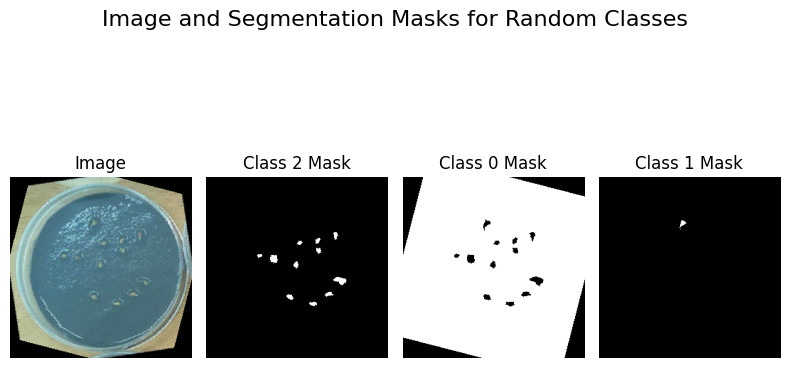

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 235MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


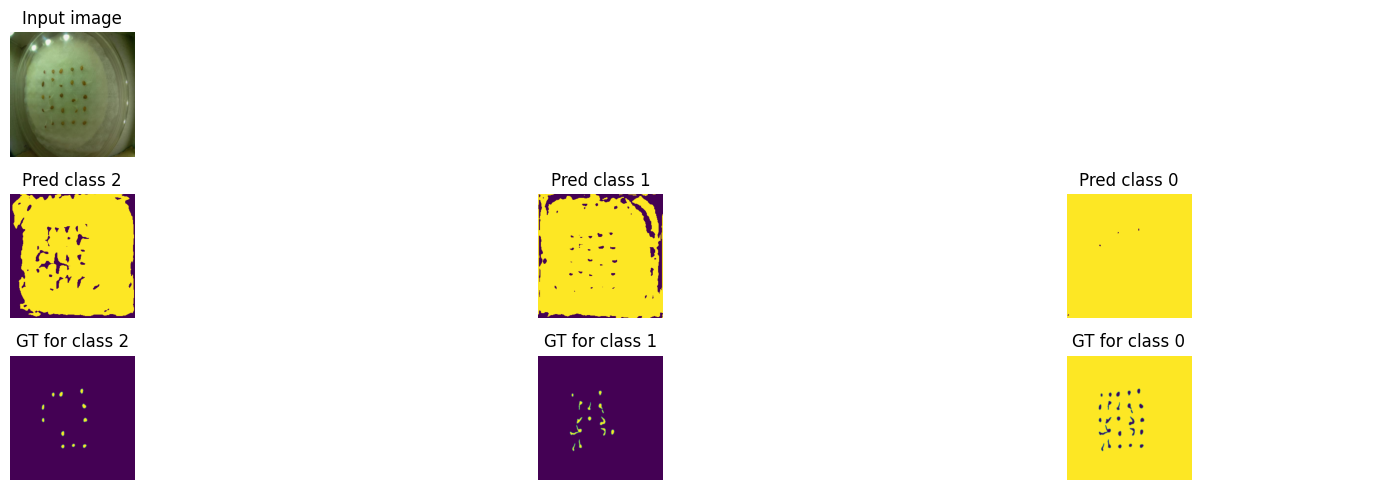

Train loss: 0.69359 | Time: 0m 50s | Val loss: 0.65536
Train_DICE_avg: 0.44536 | Train_Jaccard_avg: 0.39259 | Train_Sensitivity_avg: 0.41330 | Train_Specificity_avg: 0.78452 
Class 0 - Train_DICE: 0.95282 | Train_Jaccard: 0.91118 | Train_Sensitivity: 0.95844 | Train_Specificity: 0.36218 
Class 1 - Train_DICE: 0.02452 | Train_Jaccard: 0.01290 | Train_Sensitivity: 0.01310 | Train_Specificity: 0.99558 
Class 2 - Train_DICE: 0.35874 | Train_Jaccard: 0.25370 | Train_Sensitivity: 0.26836 | Train_Specificity: 0.99582 
Val_DICE_avg: 0.45456 | Val_Jaccard_avg: 0.42200 | Val_Sensitivity_avg: 0.42651 | Val_Specificity_avg: 0.93395 
Class 0 - Val_DICE: 0.98629 | Val_Jaccard: 0.97325 | Val_Sensitivity: 0.98384 | Val_Specificity: 0.80487 
Class 1 - Val_DICE: 0.03510 | Val_Jaccard: 0.01922 | Val_Sensitivity: 0.01937 | Val_Specificity: 0.99910 
Class 2 - Val_DICE: 0.34229 | Val_Jaccard: 0.27354 | Val_Sensitivity: 0.27633 | Val_Specificity: 0.99788 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.65877 | Time: 1m 37s | Val loss: 0.64579
Train_DICE_avg: 0.45587 | Train_Jaccard_avg: 0.42034 | Train_Sensitivity_avg: 0.42911 | Train_Specificity_avg: 0.91251 
Class 0 - Train_DICE: 0.98060 | Train_Jaccard: 0.96216 | Train_Sensitivity: 0.98187 | Train_Specificity: 0.73970 
Class 1 - Train_DICE: 0.04029 | Train_Jaccard: 0.02182 | Train_Sensitivity: 0.02212 | Train_Specificity: 0.99893 
Class 2 - Train_DICE: 0.34672 | Train_Jaccard: 0.27704 | Train_Sensitivity: 0.28333 | Train_Specificity: 0.99892 
Val_DICE_avg: 0.47399 | Val_Jaccard_avg: 0.44264 | Val_Sensitivity_avg: 0.44586 | Val_Specificity_avg: 0.97433 
Class 0 - Val_DICE: 0.99194 | Val_Jaccard: 0.98406 | Val_Sensitivity: 0.98856 | Val_Specificity: 0.92618 
Class 1 - Val_DICE: 0.07213 | Val_Jaccard: 0.04198 | Val_Sensitivity: 0.04357 | Val_Specificity: 0.99860 
Class 2 - Val_DICE: 0.35790 | Val_Jaccard: 0.30188 | Val_Sensitivity: 0.30544 | Val_Specificity: 0.99822 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.64376 | Time: 2m 25s | Val loss: 0.63333
Train_DICE_avg: 0.47768 | Train_Jaccard_avg: 0.43868 | Train_Sensitivity_avg: 0.44563 | Train_Specificity_avg: 0.94249 
Class 0 - Train_DICE: 0.98537 | Train_Jaccard: 0.97130 | Train_Sensitivity: 0.98415 | Train_Specificity: 0.82965 
Class 1 - Train_DICE: 0.09104 | Train_Jaccard: 0.05251 | Train_Sensitivity: 0.05421 | Train_Specificity: 0.99878 
Class 2 - Train_DICE: 0.35664 | Train_Jaccard: 0.29223 | Train_Sensitivity: 0.29853 | Train_Specificity: 0.99904 
Val_DICE_avg: 0.48529 | Val_Jaccard_avg: 0.45050 | Val_Sensitivity_avg: 0.45356 | Val_Specificity_avg: 0.97516 
Class 0 - Val_DICE: 0.99337 | Val_Jaccard: 0.98686 | Val_Sensitivity: 0.99087 | Val_Specificity: 0.92790 
Class 1 - Val_DICE: 0.10683 | Val_Jaccard: 0.06464 | Val_Sensitivity: 0.06796 | Val_Specificity: 0.99846 
Class 2 - Val_DICE: 0.35567 | Val_Jaccard: 0.29999 | Val_Sensitivity: 0.30184 | Val_Specificity: 0.99913 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.63148 | Time: 3m 13s | Val loss: 0.62407
Train_DICE_avg: 0.48967 | Train_Jaccard_avg: 0.44886 | Train_Sensitivity_avg: 0.45504 | Train_Specificity_avg: 0.95349 
Class 0 - Train_DICE: 0.98770 | Train_Jaccard: 0.97581 | Train_Sensitivity: 0.98528 | Train_Specificity: 0.86250 
Class 1 - Train_DICE: 0.11238 | Train_Jaccard: 0.06578 | Train_Sensitivity: 0.06793 | Train_Specificity: 0.99880 
Class 2 - Train_DICE: 0.36892 | Train_Jaccard: 0.30501 | Train_Sensitivity: 0.31192 | Train_Specificity: 0.99917 
Val_DICE_avg: 0.49540 | Val_Jaccard_avg: 0.45862 | Val_Sensitivity_avg: 0.46155 | Val_Specificity_avg: 0.97828 
Class 0 - Val_DICE: 0.99401 | Val_Jaccard: 0.98813 | Val_Sensitivity: 0.99107 | Val_Specificity: 0.93717 
Class 1 - Val_DICE: 0.11337 | Val_Jaccard: 0.06895 | Val_Sensitivity: 0.07225 | Val_Specificity: 0.99868 
Class 2 - Val_DICE: 0.37883 | Val_Jaccard: 0.31877 | Val_Sensitivity: 0.32132 | Val_Specificity: 0.99900 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.61980 | Time: 4m 2s | Val loss: 0.61168
Train_DICE_avg: 0.51365 | Train_Jaccard_avg: 0.46595 | Train_Sensitivity_avg: 0.47178 | Train_Specificity_avg: 0.95953 
Class 0 - Train_DICE: 0.98845 | Train_Jaccard: 0.97726 | Train_Sensitivity: 0.98517 | Train_Specificity: 0.88047 
Class 1 - Train_DICE: 0.12387 | Train_Jaccard: 0.07336 | Train_Sensitivity: 0.07519 | Train_Specificity: 0.99911 
Class 2 - Train_DICE: 0.42863 | Train_Jaccard: 0.34724 | Train_Sensitivity: 0.35498 | Train_Specificity: 0.99901 
Val_DICE_avg: 0.53294 | Val_Jaccard_avg: 0.48278 | Val_Sensitivity_avg: 0.48467 | Val_Specificity_avg: 0.97211 
Class 0 - Val_DICE: 0.99398 | Val_Jaccard: 0.98811 | Val_Sensitivity: 0.99126 | Val_Specificity: 0.91796 
Class 1 - Val_DICE: 0.12346 | Val_Jaccard: 0.07581 | Val_Sensitivity: 0.07682 | Val_Specificity: 0.99949 
Class 2 - Val_DICE: 0.48137 | Val_Jaccard: 0.38441 | Val_Sensitivity: 0.38593 | Val_Specificity: 0.99889 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


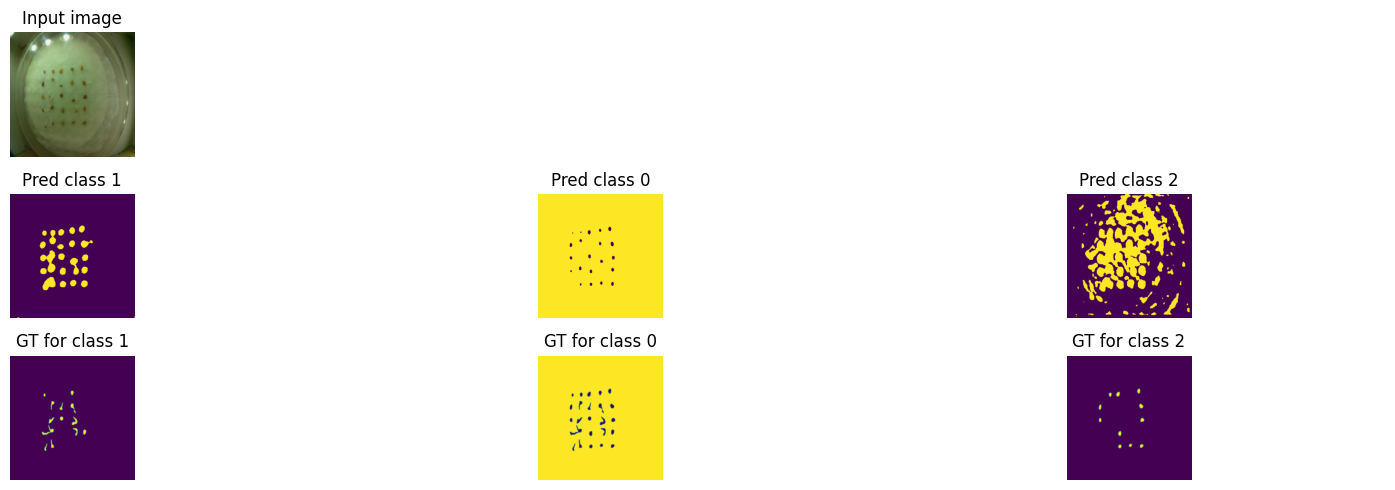

Train loss: 0.60837 | Time: 4m 50s | Val loss: 0.60171
Train_DICE_avg: 0.54324 | Train_Jaccard_avg: 0.48766 | Train_Sensitivity_avg: 0.49354 | Train_Specificity_avg: 0.96170 
Class 0 - Train_DICE: 0.98878 | Train_Jaccard: 0.97791 | Train_Sensitivity: 0.98506 | Train_Specificity: 0.88683 
Class 1 - Train_DICE: 0.13375 | Train_Jaccard: 0.07997 | Train_Sensitivity: 0.08137 | Train_Specificity: 0.99938 
Class 2 - Train_DICE: 0.50719 | Train_Jaccard: 0.40509 | Train_Sensitivity: 0.41419 | Train_Specificity: 0.99889 
Val_DICE_avg: 0.55070 | Val_Jaccard_avg: 0.49882 | Val_Sensitivity_avg: 0.50140 | Val_Specificity_avg: 0.97397 
Class 0 - Val_DICE: 0.99407 | Val_Jaccard: 0.98829 | Val_Sensitivity: 0.99124 | Val_Specificity: 0.92328 
Class 1 - Val_DICE: 0.13656 | Val_Jaccard: 0.08483 | Val_Sensitivity: 0.08575 | Val_Specificity: 0.99956 
Class 2 - Val_DICE: 0.52147 | Val_Jaccard: 0.42335 | Val_Sensitivity: 0.42719 | Val_Specificity: 0.99906 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.59768 | Time: 5m 38s | Val loss: 0.59274
Train_DICE_avg: 0.55479 | Train_Jaccard_avg: 0.49766 | Train_Sensitivity_avg: 0.50366 | Train_Specificity_avg: 0.96479 
Class 0 - Train_DICE: 0.98911 | Train_Jaccard: 0.97855 | Train_Sensitivity: 0.98483 | Train_Specificity: 0.89599 
Class 1 - Train_DICE: 0.13991 | Train_Jaccard: 0.08413 | Train_Sensitivity: 0.08541 | Train_Specificity: 0.99945 
Class 2 - Train_DICE: 0.53536 | Train_Jaccard: 0.43029 | Train_Sensitivity: 0.44073 | Train_Specificity: 0.99893 
Val_DICE_avg: 0.56087 | Val_Jaccard_avg: 0.50952 | Val_Sensitivity_avg: 0.51415 | Val_Specificity_avg: 0.97861 
Class 0 - Val_DICE: 0.99389 | Val_Jaccard: 0.98793 | Val_Sensitivity: 0.99003 | Val_Specificity: 0.93761 
Class 1 - Val_DICE: 0.14390 | Val_Jaccard: 0.09070 | Val_Sensitivity: 0.09205 | Val_Specificity: 0.99948 
Class 2 - Val_DICE: 0.54482 | Val_Jaccard: 0.44993 | Val_Sensitivity: 0.46037 | Val_Specificity: 0.99873 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.58689 | Time: 6m 25s | Val loss: 0.58141
Train_DICE_avg: 0.56398 | Train_Jaccard_avg: 0.50610 | Train_Sensitivity_avg: 0.51229 | Train_Specificity_avg: 0.96757 
Class 0 - Train_DICE: 0.98922 | Train_Jaccard: 0.97876 | Train_Sensitivity: 0.98438 | Train_Specificity: 0.90449 
Class 1 - Train_DICE: 0.14547 | Train_Jaccard: 0.08803 | Train_Sensitivity: 0.08936 | Train_Specificity: 0.99946 
Class 2 - Train_DICE: 0.55727 | Train_Jaccard: 0.45152 | Train_Sensitivity: 0.46312 | Train_Specificity: 0.99875 
Val_DICE_avg: 0.56167 | Val_Jaccard_avg: 0.51170 | Val_Sensitivity_avg: 0.51623 | Val_Specificity_avg: 0.97232 
Class 0 - Val_DICE: 0.99427 | Val_Jaccard: 0.98869 | Val_Sensitivity: 0.99129 | Val_Specificity: 0.91869 
Class 1 - Val_DICE: 0.14164 | Val_Jaccard: 0.08964 | Val_Sensitivity: 0.09099 | Val_Specificity: 0.99950 
Class 2 - Val_DICE: 0.54909 | Val_Jaccard: 0.45677 | Val_Sensitivity: 0.46641 | Val_Specificity: 0.99876 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.57623 | Time: 7m 13s | Val loss: 0.57687
Train_DICE_avg: 0.57088 | Train_Jaccard_avg: 0.51267 | Train_Sensitivity_avg: 0.51910 | Train_Specificity_avg: 0.96965 
Class 0 - Train_DICE: 0.98937 | Train_Jaccard: 0.97906 | Train_Sensitivity: 0.98410 | Train_Specificity: 0.91076 
Class 1 - Train_DICE: 0.15043 | Train_Jaccard: 0.09154 | Train_Sensitivity: 0.09306 | Train_Specificity: 0.99943 
Class 2 - Train_DICE: 0.57285 | Train_Jaccard: 0.46741 | Train_Sensitivity: 0.48013 | Train_Specificity: 0.99877 
Val_DICE_avg: 0.56355 | Val_Jaccard_avg: 0.51230 | Val_Sensitivity_avg: 0.51541 | Val_Specificity_avg: 0.97531 
Class 0 - Val_DICE: 0.99435 | Val_Jaccard: 0.98884 | Val_Sensitivity: 0.99171 | Val_Specificity: 0.92723 
Class 1 - Val_DICE: 0.14389 | Val_Jaccard: 0.09097 | Val_Sensitivity: 0.09207 | Val_Specificity: 0.99957 
Class 2 - Val_DICE: 0.55241 | Val_Jaccard: 0.45708 | Val_Sensitivity: 0.46243 | Val_Specificity: 0.99912 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.56586 | Time: 8m 1s | Val loss: 0.56522
Train_DICE_avg: 0.57795 | Train_Jaccard_avg: 0.51900 | Train_Sensitivity_avg: 0.52591 | Train_Specificity_avg: 0.96942 
Class 0 - Train_DICE: 0.98924 | Train_Jaccard: 0.97881 | Train_Sensitivity: 0.98381 | Train_Specificity: 0.91018 
Class 1 - Train_DICE: 0.15547 | Train_Jaccard: 0.09514 | Train_Sensitivity: 0.09690 | Train_Specificity: 0.99940 
Class 2 - Train_DICE: 0.58913 | Train_Jaccard: 0.48304 | Train_Sensitivity: 0.49702 | Train_Specificity: 0.99868 
Val_DICE_avg: 0.57107 | Val_Jaccard_avg: 0.52095 | Val_Sensitivity_avg: 0.52542 | Val_Specificity_avg: 0.97497 
Class 0 - Val_DICE: 0.99429 | Val_Jaccard: 0.98872 | Val_Sensitivity: 0.99146 | Val_Specificity: 0.92686 
Class 1 - Val_DICE: 0.14767 | Val_Jaccard: 0.09436 | Val_Sensitivity: 0.09581 | Val_Specificity: 0.99952 
Class 2 - Val_DICE: 0.57124 | Val_Jaccard: 0.47977 | Val_Sensitivity: 0.48900 | Val_Specificity: 0.99852 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


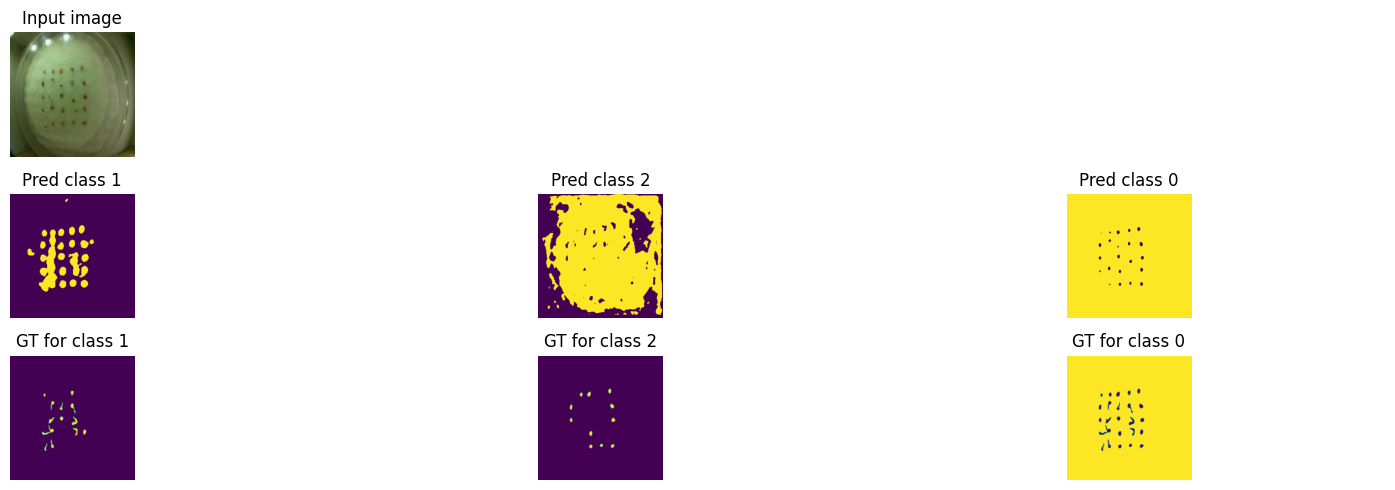

Train loss: 0.55531 | Time: 8m 51s | Val loss: 0.56040
Train_DICE_avg: 0.58422 | Train_Jaccard_avg: 0.52515 | Train_Sensitivity_avg: 0.53260 | Train_Specificity_avg: 0.96837 
Class 0 - Train_DICE: 0.98926 | Train_Jaccard: 0.97886 | Train_Sensitivity: 0.98381 | Train_Specificity: 0.90712 
Class 1 - Train_DICE: 0.16098 | Train_Jaccard: 0.09914 | Train_Sensitivity: 0.10099 | Train_Specificity: 0.99939 
Class 2 - Train_DICE: 0.60243 | Train_Jaccard: 0.49746 | Train_Sensitivity: 0.51300 | Train_Specificity: 0.99859 
Val_DICE_avg: 0.57143 | Val_Jaccard_avg: 0.52114 | Val_Sensitivity_avg: 0.52522 | Val_Specificity_avg: 0.96716 
Class 0 - Val_DICE: 0.99443 | Val_Jaccard: 0.98900 | Val_Sensitivity: 0.99233 | Val_Specificity: 0.90301 
Class 1 - Val_DICE: 0.14751 | Val_Jaccard: 0.09453 | Val_Sensitivity: 0.09593 | Val_Specificity: 0.99958 
Class 2 - Val_DICE: 0.57237 | Val_Jaccard: 0.47989 | Val_Sensitivity: 0.48739 | Val_Specificity: 0.99888 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.54530 | Time: 9m 40s | Val loss: 0.54845
Train_DICE_avg: 0.58888 | Train_Jaccard_avg: 0.52981 | Train_Sensitivity_avg: 0.53766 | Train_Specificity_avg: 0.96674 
Class 0 - Train_DICE: 0.98935 | Train_Jaccard: 0.97903 | Train_Sensitivity: 0.98419 | Train_Specificity: 0.90233 
Class 1 - Train_DICE: 0.16385 | Train_Jaccard: 0.10125 | Train_Sensitivity: 0.10339 | Train_Specificity: 0.99936 
Class 2 - Train_DICE: 0.61345 | Train_Jaccard: 0.50915 | Train_Sensitivity: 0.52540 | Train_Specificity: 0.99854 
Val_DICE_avg: 0.59061 | Val_Jaccard_avg: 0.53735 | Val_Sensitivity_avg: 0.54290 | Val_Specificity_avg: 0.95738 
Class 0 - Val_DICE: 0.99420 | Val_Jaccard: 0.98856 | Val_Sensitivity: 0.99262 | Val_Specificity: 0.87385 
Class 1 - Val_DICE: 0.16051 | Val_Jaccard: 0.10373 | Val_Sensitivity: 0.10581 | Val_Specificity: 0.99939 
Class 2 - Val_DICE: 0.61713 | Val_Jaccard: 0.51977 | Val_Sensitivity: 0.53027 | Val_Specificity: 0.99891 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.53501 | Time: 10m 28s | Val loss: 0.53995
Train_DICE_avg: 0.59301 | Train_Jaccard_avg: 0.53416 | Train_Sensitivity_avg: 0.54283 | Train_Specificity_avg: 0.96294 
Class 0 - Train_DICE: 0.98941 | Train_Jaccard: 0.97915 | Train_Sensitivity: 0.98479 | Train_Specificity: 0.89104 
Class 1 - Train_DICE: 0.16714 | Train_Jaccard: 0.10383 | Train_Sensitivity: 0.10616 | Train_Specificity: 0.99933 
Class 2 - Train_DICE: 0.62248 | Train_Jaccard: 0.51949 | Train_Sensitivity: 0.53755 | Train_Specificity: 0.99843 
Val_DICE_avg: 0.59429 | Val_Jaccard_avg: 0.54105 | Val_Sensitivity_avg: 0.54586 | Val_Specificity_avg: 0.95526 
Class 0 - Val_DICE: 0.99410 | Val_Jaccard: 0.98836 | Val_Sensitivity: 0.99325 | Val_Specificity: 0.86724 
Class 1 - Val_DICE: 0.16098 | Val_Jaccard: 0.10440 | Val_Sensitivity: 0.10670 | Val_Specificity: 0.99939 
Class 2 - Val_DICE: 0.62777 | Val_Jaccard: 0.53039 | Val_Sensitivity: 0.53763 | Val_Specificity: 0.99914 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.52529 | Time: 11m 17s | Val loss: 0.52869
Train_DICE_avg: 0.59673 | Train_Jaccard_avg: 0.53835 | Train_Sensitivity_avg: 0.54798 | Train_Specificity_avg: 0.96188 
Class 0 - Train_DICE: 0.98907 | Train_Jaccard: 0.97849 | Train_Sensitivity: 0.98447 | Train_Specificity: 0.88800 
Class 1 - Train_DICE: 0.16853 | Train_Jaccard: 0.10509 | Train_Sensitivity: 0.10764 | Train_Specificity: 0.99932 
Class 2 - Train_DICE: 0.63258 | Train_Jaccard: 0.53147 | Train_Sensitivity: 0.55183 | Train_Specificity: 0.99832 
Val_DICE_avg: 0.59692 | Val_Jaccard_avg: 0.54662 | Val_Sensitivity_avg: 0.55390 | Val_Specificity_avg: 0.94770 
Class 0 - Val_DICE: 0.99398 | Val_Jaccard: 0.98813 | Val_Sensitivity: 0.99285 | Val_Specificity: 0.84503 
Class 1 - Val_DICE: 0.16167 | Val_Jaccard: 0.10531 | Val_Sensitivity: 0.10745 | Val_Specificity: 0.99943 
Class 2 - Val_DICE: 0.63512 | Val_Jaccard: 0.54643 | Val_Sensitivity: 0.56142 | Val_Specificity: 0.99865 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.51289 | Time: 12m 6s | Val loss: 0.51798
Train_DICE_avg: 0.60106 | Train_Jaccard_avg: 0.54220 | Train_Sensitivity_avg: 0.55311 | Train_Specificity_avg: 0.95743 
Class 0 - Train_DICE: 0.98850 | Train_Jaccard: 0.97738 | Train_Sensitivity: 0.98370 | Train_Specificity: 0.87483 
Class 1 - Train_DICE: 0.17241 | Train_Jaccard: 0.10791 | Train_Sensitivity: 0.11079 | Train_Specificity: 0.99927 
Class 2 - Train_DICE: 0.64226 | Train_Jaccard: 0.54130 | Train_Sensitivity: 0.56485 | Train_Specificity: 0.99819 
Val_DICE_avg: 0.60522 | Val_Jaccard_avg: 0.55022 | Val_Sensitivity_avg: 0.55794 | Val_Specificity_avg: 0.94386 
Class 0 - Val_DICE: 0.99360 | Val_Jaccard: 0.98737 | Val_Sensitivity: 0.99256 | Val_Specificity: 0.83349 
Class 1 - Val_DICE: 0.16317 | Val_Jaccard: 0.10645 | Val_Sensitivity: 0.10903 | Val_Specificity: 0.99940 
Class 2 - Val_DICE: 0.65890 | Val_Jaccard: 0.55685 | Val_Sensitivity: 0.57222 | Val_Specificity: 0.99870 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


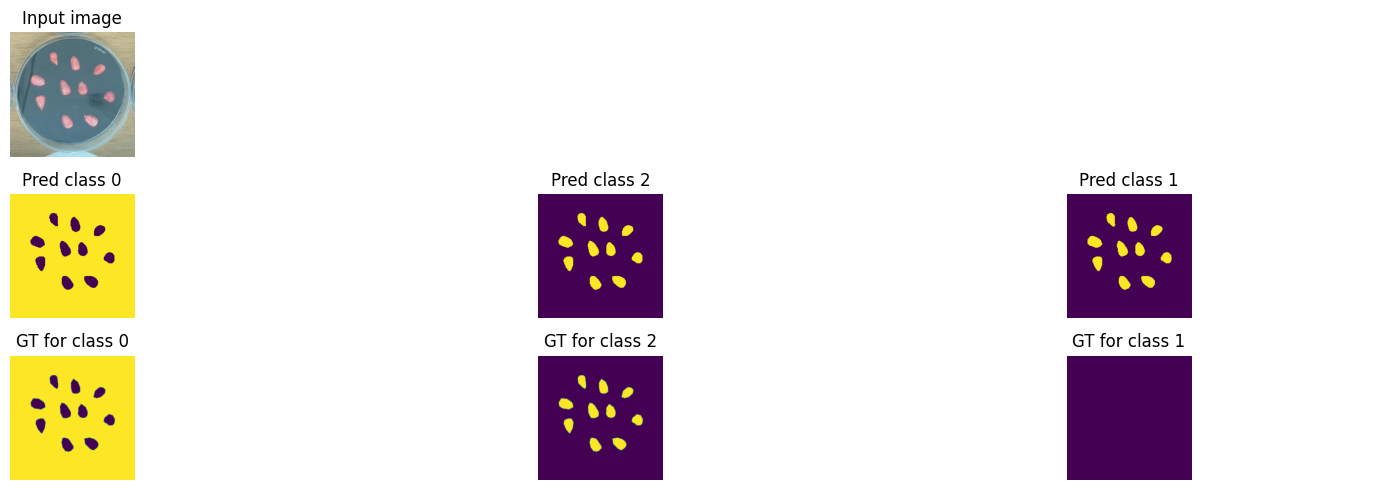

Train loss: 0.50180 | Time: 12m 55s | Val loss: 0.50852
Train_DICE_avg: 0.61211 | Train_Jaccard_avg: 0.55061 | Train_Sensitivity_avg: 0.56262 | Train_Specificity_avg: 0.95882 
Class 0 - Train_DICE: 0.98828 | Train_Jaccard: 0.97695 | Train_Sensitivity: 0.98306 | Train_Specificity: 0.87921 
Class 1 - Train_DICE: 0.17922 | Train_Jaccard: 0.11281 | Train_Sensitivity: 0.11623 | Train_Specificity: 0.99922 
Class 2 - Train_DICE: 0.66884 | Train_Jaccard: 0.56208 | Train_Sensitivity: 0.58857 | Train_Specificity: 0.99803 
Val_DICE_avg: 0.62433 | Val_Jaccard_avg: 0.56595 | Val_Sensitivity_avg: 0.57445 | Val_Specificity_avg: 0.94184 
Class 0 - Val_DICE: 0.99360 | Val_Jaccard: 0.98737 | Val_Sensitivity: 0.99270 | Val_Specificity: 0.82759 
Class 1 - Val_DICE: 0.17503 | Val_Jaccard: 0.11503 | Val_Sensitivity: 0.11855 | Val_Specificity: 0.99925 
Class 2 - Val_DICE: 0.70435 | Val_Jaccard: 0.59545 | Val_Sensitivity: 0.61211 | Val_Specificity: 0.99867 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.49166 | Time: 13m 44s | Val loss: 0.50242
Train_DICE_avg: 0.61993 | Train_Jaccard_avg: 0.55820 | Train_Sensitivity_avg: 0.57090 | Train_Specificity_avg: 0.95925 
Class 0 - Train_DICE: 0.98839 | Train_Jaccard: 0.97717 | Train_Sensitivity: 0.98303 | Train_Specificity: 0.88057 
Class 1 - Train_DICE: 0.18387 | Train_Jaccard: 0.11627 | Train_Sensitivity: 0.12009 | Train_Specificity: 0.99919 
Class 2 - Train_DICE: 0.68753 | Train_Jaccard: 0.58117 | Train_Sensitivity: 0.60958 | Train_Specificity: 0.99798 
Val_DICE_avg: 0.63507 | Val_Jaccard_avg: 0.57654 | Val_Sensitivity_avg: 0.58599 | Val_Specificity_avg: 0.94587 
Class 0 - Val_DICE: 0.99369 | Val_Jaccard: 0.98755 | Val_Sensitivity: 0.99244 | Val_Specificity: 0.83993 
Class 1 - Val_DICE: 0.18054 | Val_Jaccard: 0.11915 | Val_Sensitivity: 0.12335 | Val_Specificity: 0.99916 
Class 2 - Val_DICE: 0.73098 | Val_Jaccard: 0.62291 | Val_Sensitivity: 0.64216 | Val_Specificity: 0.99852 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.48201 | Time: 14m 33s | Val loss: 0.48898
Train_DICE_avg: 0.62789 | Train_Jaccard_avg: 0.56503 | Train_Sensitivity_avg: 0.57913 | Train_Specificity_avg: 0.95970 
Class 0 - Train_DICE: 0.98748 | Train_Jaccard: 0.97544 | Train_Sensitivity: 0.98103 | Train_Specificity: 0.88218 
Class 1 - Train_DICE: 0.19723 | Train_Jaccard: 0.12691 | Train_Sensitivity: 0.13219 | Train_Specificity: 0.99911 
Class 2 - Train_DICE: 0.69896 | Train_Jaccard: 0.59274 | Train_Sensitivity: 0.62417 | Train_Specificity: 0.99782 
Val_DICE_avg: 0.65015 | Val_Jaccard_avg: 0.59129 | Val_Sensitivity_avg: 0.60628 | Val_Specificity_avg: 0.94566 
Class 0 - Val_DICE: 0.99362 | Val_Jaccard: 0.98742 | Val_Sensitivity: 0.99208 | Val_Specificity: 0.84005 
Class 1 - Val_DICE: 0.22351 | Val_Jaccard: 0.15903 | Val_Sensitivity: 0.17413 | Val_Specificity: 0.99875 
Class 2 - Val_DICE: 0.73333 | Val_Jaccard: 0.62743 | Val_Sensitivity: 0.65263 | Val_Specificity: 0.99818 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.47053 | Time: 15m 21s | Val loss: 0.48114
Train_DICE_avg: 0.64824 | Train_Jaccard_avg: 0.58311 | Train_Sensitivity_avg: 0.60093 | Train_Specificity_avg: 0.96051 
Class 0 - Train_DICE: 0.98627 | Train_Jaccard: 0.97315 | Train_Sensitivity: 0.97802 | Train_Specificity: 0.88503 
Class 1 - Train_DICE: 0.24682 | Train_Jaccard: 0.17112 | Train_Sensitivity: 0.18525 | Train_Specificity: 0.99882 
Class 2 - Train_DICE: 0.71164 | Train_Jaccard: 0.60506 | Train_Sensitivity: 0.63952 | Train_Specificity: 0.99769 
Val_DICE_avg: 0.65894 | Val_Jaccard_avg: 0.59921 | Val_Sensitivity_avg: 0.61651 | Val_Specificity_avg: 0.93797 
Class 0 - Val_DICE: 0.99346 | Val_Jaccard: 0.98711 | Val_Sensitivity: 0.99271 | Val_Specificity: 0.81698 
Class 1 - Val_DICE: 0.24711 | Val_Jaccard: 0.18321 | Val_Sensitivity: 0.20995 | Val_Specificity: 0.99841 
Class 2 - Val_DICE: 0.73623 | Val_Jaccard: 0.62731 | Val_Sensitivity: 0.64687 | Val_Specificity: 0.99853 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.45915 | Time: 16m 10s | Val loss: 0.47692
Train_DICE_avg: 0.65785 | Train_Jaccard_avg: 0.59216 | Train_Sensitivity_avg: 0.61257 | Train_Specificity_avg: 0.96160 
Class 0 - Train_DICE: 0.98467 | Train_Jaccard: 0.97011 | Train_Sensitivity: 0.97483 | Train_Specificity: 0.88850 
Class 1 - Train_DICE: 0.27366 | Train_Jaccard: 0.19716 | Train_Sensitivity: 0.21797 | Train_Specificity: 0.99867 
Class 2 - Train_DICE: 0.71523 | Train_Jaccard: 0.60920 | Train_Sensitivity: 0.64491 | Train_Specificity: 0.99761 
Val_DICE_avg: 0.66468 | Val_Jaccard_avg: 0.60526 | Val_Sensitivity_avg: 0.62715 | Val_Specificity_avg: 0.93988 
Class 0 - Val_DICE: 0.99349 | Val_Jaccard: 0.98715 | Val_Sensitivity: 0.99253 | Val_Specificity: 0.82295 
Class 1 - Val_DICE: 0.25525 | Val_Jaccard: 0.19265 | Val_Sensitivity: 0.23368 | Val_Specificity: 0.99818 
Class 2 - Val_DICE: 0.74530 | Val_Jaccard: 0.63598 | Val_Sensitivity: 0.65524 | Val_Specificity: 0.99852 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


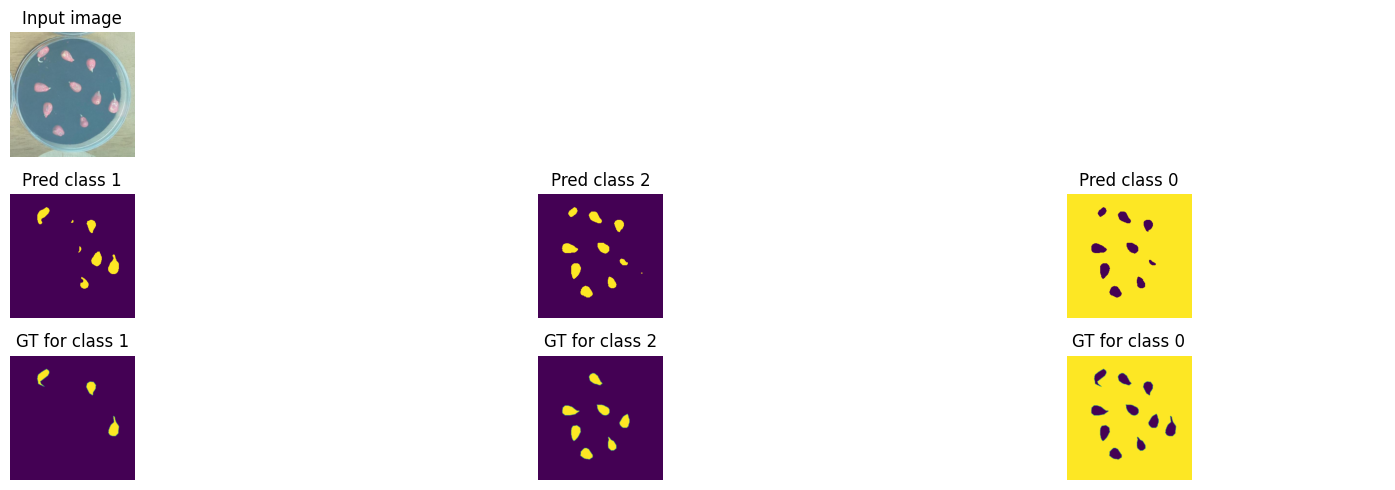

Train loss: 0.44812 | Time: 17m 0s | Val loss: 0.46253
Train_DICE_avg: 0.66627 | Train_Jaccard_avg: 0.60106 | Train_Sensitivity_avg: 0.62341 | Train_Specificity_avg: 0.96277 
Class 0 - Train_DICE: 0.98430 | Train_Jaccard: 0.96946 | Train_Sensitivity: 0.97385 | Train_Specificity: 0.89217 
Class 1 - Train_DICE: 0.29138 | Train_Jaccard: 0.21526 | Train_Sensitivity: 0.24001 | Train_Specificity: 0.99863 
Class 2 - Train_DICE: 0.72313 | Train_Jaccard: 0.61845 | Train_Sensitivity: 0.65638 | Train_Specificity: 0.99752 
Val_DICE_avg: 0.67141 | Val_Jaccard_avg: 0.61274 | Val_Sensitivity_avg: 0.62911 | Val_Specificity_avg: 0.94026 
Class 0 - Val_DICE: 0.99313 | Val_Jaccard: 0.98645 | Val_Sensitivity: 0.99161 | Val_Specificity: 0.82373 
Class 1 - Val_DICE: 0.26509 | Val_Jaccard: 0.20326 | Val_Sensitivity: 0.22261 | Val_Specificity: 0.99872 
Class 2 - Val_DICE: 0.75602 | Val_Jaccard: 0.64851 | Val_Sensitivity: 0.67309 | Val_Specificity: 0.99832 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.43800 | Time: 17m 49s | Val loss: 0.45821
Train_DICE_avg: 0.67181 | Train_Jaccard_avg: 0.60642 | Train_Sensitivity_avg: 0.63032 | Train_Specificity_avg: 0.96565 
Class 0 - Train_DICE: 0.98379 | Train_Jaccard: 0.96849 | Train_Sensitivity: 0.97234 | Train_Specificity: 0.90092 
Class 1 - Train_DICE: 0.30046 | Train_Jaccard: 0.22342 | Train_Sensitivity: 0.25286 | Train_Specificity: 0.99849 
Class 2 - Train_DICE: 0.73117 | Train_Jaccard: 0.62736 | Train_Sensitivity: 0.66577 | Train_Specificity: 0.99755 
Val_DICE_avg: 0.67408 | Val_Jaccard_avg: 0.61684 | Val_Sensitivity_avg: 0.63453 | Val_Specificity_avg: 0.94827 
Class 0 - Val_DICE: 0.99342 | Val_Jaccard: 0.98703 | Val_Sensitivity: 0.99116 | Val_Specificity: 0.84787 
Class 1 - Val_DICE: 0.26670 | Val_Jaccard: 0.20682 | Val_Sensitivity: 0.23145 | Val_Specificity: 0.99856 
Class 2 - Val_DICE: 0.76213 | Val_Jaccard: 0.65668 | Val_Sensitivity: 0.68099 | Val_Specificity: 0.99837 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.42739 | Time: 18m 38s | Val loss: 0.44684
Train_DICE_avg: 0.67961 | Train_Jaccard_avg: 0.61467 | Train_Sensitivity_avg: 0.63936 | Train_Specificity_avg: 0.96649 
Class 0 - Train_DICE: 0.98306 | Train_Jaccard: 0.96711 | Train_Sensitivity: 0.97067 | Train_Specificity: 0.90350 
Class 1 - Train_DICE: 0.31237 | Train_Jaccard: 0.23555 | Train_Sensitivity: 0.26685 | Train_Specificity: 0.99849 
Class 2 - Train_DICE: 0.74340 | Train_Jaccard: 0.64133 | Train_Sensitivity: 0.68056 | Train_Specificity: 0.99749 
Val_DICE_avg: 0.68922 | Val_Jaccard_avg: 0.63150 | Val_Sensitivity_avg: 0.65064 | Val_Specificity_avg: 0.94895 
Class 0 - Val_DICE: 0.99343 | Val_Jaccard: 0.98705 | Val_Sensitivity: 0.99109 | Val_Specificity: 0.84999 
Class 1 - Val_DICE: 0.29765 | Val_Jaccard: 0.23477 | Val_Sensitivity: 0.26148 | Val_Specificity: 0.99853 
Class 2 - Val_DICE: 0.77658 | Val_Jaccard: 0.67267 | Val_Sensitivity: 0.69934 | Val_Specificity: 0.99832 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.41730 | Time: 19m 26s | Val loss: 0.44305
Train_DICE_avg: 0.68437 | Train_Jaccard_avg: 0.62017 | Train_Sensitivity_avg: 0.64588 | Train_Specificity_avg: 0.96743 
Class 0 - Train_DICE: 0.98232 | Train_Jaccard: 0.96571 | Train_Sensitivity: 0.96907 | Train_Specificity: 0.90632 
Class 1 - Train_DICE: 0.31469 | Train_Jaccard: 0.23790 | Train_Sensitivity: 0.27146 | Train_Specificity: 0.99848 
Class 2 - Train_DICE: 0.75608 | Train_Jaccard: 0.65691 | Train_Sensitivity: 0.69710 | Train_Specificity: 0.99748 
Val_DICE_avg: 0.68328 | Val_Jaccard_avg: 0.62886 | Val_Sensitivity_avg: 0.64820 | Val_Specificity_avg: 0.95594 
Class 0 - Val_DICE: 0.99365 | Val_Jaccard: 0.98748 | Val_Sensitivity: 0.99085 | Val_Specificity: 0.87098 
Class 1 - Val_DICE: 0.27515 | Val_Jaccard: 0.22045 | Val_Sensitivity: 0.24835 | Val_Specificity: 0.99853 
Class 2 - Val_DICE: 0.78106 | Val_Jaccard: 0.67864 | Val_Sensitivity: 0.70539 | Val_Specificity: 0.99830 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.40487 | Time: 20m 15s | Val loss: 0.43386
Train_DICE_avg: 0.68832 | Train_Jaccard_avg: 0.62643 | Train_Sensitivity_avg: 0.65354 | Train_Specificity_avg: 0.96655 
Class 0 - Train_DICE: 0.98197 | Train_Jaccard: 0.96507 | Train_Sensitivity: 0.96861 | Train_Specificity: 0.90378 
Class 1 - Train_DICE: 0.31854 | Train_Jaccard: 0.24578 | Train_Sensitivity: 0.28061 | Train_Specificity: 0.99849 
Class 2 - Train_DICE: 0.76446 | Train_Jaccard: 0.66844 | Train_Sensitivity: 0.71139 | Train_Specificity: 0.99737 
Val_DICE_avg: 0.68123 | Val_Jaccard_avg: 0.62564 | Val_Sensitivity_avg: 0.64490 | Val_Specificity_avg: 0.94143 
Class 0 - Val_DICE: 0.99333 | Val_Jaccard: 0.98685 | Val_Sensitivity: 0.99165 | Val_Specificity: 0.82748 
Class 1 - Val_DICE: 0.26836 | Val_Jaccard: 0.21022 | Val_Sensitivity: 0.24050 | Val_Specificity: 0.99840 
Class 2 - Val_DICE: 0.78199 | Val_Jaccard: 0.67985 | Val_Sensitivity: 0.70255 | Val_Specificity: 0.99839 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


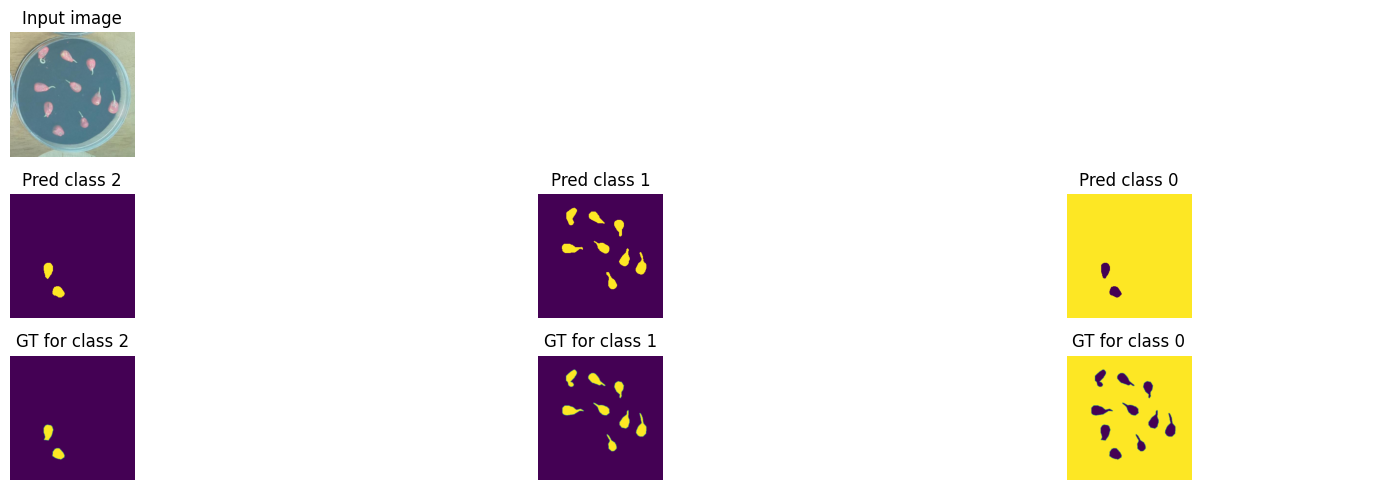

Train loss: 0.39603 | Time: 21m 4s | Val loss: 0.42198
Train_DICE_avg: 0.69242 | Train_Jaccard_avg: 0.63060 | Train_Sensitivity_avg: 0.65956 | Train_Specificity_avg: 0.96558 
Class 0 - Train_DICE: 0.98291 | Train_Jaccard: 0.96686 | Train_Sensitivity: 0.97039 | Train_Specificity: 0.90102 
Class 1 - Train_DICE: 0.32133 | Train_Jaccard: 0.24804 | Train_Sensitivity: 0.28671 | Train_Specificity: 0.99840 
Class 2 - Train_DICE: 0.77302 | Train_Jaccard: 0.67691 | Train_Sensitivity: 0.72159 | Train_Specificity: 0.99731 
Val_DICE_avg: 0.68453 | Val_Jaccard_avg: 0.63179 | Val_Sensitivity_avg: 0.65288 | Val_Specificity_avg: 0.94377 
Class 0 - Val_DICE: 0.99350 | Val_Jaccard: 0.98718 | Val_Sensitivity: 0.99156 | Val_Specificity: 0.83458 
Class 1 - Val_DICE: 0.27802 | Val_Jaccard: 0.22317 | Val_Sensitivity: 0.25594 | Val_Specificity: 0.99845 
Class 2 - Val_DICE: 0.78208 | Val_Jaccard: 0.68503 | Val_Sensitivity: 0.71115 | Val_Specificity: 0.99828 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.38695 | Time: 21m 53s | Val loss: 0.40552
Train_DICE_avg: 0.69705 | Train_Jaccard_avg: 0.63527 | Train_Sensitivity_avg: 0.66538 | Train_Specificity_avg: 0.96618 
Class 0 - Train_DICE: 0.98294 | Train_Jaccard: 0.96688 | Train_Sensitivity: 0.97035 | Train_Specificity: 0.90290 
Class 1 - Train_DICE: 0.33064 | Train_Jaccard: 0.25656 | Train_Sensitivity: 0.29677 | Train_Specificity: 0.99841 
Class 2 - Train_DICE: 0.77758 | Train_Jaccard: 0.68238 | Train_Sensitivity: 0.72900 | Train_Specificity: 0.99724 
Val_DICE_avg: 0.69477 | Val_Jaccard_avg: 0.64226 | Val_Sensitivity_avg: 0.66714 | Val_Specificity_avg: 0.94579 
Class 0 - Val_DICE: 0.99346 | Val_Jaccard: 0.98711 | Val_Sensitivity: 0.99115 | Val_Specificity: 0.84096 
Class 1 - Val_DICE: 0.29000 | Val_Jaccard: 0.23154 | Val_Sensitivity: 0.27077 | Val_Specificity: 0.99837 
Class 2 - Val_DICE: 0.80087 | Val_Jaccard: 0.70812 | Val_Sensitivity: 0.73951 | Val_Specificity: 0.99804 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.38070 | Time: 22m 41s | Val loss: 0.40021
Train_DICE_avg: 0.69829 | Train_Jaccard_avg: 0.63659 | Train_Sensitivity_avg: 0.66910 | Train_Specificity_avg: 0.96778 
Class 0 - Train_DICE: 0.98352 | Train_Jaccard: 0.96794 | Train_Sensitivity: 0.97133 | Train_Specificity: 0.90789 
Class 1 - Train_DICE: 0.33266 | Train_Jaccard: 0.25771 | Train_Sensitivity: 0.30296 | Train_Specificity: 0.99830 
Class 2 - Train_DICE: 0.77871 | Train_Jaccard: 0.68412 | Train_Sensitivity: 0.73301 | Train_Specificity: 0.99716 
Val_DICE_avg: 0.69603 | Val_Jaccard_avg: 0.64436 | Val_Sensitivity_avg: 0.66578 | Val_Specificity_avg: 0.94666 
Class 0 - Val_DICE: 0.99366 | Val_Jaccard: 0.98750 | Val_Sensitivity: 0.99163 | Val_Specificity: 0.84335 
Class 1 - Val_DICE: 0.28410 | Val_Jaccard: 0.22675 | Val_Sensitivity: 0.25740 | Val_Specificity: 0.99846 
Class 2 - Val_DICE: 0.81033 | Val_Jaccard: 0.71884 | Val_Sensitivity: 0.74829 | Val_Specificity: 0.99817 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.37315 | Time: 23m 30s | Val loss: 0.39594
Train_DICE_avg: 0.70349 | Train_Jaccard_avg: 0.64214 | Train_Sensitivity_avg: 0.67449 | Train_Specificity_avg: 0.96751 
Class 0 - Train_DICE: 0.98490 | Train_Jaccard: 0.97052 | Train_Sensitivity: 0.97409 | Train_Specificity: 0.90711 
Class 1 - Train_DICE: 0.34236 | Train_Jaccard: 0.26687 | Train_Sensitivity: 0.31093 | Train_Specificity: 0.99831 
Class 2 - Train_DICE: 0.78322 | Train_Jaccard: 0.68903 | Train_Sensitivity: 0.73845 | Train_Specificity: 0.99712 
Val_DICE_avg: 0.69343 | Val_Jaccard_avg: 0.64174 | Val_Sensitivity_avg: 0.66151 | Val_Specificity_avg: 0.94990 
Class 0 - Val_DICE: 0.99359 | Val_Jaccard: 0.98737 | Val_Sensitivity: 0.99137 | Val_Specificity: 0.85278 
Class 1 - Val_DICE: 0.27746 | Val_Jaccard: 0.22152 | Val_Sensitivity: 0.24754 | Val_Specificity: 0.99872 
Class 2 - Val_DICE: 0.80925 | Val_Jaccard: 0.71634 | Val_Sensitivity: 0.74563 | Val_Specificity: 0.99822 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.36589 | Time: 24m 18s | Val loss: 0.39113
Train_DICE_avg: 0.70901 | Train_Jaccard_avg: 0.64727 | Train_Sensitivity_avg: 0.68200 | Train_Specificity_avg: 0.96702 
Class 0 - Train_DICE: 0.98590 | Train_Jaccard: 0.97242 | Train_Sensitivity: 0.97602 | Train_Specificity: 0.90577 
Class 1 - Train_DICE: 0.34978 | Train_Jaccard: 0.27346 | Train_Sensitivity: 0.32336 | Train_Specificity: 0.99821 
Class 2 - Train_DICE: 0.79133 | Train_Jaccard: 0.69593 | Train_Sensitivity: 0.74662 | Train_Specificity: 0.99708 
Val_DICE_avg: 0.69498 | Val_Jaccard_avg: 0.64249 | Val_Sensitivity_avg: 0.66540 | Val_Specificity_avg: 0.94229 
Class 0 - Val_DICE: 0.99322 | Val_Jaccard: 0.98664 | Val_Sensitivity: 0.99131 | Val_Specificity: 0.83021 
Class 1 - Val_DICE: 0.28891 | Val_Jaccard: 0.23214 | Val_Sensitivity: 0.26351 | Val_Specificity: 0.99862 
Class 2 - Val_DICE: 0.80282 | Val_Jaccard: 0.70867 | Val_Sensitivity: 0.74137 | Val_Specificity: 0.99805 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


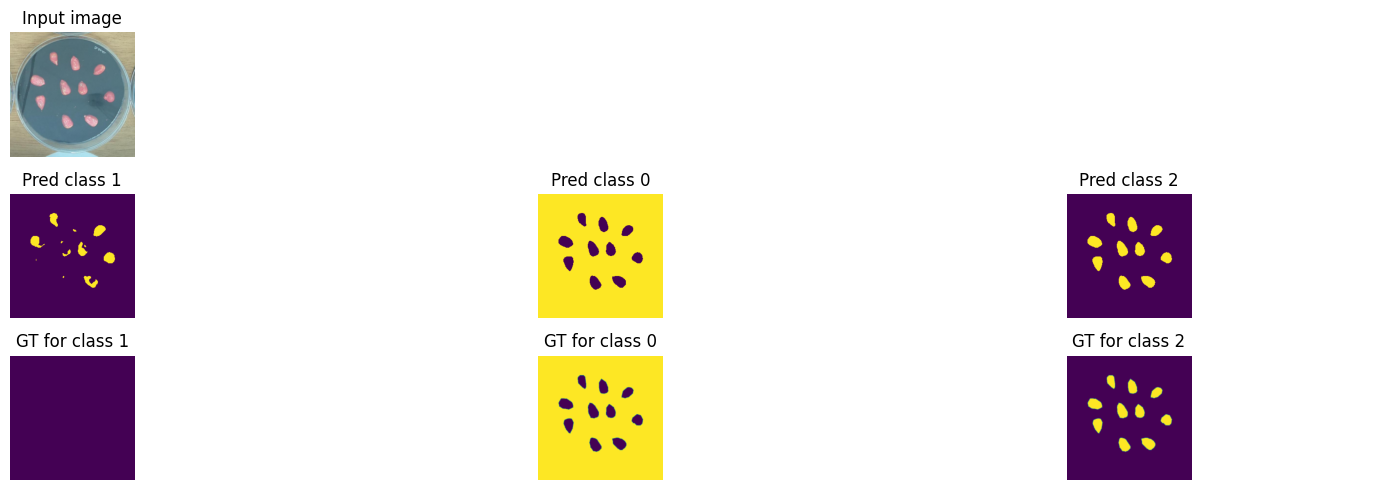

Train loss: 0.35825 | Time: 25m 8s | Val loss: 0.38169
Train_DICE_avg: 0.71638 | Train_Jaccard_avg: 0.65380 | Train_Sensitivity_avg: 0.68943 | Train_Specificity_avg: 0.96925 
Class 0 - Train_DICE: 0.98644 | Train_Jaccard: 0.97345 | Train_Sensitivity: 0.97697 | Train_Specificity: 0.91257 
Class 1 - Train_DICE: 0.36012 | Train_Jaccard: 0.28255 | Train_Sensitivity: 0.33330 | Train_Specificity: 0.99817 
Class 2 - Train_DICE: 0.80258 | Train_Jaccard: 0.70541 | Train_Sensitivity: 0.75803 | Train_Specificity: 0.99700 
Val_DICE_avg: 0.70799 | Val_Jaccard_avg: 0.65507 | Val_Sensitivity_avg: 0.68244 | Val_Specificity_avg: 0.95626 
Class 0 - Val_DICE: 0.99378 | Val_Jaccard: 0.98774 | Val_Sensitivity: 0.99136 | Val_Specificity: 0.87264 
Class 1 - Val_DICE: 0.30358 | Val_Jaccard: 0.24429 | Val_Sensitivity: 0.28794 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.82660 | Val_Jaccard: 0.73319 | Val_Sensitivity: 0.76804 | Val_Specificity: 0.99799 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.34822 | Time: 25m 57s | Val loss: 0.37031
Train_DICE_avg: 0.72766 | Train_Jaccard_avg: 0.66432 | Train_Sensitivity_avg: 0.70163 | Train_Specificity_avg: 0.96933 
Class 0 - Train_DICE: 0.98645 | Train_Jaccard: 0.97346 | Train_Sensitivity: 0.97692 | Train_Specificity: 0.91287 
Class 1 - Train_DICE: 0.37317 | Train_Jaccard: 0.29414 | Train_Sensitivity: 0.34854 | Train_Specificity: 0.99811 
Class 2 - Train_DICE: 0.82337 | Train_Jaccard: 0.72536 | Train_Sensitivity: 0.77944 | Train_Specificity: 0.99701 
Val_DICE_avg: 0.72041 | Val_Jaccard_avg: 0.66611 | Val_Sensitivity_avg: 0.69437 | Val_Specificity_avg: 0.96045 
Class 0 - Val_DICE: 0.99353 | Val_Jaccard: 0.98726 | Val_Sensitivity: 0.99066 | Val_Specificity: 0.88532 
Class 1 - Val_DICE: 0.32617 | Val_Jaccard: 0.25840 | Val_Sensitivity: 0.29969 | Val_Specificity: 0.99827 
Class 2 - Val_DICE: 0.84154 | Val_Jaccard: 0.75266 | Val_Sensitivity: 0.79274 | Val_Specificity: 0.99777 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.33842 | Time: 26m 46s | Val loss: 0.35952
Train_DICE_avg: 0.73365 | Train_Jaccard_avg: 0.67103 | Train_Sensitivity_avg: 0.70962 | Train_Specificity_avg: 0.96835 
Class 0 - Train_DICE: 0.98699 | Train_Jaccard: 0.97449 | Train_Sensitivity: 0.97816 | Train_Specificity: 0.90996 
Class 1 - Train_DICE: 0.37953 | Train_Jaccard: 0.30020 | Train_Sensitivity: 0.35639 | Train_Specificity: 0.99809 
Class 2 - Train_DICE: 0.83443 | Train_Jaccard: 0.73840 | Train_Sensitivity: 0.79430 | Train_Specificity: 0.99700 
Val_DICE_avg: 0.72055 | Val_Jaccard_avg: 0.66677 | Val_Sensitivity_avg: 0.69547 | Val_Specificity_avg: 0.94732 
Class 0 - Val_DICE: 0.99354 | Val_Jaccard: 0.98727 | Val_Sensitivity: 0.99144 | Val_Specificity: 0.84578 
Class 1 - Val_DICE: 0.33989 | Val_Jaccard: 0.27216 | Val_Sensitivity: 0.31835 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.82823 | Val_Jaccard: 0.74088 | Val_Sensitivity: 0.77662 | Val_Specificity: 0.99808 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.33013 | Time: 27m 34s | Val loss: 0.35107
Train_DICE_avg: 0.73779 | Train_Jaccard_avg: 0.67562 | Train_Sensitivity_avg: 0.71560 | Train_Specificity_avg: 0.96944 
Class 0 - Train_DICE: 0.98754 | Train_Jaccard: 0.97554 | Train_Sensitivity: 0.97926 | Train_Specificity: 0.91323 
Class 1 - Train_DICE: 0.38713 | Train_Jaccard: 0.30779 | Train_Sensitivity: 0.36655 | Train_Specificity: 0.99808 
Class 2 - Train_DICE: 0.83870 | Train_Jaccard: 0.74352 | Train_Sensitivity: 0.80097 | Train_Specificity: 0.99699 
Val_DICE_avg: 0.72789 | Val_Jaccard_avg: 0.67422 | Val_Sensitivity_avg: 0.70193 | Val_Specificity_avg: 0.95641 
Class 0 - Val_DICE: 0.99360 | Val_Jaccard: 0.98740 | Val_Sensitivity: 0.99068 | Val_Specificity: 0.87313 
Class 1 - Val_DICE: 0.32827 | Val_Jaccard: 0.25945 | Val_Sensitivity: 0.28730 | Val_Specificity: 0.99858 
Class 2 - Val_DICE: 0.86180 | Val_Jaccard: 0.77580 | Val_Sensitivity: 0.82782 | Val_Specificity: 0.99751 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.32315 | Time: 28m 24s | Val loss: 0.34599
Train_DICE_avg: 0.74178 | Train_Jaccard_avg: 0.67980 | Train_Sensitivity_avg: 0.72078 | Train_Specificity_avg: 0.96917 
Class 0 - Train_DICE: 0.98775 | Train_Jaccard: 0.97595 | Train_Sensitivity: 0.97964 | Train_Specificity: 0.91251 
Class 1 - Train_DICE: 0.39264 | Train_Jaccard: 0.31281 | Train_Sensitivity: 0.37245 | Train_Specificity: 0.99807 
Class 2 - Train_DICE: 0.84496 | Train_Jaccard: 0.75064 | Train_Sensitivity: 0.81024 | Train_Specificity: 0.99694 
Val_DICE_avg: 0.73135 | Val_Jaccard_avg: 0.67713 | Val_Sensitivity_avg: 0.71227 | Val_Specificity_avg: 0.95808 
Class 0 - Val_DICE: 0.99353 | Val_Jaccard: 0.98726 | Val_Sensitivity: 0.99044 | Val_Specificity: 0.87852 
Class 1 - Val_DICE: 0.34265 | Val_Jaccard: 0.27232 | Val_Sensitivity: 0.32068 | Val_Specificity: 0.99821 
Class 2 - Val_DICE: 0.85789 | Val_Jaccard: 0.77181 | Val_Sensitivity: 0.82569 | Val_Specificity: 0.99752 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


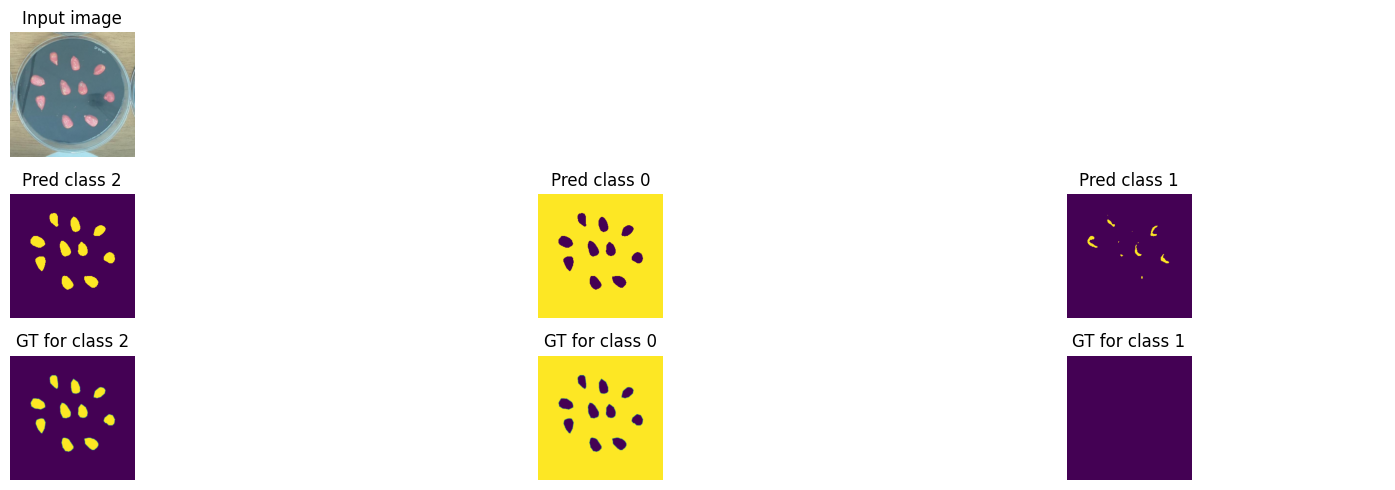

Train loss: 0.31624 | Time: 29m 13s | Val loss: 0.33572
Train_DICE_avg: 0.74456 | Train_Jaccard_avg: 0.68257 | Train_Sensitivity_avg: 0.72526 | Train_Specificity_avg: 0.96920 
Class 0 - Train_DICE: 0.98790 | Train_Jaccard: 0.97624 | Train_Sensitivity: 0.98007 | Train_Specificity: 0.91263 
Class 1 - Train_DICE: 0.39435 | Train_Jaccard: 0.31418 | Train_Sensitivity: 0.37602 | Train_Specificity: 0.99806 
Class 2 - Train_DICE: 0.85142 | Train_Jaccard: 0.75730 | Train_Sensitivity: 0.81969 | Train_Specificity: 0.99691 
Val_DICE_avg: 0.73877 | Val_Jaccard_avg: 0.68500 | Val_Sensitivity_avg: 0.72000 | Val_Specificity_avg: 0.95639 
Class 0 - Val_DICE: 0.99340 | Val_Jaccard: 0.98700 | Val_Sensitivity: 0.99053 | Val_Specificity: 0.87342 
Class 1 - Val_DICE: 0.36077 | Val_Jaccard: 0.29104 | Val_Sensitivity: 0.34156 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.86213 | Val_Jaccard: 0.77695 | Val_Sensitivity: 0.82790 | Val_Specificity: 0.99763 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.30925 | Time: 30m 2s | Val loss: 0.32537
Train_DICE_avg: 0.75050 | Train_Jaccard_avg: 0.68845 | Train_Sensitivity_avg: 0.73199 | Train_Specificity_avg: 0.97131 
Class 0 - Train_DICE: 0.98807 | Train_Jaccard: 0.97656 | Train_Sensitivity: 0.98033 | Train_Specificity: 0.91893 
Class 1 - Train_DICE: 0.40220 | Train_Jaccard: 0.32097 | Train_Sensitivity: 0.38354 | Train_Specificity: 0.99808 
Class 2 - Train_DICE: 0.86123 | Train_Jaccard: 0.76781 | Train_Sensitivity: 0.83210 | Train_Specificity: 0.99693 
Val_DICE_avg: 0.74039 | Val_Jaccard_avg: 0.68680 | Val_Sensitivity_avg: 0.71887 | Val_Specificity_avg: 0.95258 
Class 0 - Val_DICE: 0.99339 | Val_Jaccard: 0.98698 | Val_Sensitivity: 0.99075 | Val_Specificity: 0.86177 
Class 1 - Val_DICE: 0.35999 | Val_Jaccard: 0.28968 | Val_Sensitivity: 0.33172 | Val_Specificity: 0.99829 
Class 2 - Val_DICE: 0.86780 | Val_Jaccard: 0.78374 | Val_Sensitivity: 0.83414 | Val_Specificity: 0.99766 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.30209 | Time: 30m 51s | Val loss: 0.31733
Train_DICE_avg: 0.75361 | Train_Jaccard_avg: 0.69216 | Train_Sensitivity_avg: 0.73664 | Train_Specificity_avg: 0.97102 
Class 0 - Train_DICE: 0.98834 | Train_Jaccard: 0.97708 | Train_Sensitivity: 0.98090 | Train_Specificity: 0.91811 
Class 1 - Train_DICE: 0.40494 | Train_Jaccard: 0.32364 | Train_Sensitivity: 0.38727 | Train_Specificity: 0.99805 
Class 2 - Train_DICE: 0.86755 | Train_Jaccard: 0.77577 | Train_Sensitivity: 0.84176 | Train_Specificity: 0.99691 
Val_DICE_avg: 0.75034 | Val_Jaccard_avg: 0.69701 | Val_Sensitivity_avg: 0.72759 | Val_Specificity_avg: 0.95496 
Class 0 - Val_DICE: 0.99346 | Val_Jaccard: 0.98712 | Val_Sensitivity: 0.99094 | Val_Specificity: 0.86864 
Class 1 - Val_DICE: 0.37811 | Val_Jaccard: 0.30707 | Val_Sensitivity: 0.33944 | Val_Specificity: 0.99853 
Class 2 - Val_DICE: 0.87945 | Val_Jaccard: 0.79684 | Val_Sensitivity: 0.85238 | Val_Specificity: 0.99771 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.29718 | Time: 31m 40s | Val loss: 0.31485
Train_DICE_avg: 0.75597 | Train_Jaccard_avg: 0.69461 | Train_Sensitivity_avg: 0.74046 | Train_Specificity_avg: 0.97123 
Class 0 - Train_DICE: 0.98837 | Train_Jaccard: 0.97714 | Train_Sensitivity: 0.98106 | Train_Specificity: 0.91874 
Class 1 - Train_DICE: 0.41045 | Train_Jaccard: 0.32901 | Train_Sensitivity: 0.39443 | Train_Specificity: 0.99805 
Class 2 - Train_DICE: 0.86909 | Train_Jaccard: 0.77768 | Train_Sensitivity: 0.84591 | Train_Specificity: 0.99690 
Val_DICE_avg: 0.75342 | Val_Jaccard_avg: 0.70159 | Val_Sensitivity_avg: 0.73912 | Val_Specificity_avg: 0.95817 
Class 0 - Val_DICE: 0.99351 | Val_Jaccard: 0.98722 | Val_Sensitivity: 0.99063 | Val_Specificity: 0.87885 
Class 1 - Val_DICE: 0.38205 | Val_Jaccard: 0.31344 | Val_Sensitivity: 0.35973 | Val_Specificity: 0.99826 
Class 2 - Val_DICE: 0.88470 | Val_Jaccard: 0.80410 | Val_Sensitivity: 0.86700 | Val_Specificity: 0.99740 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.29214 | Time: 32m 29s | Val loss: 0.30799
Train_DICE_avg: 0.75762 | Train_Jaccard_avg: 0.69695 | Train_Sensitivity_avg: 0.74257 | Train_Specificity_avg: 0.97227 
Class 0 - Train_DICE: 0.98840 | Train_Jaccard: 0.97721 | Train_Sensitivity: 0.98103 | Train_Specificity: 0.92186 
Class 1 - Train_DICE: 0.41370 | Train_Jaccard: 0.33324 | Train_Sensitivity: 0.39750 | Train_Specificity: 0.99810 
Class 2 - Train_DICE: 0.87075 | Train_Jaccard: 0.78039 | Train_Sensitivity: 0.84917 | Train_Specificity: 0.99685 
Val_DICE_avg: 0.75641 | Val_Jaccard_avg: 0.70571 | Val_Sensitivity_avg: 0.74462 | Val_Specificity_avg: 0.95966 
Class 0 - Val_DICE: 0.99372 | Val_Jaccard: 0.98763 | Val_Sensitivity: 0.99099 | Val_Specificity: 0.88314 
Class 1 - Val_DICE: 0.38572 | Val_Jaccard: 0.31728 | Val_Sensitivity: 0.36693 | Val_Specificity: 0.99822 
Class 2 - Val_DICE: 0.88979 | Val_Jaccard: 0.81222 | Val_Sensitivity: 0.87592 | Val_Specificity: 0.99763 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


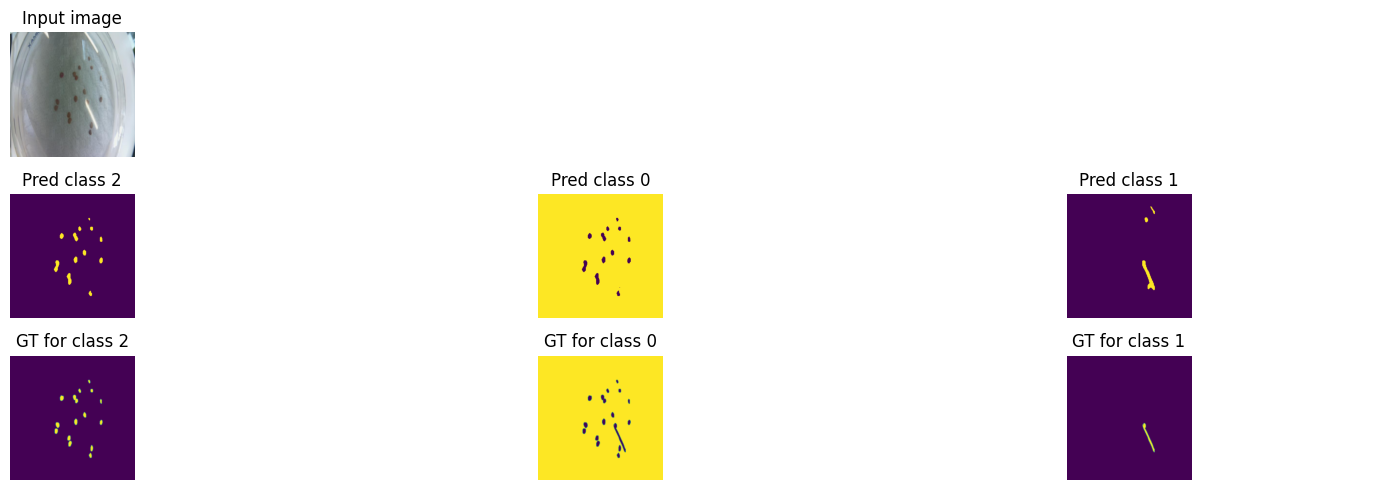

Train loss: 0.28740 | Time: 33m 18s | Val loss: 0.30307
Train_DICE_avg: 0.76058 | Train_Jaccard_avg: 0.70018 | Train_Sensitivity_avg: 0.74748 | Train_Specificity_avg: 0.97225 
Class 0 - Train_DICE: 0.98866 | Train_Jaccard: 0.97770 | Train_Sensitivity: 0.98144 | Train_Specificity: 0.92185 
Class 1 - Train_DICE: 0.42047 | Train_Jaccard: 0.33991 | Train_Sensitivity: 0.40691 | Train_Specificity: 0.99809 
Class 2 - Train_DICE: 0.87261 | Train_Jaccard: 0.78293 | Train_Sensitivity: 0.85408 | Train_Specificity: 0.99681 
Val_DICE_avg: 0.75690 | Val_Jaccard_avg: 0.70628 | Val_Sensitivity_avg: 0.74444 | Val_Specificity_avg: 0.95968 
Class 0 - Val_DICE: 0.99359 | Val_Jaccard: 0.98737 | Val_Sensitivity: 0.99075 | Val_Specificity: 0.88321 
Class 1 - Val_DICE: 0.38607 | Val_Jaccard: 0.31764 | Val_Sensitivity: 0.36224 | Val_Specificity: 0.99833 
Class 2 - Val_DICE: 0.89105 | Val_Jaccard: 0.81383 | Val_Sensitivity: 0.88032 | Val_Specificity: 0.99751 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.28467 | Time: 34m 7s | Val loss: 0.30208
Train_DICE_avg: 0.76116 | Train_Jaccard_avg: 0.70063 | Train_Sensitivity_avg: 0.74845 | Train_Specificity_avg: 0.97297 
Class 0 - Train_DICE: 0.98864 | Train_Jaccard: 0.97766 | Train_Sensitivity: 0.98147 | Train_Specificity: 0.92404 
Class 1 - Train_DICE: 0.42162 | Train_Jaccard: 0.34051 | Train_Sensitivity: 0.40911 | Train_Specificity: 0.99804 
Class 2 - Train_DICE: 0.87323 | Train_Jaccard: 0.78373 | Train_Sensitivity: 0.85476 | Train_Specificity: 0.99684 
Val_DICE_avg: 0.75269 | Val_Jaccard_avg: 0.70222 | Val_Sensitivity_avg: 0.74506 | Val_Specificity_avg: 0.96179 
Class 0 - Val_DICE: 0.99364 | Val_Jaccard: 0.98748 | Val_Sensitivity: 0.99063 | Val_Specificity: 0.88995 
Class 1 - Val_DICE: 0.37395 | Val_Jaccard: 0.30620 | Val_Sensitivity: 0.35379 | Val_Specificity: 0.99825 
Class 2 - Val_DICE: 0.89047 | Val_Jaccard: 0.81299 | Val_Sensitivity: 0.89077 | Val_Specificity: 0.99715 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.28113 | Time: 34m 56s | Val loss: 0.29690
Train_DICE_avg: 0.76418 | Train_Jaccard_avg: 0.70422 | Train_Sensitivity_avg: 0.75363 | Train_Specificity_avg: 0.97213 
Class 0 - Train_DICE: 0.98893 | Train_Jaccard: 0.97822 | Train_Sensitivity: 0.98215 | Train_Specificity: 0.92155 
Class 1 - Train_DICE: 0.42965 | Train_Jaccard: 0.34955 | Train_Sensitivity: 0.42139 | Train_Specificity: 0.99806 
Class 2 - Train_DICE: 0.87397 | Train_Jaccard: 0.78488 | Train_Sensitivity: 0.85734 | Train_Specificity: 0.99680 
Val_DICE_avg: 0.75715 | Val_Jaccard_avg: 0.70651 | Val_Sensitivity_avg: 0.74740 | Val_Specificity_avg: 0.95875 
Class 0 - Val_DICE: 0.99366 | Val_Jaccard: 0.98750 | Val_Sensitivity: 0.99107 | Val_Specificity: 0.88051 
Class 1 - Val_DICE: 0.38921 | Val_Jaccard: 0.32198 | Val_Sensitivity: 0.36990 | Val_Specificity: 0.99842 
Class 2 - Val_DICE: 0.88858 | Val_Jaccard: 0.81005 | Val_Sensitivity: 0.88124 | Val_Specificity: 0.99731 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.27853 | Time: 35m 45s | Val loss: 0.29377
Train_DICE_avg: 0.76564 | Train_Jaccard_avg: 0.70591 | Train_Sensitivity_avg: 0.75451 | Train_Specificity_avg: 0.97187 
Class 0 - Train_DICE: 0.98943 | Train_Jaccard: 0.97920 | Train_Sensitivity: 0.98321 | Train_Specificity: 0.92071 
Class 1 - Train_DICE: 0.43278 | Train_Jaccard: 0.35267 | Train_Sensitivity: 0.42232 | Train_Specificity: 0.99809 
Class 2 - Train_DICE: 0.87471 | Train_Jaccard: 0.78587 | Train_Sensitivity: 0.85800 | Train_Specificity: 0.99680 
Val_DICE_avg: 0.76006 | Val_Jaccard_avg: 0.71001 | Val_Sensitivity_avg: 0.75348 | Val_Specificity_avg: 0.96239 
Class 0 - Val_DICE: 0.99435 | Val_Jaccard: 0.98885 | Val_Sensitivity: 0.99198 | Val_Specificity: 0.89176 
Class 1 - Val_DICE: 0.39383 | Val_Jaccard: 0.32560 | Val_Sensitivity: 0.38196 | Val_Specificity: 0.99810 
Class 2 - Val_DICE: 0.89200 | Val_Jaccard: 0.81560 | Val_Sensitivity: 0.88648 | Val_Specificity: 0.99730 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.27511 | Time: 36m 34s | Val loss: 0.29022
Train_DICE_avg: 0.76622 | Train_Jaccard_avg: 0.70659 | Train_Sensitivity_avg: 0.75653 | Train_Specificity_avg: 0.97236 
Class 0 - Train_DICE: 0.98977 | Train_Jaccard: 0.97985 | Train_Sensitivity: 0.98397 | Train_Specificity: 0.92222 
Class 1 - Train_DICE: 0.43292 | Train_Jaccard: 0.35204 | Train_Sensitivity: 0.42542 | Train_Specificity: 0.99806 
Class 2 - Train_DICE: 0.87598 | Train_Jaccard: 0.78786 | Train_Sensitivity: 0.86018 | Train_Specificity: 0.99680 
Val_DICE_avg: 0.75885 | Val_Jaccard_avg: 0.70905 | Val_Sensitivity_avg: 0.75192 | Val_Specificity_avg: 0.96481 
Class 0 - Val_DICE: 0.99483 | Val_Jaccard: 0.98979 | Val_Sensitivity: 0.99289 | Val_Specificity: 0.89889 
Class 1 - Val_DICE: 0.38944 | Val_Jaccard: 0.32123 | Val_Sensitivity: 0.37093 | Val_Specificity: 0.99833 
Class 2 - Val_DICE: 0.89227 | Val_Jaccard: 0.81613 | Val_Sensitivity: 0.89194 | Val_Specificity: 0.99720 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


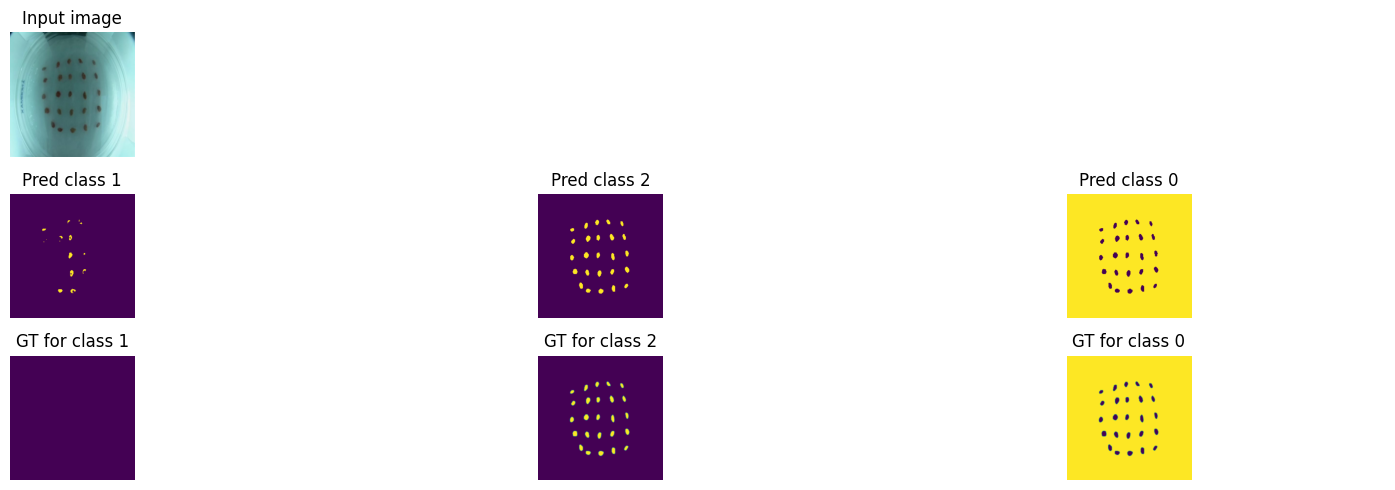

Train loss: 0.27290 | Time: 37m 23s | Val loss: 0.28653
Train_DICE_avg: 0.76786 | Train_Jaccard_avg: 0.70904 | Train_Sensitivity_avg: 0.75931 | Train_Specificity_avg: 0.97248 
Class 0 - Train_DICE: 0.99032 | Train_Jaccard: 0.98091 | Train_Sensitivity: 0.98497 | Train_Specificity: 0.92262 
Class 1 - Train_DICE: 0.43641 | Train_Jaccard: 0.35694 | Train_Sensitivity: 0.43064 | Train_Specificity: 0.99805 
Class 2 - Train_DICE: 0.87685 | Train_Jaccard: 0.78925 | Train_Sensitivity: 0.86233 | Train_Specificity: 0.99677 
Val_DICE_avg: 0.76368 | Val_Jaccard_avg: 0.71433 | Val_Sensitivity_avg: 0.76018 | Val_Specificity_avg: 0.96599 
Class 0 - Val_DICE: 0.99540 | Val_Jaccard: 0.99090 | Val_Sensitivity: 0.99407 | Val_Specificity: 0.90251 
Class 1 - Val_DICE: 0.40104 | Val_Jaccard: 0.33261 | Val_Sensitivity: 0.39135 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.89460 | Val_Jaccard: 0.81948 | Val_Sensitivity: 0.89512 | Val_Specificity: 0.99732 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.27103 | Time: 38m 13s | Val loss: 0.28441
Train_DICE_avg: 0.77114 | Train_Jaccard_avg: 0.71238 | Train_Sensitivity_avg: 0.76288 | Train_Specificity_avg: 0.97260 
Class 0 - Train_DICE: 0.99078 | Train_Jaccard: 0.98182 | Train_Sensitivity: 0.98597 | Train_Specificity: 0.92299 
Class 1 - Train_DICE: 0.44493 | Train_Jaccard: 0.36521 | Train_Sensitivity: 0.43865 | Train_Specificity: 0.99808 
Class 2 - Train_DICE: 0.87772 | Train_Jaccard: 0.79011 | Train_Sensitivity: 0.86402 | Train_Specificity: 0.99674 
Val_DICE_avg: 0.76524 | Val_Jaccard_avg: 0.71661 | Val_Sensitivity_avg: 0.75993 | Val_Specificity_avg: 0.96441 
Class 0 - Val_DICE: 0.99563 | Val_Jaccard: 0.99134 | Val_Sensitivity: 0.99475 | Val_Specificity: 0.89750 
Class 1 - Val_DICE: 0.40449 | Val_Jaccard: 0.33775 | Val_Sensitivity: 0.39166 | Val_Specificity: 0.99825 
Class 2 - Val_DICE: 0.89561 | Val_Jaccard: 0.82073 | Val_Sensitivity: 0.89339 | Val_Specificity: 0.99749 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.26844 | Time: 39m 2s | Val loss: 0.28524
Train_DICE_avg: 0.77132 | Train_Jaccard_avg: 0.71277 | Train_Sensitivity_avg: 0.76438 | Train_Specificity_avg: 0.97265 
Class 0 - Train_DICE: 0.99082 | Train_Jaccard: 0.98188 | Train_Sensitivity: 0.98605 | Train_Specificity: 0.92311 
Class 1 - Train_DICE: 0.44415 | Train_Jaccard: 0.36439 | Train_Sensitivity: 0.44162 | Train_Specificity: 0.99806 
Class 2 - Train_DICE: 0.87901 | Train_Jaccard: 0.79204 | Train_Sensitivity: 0.86547 | Train_Specificity: 0.99678 
Val_DICE_avg: 0.76403 | Val_Jaccard_avg: 0.71477 | Val_Sensitivity_avg: 0.76064 | Val_Specificity_avg: 0.96471 
Class 0 - Val_DICE: 0.99594 | Val_Jaccard: 0.99195 | Val_Sensitivity: 0.99538 | Val_Specificity: 0.89868 
Class 1 - Val_DICE: 0.40349 | Val_Jaccard: 0.33611 | Val_Sensitivity: 0.39213 | Val_Specificity: 0.99828 
Class 2 - Val_DICE: 0.89267 | Val_Jaccard: 0.81626 | Val_Sensitivity: 0.89440 | Val_Specificity: 0.99719 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.26607 | Time: 39m 51s | Val loss: 0.28494
Train_DICE_avg: 0.77163 | Train_Jaccard_avg: 0.71350 | Train_Sensitivity_avg: 0.76444 | Train_Specificity_avg: 0.97277 
Class 0 - Train_DICE: 0.99129 | Train_Jaccard: 0.98280 | Train_Sensitivity: 0.98699 | Train_Specificity: 0.92344 
Class 1 - Train_DICE: 0.44404 | Train_Jaccard: 0.36478 | Train_Sensitivity: 0.43879 | Train_Specificity: 0.99811 
Class 2 - Train_DICE: 0.87955 | Train_Jaccard: 0.79293 | Train_Sensitivity: 0.86754 | Train_Specificity: 0.99675 
Val_DICE_avg: 0.76262 | Val_Jaccard_avg: 0.71323 | Val_Sensitivity_avg: 0.75565 | Val_Specificity_avg: 0.96107 
Class 0 - Val_DICE: 0.99597 | Val_Jaccard: 0.99200 | Val_Sensitivity: 0.99592 | Val_Specificity: 0.88753 
Class 1 - Val_DICE: 0.39905 | Val_Jaccard: 0.33097 | Val_Sensitivity: 0.37897 | Val_Specificity: 0.99846 
Class 2 - Val_DICE: 0.89283 | Val_Jaccard: 0.81672 | Val_Sensitivity: 0.89205 | Val_Specificity: 0.99722 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.26447 | Time: 40m 40s | Val loss: 0.27981
Train_DICE_avg: 0.77246 | Train_Jaccard_avg: 0.71466 | Train_Sensitivity_avg: 0.76502 | Train_Specificity_avg: 0.97158 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98314 | Train_Sensitivity: 0.98755 | Train_Specificity: 0.91985 
Class 1 - Train_DICE: 0.44586 | Train_Jaccard: 0.36700 | Train_Sensitivity: 0.43918 | Train_Specificity: 0.99812 
Class 2 - Train_DICE: 0.88004 | Train_Jaccard: 0.79384 | Train_Sensitivity: 0.86835 | Train_Specificity: 0.99678 
Val_DICE_avg: 0.76867 | Val_Jaccard_avg: 0.72023 | Val_Sensitivity_avg: 0.76475 | Val_Specificity_avg: 0.96211 
Class 0 - Val_DICE: 0.99608 | Val_Jaccard: 0.99222 | Val_Sensitivity: 0.99602 | Val_Specificity: 0.89067 
Class 1 - Val_DICE: 0.41418 | Val_Jaccard: 0.34749 | Val_Sensitivity: 0.40716 | Val_Specificity: 0.99819 
Class 2 - Val_DICE: 0.89573 | Val_Jaccard: 0.82099 | Val_Sensitivity: 0.89105 | Val_Specificity: 0.99747 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


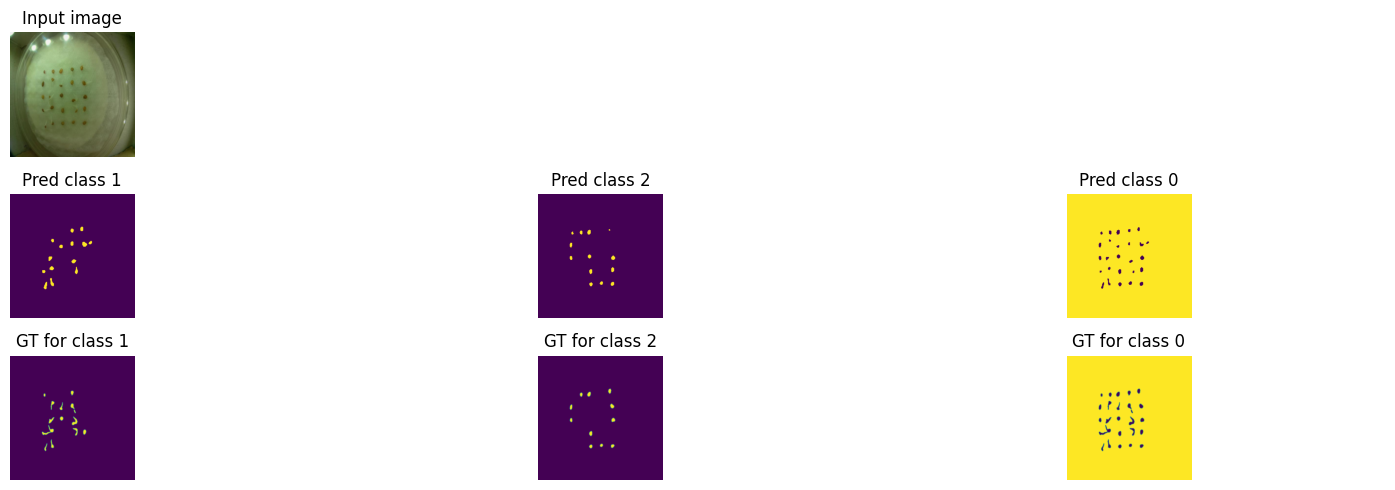

Train loss: 0.26406 | Time: 41m 29s | Val loss: 0.27795
Train_DICE_avg: 0.77167 | Train_Jaccard_avg: 0.71339 | Train_Sensitivity_avg: 0.76465 | Train_Specificity_avg: 0.97256 
Class 0 - Train_DICE: 0.99134 | Train_Jaccard: 0.98290 | Train_Sensitivity: 0.98726 | Train_Specificity: 0.92285 
Class 1 - Train_DICE: 0.44429 | Train_Jaccard: 0.36446 | Train_Sensitivity: 0.43894 | Train_Specificity: 0.99811 
Class 2 - Train_DICE: 0.87939 | Train_Jaccard: 0.79280 | Train_Sensitivity: 0.86774 | Train_Specificity: 0.99673 
Val_DICE_avg: 0.76275 | Val_Jaccard_avg: 0.71461 | Val_Sensitivity_avg: 0.75893 | Val_Specificity_avg: 0.96276 
Class 0 - Val_DICE: 0.99613 | Val_Jaccard: 0.99231 | Val_Sensitivity: 0.99593 | Val_Specificity: 0.89260 
Class 1 - Val_DICE: 0.39571 | Val_Jaccard: 0.32949 | Val_Sensitivity: 0.38826 | Val_Specificity: 0.99827 
Class 2 - Val_DICE: 0.89641 | Val_Jaccard: 0.82202 | Val_Sensitivity: 0.89261 | Val_Specificity: 0.99739 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.26159 | Time: 42m 18s | Val loss: 0.27733
Train_DICE_avg: 0.77325 | Train_Jaccard_avg: 0.71555 | Train_Sensitivity_avg: 0.76697 | Train_Specificity_avg: 0.97196 
Class 0 - Train_DICE: 0.99154 | Train_Jaccard: 0.98330 | Train_Sensitivity: 0.98766 | Train_Specificity: 0.92102 
Class 1 - Train_DICE: 0.44658 | Train_Jaccard: 0.36735 | Train_Sensitivity: 0.44270 | Train_Specificity: 0.99809 
Class 2 - Train_DICE: 0.88162 | Train_Jaccard: 0.79601 | Train_Sensitivity: 0.87054 | Train_Specificity: 0.99678 
Val_DICE_avg: 0.76508 | Val_Jaccard_avg: 0.71697 | Val_Sensitivity_avg: 0.76193 | Val_Specificity_avg: 0.96361 
Class 0 - Val_DICE: 0.99624 | Val_Jaccard: 0.99253 | Val_Sensitivity: 0.99622 | Val_Specificity: 0.89527 
Class 1 - Val_DICE: 0.40194 | Val_Jaccard: 0.33517 | Val_Sensitivity: 0.39112 | Val_Specificity: 0.99825 
Class 2 - Val_DICE: 0.89706 | Val_Jaccard: 0.82320 | Val_Sensitivity: 0.89845 | Val_Specificity: 0.99731 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.26011 | Time: 43m 7s | Val loss: 0.27585
Train_DICE_avg: 0.77513 | Train_Jaccard_avg: 0.71730 | Train_Sensitivity_avg: 0.76962 | Train_Specificity_avg: 0.97217 
Class 0 - Train_DICE: 0.99141 | Train_Jaccard: 0.98303 | Train_Sensitivity: 0.98741 | Train_Specificity: 0.92164 
Class 1 - Train_DICE: 0.45237 | Train_Jaccard: 0.37288 | Train_Sensitivity: 0.45074 | Train_Specificity: 0.99811 
Class 2 - Train_DICE: 0.88160 | Train_Jaccard: 0.79600 | Train_Sensitivity: 0.87072 | Train_Specificity: 0.99676 
Val_DICE_avg: 0.76679 | Val_Jaccard_avg: 0.71880 | Val_Sensitivity_avg: 0.76083 | Val_Specificity_avg: 0.96147 
Class 0 - Val_DICE: 0.99617 | Val_Jaccard: 0.99240 | Val_Sensitivity: 0.99637 | Val_Specificity: 0.88855 
Class 1 - Val_DICE: 0.40778 | Val_Jaccard: 0.34182 | Val_Sensitivity: 0.39831 | Val_Specificity: 0.99829 
Class 2 - Val_DICE: 0.89642 | Val_Jaccard: 0.82216 | Val_Sensitivity: 0.88781 | Val_Specificity: 0.99756 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.25853 | Time: 43m 56s | Val loss: 0.27319
Train_DICE_avg: 0.77683 | Train_Jaccard_avg: 0.71954 | Train_Sensitivity_avg: 0.77081 | Train_Specificity_avg: 0.97168 
Class 0 - Train_DICE: 0.99183 | Train_Jaccard: 0.98385 | Train_Sensitivity: 0.98839 | Train_Specificity: 0.92007 
Class 1 - Train_DICE: 0.45558 | Train_Jaccard: 0.37667 | Train_Sensitivity: 0.45183 | Train_Specificity: 0.99814 
Class 2 - Train_DICE: 0.88308 | Train_Jaccard: 0.79809 | Train_Sensitivity: 0.87221 | Train_Specificity: 0.99682 
Val_DICE_avg: 0.76840 | Val_Jaccard_avg: 0.72046 | Val_Sensitivity_avg: 0.76445 | Val_Specificity_avg: 0.96265 
Class 0 - Val_DICE: 0.99624 | Val_Jaccard: 0.99252 | Val_Sensitivity: 0.99622 | Val_Specificity: 0.89227 
Class 1 - Val_DICE: 0.41008 | Val_Jaccard: 0.34288 | Val_Sensitivity: 0.39886 | Val_Specificity: 0.99824 
Class 2 - Val_DICE: 0.89889 | Val_Jaccard: 0.82599 | Val_Sensitivity: 0.89827 | Val_Specificity: 0.99745 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.25684 | Time: 44m 45s | Val loss: 0.27499
Train_DICE_avg: 0.77674 | Train_Jaccard_avg: 0.71952 | Train_Sensitivity_avg: 0.77052 | Train_Specificity_avg: 0.97174 
Class 0 - Train_DICE: 0.99172 | Train_Jaccard: 0.98364 | Train_Sensitivity: 0.98814 | Train_Specificity: 0.92031 
Class 1 - Train_DICE: 0.45554 | Train_Jaccard: 0.37688 | Train_Sensitivity: 0.45002 | Train_Specificity: 0.99817 
Class 2 - Train_DICE: 0.88296 | Train_Jaccard: 0.79803 | Train_Sensitivity: 0.87339 | Train_Specificity: 0.99676 
Val_DICE_avg: 0.76541 | Val_Jaccard_avg: 0.71723 | Val_Sensitivity_avg: 0.76213 | Val_Specificity_avg: 0.96412 
Class 0 - Val_DICE: 0.99629 | Val_Jaccard: 0.99263 | Val_Sensitivity: 0.99623 | Val_Specificity: 0.89687 
Class 1 - Val_DICE: 0.40342 | Val_Jaccard: 0.33672 | Val_Sensitivity: 0.38950 | Val_Specificity: 0.99832 
Class 2 - Val_DICE: 0.89653 | Val_Jaccard: 0.82236 | Val_Sensitivity: 0.90067 | Val_Specificity: 0.99719 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


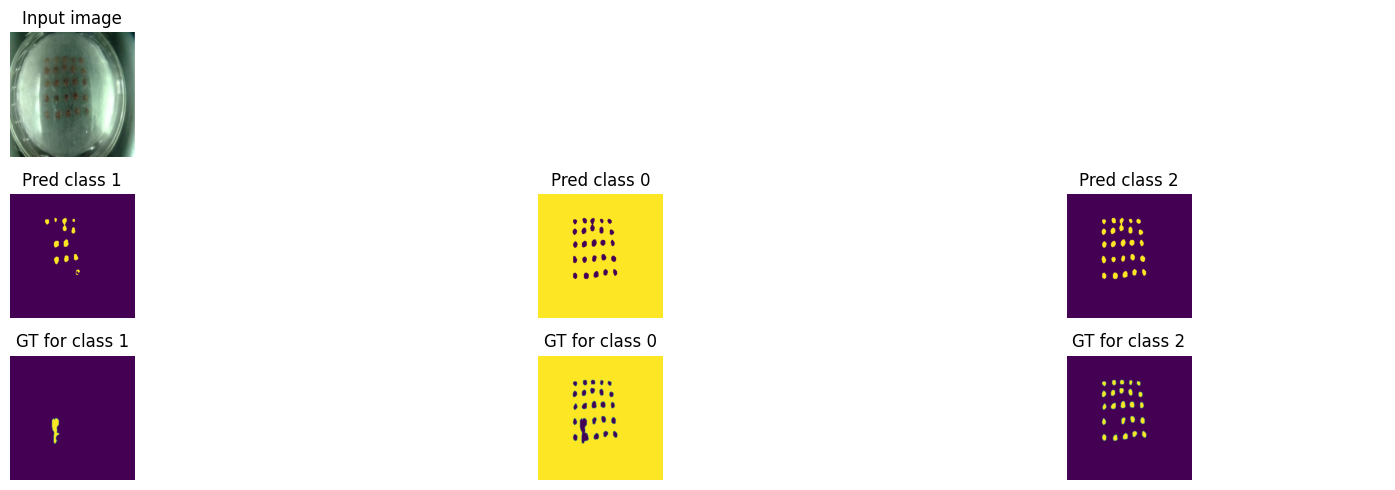

Train loss: 0.25760 | Time: 45m 34s | Val loss: 0.27584
Train_DICE_avg: 0.77670 | Train_Jaccard_avg: 0.71897 | Train_Sensitivity_avg: 0.77057 | Train_Specificity_avg: 0.97171 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98373 | Train_Sensitivity: 0.98825 | Train_Specificity: 0.92025 
Class 1 - Train_DICE: 0.45600 | Train_Jaccard: 0.37631 | Train_Sensitivity: 0.45062 | Train_Specificity: 0.99816 
Class 2 - Train_DICE: 0.88233 | Train_Jaccard: 0.79688 | Train_Sensitivity: 0.87284 | Train_Specificity: 0.99671 
Val_DICE_avg: 0.76183 | Val_Jaccard_avg: 0.71313 | Val_Sensitivity_avg: 0.75629 | Val_Specificity_avg: 0.96142 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99248 | Val_Sensitivity: 0.99634 | Val_Specificity: 0.88867 
Class 1 - Val_DICE: 0.39343 | Val_Jaccard: 0.32569 | Val_Sensitivity: 0.37526 | Val_Specificity: 0.99838 
Class 2 - Val_DICE: 0.89585 | Val_Jaccard: 0.82121 | Val_Sensitivity: 0.89729 | Val_Specificity: 0.99720 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.25583 | Time: 46m 23s | Val loss: 0.27556
Train_DICE_avg: 0.77929 | Train_Jaccard_avg: 0.72193 | Train_Sensitivity_avg: 0.77378 | Train_Specificity_avg: 0.97188 
Class 0 - Train_DICE: 0.99176 | Train_Jaccard: 0.98371 | Train_Sensitivity: 0.98824 | Train_Specificity: 0.92067 
Class 1 - Train_DICE: 0.46314 | Train_Jaccard: 0.38399 | Train_Sensitivity: 0.46003 | Train_Specificity: 0.99814 
Class 2 - Train_DICE: 0.88298 | Train_Jaccard: 0.79807 | Train_Sensitivity: 0.87307 | Train_Specificity: 0.99683 
Val_DICE_avg: 0.76489 | Val_Jaccard_avg: 0.71654 | Val_Sensitivity_avg: 0.76038 | Val_Specificity_avg: 0.96235 
Class 0 - Val_DICE: 0.99624 | Val_Jaccard: 0.99252 | Val_Sensitivity: 0.99625 | Val_Specificity: 0.89162 
Class 1 - Val_DICE: 0.40352 | Val_Jaccard: 0.33702 | Val_Sensitivity: 0.38744 | Val_Specificity: 0.99829 
Class 2 - Val_DICE: 0.89490 | Val_Jaccard: 0.82007 | Val_Sensitivity: 0.89745 | Val_Specificity: 0.99715 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.25506 | Time: 47m 12s | Val loss: 0.27197
Train_DICE_avg: 0.77814 | Train_Jaccard_avg: 0.72081 | Train_Sensitivity_avg: 0.77247 | Train_Specificity_avg: 0.97080 
Class 0 - Train_DICE: 0.99185 | Train_Jaccard: 0.98389 | Train_Sensitivity: 0.98861 | Train_Specificity: 0.91749 
Class 1 - Train_DICE: 0.45942 | Train_Jaccard: 0.38031 | Train_Sensitivity: 0.45542 | Train_Specificity: 0.99815 
Class 2 - Train_DICE: 0.88315 | Train_Jaccard: 0.79823 | Train_Sensitivity: 0.87339 | Train_Specificity: 0.99675 
Val_DICE_avg: 0.77027 | Val_Jaccard_avg: 0.72234 | Val_Sensitivity_avg: 0.76804 | Val_Specificity_avg: 0.96336 
Class 0 - Val_DICE: 0.99629 | Val_Jaccard: 0.99263 | Val_Sensitivity: 0.99628 | Val_Specificity: 0.89457 
Class 1 - Val_DICE: 0.41669 | Val_Jaccard: 0.35000 | Val_Sensitivity: 0.40896 | Val_Specificity: 0.99820 
Class 2 - Val_DICE: 0.89782 | Val_Jaccard: 0.82437 | Val_Sensitivity: 0.89889 | Val_Specificity: 0.99732 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.25378 | Time: 48m 1s | Val loss: 0.27297
Train_DICE_avg: 0.78038 | Train_Jaccard_avg: 0.72340 | Train_Sensitivity_avg: 0.77517 | Train_Specificity_avg: 0.97136 
Class 0 - Train_DICE: 0.99185 | Train_Jaccard: 0.98389 | Train_Sensitivity: 0.98855 | Train_Specificity: 0.91917 
Class 1 - Train_DICE: 0.46509 | Train_Jaccard: 0.38663 | Train_Sensitivity: 0.46242 | Train_Specificity: 0.99814 
Class 2 - Train_DICE: 0.88420 | Train_Jaccard: 0.79970 | Train_Sensitivity: 0.87454 | Train_Specificity: 0.99677 
Val_DICE_avg: 0.76458 | Val_Jaccard_avg: 0.71635 | Val_Sensitivity_avg: 0.76298 | Val_Specificity_avg: 0.96307 
Class 0 - Val_DICE: 0.99630 | Val_Jaccard: 0.99265 | Val_Sensitivity: 0.99636 | Val_Specificity: 0.89384 
Class 1 - Val_DICE: 0.40155 | Val_Jaccard: 0.33495 | Val_Sensitivity: 0.38985 | Val_Specificity: 0.99829 
Class 2 - Val_DICE: 0.89590 | Val_Jaccard: 0.82146 | Val_Sensitivity: 0.90273 | Val_Specificity: 0.99709 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.25333 | Time: 48m 50s | Val loss: 0.27248
Train_DICE_avg: 0.77830 | Train_Jaccard_avg: 0.72119 | Train_Sensitivity_avg: 0.77243 | Train_Specificity_avg: 0.97269 
Class 0 - Train_DICE: 0.99164 | Train_Jaccard: 0.98349 | Train_Sensitivity: 0.98802 | Train_Specificity: 0.92312 
Class 1 - Train_DICE: 0.45940 | Train_Jaccard: 0.38060 | Train_Sensitivity: 0.45483 | Train_Specificity: 0.99818 
Class 2 - Train_DICE: 0.88387 | Train_Jaccard: 0.79948 | Train_Sensitivity: 0.87445 | Train_Specificity: 0.99678 
Val_DICE_avg: 0.76357 | Val_Jaccard_avg: 0.71520 | Val_Sensitivity_avg: 0.76123 | Val_Specificity_avg: 0.96289 
Class 0 - Val_DICE: 0.99631 | Val_Jaccard: 0.99266 | Val_Sensitivity: 0.99641 | Val_Specificity: 0.89326 
Class 1 - Val_DICE: 0.39903 | Val_Jaccard: 0.33214 | Val_Sensitivity: 0.38497 | Val_Specificity: 0.99837 
Class 2 - Val_DICE: 0.89538 | Val_Jaccard: 0.82080 | Val_Sensitivity: 0.90230 | Val_Specificity: 0.99703 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


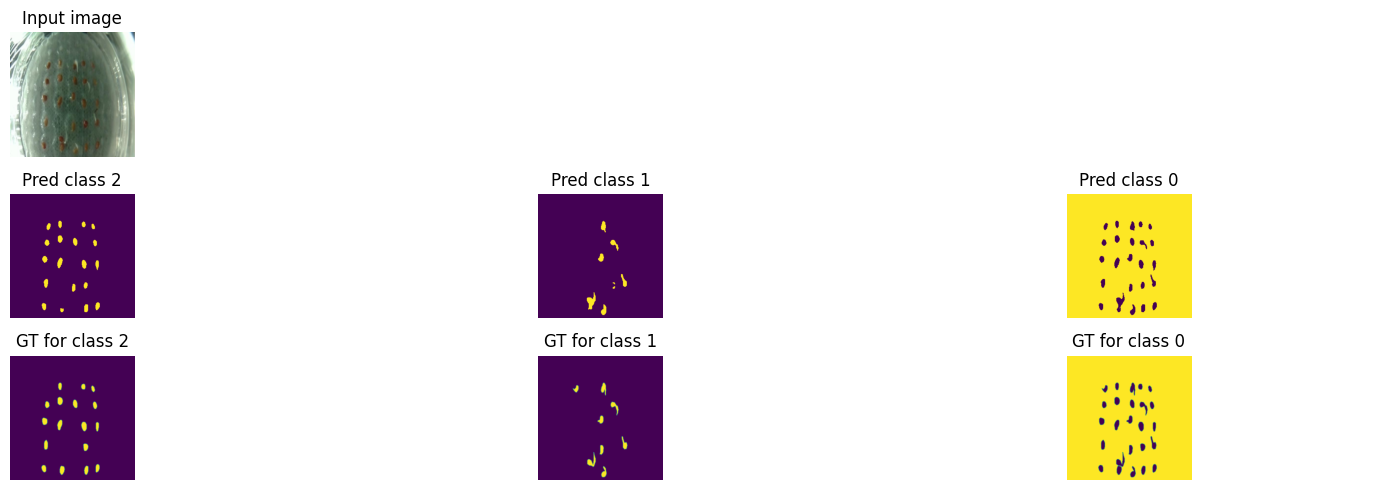

Train loss: 0.25216 | Time: 49m 39s | Val loss: 0.27162
Train_DICE_avg: 0.77813 | Train_Jaccard_avg: 0.72138 | Train_Sensitivity_avg: 0.77276 | Train_Specificity_avg: 0.97142 
Class 0 - Train_DICE: 0.99196 | Train_Jaccard: 0.98411 | Train_Sensitivity: 0.98883 | Train_Specificity: 0.91926 
Class 1 - Train_DICE: 0.45734 | Train_Jaccard: 0.37889 | Train_Sensitivity: 0.45249 | Train_Specificity: 0.99821 
Class 2 - Train_DICE: 0.88510 | Train_Jaccard: 0.80115 | Train_Sensitivity: 0.87695 | Train_Specificity: 0.99679 
Val_DICE_avg: 0.76664 | Val_Jaccard_avg: 0.71844 | Val_Sensitivity_avg: 0.76466 | Val_Specificity_avg: 0.96311 
Class 0 - Val_DICE: 0.99634 | Val_Jaccard: 0.99273 | Val_Sensitivity: 0.99643 | Val_Specificity: 0.89388 
Class 1 - Val_DICE: 0.40662 | Val_Jaccard: 0.33960 | Val_Sensitivity: 0.39643 | Val_Specificity: 0.99830 
Class 2 - Val_DICE: 0.89697 | Val_Jaccard: 0.82299 | Val_Sensitivity: 0.90112 | Val_Specificity: 0.99717 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 200MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]



Global Performance Metrics:
Loss mean: 0.25709, std: 0.02142
Dice Coefficient mean: 0.78084, std: 0.12258
Jaccard Index mean: 0.72023, std: 0.11094
Sensitivity mean: 0.91991, std: 0.06044
Specificity mean: 0.94791, std: 0.04675

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99552, std: 0.00253
Jaccard mean: 0.99109, std: 0.00498
Sensitivity mean: 0.99616, std: 0.00195
Specificity mean: 0.85286, std: 0.14099

Class 1:
Dice mean: 0.48054, std: 0.37635
Jaccard mean: 0.39827, std: 0.32959
Sensitivity mean: 0.87497, std: 0.15111
Specificity mean: 0.99485, std: 0.00558

Class 2:
Dice mean: 0.86645, std: 0.07333
Jaccard mean: 0.77133, std: 0.10587
Sensitivity mean: 0.88860, std: 0.08576
Specificity mean: 0.99604, std: 0.00251


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-ResUNet-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 0.74 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


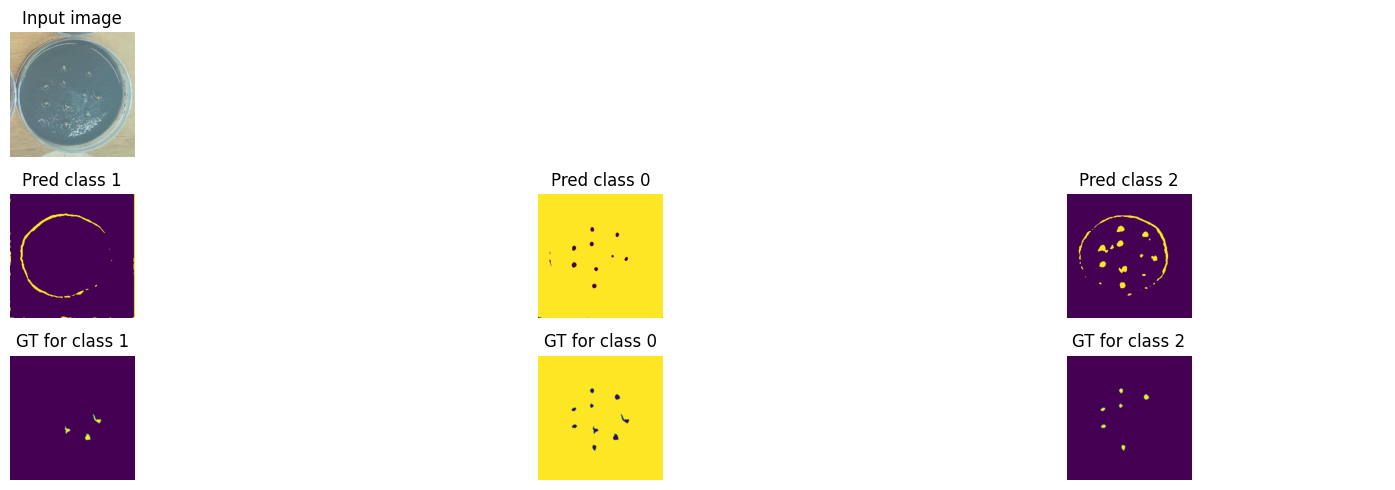

Train loss: 0.64367 | Time: 0m 48s | Val loss: 0.56864
Train_DICE_avg: 0.30436 | Train_Jaccard_avg: 0.23665 | Train_Sensitivity_avg: 0.70157 | Train_Specificity_avg: 0.68233 
Class 0 - Train_DICE: 0.14657 | Train_Jaccard: 0.08384 | Train_Sensitivity: 0.99268 | Train_Specificity: 0.07180 
Class 1 - Train_DICE: 0.15530 | Train_Jaccard: 0.15098 | Train_Sensitivity: 0.50941 | Train_Specificity: 0.98617 
Class 2 - Train_DICE: 0.61123 | Train_Jaccard: 0.47512 | Train_Sensitivity: 0.60261 | Train_Specificity: 0.98902 
Val_DICE_avg: 0.51925 | Val_Jaccard_avg: 0.42396 | Val_Sensitivity_avg: 0.94468 | Val_Specificity_avg: 0.67113 
Class 0 - Val_DICE: 0.41537 | Val_Jaccard: 0.26533 | Val_Sensitivity: 0.99898 | Val_Specificity: 0.03917 
Class 1 - Val_DICE: 0.45238 | Val_Jaccard: 0.45238 | Val_Sensitivity: 0.97222 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.69000 | Val_Jaccard: 0.55417 | Val_Sensitivity: 0.86284 | Val_Specificity: 0.98590 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.55217 | Time: 1m 35s | Val loss: 0.53076
Train_DICE_avg: 0.52148 | Train_Jaccard_avg: 0.42577 | Train_Sensitivity_avg: 0.89179 | Train_Specificity_avg: 0.69635 
Class 0 - Train_DICE: 0.56891 | Train_Jaccard: 0.41719 | Train_Sensitivity: 0.99850 | Train_Specificity: 0.11223 
Class 1 - Train_DICE: 0.26088 | Train_Jaccard: 0.26002 | Train_Sensitivity: 0.91489 | Train_Specificity: 0.98595 
Class 2 - Train_DICE: 0.73466 | Train_Jaccard: 0.60011 | Train_Sensitivity: 0.76197 | Train_Specificity: 0.99089 
Val_DICE_avg: 0.67743 | Val_Jaccard_avg: 0.59715 | Val_Sensitivity_avg: 0.89743 | Val_Specificity_avg: 0.69154 
Class 0 - Val_DICE: 0.84398 | Val_Jaccard: 0.73103 | Val_Sensitivity: 0.99845 | Val_Specificity: 0.09674 
Class 1 - Val_DICE: 0.43487 | Val_Jaccard: 0.43375 | Val_Sensitivity: 0.86610 | Val_Specificity: 0.98835 
Class 2 - Val_DICE: 0.75345 | Val_Jaccard: 0.62668 | Val_Sensitivity: 0.82775 | Val_Specificity: 0.98955 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.51408 | Time: 2m 22s | Val loss: 0.50216
Train_DICE_avg: 0.62598 | Train_Jaccard_avg: 0.55129 | Train_Sensitivity_avg: 0.90895 | Train_Specificity_avg: 0.73661 
Class 0 - Train_DICE: 0.88096 | Train_Jaccard: 0.78979 | Train_Sensitivity: 0.99770 | Train_Specificity: 0.23427 
Class 1 - Train_DICE: 0.26320 | Train_Jaccard: 0.26263 | Train_Sensitivity: 0.93320 | Train_Specificity: 0.98568 
Class 2 - Train_DICE: 0.73378 | Train_Jaccard: 0.60146 | Train_Sensitivity: 0.79593 | Train_Specificity: 0.98989 
Val_DICE_avg: 0.70766 | Val_Jaccard_avg: 0.64279 | Val_Sensitivity_avg: 0.93190 | Val_Specificity_avg: 0.71050 
Class 0 - Val_DICE: 0.91930 | Val_Jaccard: 0.85117 | Val_Sensitivity: 0.99838 | Val_Specificity: 0.15424 
Class 1 - Val_DICE: 0.44849 | Val_Jaccard: 0.44845 | Val_Sensitivity: 0.96038 | Val_Specificity: 0.98832 
Class 2 - Val_DICE: 0.75519 | Val_Jaccard: 0.62874 | Val_Sensitivity: 0.83695 | Val_Specificity: 0.98893 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.48151 | Time: 3m 9s | Val loss: 0.47100
Train_DICE_avg: 0.64200 | Train_Jaccard_avg: 0.57771 | Train_Sensitivity_avg: 0.91870 | Train_Specificity_avg: 0.76342 
Class 0 - Train_DICE: 0.92851 | Train_Jaccard: 0.86716 | Train_Sensitivity: 0.99753 | Train_Specificity: 0.31484 
Class 1 - Train_DICE: 0.26793 | Train_Jaccard: 0.26760 | Train_Sensitivity: 0.94493 | Train_Specificity: 0.98594 
Class 2 - Train_DICE: 0.72956 | Train_Jaccard: 0.59838 | Train_Sensitivity: 0.81364 | Train_Specificity: 0.98947 
Val_DICE_avg: 0.70398 | Val_Jaccard_avg: 0.64385 | Val_Sensitivity_avg: 0.95067 | Val_Specificity_avg: 0.72759 
Class 0 - Val_DICE: 0.94722 | Val_Jaccard: 0.90000 | Val_Sensitivity: 0.99872 | Val_Specificity: 0.20792 
Class 1 - Val_DICE: 0.44841 | Val_Jaccard: 0.44841 | Val_Sensitivity: 0.96825 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.71632 | Val_Jaccard: 0.58315 | Val_Sensitivity: 0.88504 | Val_Specificity: 0.98653 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.45107 | Time: 3m 57s | Val loss: 0.43779
Train_DICE_avg: 0.64734 | Train_Jaccard_avg: 0.58942 | Train_Sensitivity_avg: 0.92972 | Train_Specificity_avg: 0.78571 
Class 0 - Train_DICE: 0.95016 | Train_Jaccard: 0.90545 | Train_Sensitivity: 0.99751 | Train_Specificity: 0.38292 
Class 1 - Train_DICE: 0.27117 | Train_Jaccard: 0.27073 | Train_Sensitivity: 0.95367 | Train_Specificity: 0.98559 
Class 2 - Train_DICE: 0.72069 | Train_Jaccard: 0.59207 | Train_Sensitivity: 0.83799 | Train_Specificity: 0.98863 
Val_DICE_avg: 0.70585 | Val_Jaccard_avg: 0.65087 | Val_Sensitivity_avg: 0.95044 | Val_Specificity_avg: 0.75765 
Class 0 - Val_DICE: 0.96931 | Val_Jaccard: 0.94060 | Val_Sensitivity: 0.99876 | Val_Specificity: 0.29907 
Class 1 - Val_DICE: 0.44843 | Val_Jaccard: 0.44842 | Val_Sensitivity: 0.95671 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.69982 | Val_Jaccard: 0.56359 | Val_Sensitivity: 0.89584 | Val_Specificity: 0.98556 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


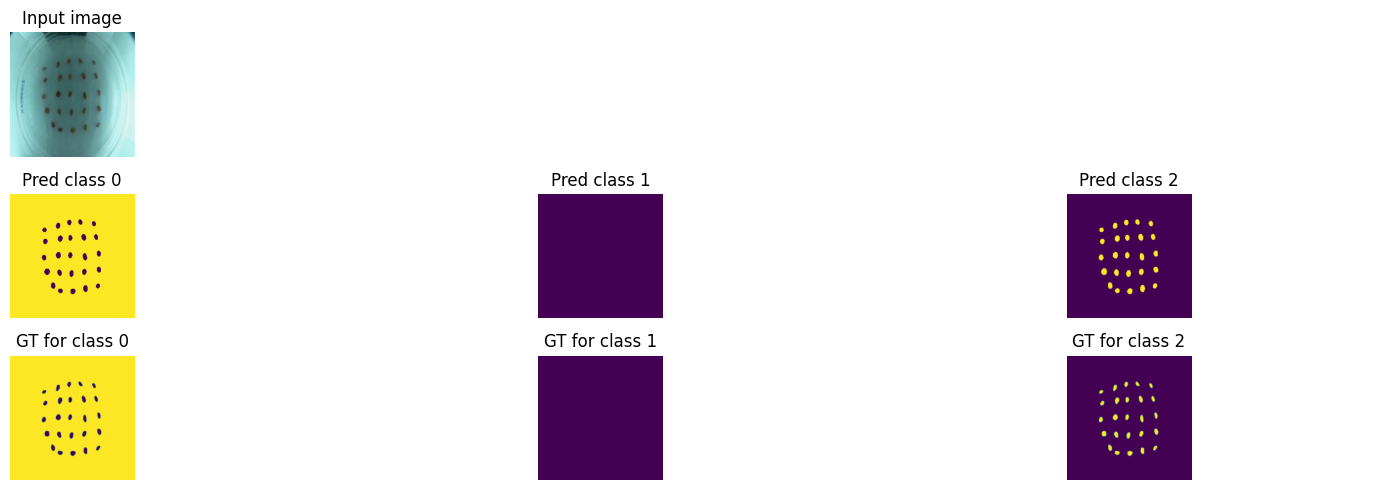

Train loss: 0.42178 | Time: 4m 45s | Val loss: 0.40705
Train_DICE_avg: 0.64801 | Train_Jaccard_avg: 0.59376 | Train_Sensitivity_avg: 0.94245 | Train_Specificity_avg: 0.80862 
Class 0 - Train_DICE: 0.96499 | Train_Jaccard: 0.93260 | Train_Sensitivity: 0.99776 | Train_Specificity: 0.45291 
Class 1 - Train_DICE: 0.26449 | Train_Jaccard: 0.26434 | Train_Sensitivity: 0.96583 | Train_Specificity: 0.98540 
Class 2 - Train_DICE: 0.71456 | Train_Jaccard: 0.58435 | Train_Sensitivity: 0.86376 | Train_Specificity: 0.98755 
Val_DICE_avg: 0.72010 | Val_Jaccard_avg: 0.66767 | Val_Sensitivity_avg: 0.96989 | Val_Specificity_avg: 0.78254 
Class 0 - Val_DICE: 0.97772 | Val_Jaccard: 0.95663 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.37370 
Class 1 - Val_DICE: 0.45635 | Val_Jaccard: 0.45635 | Val_Sensitivity: 0.98810 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.72622 | Val_Jaccard: 0.59003 | Val_Sensitivity: 0.92230 | Val_Specificity: 0.98559 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.39398 | Time: 5m 32s | Val loss: 0.38428
Train_DICE_avg: 0.65916 | Train_Jaccard_avg: 0.60666 | Train_Sensitivity_avg: 0.94505 | Train_Specificity_avg: 0.82846 
Class 0 - Train_DICE: 0.97211 | Train_Jaccard: 0.94594 | Train_Sensitivity: 0.99780 | Train_Specificity: 0.51171 
Class 1 - Train_DICE: 0.27359 | Train_Jaccard: 0.27278 | Train_Sensitivity: 0.96320 | Train_Specificity: 0.98578 
Class 2 - Train_DICE: 0.73176 | Train_Jaccard: 0.60125 | Train_Sensitivity: 0.87414 | Train_Specificity: 0.98788 
Val_DICE_avg: 0.72226 | Val_Jaccard_avg: 0.66827 | Val_Sensitivity_avg: 0.96826 | Val_Specificity_avg: 0.78533 
Class 0 - Val_DICE: 0.97818 | Val_Jaccard: 0.95754 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.38169 
Class 1 - Val_DICE: 0.46781 | Val_Jaccard: 0.46251 | Val_Sensitivity: 0.97651 | Val_Specificity: 0.98869 
Class 2 - Val_DICE: 0.72077 | Val_Jaccard: 0.58476 | Val_Sensitivity: 0.92884 | Val_Specificity: 0.98560 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.36691 | Time: 6m 19s | Val loss: 0.35368
Train_DICE_avg: 0.67090 | Train_Jaccard_avg: 0.61583 | Train_Sensitivity_avg: 0.94081 | Train_Specificity_avg: 0.84254 
Class 0 - Train_DICE: 0.97637 | Train_Jaccard: 0.95397 | Train_Sensitivity: 0.99766 | Train_Specificity: 0.55310 
Class 1 - Train_DICE: 0.29889 | Train_Jaccard: 0.28583 | Train_Sensitivity: 0.94435 | Train_Specificity: 0.98638 
Class 2 - Train_DICE: 0.73745 | Train_Jaccard: 0.60768 | Train_Sensitivity: 0.88041 | Train_Specificity: 0.98813 
Val_DICE_avg: 0.74812 | Val_Jaccard_avg: 0.69047 | Val_Sensitivity_avg: 0.96227 | Val_Specificity_avg: 0.79549 
Class 0 - Val_DICE: 0.98063 | Val_Jaccard: 0.96220 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.40946 
Class 1 - Val_DICE: 0.51223 | Val_Jaccard: 0.48692 | Val_Sensitivity: 0.95339 | Val_Specificity: 0.98986 
Class 2 - Val_DICE: 0.75151 | Val_Jaccard: 0.62229 | Val_Sensitivity: 0.93398 | Val_Specificity: 0.98714 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.34079 | Time: 7m 7s | Val loss: 0.32877
Train_DICE_avg: 0.68396 | Train_Jaccard_avg: 0.62569 | Train_Sensitivity_avg: 0.93384 | Train_Specificity_avg: 0.84653 
Class 0 - Train_DICE: 0.97892 | Train_Jaccard: 0.95884 | Train_Sensitivity: 0.99763 | Train_Specificity: 0.56484 
Class 1 - Train_DICE: 0.32591 | Train_Jaccard: 0.30066 | Train_Sensitivity: 0.92000 | Train_Specificity: 0.98661 
Class 2 - Train_DICE: 0.74706 | Train_Jaccard: 0.61757 | Train_Sensitivity: 0.88389 | Train_Specificity: 0.98815 
Val_DICE_avg: 0.76111 | Val_Jaccard_avg: 0.70039 | Val_Sensitivity_avg: 0.94897 | Val_Specificity_avg: 0.79707 
Class 0 - Val_DICE: 0.98042 | Val_Jaccard: 0.96188 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.41301 
Class 1 - Val_DICE: 0.54462 | Val_Jaccard: 0.50909 | Val_Sensitivity: 0.92324 | Val_Specificity: 0.99103 
Class 2 - Val_DICE: 0.75829 | Val_Jaccard: 0.63020 | Val_Sensitivity: 0.92426 | Val_Specificity: 0.98717 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.31535 | Time: 7m 54s | Val loss: 0.30559
Train_DICE_avg: 0.69191 | Train_Jaccard_avg: 0.63252 | Train_Sensitivity_avg: 0.93739 | Train_Specificity_avg: 0.85568 
Class 0 - Train_DICE: 0.98082 | Train_Jaccard: 0.96248 | Train_Sensitivity: 0.99747 | Train_Specificity: 0.59202 
Class 1 - Train_DICE: 0.34605 | Train_Jaccard: 0.31439 | Train_Sensitivity: 0.92361 | Train_Specificity: 0.98685 
Class 2 - Train_DICE: 0.74886 | Train_Jaccard: 0.62068 | Train_Sensitivity: 0.89111 | Train_Specificity: 0.98819 
Val_DICE_avg: 0.77169 | Val_Jaccard_avg: 0.71127 | Val_Sensitivity_avg: 0.96319 | Val_Specificity_avg: 0.80285 
Class 0 - Val_DICE: 0.98205 | Val_Jaccard: 0.96495 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.42980 
Class 1 - Val_DICE: 0.56649 | Val_Jaccard: 0.52925 | Val_Sensitivity: 0.95071 | Val_Specificity: 0.99118 
Class 2 - Val_DICE: 0.76654 | Val_Jaccard: 0.63961 | Val_Sensitivity: 0.93937 | Val_Specificity: 0.98758 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


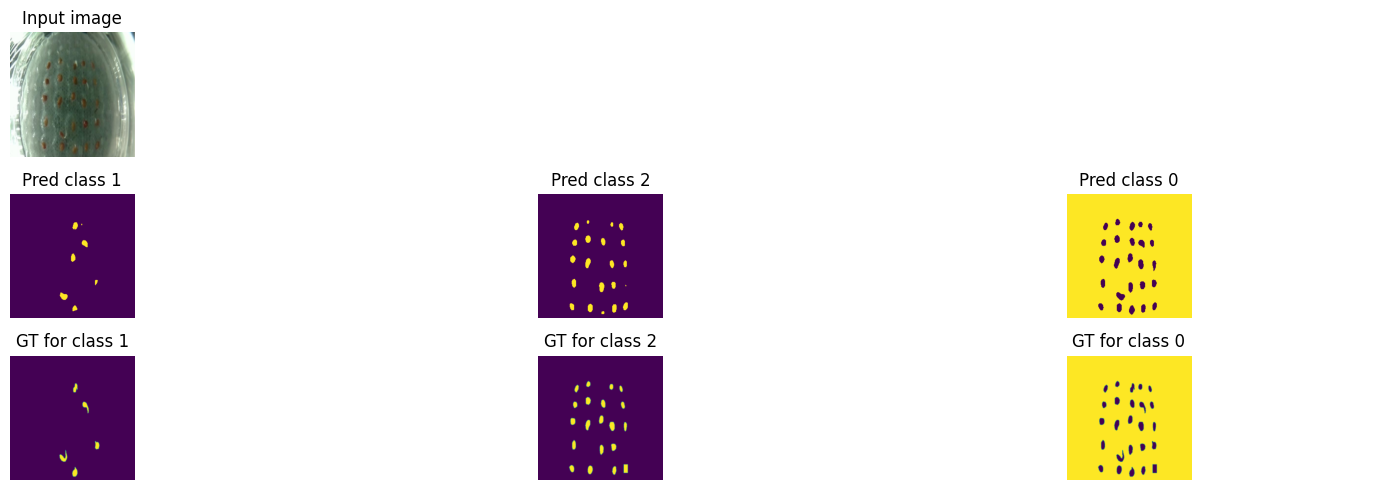

Train loss: 0.29130 | Time: 8m 43s | Val loss: 0.27766
Train_DICE_avg: 0.70196 | Train_Jaccard_avg: 0.64171 | Train_Sensitivity_avg: 0.93809 | Train_Specificity_avg: 0.86263 
Class 0 - Train_DICE: 0.98202 | Train_Jaccard: 0.96477 | Train_Sensitivity: 0.99728 | Train_Specificity: 0.61233 
Class 1 - Train_DICE: 0.36681 | Train_Jaccard: 0.33224 | Train_Sensitivity: 0.92336 | Train_Specificity: 0.98733 
Class 2 - Train_DICE: 0.75705 | Train_Jaccard: 0.62813 | Train_Sensitivity: 0.89362 | Train_Specificity: 0.98822 
Val_DICE_avg: 0.77889 | Val_Jaccard_avg: 0.71454 | Val_Sensitivity_avg: 0.96234 | Val_Specificity_avg: 0.81073 
Class 0 - Val_DICE: 0.98403 | Val_Jaccard: 0.96871 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.45444 
Class 1 - Val_DICE: 0.60073 | Val_Jaccard: 0.55728 | Val_Sensitivity: 0.93836 | Val_Specificity: 0.99149 
Class 2 - Val_DICE: 0.75191 | Val_Jaccard: 0.61762 | Val_Sensitivity: 0.94917 | Val_Specificity: 0.98628 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.26703 | Time: 9m 31s | Val loss: 0.25337
Train_DICE_avg: 0.71021 | Train_Jaccard_avg: 0.64895 | Train_Sensitivity_avg: 0.94174 | Train_Specificity_avg: 0.86925 
Class 0 - Train_DICE: 0.98370 | Train_Jaccard: 0.96800 | Train_Sensitivity: 0.99751 | Train_Specificity: 0.63190 
Class 1 - Train_DICE: 0.38307 | Train_Jaccard: 0.34288 | Train_Sensitivity: 0.92714 | Train_Specificity: 0.98740 
Class 2 - Train_DICE: 0.76386 | Train_Jaccard: 0.63597 | Train_Sensitivity: 0.90056 | Train_Specificity: 0.98847 
Val_DICE_avg: 0.76817 | Val_Jaccard_avg: 0.70403 | Val_Sensitivity_avg: 0.96978 | Val_Specificity_avg: 0.81917 
Class 0 - Val_DICE: 0.98594 | Val_Jaccard: 0.97237 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.48080 
Class 1 - Val_DICE: 0.57407 | Val_Jaccard: 0.53158 | Val_Sensitivity: 0.95832 | Val_Specificity: 0.99103 
Class 2 - Val_DICE: 0.74452 | Val_Jaccard: 0.60815 | Val_Sensitivity: 0.95170 | Val_Specificity: 0.98569 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.24583 | Time: 10m 19s | Val loss: 0.23508
Train_DICE_avg: 0.71340 | Train_Jaccard_avg: 0.65164 | Train_Sensitivity_avg: 0.94448 | Train_Specificity_avg: 0.87117 
Class 0 - Train_DICE: 0.98456 | Train_Jaccard: 0.96966 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.63778 
Class 1 - Train_DICE: 0.38971 | Train_Jaccard: 0.34727 | Train_Sensitivity: 0.93062 | Train_Specificity: 0.98749 
Class 2 - Train_DICE: 0.76593 | Train_Jaccard: 0.63798 | Train_Sensitivity: 0.90541 | Train_Specificity: 0.98824 
Val_DICE_avg: 0.77953 | Val_Jaccard_avg: 0.71404 | Val_Sensitivity_avg: 0.97143 | Val_Specificity_avg: 0.82215 
Class 0 - Val_DICE: 0.98649 | Val_Jaccard: 0.97342 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.48939 
Class 1 - Val_DICE: 0.60869 | Val_Jaccard: 0.56196 | Val_Sensitivity: 0.95882 | Val_Specificity: 0.99162 
Class 2 - Val_DICE: 0.74341 | Val_Jaccard: 0.60673 | Val_Sensitivity: 0.95611 | Val_Specificity: 0.98543 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.22546 | Time: 11m 8s | Val loss: 0.21403
Train_DICE_avg: 0.72159 | Train_Jaccard_avg: 0.65892 | Train_Sensitivity_avg: 0.94274 | Train_Specificity_avg: 0.87879 
Class 0 - Train_DICE: 0.98582 | Train_Jaccard: 0.97209 | Train_Sensitivity: 0.99720 | Train_Specificity: 0.66034 
Class 1 - Train_DICE: 0.40760 | Train_Jaccard: 0.36033 | Train_Sensitivity: 0.92277 | Train_Specificity: 0.98770 
Class 2 - Train_DICE: 0.77134 | Train_Jaccard: 0.64435 | Train_Sensitivity: 0.90824 | Train_Specificity: 0.98833 
Val_DICE_avg: 0.77043 | Val_Jaccard_avg: 0.70208 | Val_Sensitivity_avg: 0.97225 | Val_Specificity_avg: 0.83062 
Class 0 - Val_DICE: 0.98786 | Val_Jaccard: 0.97608 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.51634 
Class 1 - Val_DICE: 0.61411 | Val_Jaccard: 0.56395 | Val_Sensitivity: 0.95587 | Val_Specificity: 0.99172 
Class 2 - Val_DICE: 0.70932 | Val_Jaccard: 0.56622 | Val_Sensitivity: 0.96153 | Val_Specificity: 0.98379 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.20623 | Time: 11m 56s | Val loss: 0.19687
Train_DICE_avg: 0.72130 | Train_Jaccard_avg: 0.65788 | Train_Sensitivity_avg: 0.94420 | Train_Specificity_avg: 0.88060 
Class 0 - Train_DICE: 0.98682 | Train_Jaccard: 0.97403 | Train_Sensitivity: 0.99727 | Train_Specificity: 0.66603 
Class 1 - Train_DICE: 0.40832 | Train_Jaccard: 0.35899 | Train_Sensitivity: 0.92032 | Train_Specificity: 0.98771 
Class 2 - Train_DICE: 0.76875 | Train_Jaccard: 0.64061 | Train_Sensitivity: 0.91502 | Train_Specificity: 0.98807 
Val_DICE_avg: 0.77892 | Val_Jaccard_avg: 0.71216 | Val_Sensitivity_avg: 0.96817 | Val_Specificity_avg: 0.82733 
Class 0 - Val_DICE: 0.98744 | Val_Jaccard: 0.97527 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.50494 
Class 1 - Val_DICE: 0.61620 | Val_Jaccard: 0.56435 | Val_Sensitivity: 0.94884 | Val_Specificity: 0.99168 
Class 2 - Val_DICE: 0.73311 | Val_Jaccard: 0.59687 | Val_Sensitivity: 0.95628 | Val_Specificity: 0.98537 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


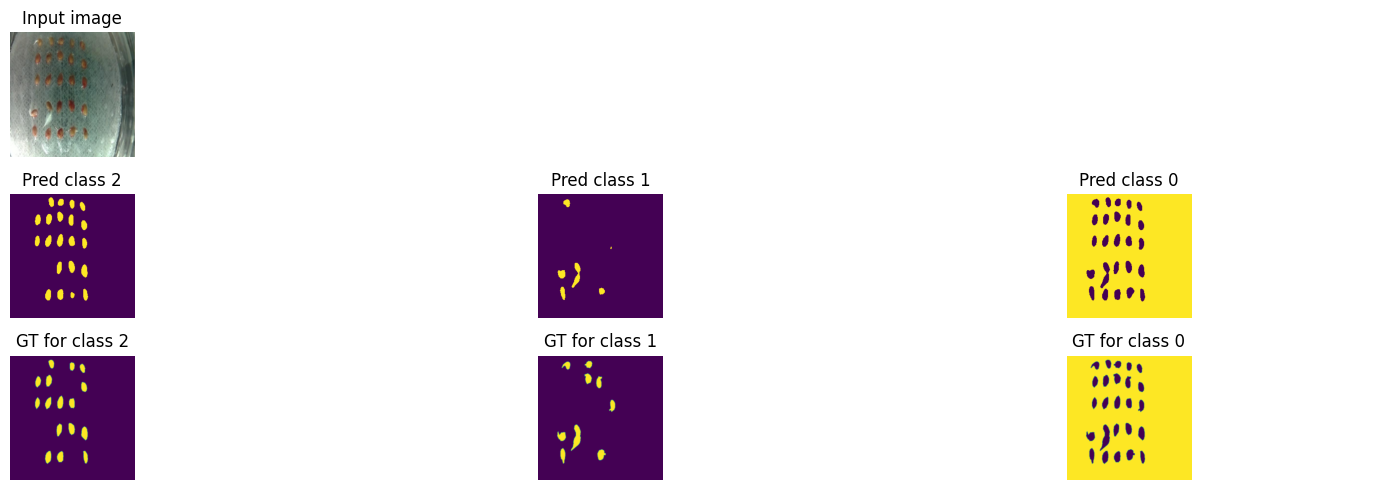

Train loss: 0.18847 | Time: 12m 44s | Val loss: 0.17881
Train_DICE_avg: 0.72361 | Train_Jaccard_avg: 0.65977 | Train_Sensitivity_avg: 0.94262 | Train_Specificity_avg: 0.88594 
Class 0 - Train_DICE: 0.98739 | Train_Jaccard: 0.97515 | Train_Sensitivity: 0.99693 | Train_Specificity: 0.68195 
Class 1 - Train_DICE: 0.41148 | Train_Jaccard: 0.36008 | Train_Sensitivity: 0.91611 | Train_Specificity: 0.98779 
Class 2 - Train_DICE: 0.77196 | Train_Jaccard: 0.64409 | Train_Sensitivity: 0.91484 | Train_Specificity: 0.98807 
Val_DICE_avg: 0.77791 | Val_Jaccard_avg: 0.71167 | Val_Sensitivity_avg: 0.96617 | Val_Specificity_avg: 0.82961 
Class 0 - Val_DICE: 0.98773 | Val_Jaccard: 0.97583 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.51159 
Class 1 - Val_DICE: 0.60255 | Val_Jaccard: 0.55095 | Val_Sensitivity: 0.94338 | Val_Specificity: 0.99146 
Class 2 - Val_DICE: 0.74346 | Val_Jaccard: 0.60823 | Val_Sensitivity: 0.95574 | Val_Specificity: 0.98579 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.17241 | Time: 13m 32s | Val loss: 0.16149
Train_DICE_avg: 0.72389 | Train_Jaccard_avg: 0.66065 | Train_Sensitivity_avg: 0.94074 | Train_Specificity_avg: 0.88859 
Class 0 - Train_DICE: 0.98798 | Train_Jaccard: 0.97630 | Train_Sensitivity: 0.99690 | Train_Specificity: 0.68977 
Class 1 - Train_DICE: 0.40570 | Train_Jaccard: 0.35506 | Train_Sensitivity: 0.91012 | Train_Specificity: 0.98772 
Class 2 - Train_DICE: 0.77798 | Train_Jaccard: 0.65058 | Train_Sensitivity: 0.91520 | Train_Specificity: 0.98829 
Val_DICE_avg: 0.77733 | Val_Jaccard_avg: 0.71021 | Val_Sensitivity_avg: 0.95912 | Val_Specificity_avg: 0.83179 
Class 0 - Val_DICE: 0.98804 | Val_Jaccard: 0.97644 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.51808 
Class 1 - Val_DICE: 0.59149 | Val_Jaccard: 0.53795 | Val_Sensitivity: 0.91948 | Val_Specificity: 0.99163 
Class 2 - Val_DICE: 0.75246 | Val_Jaccard: 0.61624 | Val_Sensitivity: 0.95847 | Val_Specificity: 0.98567 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.15791 | Time: 14m 21s | Val loss: 0.14864
Train_DICE_avg: 0.72194 | Train_Jaccard_avg: 0.65988 | Train_Sensitivity_avg: 0.94274 | Train_Specificity_avg: 0.89295 
Class 0 - Train_DICE: 0.98859 | Train_Jaccard: 0.97748 | Train_Sensitivity: 0.99694 | Train_Specificity: 0.70294 
Class 1 - Train_DICE: 0.39605 | Train_Jaccard: 0.34770 | Train_Sensitivity: 0.91574 | Train_Specificity: 0.98752 
Class 2 - Train_DICE: 0.78117 | Train_Jaccard: 0.65447 | Train_Sensitivity: 0.91555 | Train_Specificity: 0.98838 
Val_DICE_avg: 0.78357 | Val_Jaccard_avg: 0.71783 | Val_Sensitivity_avg: 0.96701 | Val_Specificity_avg: 0.83011 
Class 0 - Val_DICE: 0.98772 | Val_Jaccard: 0.97582 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.51287 
Class 1 - Val_DICE: 0.60243 | Val_Jaccard: 0.55087 | Val_Sensitivity: 0.94365 | Val_Specificity: 0.99124 
Class 2 - Val_DICE: 0.76055 | Val_Jaccard: 0.62679 | Val_Sensitivity: 0.95797 | Val_Specificity: 0.98622 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.14370 | Time: 15m 9s | Val loss: 0.13464
Train_DICE_avg: 0.72162 | Train_Jaccard_avg: 0.66087 | Train_Sensitivity_avg: 0.94576 | Train_Specificity_avg: 0.89745 
Class 0 - Train_DICE: 0.98900 | Train_Jaccard: 0.97827 | Train_Sensitivity: 0.99675 | Train_Specificity: 0.71651 
Class 1 - Train_DICE: 0.39520 | Train_Jaccard: 0.34951 | Train_Sensitivity: 0.92015 | Train_Specificity: 0.98745 
Class 2 - Train_DICE: 0.78065 | Train_Jaccard: 0.65482 | Train_Sensitivity: 0.92037 | Train_Specificity: 0.98839 
Val_DICE_avg: 0.77159 | Val_Jaccard_avg: 0.70625 | Val_Sensitivity_avg: 0.96741 | Val_Specificity_avg: 0.83496 
Class 0 - Val_DICE: 0.98857 | Val_Jaccard: 0.97747 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.52867 
Class 1 - Val_DICE: 0.58173 | Val_Jaccard: 0.53397 | Val_Sensitivity: 0.94169 | Val_Specificity: 0.99089 
Class 2 - Val_DICE: 0.74445 | Val_Jaccard: 0.60731 | Val_Sensitivity: 0.96115 | Val_Specificity: 0.98533 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.13072 | Time: 15m 57s | Val loss: 0.12181
Train_DICE_avg: 0.71689 | Train_Jaccard_avg: 0.65837 | Train_Sensitivity_avg: 0.94874 | Train_Specificity_avg: 0.90150 
Class 0 - Train_DICE: 0.98959 | Train_Jaccard: 0.97943 | Train_Sensitivity: 0.99660 | Train_Specificity: 0.72891 
Class 1 - Train_DICE: 0.38010 | Train_Jaccard: 0.33988 | Train_Sensitivity: 0.92677 | Train_Specificity: 0.98719 
Class 2 - Train_DICE: 0.78099 | Train_Jaccard: 0.65580 | Train_Sensitivity: 0.92286 | Train_Specificity: 0.98839 
Val_DICE_avg: 0.76451 | Val_Jaccard_avg: 0.70379 | Val_Sensitivity_avg: 0.96960 | Val_Specificity_avg: 0.83613 
Class 0 - Val_DICE: 0.98877 | Val_Jaccard: 0.97786 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.53233 
Class 1 - Val_DICE: 0.55562 | Val_Jaccard: 0.51807 | Val_Sensitivity: 0.94406 | Val_Specificity: 0.99020 
Class 2 - Val_DICE: 0.74914 | Val_Jaccard: 0.61544 | Val_Sensitivity: 0.96539 | Val_Specificity: 0.98585 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


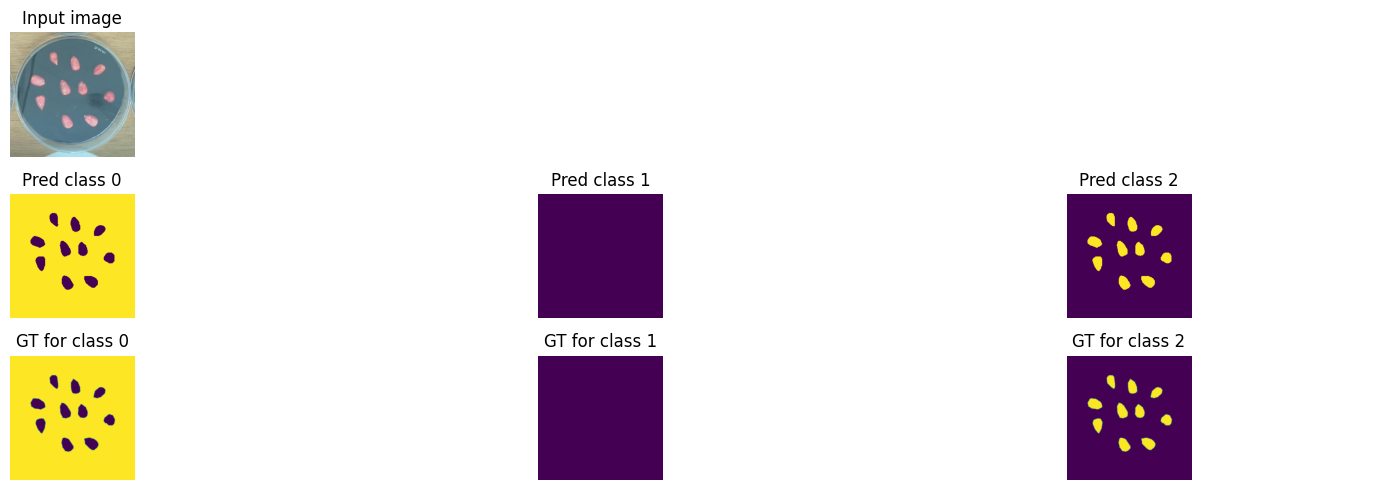

Train loss: 0.11742 | Time: 16m 46s | Val loss: 0.10799
Train_DICE_avg: 0.70361 | Train_Jaccard_avg: 0.64824 | Train_Sensitivity_avg: 0.95813 | Train_Specificity_avg: 0.89993 
Class 0 - Train_DICE: 0.98975 | Train_Jaccard: 0.97974 | Train_Sensitivity: 0.99647 | Train_Specificity: 0.72510 
Class 1 - Train_DICE: 0.34430 | Train_Jaccard: 0.31529 | Train_Sensitivity: 0.95328 | Train_Specificity: 0.98667 
Class 2 - Train_DICE: 0.77677 | Train_Jaccard: 0.64968 | Train_Sensitivity: 0.92464 | Train_Specificity: 0.98803 
Val_DICE_avg: 0.74933 | Val_Jaccard_avg: 0.69291 | Val_Sensitivity_avg: 0.97574 | Val_Specificity_avg: 0.84096 
Class 0 - Val_DICE: 0.98956 | Val_Jaccard: 0.97939 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.54822 
Class 1 - Val_DICE: 0.51239 | Val_Jaccard: 0.49064 | Val_Sensitivity: 0.96815 | Val_Specificity: 0.98927 
Class 2 - Val_DICE: 0.74603 | Val_Jaccard: 0.60869 | Val_Sensitivity: 0.95971 | Val_Specificity: 0.98540 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.10496 | Time: 17m 34s | Val loss: 0.09490
Train_DICE_avg: 0.69237 | Train_Jaccard_avg: 0.64299 | Train_Sensitivity_avg: 0.96604 | Train_Specificity_avg: 0.90246 
Class 0 - Train_DICE: 0.99012 | Train_Jaccard: 0.98047 | Train_Sensitivity: 0.99662 | Train_Specificity: 0.73339 
Class 1 - Train_DICE: 0.30739 | Train_Jaccard: 0.29560 | Train_Sensitivity: 0.97398 | Train_Specificity: 0.98597 
Class 2 - Train_DICE: 0.77960 | Train_Jaccard: 0.65291 | Train_Sensitivity: 0.92751 | Train_Specificity: 0.98801 
Val_DICE_avg: 0.73718 | Val_Jaccard_avg: 0.68692 | Val_Sensitivity_avg: 0.98449 | Val_Specificity_avg: 0.84264 
Class 0 - Val_DICE: 0.98981 | Val_Jaccard: 0.97988 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.55400 
Class 1 - Val_DICE: 0.47227 | Val_Jaccard: 0.46866 | Val_Sensitivity: 0.99473 | Val_Specificity: 0.98841 
Class 2 - Val_DICE: 0.74945 | Val_Jaccard: 0.61221 | Val_Sensitivity: 0.95941 | Val_Specificity: 0.98551 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.09470 | Time: 18m 23s | Val loss: 0.08558
Train_DICE_avg: 0.68180 | Train_Jaccard_avg: 0.63589 | Train_Sensitivity_avg: 0.97408 | Train_Specificity_avg: 0.90449 
Class 0 - Train_DICE: 0.99034 | Train_Jaccard: 0.98090 | Train_Sensitivity: 0.99652 | Train_Specificity: 0.73995 
Class 1 - Train_DICE: 0.27701 | Train_Jaccard: 0.27586 | Train_Sensitivity: 0.99690 | Train_Specificity: 0.98562 
Class 2 - Train_DICE: 0.77806 | Train_Jaccard: 0.65092 | Train_Sensitivity: 0.92883 | Train_Specificity: 0.98790 
Val_DICE_avg: 0.72975 | Val_Jaccard_avg: 0.68010 | Val_Sensitivity_avg: 0.98795 | Val_Specificity_avg: 0.84359 
Class 0 - Val_DICE: 0.98977 | Val_Jaccard: 0.97982 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.55752 
Class 1 - Val_DICE: 0.46827 | Val_Jaccard: 0.46826 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.73121 | Val_Jaccard: 0.59222 | Val_Sensitivity: 0.96443 | Val_Specificity: 0.98492 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.08567 | Time: 19m 11s | Val loss: 0.07848
Train_DICE_avg: 0.68564 | Train_Jaccard_avg: 0.64087 | Train_Sensitivity_avg: 0.97534 | Train_Specificity_avg: 0.90718 
Class 0 - Train_DICE: 0.99072 | Train_Jaccard: 0.98165 | Train_Sensitivity: 0.99656 | Train_Specificity: 0.74745 
Class 1 - Train_DICE: 0.28472 | Train_Jaccard: 0.28471 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98583 
Class 2 - Train_DICE: 0.78147 | Train_Jaccard: 0.65626 | Train_Sensitivity: 0.92945 | Train_Specificity: 0.98827 
Val_DICE_avg: 0.72987 | Val_Jaccard_avg: 0.68042 | Val_Sensitivity_avg: 0.98999 | Val_Specificity_avg: 0.84362 
Class 0 - Val_DICE: 0.98972 | Val_Jaccard: 0.97971 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.55763 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.73165 | Val_Jaccard: 0.59329 | Val_Sensitivity: 0.97056 | Val_Specificity: 0.98489 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.07828 | Time: 19m 59s | Val loss: 0.07110
Train_DICE_avg: 0.68550 | Train_Jaccard_avg: 0.64081 | Train_Sensitivity_avg: 0.97626 | Train_Specificity_avg: 0.90785 
Class 0 - Train_DICE: 0.99072 | Train_Jaccard: 0.98165 | Train_Sensitivity: 0.99646 | Train_Specificity: 0.74938 
Class 1 - Train_DICE: 0.28052 | Train_Jaccard: 0.28052 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98585 
Class 2 - Train_DICE: 0.78527 | Train_Jaccard: 0.66025 | Train_Sensitivity: 0.93233 | Train_Specificity: 0.98832 
Val_DICE_avg: 0.73747 | Val_Jaccard_avg: 0.68880 | Val_Sensitivity_avg: 0.98902 | Val_Specificity_avg: 0.84667 
Class 0 - Val_DICE: 0.99024 | Val_Jaccard: 0.98072 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.56631 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.75390 | Val_Jaccard: 0.61742 | Val_Sensitivity: 0.96770 | Val_Specificity: 0.98538 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


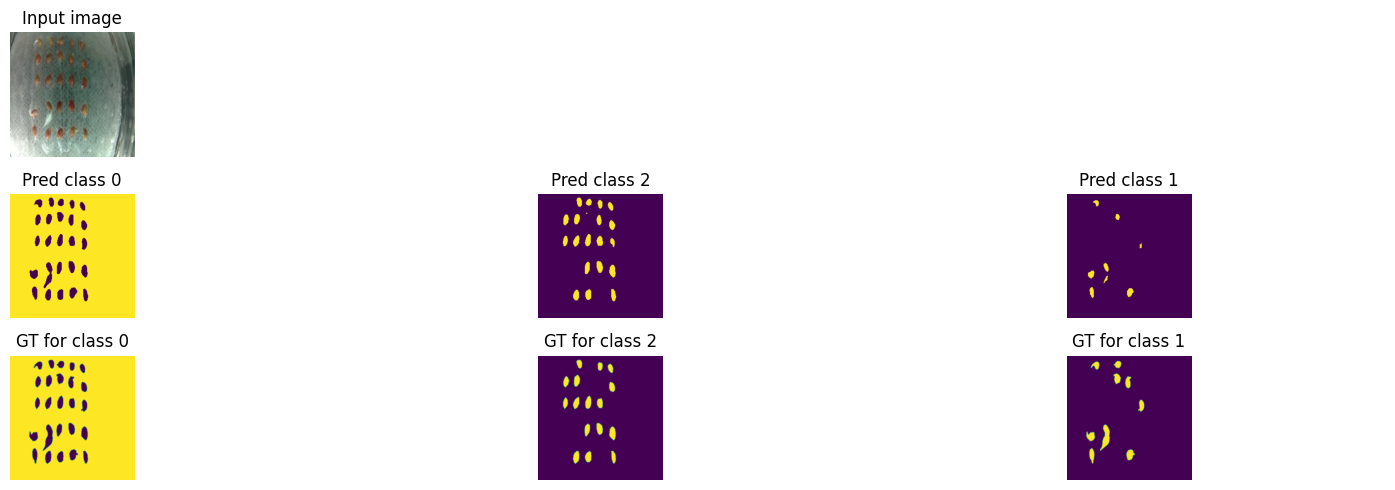

Train loss: 0.07156 | Time: 20m 48s | Val loss: 0.06377
Train_DICE_avg: 0.68784 | Train_Jaccard_avg: 0.64364 | Train_Sensitivity_avg: 0.97648 | Train_Specificity_avg: 0.90806 
Class 0 - Train_DICE: 0.99098 | Train_Jaccard: 0.98215 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.75001 
Class 1 - Train_DICE: 0.28478 | Train_Jaccard: 0.28478 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.78775 | Train_Jaccard: 0.66398 | Train_Sensitivity: 0.93286 | Train_Specificity: 0.98842 
Val_DICE_avg: 0.72739 | Val_Jaccard_avg: 0.67801 | Val_Sensitivity_avg: 0.99033 | Val_Specificity_avg: 0.85465 
Class 0 - Val_DICE: 0.99121 | Val_Jaccard: 0.98261 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.59122 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.72271 | Val_Jaccard: 0.58317 | Val_Sensitivity: 0.97167 | Val_Specificity: 0.98440 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.06592 | Time: 21m 37s | Val loss: 0.05919
Train_DICE_avg: 0.68737 | Train_Jaccard_avg: 0.64329 | Train_Sensitivity_avg: 0.97637 | Train_Specificity_avg: 0.90779 
Class 0 - Train_DICE: 0.99107 | Train_Jaccard: 0.98232 | Train_Sensitivity: 0.99667 | Train_Specificity: 0.74915 
Class 1 - Train_DICE: 0.28213 | Train_Jaccard: 0.28213 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98576 
Class 2 - Train_DICE: 0.78892 | Train_Jaccard: 0.66543 | Train_Sensitivity: 0.93245 | Train_Specificity: 0.98846 
Val_DICE_avg: 0.73389 | Val_Jaccard_avg: 0.68497 | Val_Sensitivity_avg: 0.98972 | Val_Specificity_avg: 0.85244 
Class 0 - Val_DICE: 0.99086 | Val_Jaccard: 0.98194 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.58386 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.74256 | Val_Jaccard: 0.60471 | Val_Sensitivity: 0.96979 | Val_Specificity: 0.98512 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.06090 | Time: 22m 25s | Val loss: 0.05463
Train_DICE_avg: 0.68753 | Train_Jaccard_avg: 0.64387 | Train_Sensitivity_avg: 0.97635 | Train_Specificity_avg: 0.91130 
Class 0 - Train_DICE: 0.99128 | Train_Jaccard: 0.98274 | Train_Sensitivity: 0.99664 | Train_Specificity: 0.75948 
Class 1 - Train_DICE: 0.27955 | Train_Jaccard: 0.27955 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98570 
Class 2 - Train_DICE: 0.79177 | Train_Jaccard: 0.66933 | Train_Sensitivity: 0.93241 | Train_Specificity: 0.98872 
Val_DICE_avg: 0.73541 | Val_Jaccard_avg: 0.68644 | Val_Sensitivity_avg: 0.98953 | Val_Specificity_avg: 0.85357 
Class 0 - Val_DICE: 0.99096 | Val_Jaccard: 0.98213 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.58715 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.74701 | Val_Jaccard: 0.60894 | Val_Sensitivity: 0.96921 | Val_Specificity: 0.98522 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.05670 | Time: 23m 13s | Val loss: 0.05065
Train_DICE_avg: 0.68952 | Train_Jaccard_avg: 0.64593 | Train_Sensitivity_avg: 0.97704 | Train_Specificity_avg: 0.91073 
Class 0 - Train_DICE: 0.99127 | Train_Jaccard: 0.98273 | Train_Sensitivity: 0.99662 | Train_Specificity: 0.75758 
Class 1 - Train_DICE: 0.28390 | Train_Jaccard: 0.28390 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98584 
Class 2 - Train_DICE: 0.79339 | Train_Jaccard: 0.67117 | Train_Sensitivity: 0.93451 | Train_Specificity: 0.98875 
Val_DICE_avg: 0.73626 | Val_Jaccard_avg: 0.68731 | Val_Sensitivity_avg: 0.99023 | Val_Specificity_avg: 0.85153 
Class 0 - Val_DICE: 0.99087 | Val_Jaccard: 0.98196 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.58114 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.74964 | Val_Jaccard: 0.61173 | Val_Sensitivity: 0.97127 | Val_Specificity: 0.98513 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.05291 | Time: 24m 2s | Val loss: 0.04677
Train_DICE_avg: 0.68766 | Train_Jaccard_avg: 0.64418 | Train_Sensitivity_avg: 0.97711 | Train_Specificity_avg: 0.91209 
Class 0 - Train_DICE: 0.99152 | Train_Jaccard: 0.98320 | Train_Sensitivity: 0.99679 | Train_Specificity: 0.76185 
Class 1 - Train_DICE: 0.27915 | Train_Jaccard: 0.27915 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.79231 | Train_Jaccard: 0.67018 | Train_Sensitivity: 0.93453 | Train_Specificity: 0.98869 
Val_DICE_avg: 0.73461 | Val_Jaccard_avg: 0.68565 | Val_Sensitivity_avg: 0.98944 | Val_Specificity_avg: 0.85495 
Class 0 - Val_DICE: 0.99120 | Val_Jaccard: 0.98261 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.59149 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.74438 | Val_Jaccard: 0.60610 | Val_Sensitivity: 0.96894 | Val_Specificity: 0.98503 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


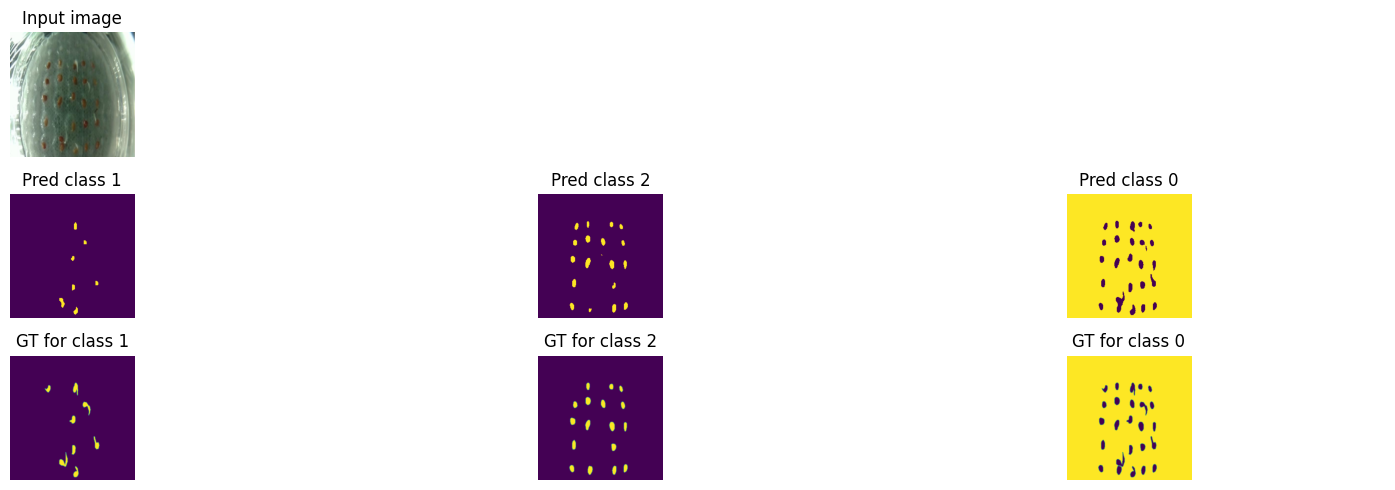

Train loss: 0.04904 | Time: 24m 51s | Val loss: 0.04200
Train_DICE_avg: 0.68800 | Train_Jaccard_avg: 0.64487 | Train_Sensitivity_avg: 0.97728 | Train_Specificity_avg: 0.91326 
Class 0 - Train_DICE: 0.99151 | Train_Jaccard: 0.98320 | Train_Sensitivity: 0.99656 | Train_Specificity: 0.76498 
Class 1 - Train_DICE: 0.27866 | Train_Jaccard: 0.27866 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98589 
Class 2 - Train_DICE: 0.79383 | Train_Jaccard: 0.67275 | Train_Sensitivity: 0.93528 | Train_Specificity: 0.98890 
Val_DICE_avg: 0.73508 | Val_Jaccard_avg: 0.68652 | Val_Sensitivity_avg: 0.99089 | Val_Specificity_avg: 0.85376 
Class 0 - Val_DICE: 0.99103 | Val_Jaccard: 0.98227 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.58773 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.74597 | Val_Jaccard: 0.60905 | Val_Sensitivity: 0.97326 | Val_Specificity: 0.98520 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.04463 | Time: 25m 39s | Val loss: 0.03830
Train_DICE_avg: 0.68763 | Train_Jaccard_avg: 0.64405 | Train_Sensitivity_avg: 0.97814 | Train_Specificity_avg: 0.91020 
Class 0 - Train_DICE: 0.99148 | Train_Jaccard: 0.98313 | Train_Sensitivity: 0.99684 | Train_Specificity: 0.75634 
Class 1 - Train_DICE: 0.27890 | Train_Jaccard: 0.27890 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98573 
Class 2 - Train_DICE: 0.79249 | Train_Jaccard: 0.67011 | Train_Sensitivity: 0.93757 | Train_Specificity: 0.98853 
Val_DICE_avg: 0.73938 | Val_Jaccard_avg: 0.69199 | Val_Sensitivity_avg: 0.98989 | Val_Specificity_avg: 0.85104 
Class 0 - Val_DICE: 0.99079 | Val_Jaccard: 0.98179 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.57872 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.75911 | Val_Jaccard: 0.62592 | Val_Sensitivity: 0.97030 | Val_Specificity: 0.98608 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.04118 | Time: 26m 28s | Val loss: 0.03576
Train_DICE_avg: 0.68844 | Train_Jaccard_avg: 0.64509 | Train_Sensitivity_avg: 0.97915 | Train_Specificity_avg: 0.91044 
Class 0 - Train_DICE: 0.99160 | Train_Jaccard: 0.98338 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.75722 
Class 1 - Train_DICE: 0.27962 | Train_Jaccard: 0.27947 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98545 
Class 2 - Train_DICE: 0.79408 | Train_Jaccard: 0.67241 | Train_Sensitivity: 0.94052 | Train_Specificity: 0.98864 
Val_DICE_avg: 0.73952 | Val_Jaccard_avg: 0.69170 | Val_Sensitivity_avg: 0.99058 | Val_Specificity_avg: 0.85110 
Class 0 - Val_DICE: 0.99072 | Val_Jaccard: 0.98165 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.57907 
Class 1 - Val_DICE: 0.46876 | Val_Jaccard: 0.46852 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.75908 | Val_Jaccard: 0.62494 | Val_Sensitivity: 0.97234 | Val_Specificity: 0.98588 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.03851 | Time: 27m 16s | Val loss: 0.03345
Train_DICE_avg: 0.68930 | Train_Jaccard_avg: 0.64520 | Train_Sensitivity_avg: 0.97877 | Train_Specificity_avg: 0.91037 
Class 0 - Train_DICE: 0.99164 | Train_Jaccard: 0.98345 | Train_Sensitivity: 0.99691 | Train_Specificity: 0.75703 
Class 1 - Train_DICE: 0.28043 | Train_Jaccard: 0.27795 | Train_Sensitivity: 0.99870 | Train_Specificity: 0.98550 
Class 2 - Train_DICE: 0.79582 | Train_Jaccard: 0.67421 | Train_Sensitivity: 0.94071 | Train_Specificity: 0.98859 
Val_DICE_avg: 0.74145 | Val_Jaccard_avg: 0.69213 | Val_Sensitivity_avg: 0.99031 | Val_Specificity_avg: 0.85129 
Class 0 - Val_DICE: 0.99074 | Val_Jaccard: 0.98170 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.57976 
Class 1 - Val_DICE: 0.47703 | Val_Jaccard: 0.47305 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98842 
Class 2 - Val_DICE: 0.75657 | Val_Jaccard: 0.62164 | Val_Sensitivity: 0.97155 | Val_Specificity: 0.98570 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.03637 | Time: 28m 4s | Val loss: 0.03157
Train_DICE_avg: 0.69864 | Train_Jaccard_avg: 0.65163 | Train_Sensitivity_avg: 0.97602 | Train_Specificity_avg: 0.91199 
Class 0 - Train_DICE: 0.99173 | Train_Jaccard: 0.98362 | Train_Sensitivity: 0.99691 | Train_Specificity: 0.76104 
Class 1 - Train_DICE: 0.30659 | Train_Jaccard: 0.29405 | Train_Sensitivity: 0.99138 | Train_Specificity: 0.98604 
Class 2 - Train_DICE: 0.79759 | Train_Jaccard: 0.67724 | Train_Sensitivity: 0.93975 | Train_Specificity: 0.98889 
Val_DICE_avg: 0.75192 | Val_Jaccard_avg: 0.69770 | Val_Sensitivity_avg: 0.97997 | Val_Specificity_avg: 0.85383 
Class 0 - Val_DICE: 0.99100 | Val_Jaccard: 0.98221 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.58686 
Class 1 - Val_DICE: 0.51018 | Val_Jaccard: 0.49254 | Val_Sensitivity: 0.97048 | Val_Specificity: 0.98906 
Class 2 - Val_DICE: 0.75458 | Val_Jaccard: 0.61837 | Val_Sensitivity: 0.97003 | Val_Specificity: 0.98556 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


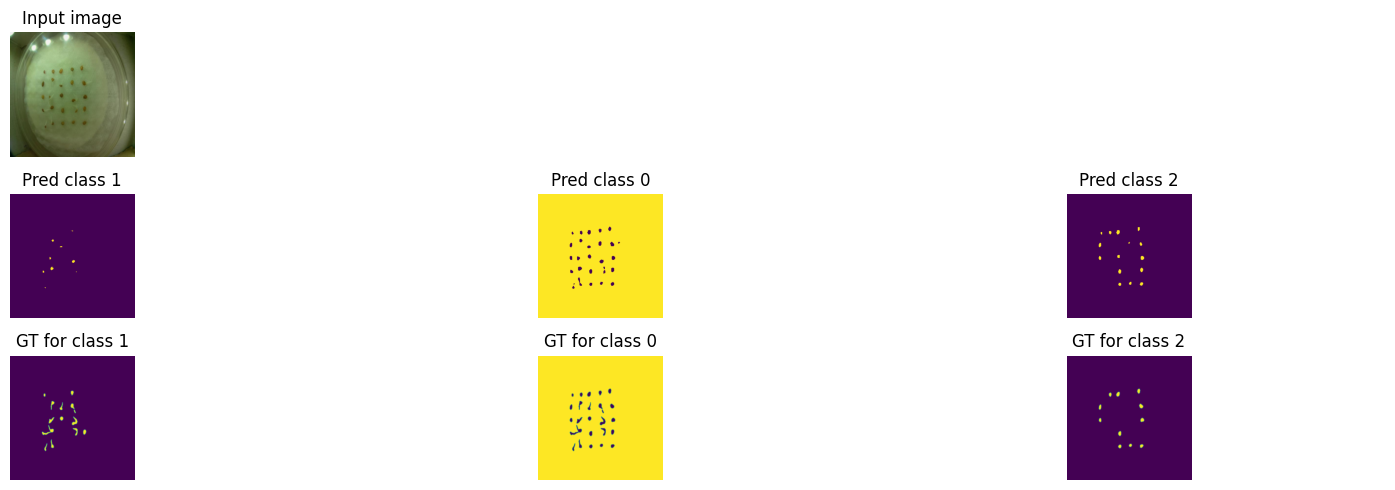

Train loss: 0.03460 | Time: 28m 54s | Val loss: 0.02969
Train_DICE_avg: 0.70916 | Train_Jaccard_avg: 0.65908 | Train_Sensitivity_avg: 0.97299 | Train_Specificity_avg: 0.91356 
Class 0 - Train_DICE: 0.99186 | Train_Jaccard: 0.98387 | Train_Sensitivity: 0.99700 | Train_Specificity: 0.76533 
Class 1 - Train_DICE: 0.33661 | Train_Jaccard: 0.31421 | Train_Sensitivity: 0.98142 | Train_Specificity: 0.98645 
Class 2 - Train_DICE: 0.79902 | Train_Jaccard: 0.67914 | Train_Sensitivity: 0.94056 | Train_Specificity: 0.98888 
Val_DICE_avg: 0.75901 | Val_Jaccard_avg: 0.70135 | Val_Sensitivity_avg: 0.98276 | Val_Specificity_avg: 0.85357 
Class 0 - Val_DICE: 0.99097 | Val_Jaccard: 0.98216 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.58585 
Class 1 - Val_DICE: 0.53498 | Val_Jaccard: 0.50721 | Val_Sensitivity: 0.97163 | Val_Specificity: 0.98964 
Class 2 - Val_DICE: 0.75109 | Val_Jaccard: 0.61467 | Val_Sensitivity: 0.97721 | Val_Specificity: 0.98522 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.03302 | Time: 29m 42s | Val loss: 0.02875
Train_DICE_avg: 0.71787 | Train_Jaccard_avg: 0.66410 | Train_Sensitivity_avg: 0.97207 | Train_Specificity_avg: 0.91147 
Class 0 - Train_DICE: 0.99184 | Train_Jaccard: 0.98385 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.75861 
Class 1 - Train_DICE: 0.36329 | Train_Jaccard: 0.33006 | Train_Sensitivity: 0.97600 | Train_Specificity: 0.98701 
Class 2 - Train_DICE: 0.79846 | Train_Jaccard: 0.67840 | Train_Sensitivity: 0.94315 | Train_Specificity: 0.98878 
Val_DICE_avg: 0.76768 | Val_Jaccard_avg: 0.70828 | Val_Sensitivity_avg: 0.97649 | Val_Specificity_avg: 0.84969 
Class 0 - Val_DICE: 0.99041 | Val_Jaccard: 0.98106 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.57256 
Class 1 - Val_DICE: 0.55191 | Val_Jaccard: 0.51536 | Val_Sensitivity: 0.95241 | Val_Specificity: 0.99047 
Class 2 - Val_DICE: 0.76072 | Val_Jaccard: 0.62842 | Val_Sensitivity: 0.97758 | Val_Specificity: 0.98603 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.03188 | Time: 30m 31s | Val loss: 0.02750
Train_DICE_avg: 0.72883 | Train_Jaccard_avg: 0.67325 | Train_Sensitivity_avg: 0.97000 | Train_Specificity_avg: 0.91297 
Class 0 - Train_DICE: 0.99184 | Train_Jaccard: 0.98385 | Train_Sensitivity: 0.99709 | Train_Specificity: 0.76281 
Class 1 - Train_DICE: 0.39367 | Train_Jaccard: 0.35391 | Train_Sensitivity: 0.96946 | Train_Specificity: 0.98720 
Class 2 - Train_DICE: 0.80098 | Train_Jaccard: 0.68198 | Train_Sensitivity: 0.94346 | Train_Specificity: 0.98890 
Val_DICE_avg: 0.77698 | Val_Jaccard_avg: 0.71538 | Val_Sensitivity_avg: 0.97626 | Val_Specificity_avg: 0.84997 
Class 0 - Val_DICE: 0.99050 | Val_Jaccard: 0.98124 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.57327 
Class 1 - Val_DICE: 0.57562 | Val_Jaccard: 0.53316 | Val_Sensitivity: 0.95333 | Val_Specificity: 0.99076 
Class 2 - Val_DICE: 0.76482 | Val_Jaccard: 0.63174 | Val_Sensitivity: 0.97594 | Val_Specificity: 0.98589 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.03078 | Time: 31m 20s | Val loss: 0.02729
Train_DICE_avg: 0.73252 | Train_Jaccard_avg: 0.67577 | Train_Sensitivity_avg: 0.96722 | Train_Specificity_avg: 0.91586 
Class 0 - Train_DICE: 0.99207 | Train_Jaccard: 0.98429 | Train_Sensitivity: 0.99710 | Train_Specificity: 0.77090 
Class 1 - Train_DICE: 0.40216 | Train_Jaccard: 0.35742 | Train_Sensitivity: 0.96269 | Train_Specificity: 0.98747 
Class 2 - Train_DICE: 0.80333 | Train_Jaccard: 0.68561 | Train_Sensitivity: 0.94186 | Train_Specificity: 0.98920 
Val_DICE_avg: 0.77723 | Val_Jaccard_avg: 0.71493 | Val_Sensitivity_avg: 0.97431 | Val_Specificity_avg: 0.84840 
Class 0 - Val_DICE: 0.99027 | Val_Jaccard: 0.98079 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.56810 
Class 1 - Val_DICE: 0.57655 | Val_Jaccard: 0.53181 | Val_Sensitivity: 0.94860 | Val_Specificity: 0.99094 
Class 2 - Val_DICE: 0.76486 | Val_Jaccard: 0.63217 | Val_Sensitivity: 0.97483 | Val_Specificity: 0.98615 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.02997 | Time: 32m 9s | Val loss: 0.02584
Train_DICE_avg: 0.73632 | Train_Jaccard_avg: 0.67760 | Train_Sensitivity_avg: 0.96738 | Train_Specificity_avg: 0.91435 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98418 | Train_Sensitivity: 0.99715 | Train_Specificity: 0.76627 
Class 1 - Train_DICE: 0.41343 | Train_Jaccard: 0.36365 | Train_Sensitivity: 0.96227 | Train_Specificity: 0.98770 
Class 2 - Train_DICE: 0.80351 | Train_Jaccard: 0.68497 | Train_Sensitivity: 0.94273 | Train_Specificity: 0.98908 
Val_DICE_avg: 0.77620 | Val_Jaccard_avg: 0.71009 | Val_Sensitivity_avg: 0.97360 | Val_Specificity_avg: 0.85711 
Class 0 - Val_DICE: 0.99130 | Val_Jaccard: 0.98279 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.59534 
Class 1 - Val_DICE: 0.59759 | Val_Jaccard: 0.54637 | Val_Sensitivity: 0.94241 | Val_Specificity: 0.99124 
Class 2 - Val_DICE: 0.73971 | Val_Jaccard: 0.60110 | Val_Sensitivity: 0.97894 | Val_Specificity: 0.98474 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.02907 | Time: 33m 0s | Val loss: 0.02533
Train_DICE_avg: 0.74712 | Train_Jaccard_avg: 0.68751 | Train_Sensitivity_avg: 0.96806 | Train_Specificity_avg: 0.91610 
Class 0 - Train_DICE: 0.99204 | Train_Jaccard: 0.98424 | Train_Sensitivity: 0.99715 | Train_Specificity: 0.77100 
Class 1 - Train_DICE: 0.44259 | Train_Jaccard: 0.38865 | Train_Sensitivity: 0.96217 | Train_Specificity: 0.98806 
Class 2 - Train_DICE: 0.80674 | Train_Jaccard: 0.68965 | Train_Sensitivity: 0.94486 | Train_Specificity: 0.98924 
Val_DICE_avg: 0.78866 | Val_Jaccard_avg: 0.71998 | Val_Sensitivity_avg: 0.97379 | Val_Specificity_avg: 0.85251 
Class 0 - Val_DICE: 0.99064 | Val_Jaccard: 0.98151 | Val_Sensitivity: 0.99952 | Val_Specificity: 0.58072 
Class 1 - Val_DICE: 0.63358 | Val_Jaccard: 0.57355 | Val_Sensitivity: 0.94128 | Val_Specificity: 0.99188 
Class 2 - Val_DICE: 0.74176 | Val_Jaccard: 0.60487 | Val_Sensitivity: 0.98059 | Val_Specificity: 0.98494 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.02844 | Time: 33m 49s | Val loss: 0.02455
Train_DICE_avg: 0.75123 | Train_Jaccard_avg: 0.69030 | Train_Sensitivity_avg: 0.96650 | Train_Specificity_avg: 0.91692 
Class 0 - Train_DICE: 0.99208 | Train_Jaccard: 0.98431 | Train_Sensitivity: 0.99704 | Train_Specificity: 0.77299 
Class 1 - Train_DICE: 0.45367 | Train_Jaccard: 0.39564 | Train_Sensitivity: 0.95793 | Train_Specificity: 0.98841 
Class 2 - Train_DICE: 0.80793 | Train_Jaccard: 0.69094 | Train_Sensitivity: 0.94454 | Train_Specificity: 0.98936 
Val_DICE_avg: 0.79119 | Val_Jaccard_avg: 0.72317 | Val_Sensitivity_avg: 0.97232 | Val_Specificity_avg: 0.85348 
Class 0 - Val_DICE: 0.99079 | Val_Jaccard: 0.98181 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.58312 
Class 1 - Val_DICE: 0.63142 | Val_Jaccard: 0.57159 | Val_Sensitivity: 0.93782 | Val_Specificity: 0.99191 
Class 2 - Val_DICE: 0.75135 | Val_Jaccard: 0.61613 | Val_Sensitivity: 0.97965 | Val_Specificity: 0.98540 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.02782 | Time: 34m 38s | Val loss: 0.02402
Train_DICE_avg: 0.75227 | Train_Jaccard_avg: 0.69072 | Train_Sensitivity_avg: 0.96675 | Train_Specificity_avg: 0.91448 
Class 0 - Train_DICE: 0.99206 | Train_Jaccard: 0.98427 | Train_Sensitivity: 0.99723 | Train_Specificity: 0.76617 
Class 1 - Train_DICE: 0.46002 | Train_Jaccard: 0.40108 | Train_Sensitivity: 0.95832 | Train_Specificity: 0.98821 
Class 2 - Train_DICE: 0.80475 | Train_Jaccard: 0.68680 | Train_Sensitivity: 0.94469 | Train_Specificity: 0.98906 
Val_DICE_avg: 0.79411 | Val_Jaccard_avg: 0.72587 | Val_Sensitivity_avg: 0.97362 | Val_Specificity_avg: 0.85362 
Class 0 - Val_DICE: 0.99088 | Val_Jaccard: 0.98198 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.58348 
Class 1 - Val_DICE: 0.63621 | Val_Jaccard: 0.57578 | Val_Sensitivity: 0.94287 | Val_Specificity: 0.99191 
Class 2 - Val_DICE: 0.75524 | Val_Jaccard: 0.61984 | Val_Sensitivity: 0.97849 | Val_Specificity: 0.98547 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.02724 | Time: 35m 27s | Val loss: 0.02353
Train_DICE_avg: 0.75386 | Train_Jaccard_avg: 0.69187 | Train_Sensitivity_avg: 0.96545 | Train_Specificity_avg: 0.91538 
Class 0 - Train_DICE: 0.99212 | Train_Jaccard: 0.98439 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.76856 
Class 1 - Train_DICE: 0.46221 | Train_Jaccard: 0.40109 | Train_Sensitivity: 0.95357 | Train_Specificity: 0.98841 
Class 2 - Train_DICE: 0.80725 | Train_Jaccard: 0.69012 | Train_Sensitivity: 0.94552 | Train_Specificity: 0.98916 
Val_DICE_avg: 0.79234 | Val_Jaccard_avg: 0.72370 | Val_Sensitivity_avg: 0.97045 | Val_Specificity_avg: 0.85706 
Class 0 - Val_DICE: 0.99135 | Val_Jaccard: 0.98290 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.59409 
Class 1 - Val_DICE: 0.63212 | Val_Jaccard: 0.57103 | Val_Sensitivity: 0.93349 | Val_Specificity: 0.99198 
Class 2 - Val_DICE: 0.75356 | Val_Jaccard: 0.61717 | Val_Sensitivity: 0.97840 | Val_Specificity: 0.98511 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.02666 | Time: 36m 16s | Val loss: 0.02293
Train_DICE_avg: 0.75735 | Train_Jaccard_avg: 0.69461 | Train_Sensitivity_avg: 0.96566 | Train_Specificity_avg: 0.91558 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98442 | Train_Sensitivity: 0.99733 | Train_Specificity: 0.76912 
Class 1 - Train_DICE: 0.47102 | Train_Jaccard: 0.40745 | Train_Sensitivity: 0.95218 | Train_Specificity: 0.98843 
Class 2 - Train_DICE: 0.80891 | Train_Jaccard: 0.69196 | Train_Sensitivity: 0.94747 | Train_Specificity: 0.98918 
Val_DICE_avg: 0.79501 | Val_Jaccard_avg: 0.72660 | Val_Sensitivity_avg: 0.97382 | Val_Specificity_avg: 0.85697 
Class 0 - Val_DICE: 0.99126 | Val_Jaccard: 0.98271 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.59352 
Class 1 - Val_DICE: 0.64035 | Val_Jaccard: 0.57999 | Val_Sensitivity: 0.94436 | Val_Specificity: 0.99208 
Class 2 - Val_DICE: 0.75343 | Val_Jaccard: 0.61711 | Val_Sensitivity: 0.97762 | Val_Specificity: 0.98532 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.02634 | Time: 37m 5s | Val loss: 0.02256
Train_DICE_avg: 0.76194 | Train_Jaccard_avg: 0.69882 | Train_Sensitivity_avg: 0.96562 | Train_Specificity_avg: 0.91645 
Class 0 - Train_DICE: 0.99217 | Train_Jaccard: 0.98449 | Train_Sensitivity: 0.99720 | Train_Specificity: 0.77129 
Class 1 - Train_DICE: 0.48377 | Train_Jaccard: 0.41824 | Train_Sensitivity: 0.95309 | Train_Specificity: 0.98872 
Class 2 - Train_DICE: 0.80988 | Train_Jaccard: 0.69374 | Train_Sensitivity: 0.94658 | Train_Specificity: 0.98934 
Val_DICE_avg: 0.79376 | Val_Jaccard_avg: 0.72541 | Val_Sensitivity_avg: 0.97349 | Val_Specificity_avg: 0.85772 
Class 0 - Val_DICE: 0.99132 | Val_Jaccard: 0.98284 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59575 
Class 1 - Val_DICE: 0.63943 | Val_Jaccard: 0.57858 | Val_Sensitivity: 0.94265 | Val_Specificity: 0.99203 
Class 2 - Val_DICE: 0.75053 | Val_Jaccard: 0.61479 | Val_Sensitivity: 0.97834 | Val_Specificity: 0.98540 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.02579 | Time: 37m 54s | Val loss: 0.02211
Train_DICE_avg: 0.76127 | Train_Jaccard_avg: 0.69753 | Train_Sensitivity_avg: 0.96619 | Train_Specificity_avg: 0.91229 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98447 | Train_Sensitivity: 0.99737 | Train_Specificity: 0.75906 
Class 1 - Train_DICE: 0.48417 | Train_Jaccard: 0.41763 | Train_Sensitivity: 0.95122 | Train_Specificity: 0.98868 
Class 2 - Train_DICE: 0.80747 | Train_Jaccard: 0.69047 | Train_Sensitivity: 0.94997 | Train_Specificity: 0.98913 
Val_DICE_avg: 0.79903 | Val_Jaccard_avg: 0.72940 | Val_Sensitivity_avg: 0.97264 | Val_Specificity_avg: 0.85815 
Class 0 - Val_DICE: 0.99137 | Val_Jaccard: 0.98294 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.59688 
Class 1 - Val_DICE: 0.65678 | Val_Jaccard: 0.59334 | Val_Sensitivity: 0.93739 | Val_Specificity: 0.99248 
Class 2 - Val_DICE: 0.74893 | Val_Jaccard: 0.61193 | Val_Sensitivity: 0.98105 | Val_Specificity: 0.98510 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.02550 | Time: 38m 42s | Val loss: 0.02189
Train_DICE_avg: 0.76616 | Train_Jaccard_avg: 0.70238 | Train_Sensitivity_avg: 0.96650 | Train_Specificity_avg: 0.91654 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98465 | Train_Sensitivity: 0.99723 | Train_Specificity: 0.77140 
Class 1 - Train_DICE: 0.49608 | Train_Jaccard: 0.42854 | Train_Sensitivity: 0.95431 | Train_Specificity: 0.98886 
Class 2 - Train_DICE: 0.81015 | Train_Jaccard: 0.69394 | Train_Sensitivity: 0.94794 | Train_Specificity: 0.98937 
Val_DICE_avg: 0.79962 | Val_Jaccard_avg: 0.73030 | Val_Sensitivity_avg: 0.97089 | Val_Specificity_avg: 0.85748 
Class 0 - Val_DICE: 0.99130 | Val_Jaccard: 0.98279 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.59469 
Class 1 - Val_DICE: 0.65441 | Val_Jaccard: 0.59096 | Val_Sensitivity: 0.93258 | Val_Specificity: 0.99241 
Class 2 - Val_DICE: 0.75314 | Val_Jaccard: 0.61715 | Val_Sensitivity: 0.98061 | Val_Specificity: 0.98533 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.02526 | Time: 39m 31s | Val loss: 0.02152
Train_DICE_avg: 0.76579 | Train_Jaccard_avg: 0.70178 | Train_Sensitivity_avg: 0.96454 | Train_Specificity_avg: 0.91550 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98446 | Train_Sensitivity: 0.99720 | Train_Specificity: 0.76837 
Class 1 - Train_DICE: 0.49553 | Train_Jaccard: 0.42755 | Train_Sensitivity: 0.94831 | Train_Specificity: 0.98892 
Class 2 - Train_DICE: 0.80968 | Train_Jaccard: 0.69333 | Train_Sensitivity: 0.94813 | Train_Specificity: 0.98922 
Val_DICE_avg: 0.80004 | Val_Jaccard_avg: 0.73125 | Val_Sensitivity_avg: 0.97318 | Val_Specificity_avg: 0.85869 
Class 0 - Val_DICE: 0.99151 | Val_Jaccard: 0.98320 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59825 
Class 1 - Val_DICE: 0.65104 | Val_Jaccard: 0.58810 | Val_Sensitivity: 0.94040 | Val_Specificity: 0.99232 
Class 2 - Val_DICE: 0.75758 | Val_Jaccard: 0.62245 | Val_Sensitivity: 0.97969 | Val_Specificity: 0.98550 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.02485 | Time: 40m 20s | Val loss: 0.02135
Train_DICE_avg: 0.76667 | Train_Jaccard_avg: 0.70212 | Train_Sensitivity_avg: 0.96624 | Train_Specificity_avg: 0.91382 
Class 0 - Train_DICE: 0.99224 | Train_Jaccard: 0.98463 | Train_Sensitivity: 0.99747 | Train_Specificity: 0.76336 
Class 1 - Train_DICE: 0.49837 | Train_Jaccard: 0.42864 | Train_Sensitivity: 0.95182 | Train_Specificity: 0.98885 
Class 2 - Train_DICE: 0.80941 | Train_Jaccard: 0.69310 | Train_Sensitivity: 0.94942 | Train_Specificity: 0.98924 
Val_DICE_avg: 0.79920 | Val_Jaccard_avg: 0.72902 | Val_Sensitivity_avg: 0.97357 | Val_Specificity_avg: 0.85986 
Class 0 - Val_DICE: 0.99163 | Val_Jaccard: 0.98343 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.60211 
Class 1 - Val_DICE: 0.65620 | Val_Jaccard: 0.59106 | Val_Sensitivity: 0.93903 | Val_Specificity: 0.99244 
Class 2 - Val_DICE: 0.74978 | Val_Jaccard: 0.61255 | Val_Sensitivity: 0.98224 | Val_Specificity: 0.98503 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


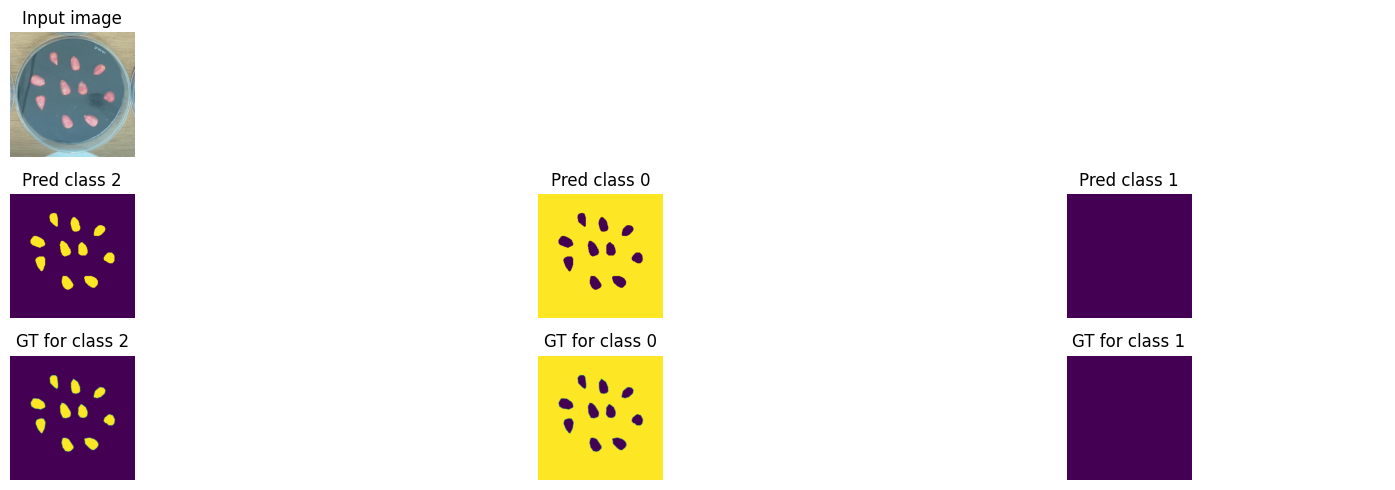

Train loss: 0.02461 | Time: 41m 9s | Val loss: 0.02118
Train_DICE_avg: 0.76834 | Train_Jaccard_avg: 0.70416 | Train_Sensitivity_avg: 0.96478 | Train_Specificity_avg: 0.91476 
Class 0 - Train_DICE: 0.99228 | Train_Jaccard: 0.98470 | Train_Sensitivity: 0.99735 | Train_Specificity: 0.76589 
Class 1 - Train_DICE: 0.50192 | Train_Jaccard: 0.43267 | Train_Sensitivity: 0.94736 | Train_Specificity: 0.98903 
Class 2 - Train_DICE: 0.81081 | Train_Jaccard: 0.69512 | Train_Sensitivity: 0.94964 | Train_Specificity: 0.98935 
Val_DICE_avg: 0.80474 | Val_Jaccard_avg: 0.73583 | Val_Sensitivity_avg: 0.97537 | Val_Specificity_avg: 0.85802 
Class 0 - Val_DICE: 0.99140 | Val_Jaccard: 0.98300 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59598 
Class 1 - Val_DICE: 0.66339 | Val_Jaccard: 0.60027 | Val_Sensitivity: 0.94794 | Val_Specificity: 0.99252 
Class 2 - Val_DICE: 0.75944 | Val_Jaccard: 0.62422 | Val_Sensitivity: 0.97872 | Val_Specificity: 0.98557 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.02424 | Time: 41m 58s | Val loss: 0.02088
Train_DICE_avg: 0.77192 | Train_Jaccard_avg: 0.70737 | Train_Sensitivity_avg: 0.96572 | Train_Specificity_avg: 0.91580 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98466 | Train_Sensitivity: 0.99744 | Train_Specificity: 0.76906 
Class 1 - Train_DICE: 0.51153 | Train_Jaccard: 0.44127 | Train_Sensitivity: 0.94950 | Train_Specificity: 0.98906 
Class 2 - Train_DICE: 0.81199 | Train_Jaccard: 0.69619 | Train_Sensitivity: 0.95023 | Train_Specificity: 0.98929 
Val_DICE_avg: 0.80334 | Val_Jaccard_avg: 0.73357 | Val_Sensitivity_avg: 0.97215 | Val_Specificity_avg: 0.85993 
Class 0 - Val_DICE: 0.99163 | Val_Jaccard: 0.98345 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.60188 
Class 1 - Val_DICE: 0.66258 | Val_Jaccard: 0.59741 | Val_Sensitivity: 0.93863 | Val_Specificity: 0.99251 
Class 2 - Val_DICE: 0.75581 | Val_Jaccard: 0.61986 | Val_Sensitivity: 0.97837 | Val_Specificity: 0.98539 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.02398 | Time: 42m 46s | Val loss: 0.02079
Train_DICE_avg: 0.77239 | Train_Jaccard_avg: 0.70738 | Train_Sensitivity_avg: 0.96434 | Train_Specificity_avg: 0.91547 
Class 0 - Train_DICE: 0.99232 | Train_Jaccard: 0.98478 | Train_Sensitivity: 0.99746 | Train_Specificity: 0.76784 
Class 1 - Train_DICE: 0.51267 | Train_Jaccard: 0.44095 | Train_Sensitivity: 0.94486 | Train_Specificity: 0.98925 
Class 2 - Train_DICE: 0.81217 | Train_Jaccard: 0.69641 | Train_Sensitivity: 0.95069 | Train_Specificity: 0.98932 
Val_DICE_avg: 0.80885 | Val_Jaccard_avg: 0.73796 | Val_Sensitivity_avg: 0.97180 | Val_Specificity_avg: 0.85789 
Class 0 - Val_DICE: 0.99140 | Val_Jaccard: 0.98300 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59556 
Class 1 - Val_DICE: 0.67786 | Val_Jaccard: 0.60988 | Val_Sensitivity: 0.93603 | Val_Specificity: 0.99279 
Class 2 - Val_DICE: 0.75729 | Val_Jaccard: 0.62102 | Val_Sensitivity: 0.97992 | Val_Specificity: 0.98531 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.02385 | Time: 43m 35s | Val loss: 0.02047
Train_DICE_avg: 0.77473 | Train_Jaccard_avg: 0.70988 | Train_Sensitivity_avg: 0.96564 | Train_Specificity_avg: 0.91623 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98481 | Train_Sensitivity: 0.99731 | Train_Specificity: 0.76980 
Class 1 - Train_DICE: 0.51865 | Train_Jaccard: 0.44667 | Train_Sensitivity: 0.94892 | Train_Specificity: 0.98939 
Class 2 - Train_DICE: 0.81319 | Train_Jaccard: 0.69818 | Train_Sensitivity: 0.95068 | Train_Specificity: 0.98949 
Val_DICE_avg: 0.80758 | Val_Jaccard_avg: 0.73640 | Val_Sensitivity_avg: 0.97057 | Val_Specificity_avg: 0.86027 
Class 0 - Val_DICE: 0.99163 | Val_Jaccard: 0.98345 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.60285 
Class 1 - Val_DICE: 0.67876 | Val_Jaccard: 0.61044 | Val_Sensitivity: 0.92913 | Val_Specificity: 0.99286 
Class 2 - Val_DICE: 0.75235 | Val_Jaccard: 0.61532 | Val_Sensitivity: 0.98314 | Val_Specificity: 0.98510 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.02364 | Time: 44m 24s | Val loss: 0.02045
Train_DICE_avg: 0.77436 | Train_Jaccard_avg: 0.70967 | Train_Sensitivity_avg: 0.96334 | Train_Specificity_avg: 0.91618 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98487 | Train_Sensitivity: 0.99743 | Train_Specificity: 0.76980 
Class 1 - Train_DICE: 0.51693 | Train_Jaccard: 0.44512 | Train_Sensitivity: 0.94194 | Train_Specificity: 0.98924 
Class 2 - Train_DICE: 0.81379 | Train_Jaccard: 0.69903 | Train_Sensitivity: 0.95066 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.81186 | Val_Jaccard_avg: 0.74110 | Val_Sensitivity_avg: 0.97045 | Val_Specificity_avg: 0.85708 
Class 0 - Val_DICE: 0.99126 | Val_Jaccard: 0.98273 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.59274 
Class 1 - Val_DICE: 0.68533 | Val_Jaccard: 0.61621 | Val_Sensitivity: 0.92943 | Val_Specificity: 0.99297 
Class 2 - Val_DICE: 0.75899 | Val_Jaccard: 0.62437 | Val_Sensitivity: 0.98243 | Val_Specificity: 0.98554 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


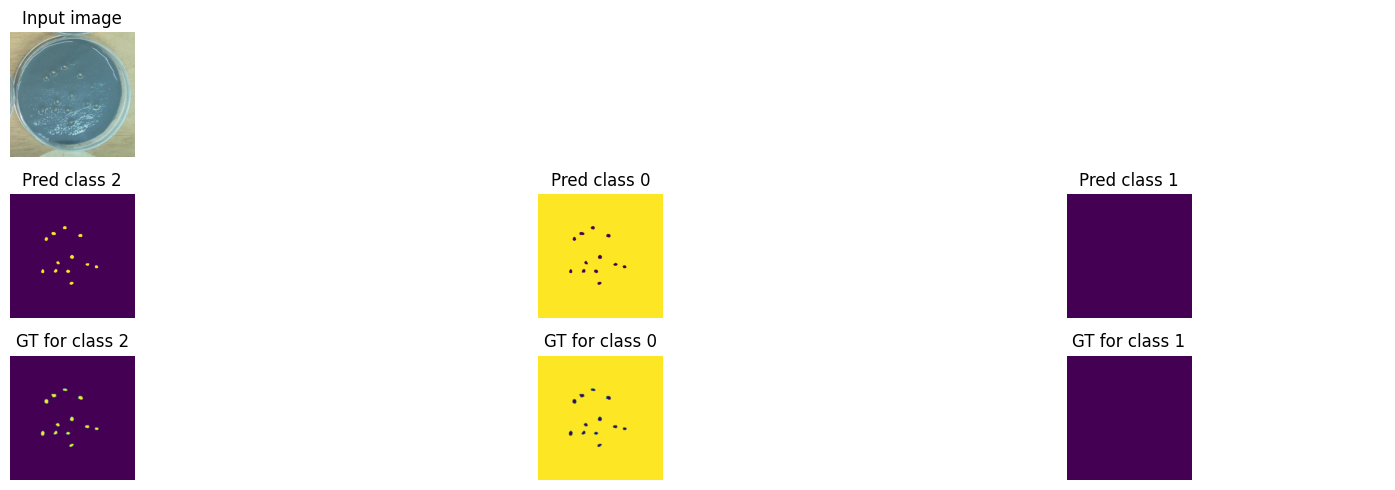

Train loss: 0.02344 | Time: 45m 13s | Val loss: 0.02028
Train_DICE_avg: 0.77873 | Train_Jaccard_avg: 0.71347 | Train_Sensitivity_avg: 0.96677 | Train_Specificity_avg: 0.91581 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98468 | Train_Sensitivity: 0.99744 | Train_Specificity: 0.76875 
Class 1 - Train_DICE: 0.52903 | Train_Jaccard: 0.45583 | Train_Sensitivity: 0.95167 | Train_Specificity: 0.98928 
Class 2 - Train_DICE: 0.81488 | Train_Jaccard: 0.69989 | Train_Sensitivity: 0.95121 | Train_Specificity: 0.98940 
Val_DICE_avg: 0.80962 | Val_Jaccard_avg: 0.73909 | Val_Sensitivity_avg: 0.96934 | Val_Specificity_avg: 0.85798 
Class 0 - Val_DICE: 0.99137 | Val_Jaccard: 0.98293 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.59557 
Class 1 - Val_DICE: 0.67900 | Val_Jaccard: 0.61145 | Val_Sensitivity: 0.92854 | Val_Specificity: 0.99294 
Class 2 - Val_DICE: 0.75849 | Val_Jaccard: 0.62290 | Val_Sensitivity: 0.97999 | Val_Specificity: 0.98545 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.02323 | Time: 46m 2s | Val loss: 0.02039
Train_DICE_avg: 0.77904 | Train_Jaccard_avg: 0.71440 | Train_Sensitivity_avg: 0.96568 | Train_Specificity_avg: 0.91732 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98501 | Train_Sensitivity: 0.99742 | Train_Specificity: 0.77279 
Class 1 - Train_DICE: 0.52985 | Train_Jaccard: 0.45747 | Train_Sensitivity: 0.94905 | Train_Specificity: 0.98951 
Class 2 - Train_DICE: 0.81482 | Train_Jaccard: 0.70073 | Train_Sensitivity: 0.95056 | Train_Specificity: 0.98966 
Val_DICE_avg: 0.81198 | Val_Jaccard_avg: 0.74114 | Val_Sensitivity_avg: 0.96689 | Val_Specificity_avg: 0.85562 
Class 0 - Val_DICE: 0.99110 | Val_Jaccard: 0.98240 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.58815 
Class 1 - Val_DICE: 0.68398 | Val_Jaccard: 0.61457 | Val_Sensitivity: 0.91920 | Val_Specificity: 0.99307 
Class 2 - Val_DICE: 0.76085 | Val_Jaccard: 0.62645 | Val_Sensitivity: 0.98198 | Val_Specificity: 0.98563 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.02311 | Time: 46m 51s | Val loss: 0.02018
Train_DICE_avg: 0.78137 | Train_Jaccard_avg: 0.71574 | Train_Sensitivity_avg: 0.96583 | Train_Specificity_avg: 0.91688 
Class 0 - Train_DICE: 0.99238 | Train_Jaccard: 0.98490 | Train_Sensitivity: 0.99735 | Train_Specificity: 0.77110 
Class 1 - Train_DICE: 0.53659 | Train_Jaccard: 0.46173 | Train_Sensitivity: 0.94919 | Train_Specificity: 0.98993 
Class 2 - Train_DICE: 0.81514 | Train_Jaccard: 0.70058 | Train_Sensitivity: 0.95094 | Train_Specificity: 0.98960 
Val_DICE_avg: 0.81278 | Val_Jaccard_avg: 0.74220 | Val_Sensitivity_avg: 0.96798 | Val_Specificity_avg: 0.85638 
Class 0 - Val_DICE: 0.99117 | Val_Jaccard: 0.98253 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.59043 
Class 1 - Val_DICE: 0.68525 | Val_Jaccard: 0.61694 | Val_Sensitivity: 0.92336 | Val_Specificity: 0.99311 
Class 2 - Val_DICE: 0.76194 | Val_Jaccard: 0.62714 | Val_Sensitivity: 0.98111 | Val_Specificity: 0.98558 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.02290 | Time: 47m 41s | Val loss: 0.02004
Train_DICE_avg: 0.78109 | Train_Jaccard_avg: 0.71558 | Train_Sensitivity_avg: 0.96616 | Train_Specificity_avg: 0.91687 
Class 0 - Train_DICE: 0.99240 | Train_Jaccard: 0.98494 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.77137 
Class 1 - Train_DICE: 0.53536 | Train_Jaccard: 0.46075 | Train_Sensitivity: 0.94889 | Train_Specificity: 0.98968 
Class 2 - Train_DICE: 0.81553 | Train_Jaccard: 0.70105 | Train_Sensitivity: 0.95218 | Train_Specificity: 0.98956 
Val_DICE_avg: 0.81446 | Val_Jaccard_avg: 0.74354 | Val_Sensitivity_avg: 0.96861 | Val_Specificity_avg: 0.85601 
Class 0 - Val_DICE: 0.99114 | Val_Jaccard: 0.98248 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.58929 
Class 1 - Val_DICE: 0.69064 | Val_Jaccard: 0.62109 | Val_Sensitivity: 0.92351 | Val_Specificity: 0.99318 
Class 2 - Val_DICE: 0.76161 | Val_Jaccard: 0.62706 | Val_Sensitivity: 0.98284 | Val_Specificity: 0.98558 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.02290 | Time: 48m 30s | Val loss: 0.01992
Train_DICE_avg: 0.78164 | Train_Jaccard_avg: 0.71640 | Train_Sensitivity_avg: 0.96484 | Train_Specificity_avg: 0.91779 
Class 0 - Train_DICE: 0.99237 | Train_Jaccard: 0.98489 | Train_Sensitivity: 0.99743 | Train_Specificity: 0.77437 
Class 1 - Train_DICE: 0.53578 | Train_Jaccard: 0.46198 | Train_Sensitivity: 0.94549 | Train_Specificity: 0.98948 
Class 2 - Train_DICE: 0.81677 | Train_Jaccard: 0.70233 | Train_Sensitivity: 0.95160 | Train_Specificity: 0.98952 
Val_DICE_avg: 0.81223 | Val_Jaccard_avg: 0.74149 | Val_Sensitivity_avg: 0.96955 | Val_Specificity_avg: 0.85723 
Class 0 - Val_DICE: 0.99128 | Val_Jaccard: 0.98276 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59309 
Class 1 - Val_DICE: 0.68437 | Val_Jaccard: 0.61568 | Val_Sensitivity: 0.92880 | Val_Specificity: 0.99305 
Class 2 - Val_DICE: 0.76103 | Val_Jaccard: 0.62603 | Val_Sensitivity: 0.98039 | Val_Specificity: 0.98554 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.02266 | Time: 49m 19s | Val loss: 0.01981
Train_DICE_avg: 0.78110 | Train_Jaccard_avg: 0.71562 | Train_Sensitivity_avg: 0.96619 | Train_Specificity_avg: 0.91643 
Class 0 - Train_DICE: 0.99239 | Train_Jaccard: 0.98493 | Train_Sensitivity: 0.99749 | Train_Specificity: 0.77028 
Class 1 - Train_DICE: 0.53465 | Train_Jaccard: 0.46017 | Train_Sensitivity: 0.94807 | Train_Specificity: 0.98952 
Class 2 - Train_DICE: 0.81626 | Train_Jaccard: 0.70175 | Train_Sensitivity: 0.95302 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.81548 | Val_Jaccard_avg: 0.74475 | Val_Sensitivity_avg: 0.96926 | Val_Specificity_avg: 0.85624 
Class 0 - Val_DICE: 0.99115 | Val_Jaccard: 0.98250 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.58976 
Class 1 - Val_DICE: 0.69084 | Val_Jaccard: 0.62091 | Val_Sensitivity: 0.92813 | Val_Specificity: 0.99319 
Class 2 - Val_DICE: 0.76444 | Val_Jaccard: 0.63083 | Val_Sensitivity: 0.98017 | Val_Specificity: 0.98579 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]



Global Performance Metrics:
Loss mean: 0.01942, std: 0.00152
Dice Coefficient mean: 0.86271, std: 0.10900
Jaccard Index mean: 0.80301, std: 0.12705
Sensitivity mean: 0.86264, std: 0.11030
Specificity mean: 0.96407, std: 0.02521

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99577, std: 0.00247
Jaccard mean: 0.99159, std: 0.00486
Sensitivity mean: 0.99499, std: 0.00359
Specificity mean: 0.89692, std: 0.07687

Class 1:
Dice mean: 0.72513, std: 0.29535
Jaccard mean: 0.64375, std: 0.32236
Sensitivity mean: 0.73020, std: 0.29271
Specificity mean: 0.99860, std: 0.00303

Class 2:
Dice mean: 0.86723, std: 0.08057
Jaccard mean: 0.77369, std: 0.11259
Sensitivity mean: 0.86273, std: 0.11387
Specificity mean: 0.99669, std: 0.00242


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-ResUNet-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.64 GB
GPU Memory - Reserved: 1.06 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


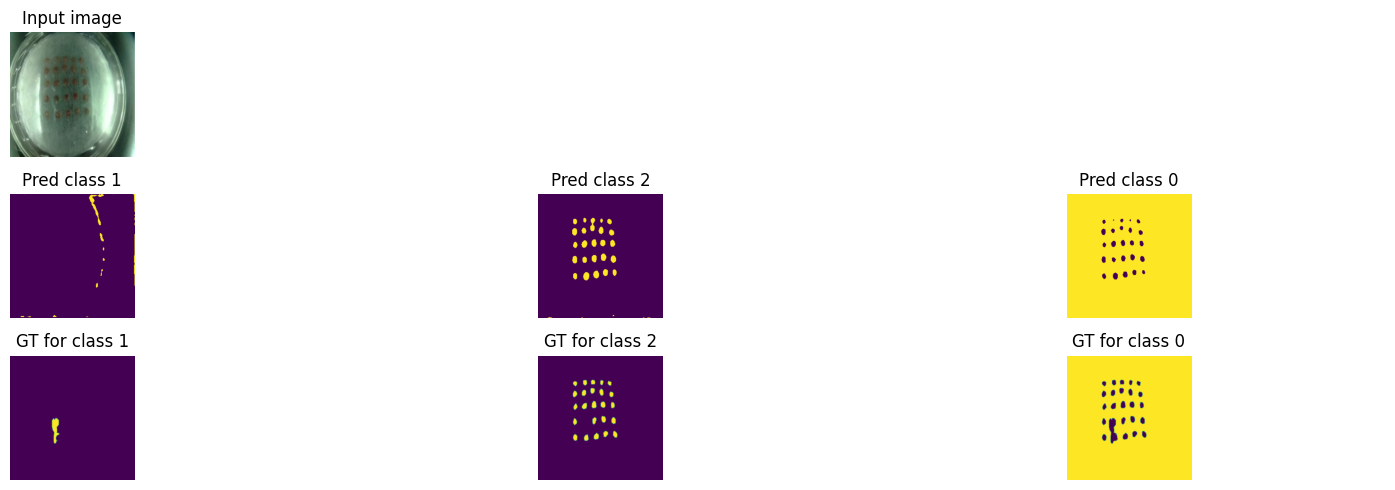

Train loss: 0.04275 | Time: 0m 48s | Val loss: 0.03744
Train_DICE_avg: 0.37210 | Train_Jaccard_avg: 0.30235 | Train_Sensitivity_avg: 0.81982 | Train_Specificity_avg: 0.70704 
Class 0 - Train_DICE: 0.58474 | Train_Jaccard: 0.48514 | Train_Sensitivity: 0.99266 | Train_Specificity: 0.16527 
Class 1 - Train_DICE: 0.21606 | Train_Jaccard: 0.21422 | Train_Sensitivity: 0.71554 | Train_Specificity: 0.98591 
Class 2 - Train_DICE: 0.31551 | Train_Jaccard: 0.20770 | Train_Sensitivity: 0.75125 | Train_Specificity: 0.96993 
Val_DICE_avg: 0.62559 | Val_Jaccard_avg: 0.56377 | Val_Sensitivity_avg: 0.94519 | Val_Specificity_avg: 0.71531 
Class 0 - Val_DICE: 0.93482 | Val_Jaccard: 0.87877 | Val_Sensitivity: 0.99831 | Val_Specificity: 0.18276 
Class 1 - Val_DICE: 0.46882 | Val_Jaccard: 0.46854 | Val_Sensitivity: 0.93337 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.47314 | Val_Jaccard: 0.34402 | Val_Sensitivity: 0.90388 | Val_Specificity: 0.97485 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.02796 | Time: 1m 36s | Val loss: 0.02458
Train_DICE_avg: 0.58428 | Train_Jaccard_avg: 0.52454 | Train_Sensitivity_avg: 0.94795 | Train_Specificity_avg: 0.78600 
Class 0 - Train_DICE: 0.94847 | Train_Jaccard: 0.90319 | Train_Sensitivity: 0.99581 | Train_Specificity: 0.39341 
Class 1 - Train_DICE: 0.28100 | Train_Jaccard: 0.28085 | Train_Sensitivity: 0.96157 | Train_Specificity: 0.98592 
Class 2 - Train_DICE: 0.52335 | Train_Jaccard: 0.38959 | Train_Sensitivity: 0.88648 | Train_Specificity: 0.97868 
Val_DICE_avg: 0.64754 | Val_Jaccard_avg: 0.59566 | Val_Sensitivity_avg: 0.95285 | Val_Specificity_avg: 0.78599 
Class 0 - Val_DICE: 0.98040 | Val_Jaccard: 0.96166 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.39398 
Class 1 - Val_DICE: 0.47069 | Val_Jaccard: 0.46953 | Val_Sensitivity: 0.96218 | Val_Specificity: 0.98837 
Class 2 - Val_DICE: 0.49154 | Val_Jaccard: 0.35580 | Val_Sensitivity: 0.89829 | Val_Specificity: 0.97562 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.02262 | Time: 2m 24s | Val loss: 0.02046
Train_DICE_avg: 0.61140 | Train_Jaccard_avg: 0.55872 | Train_Sensitivity_avg: 0.94760 | Train_Specificity_avg: 0.83902 
Class 0 - Train_DICE: 0.97628 | Train_Jaccard: 0.95383 | Train_Sensitivity: 0.99479 | Train_Specificity: 0.55036 
Class 1 - Train_DICE: 0.28199 | Train_Jaccard: 0.28148 | Train_Sensitivity: 0.96411 | Train_Specificity: 0.98566 
Class 2 - Train_DICE: 0.57592 | Train_Jaccard: 0.44085 | Train_Sensitivity: 0.88390 | Train_Specificity: 0.98105 
Val_DICE_avg: 0.65975 | Val_Jaccard_avg: 0.61007 | Val_Sensitivity_avg: 0.95180 | Val_Specificity_avg: 0.81665 
Class 0 - Val_DICE: 0.98616 | Val_Jaccard: 0.97278 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.48392 
Class 1 - Val_DICE: 0.46997 | Val_Jaccard: 0.46914 | Val_Sensitivity: 0.96161 | Val_Specificity: 0.98836 
Class 2 - Val_DICE: 0.52313 | Val_Jaccard: 0.38830 | Val_Sensitivity: 0.89572 | Val_Specificity: 0.97769 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.01960 | Time: 3m 11s | Val loss: 0.01994
Train_DICE_avg: 0.62141 | Train_Jaccard_avg: 0.57148 | Train_Sensitivity_avg: 0.94710 | Train_Specificity_avg: 0.85762 
Class 0 - Train_DICE: 0.98104 | Train_Jaccard: 0.96290 | Train_Sensitivity: 0.99449 | Train_Specificity: 0.60413 
Class 1 - Train_DICE: 0.27647 | Train_Jaccard: 0.27602 | Train_Sensitivity: 0.96446 | Train_Specificity: 0.98576 
Class 2 - Train_DICE: 0.60672 | Train_Jaccard: 0.47553 | Train_Sensitivity: 0.88236 | Train_Specificity: 0.98296 
Val_DICE_avg: 0.64908 | Val_Jaccard_avg: 0.60409 | Val_Sensitivity_avg: 0.93889 | Val_Specificity_avg: 0.79699 
Class 0 - Val_DICE: 0.98252 | Val_Jaccard: 0.96576 | Val_Sensitivity: 0.99706 | Val_Specificity: 0.42441 
Class 1 - Val_DICE: 0.47375 | Val_Jaccard: 0.47117 | Val_Sensitivity: 0.92348 | Val_Specificity: 0.98853 
Class 2 - Val_DICE: 0.49097 | Val_Jaccard: 0.37534 | Val_Sensitivity: 0.89613 | Val_Specificity: 0.97802 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.01721 | Time: 3m 59s | Val loss: 0.01572
Train_DICE_avg: 0.62804 | Train_Jaccard_avg: 0.57952 | Train_Sensitivity_avg: 0.94355 | Train_Specificity_avg: 0.86530 
Class 0 - Train_DICE: 0.98290 | Train_Jaccard: 0.96646 | Train_Sensitivity: 0.99460 | Train_Specificity: 0.62614 
Class 1 - Train_DICE: 0.27252 | Train_Jaccard: 0.27226 | Train_Sensitivity: 0.96493 | Train_Specificity: 0.98568 
Class 2 - Train_DICE: 0.62869 | Train_Jaccard: 0.49982 | Train_Sensitivity: 0.87112 | Train_Specificity: 0.98409 
Val_DICE_avg: 0.68610 | Val_Jaccard_avg: 0.63801 | Val_Sensitivity_avg: 0.94452 | Val_Specificity_avg: 0.81995 
Class 0 - Val_DICE: 0.98642 | Val_Jaccard: 0.97331 | Val_Sensitivity: 0.99877 | Val_Specificity: 0.48941 
Class 1 - Val_DICE: 0.46994 | Val_Jaccard: 0.46913 | Val_Sensitivity: 0.94445 | Val_Specificity: 0.98837 
Class 2 - Val_DICE: 0.60193 | Val_Jaccard: 0.47160 | Val_Sensitivity: 0.89034 | Val_Specificity: 0.98207 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.01509 | Time: 4m 47s | Val loss: 0.01355
Train_DICE_avg: 0.63527 | Train_Jaccard_avg: 0.58650 | Train_Sensitivity_avg: 0.93456 | Train_Specificity_avg: 0.87432 
Class 0 - Train_DICE: 0.98476 | Train_Jaccard: 0.97005 | Train_Sensitivity: 0.99441 | Train_Specificity: 0.65292 
Class 1 - Train_DICE: 0.27953 | Train_Jaccard: 0.27762 | Train_Sensitivity: 0.94641 | Train_Specificity: 0.98555 
Class 2 - Train_DICE: 0.64153 | Train_Jaccard: 0.51183 | Train_Sensitivity: 0.86287 | Train_Specificity: 0.98450 
Val_DICE_avg: 0.68824 | Val_Jaccard_avg: 0.63898 | Val_Sensitivity_avg: 0.95688 | Val_Specificity_avg: 0.83532 
Class 0 - Val_DICE: 0.98847 | Val_Jaccard: 0.97729 | Val_Sensitivity: 0.99885 | Val_Specificity: 0.53564 
Class 1 - Val_DICE: 0.48153 | Val_Jaccard: 0.47371 | Val_Sensitivity: 0.97055 | Val_Specificity: 0.98882 
Class 2 - Val_DICE: 0.59471 | Val_Jaccard: 0.46595 | Val_Sensitivity: 0.90126 | Val_Specificity: 0.98150 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.01308 | Time: 5m 35s | Val loss: 0.01181
Train_DICE_avg: 0.64610 | Train_Jaccard_avg: 0.59706 | Train_Sensitivity_avg: 0.92975 | Train_Specificity_avg: 0.88497 
Class 0 - Train_DICE: 0.98632 | Train_Jaccard: 0.97307 | Train_Sensitivity: 0.99456 | Train_Specificity: 0.68346 
Class 1 - Train_DICE: 0.28902 | Train_Jaccard: 0.28431 | Train_Sensitivity: 0.92205 | Train_Specificity: 0.98627 
Class 2 - Train_DICE: 0.66295 | Train_Jaccard: 0.53379 | Train_Sensitivity: 0.87265 | Train_Specificity: 0.98519 
Val_DICE_avg: 0.69762 | Val_Jaccard_avg: 0.64591 | Val_Sensitivity_avg: 0.95486 | Val_Specificity_avg: 0.83283 
Class 0 - Val_DICE: 0.98863 | Val_Jaccard: 0.97758 | Val_Sensitivity: 0.99909 | Val_Specificity: 0.52759 
Class 1 - Val_DICE: 0.47937 | Val_Jaccard: 0.47039 | Val_Sensitivity: 0.95699 | Val_Specificity: 0.98869 
Class 2 - Val_DICE: 0.62487 | Val_Jaccard: 0.48975 | Val_Sensitivity: 0.90849 | Val_Specificity: 0.98220 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.01162 | Time: 6m 23s | Val loss: 0.01052
Train_DICE_avg: 0.64972 | Train_Jaccard_avg: 0.59973 | Train_Sensitivity_avg: 0.92806 | Train_Specificity_avg: 0.88873 
Class 0 - Train_DICE: 0.98740 | Train_Jaccard: 0.97516 | Train_Sensitivity: 0.99474 | Train_Specificity: 0.69494 
Class 1 - Train_DICE: 0.28467 | Train_Jaccard: 0.27667 | Train_Sensitivity: 0.91493 | Train_Specificity: 0.98578 
Class 2 - Train_DICE: 0.67709 | Train_Jaccard: 0.54737 | Train_Sensitivity: 0.87451 | Train_Specificity: 0.98548 
Val_DICE_avg: 0.70747 | Val_Jaccard_avg: 0.65750 | Val_Sensitivity_avg: 0.95943 | Val_Specificity_avg: 0.83242 
Class 0 - Val_DICE: 0.98828 | Val_Jaccard: 0.97690 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.52460 
Class 1 - Val_DICE: 0.48101 | Val_Jaccard: 0.47316 | Val_Sensitivity: 0.97211 | Val_Specificity: 0.98866 
Class 2 - Val_DICE: 0.65312 | Val_Jaccard: 0.52243 | Val_Sensitivity: 0.90708 | Val_Specificity: 0.98401 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.01043 | Time: 7m 10s | Val loss: 0.00958
Train_DICE_avg: 0.65601 | Train_Jaccard_avg: 0.60503 | Train_Sensitivity_avg: 0.92840 | Train_Specificity_avg: 0.89189 
Class 0 - Train_DICE: 0.98795 | Train_Jaccard: 0.97623 | Train_Sensitivity: 0.99486 | Train_Specificity: 0.70339 
Class 1 - Train_DICE: 0.28549 | Train_Jaccard: 0.27572 | Train_Sensitivity: 0.91253 | Train_Specificity: 0.98622 
Class 2 - Train_DICE: 0.69460 | Train_Jaccard: 0.56313 | Train_Sensitivity: 0.87782 | Train_Specificity: 0.98605 
Val_DICE_avg: 0.71604 | Val_Jaccard_avg: 0.65862 | Val_Sensitivity_avg: 0.94375 | Val_Specificity_avg: 0.83416 
Class 0 - Val_DICE: 0.98864 | Val_Jaccard: 0.97761 | Val_Sensitivity: 0.99917 | Val_Specificity: 0.53017 
Class 1 - Val_DICE: 0.50148 | Val_Jaccard: 0.47893 | Val_Sensitivity: 0.91941 | Val_Specificity: 0.98932 
Class 2 - Val_DICE: 0.65799 | Val_Jaccard: 0.51932 | Val_Sensitivity: 0.91265 | Val_Specificity: 0.98298 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00943 | Time: 7m 57s | Val loss: 0.00839
Train_DICE_avg: 0.65929 | Train_Jaccard_avg: 0.60722 | Train_Sensitivity_avg: 0.92755 | Train_Specificity_avg: 0.89448 
Class 0 - Train_DICE: 0.98859 | Train_Jaccard: 0.97748 | Train_Sensitivity: 0.99494 | Train_Specificity: 0.71138 
Class 1 - Train_DICE: 0.28653 | Train_Jaccard: 0.27364 | Train_Sensitivity: 0.90847 | Train_Specificity: 0.98590 
Class 2 - Train_DICE: 0.70275 | Train_Jaccard: 0.57054 | Train_Sensitivity: 0.87924 | Train_Specificity: 0.98616 
Val_DICE_avg: 0.72506 | Val_Jaccard_avg: 0.66735 | Val_Sensitivity_avg: 0.95884 | Val_Specificity_avg: 0.84289 
Class 0 - Val_DICE: 0.99006 | Val_Jaccard: 0.98037 | Val_Sensitivity: 0.99916 | Val_Specificity: 0.55590 
Class 1 - Val_DICE: 0.50335 | Val_Jaccard: 0.48520 | Val_Sensitivity: 0.96433 | Val_Specificity: 0.98937 
Class 2 - Val_DICE: 0.68175 | Val_Jaccard: 0.53648 | Val_Sensitivity: 0.91304 | Val_Specificity: 0.98339 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00827 | Time: 8m 47s | Val loss: 0.00710
Train_DICE_avg: 0.66571 | Train_Jaccard_avg: 0.61274 | Train_Sensitivity_avg: 0.92711 | Train_Specificity_avg: 0.89930 
Class 0 - Train_DICE: 0.98908 | Train_Jaccard: 0.97843 | Train_Sensitivity: 0.99476 | Train_Specificity: 0.72520 
Class 1 - Train_DICE: 0.29314 | Train_Jaccard: 0.27764 | Train_Sensitivity: 0.90040 | Train_Specificity: 0.98614 
Class 2 - Train_DICE: 0.71490 | Train_Jaccard: 0.58216 | Train_Sensitivity: 0.88618 | Train_Specificity: 0.98655 
Val_DICE_avg: 0.73166 | Val_Jaccard_avg: 0.67761 | Val_Sensitivity_avg: 0.96610 | Val_Specificity_avg: 0.83676 
Class 0 - Val_DICE: 0.98894 | Val_Jaccard: 0.97819 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.53544 
Class 1 - Val_DICE: 0.49896 | Val_Jaccard: 0.48271 | Val_Sensitivity: 0.97394 | Val_Specificity: 0.98925 
Class 2 - Val_DICE: 0.70709 | Val_Jaccard: 0.57193 | Val_Sensitivity: 0.92515 | Val_Specificity: 0.98561 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.00703 | Time: 9m 35s | Val loss: 0.00592
Train_DICE_avg: 0.68149 | Train_Jaccard_avg: 0.62456 | Train_Sensitivity_avg: 0.92915 | Train_Specificity_avg: 0.90324 
Class 0 - Train_DICE: 0.98950 | Train_Jaccard: 0.97927 | Train_Sensitivity: 0.99462 | Train_Specificity: 0.73610 
Class 1 - Train_DICE: 0.32522 | Train_Jaccard: 0.29755 | Train_Sensitivity: 0.89588 | Train_Specificity: 0.98667 
Class 2 - Train_DICE: 0.72976 | Train_Jaccard: 0.59686 | Train_Sensitivity: 0.89696 | Train_Specificity: 0.98694 
Val_DICE_avg: 0.72066 | Val_Jaccard_avg: 0.65793 | Val_Sensitivity_avg: 0.93966 | Val_Specificity_avg: 0.85943 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98334 | Val_Sensitivity: 0.99908 | Val_Specificity: 0.60464 
Class 1 - Val_DICE: 0.50021 | Val_Jaccard: 0.46498 | Val_Sensitivity: 0.88455 | Val_Specificity: 0.99085 
Class 2 - Val_DICE: 0.67020 | Val_Jaccard: 0.52546 | Val_Sensitivity: 0.93534 | Val_Specificity: 0.98279 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00610 | Time: 10m 23s | Val loss: 0.00520
Train_DICE_avg: 0.70250 | Train_Jaccard_avg: 0.64178 | Train_Sensitivity_avg: 0.92477 | Train_Specificity_avg: 0.90767 
Class 0 - Train_DICE: 0.99009 | Train_Jaccard: 0.98041 | Train_Sensitivity: 0.99487 | Train_Specificity: 0.74777 
Class 1 - Train_DICE: 0.37485 | Train_Jaccard: 0.33343 | Train_Sensitivity: 0.87832 | Train_Specificity: 0.98780 
Class 2 - Train_DICE: 0.74256 | Train_Jaccard: 0.61151 | Train_Sensitivity: 0.90110 | Train_Specificity: 0.98744 
Val_DICE_avg: 0.73811 | Val_Jaccard_avg: 0.67155 | Val_Sensitivity_avg: 0.93991 | Val_Specificity_avg: 0.85178 
Class 0 - Val_DICE: 0.99102 | Val_Jaccard: 0.98225 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.58088 
Class 1 - Val_DICE: 0.51954 | Val_Jaccard: 0.47607 | Val_Sensitivity: 0.88457 | Val_Specificity: 0.99106 
Class 2 - Val_DICE: 0.70376 | Val_Jaccard: 0.55634 | Val_Sensitivity: 0.93596 | Val_Specificity: 0.98340 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00541 | Time: 11m 12s | Val loss: 0.00450
Train_DICE_avg: 0.71296 | Train_Jaccard_avg: 0.64918 | Train_Sensitivity_avg: 0.92140 | Train_Specificity_avg: 0.91116 
Class 0 - Train_DICE: 0.99055 | Train_Jaccard: 0.98131 | Train_Sensitivity: 0.99485 | Train_Specificity: 0.75757 
Class 1 - Train_DICE: 0.39506 | Train_Jaccard: 0.34359 | Train_Sensitivity: 0.86303 | Train_Specificity: 0.98819 
Class 2 - Train_DICE: 0.75328 | Train_Jaccard: 0.62265 | Train_Sensitivity: 0.90631 | Train_Specificity: 0.98773 
Val_DICE_avg: 0.76763 | Val_Jaccard_avg: 0.69970 | Val_Sensitivity_avg: 0.95016 | Val_Specificity_avg: 0.85601 
Class 0 - Val_DICE: 0.99136 | Val_Jaccard: 0.98291 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.59207 
Class 1 - Val_DICE: 0.60241 | Val_Jaccard: 0.55062 | Val_Sensitivity: 0.91222 | Val_Specificity: 0.99178 
Class 2 - Val_DICE: 0.70914 | Val_Jaccard: 0.56558 | Val_Sensitivity: 0.93908 | Val_Specificity: 0.98417 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00486 | Time: 12m 1s | Val loss: 0.00402
Train_DICE_avg: 0.72386 | Train_Jaccard_avg: 0.65958 | Train_Sensitivity_avg: 0.91905 | Train_Specificity_avg: 0.91302 
Class 0 - Train_DICE: 0.99076 | Train_Jaccard: 0.98171 | Train_Sensitivity: 0.99494 | Train_Specificity: 0.76212 
Class 1 - Train_DICE: 0.42028 | Train_Jaccard: 0.36515 | Train_Sensitivity: 0.85446 | Train_Specificity: 0.98882 
Class 2 - Train_DICE: 0.76055 | Train_Jaccard: 0.63186 | Train_Sensitivity: 0.90774 | Train_Specificity: 0.98812 
Val_DICE_avg: 0.78218 | Val_Jaccard_avg: 0.71564 | Val_Sensitivity_avg: 0.96084 | Val_Specificity_avg: 0.85418 
Class 0 - Val_DICE: 0.99108 | Val_Jaccard: 0.98237 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.58495 
Class 1 - Val_DICE: 0.62125 | Val_Jaccard: 0.56999 | Val_Sensitivity: 0.93733 | Val_Specificity: 0.99235 
Class 2 - Val_DICE: 0.73421 | Val_Jaccard: 0.59457 | Val_Sensitivity: 0.94596 | Val_Specificity: 0.98525 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


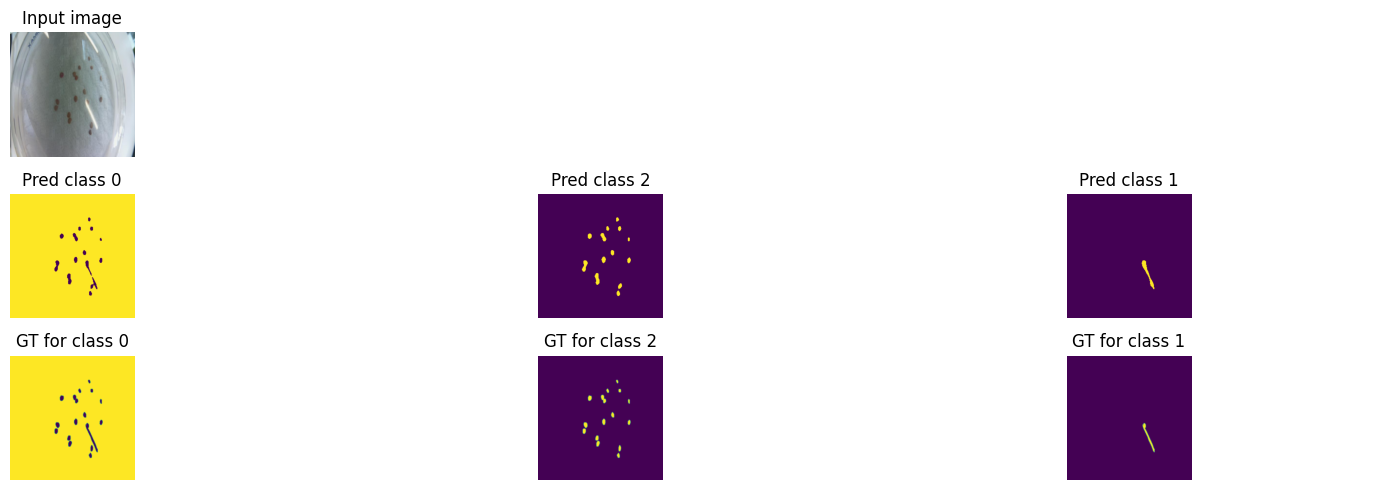

Train loss: 0.00445 | Time: 12m 50s | Val loss: 0.00368
Train_DICE_avg: 0.72742 | Train_Jaccard_avg: 0.66217 | Train_Sensitivity_avg: 0.91911 | Train_Specificity_avg: 0.91527 
Class 0 - Train_DICE: 0.99097 | Train_Jaccard: 0.98213 | Train_Sensitivity: 0.99496 | Train_Specificity: 0.76873 
Class 1 - Train_DICE: 0.42366 | Train_Jaccard: 0.36534 | Train_Sensitivity: 0.85189 | Train_Specificity: 0.98894 
Class 2 - Train_DICE: 0.76763 | Train_Jaccard: 0.63904 | Train_Sensitivity: 0.91047 | Train_Specificity: 0.98813 
Val_DICE_avg: 0.78110 | Val_Jaccard_avg: 0.71361 | Val_Sensitivity_avg: 0.95563 | Val_Specificity_avg: 0.85580 
Class 0 - Val_DICE: 0.99122 | Val_Jaccard: 0.98264 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.58965 
Class 1 - Val_DICE: 0.61967 | Val_Jaccard: 0.56536 | Val_Sensitivity: 0.91933 | Val_Specificity: 0.99260 
Class 2 - Val_DICE: 0.73242 | Val_Jaccard: 0.59284 | Val_Sensitivity: 0.94830 | Val_Specificity: 0.98515 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.00408 | Time: 13m 38s | Val loss: 0.00338
Train_DICE_avg: 0.73726 | Train_Jaccard_avg: 0.67174 | Train_Sensitivity_avg: 0.91938 | Train_Specificity_avg: 0.91527 
Class 0 - Train_DICE: 0.99136 | Train_Jaccard: 0.98291 | Train_Sensitivity: 0.99541 | Train_Specificity: 0.76833 
Class 1 - Train_DICE: 0.44659 | Train_Jaccard: 0.38495 | Train_Sensitivity: 0.84878 | Train_Specificity: 0.98907 
Class 2 - Train_DICE: 0.77384 | Train_Jaccard: 0.64736 | Train_Sensitivity: 0.91396 | Train_Specificity: 0.98842 
Val_DICE_avg: 0.77453 | Val_Jaccard_avg: 0.70781 | Val_Sensitivity_avg: 0.94950 | Val_Specificity_avg: 0.86123 
Class 0 - Val_DICE: 0.99163 | Val_Jaccard: 0.98344 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.60546 
Class 1 - Val_DICE: 0.61137 | Val_Jaccard: 0.55499 | Val_Sensitivity: 0.90635 | Val_Specificity: 0.99254 
Class 2 - Val_DICE: 0.72061 | Val_Jaccard: 0.58499 | Val_Sensitivity: 0.94289 | Val_Specificity: 0.98571 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00383 | Time: 14m 27s | Val loss: 0.00310
Train_DICE_avg: 0.74430 | Train_Jaccard_avg: 0.67869 | Train_Sensitivity_avg: 0.91838 | Train_Specificity_avg: 0.91793 
Class 0 - Train_DICE: 0.99134 | Train_Jaccard: 0.98287 | Train_Sensitivity: 0.99519 | Train_Specificity: 0.77576 
Class 1 - Train_DICE: 0.46228 | Train_Jaccard: 0.39924 | Train_Sensitivity: 0.84705 | Train_Specificity: 0.98930 
Class 2 - Train_DICE: 0.77929 | Train_Jaccard: 0.65395 | Train_Sensitivity: 0.91289 | Train_Specificity: 0.98872 
Val_DICE_avg: 0.79465 | Val_Jaccard_avg: 0.72747 | Val_Sensitivity_avg: 0.95437 | Val_Specificity_avg: 0.85571 
Class 0 - Val_DICE: 0.99109 | Val_Jaccard: 0.98237 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.58786 
Class 1 - Val_DICE: 0.64153 | Val_Jaccard: 0.58471 | Val_Sensitivity: 0.91004 | Val_Specificity: 0.99337 
Class 2 - Val_DICE: 0.75134 | Val_Jaccard: 0.61532 | Val_Sensitivity: 0.95379 | Val_Specificity: 0.98589 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00364 | Time: 15m 16s | Val loss: 0.00293
Train_DICE_avg: 0.74294 | Train_Jaccard_avg: 0.67685 | Train_Sensitivity_avg: 0.92025 | Train_Specificity_avg: 0.91642 
Class 0 - Train_DICE: 0.99133 | Train_Jaccard: 0.98284 | Train_Sensitivity: 0.99518 | Train_Specificity: 0.77159 
Class 1 - Train_DICE: 0.45820 | Train_Jaccard: 0.39413 | Train_Sensitivity: 0.85149 | Train_Specificity: 0.98910 
Class 2 - Train_DICE: 0.77930 | Train_Jaccard: 0.65358 | Train_Sensitivity: 0.91409 | Train_Specificity: 0.98857 
Val_DICE_avg: 0.79440 | Val_Jaccard_avg: 0.72529 | Val_Sensitivity_avg: 0.94874 | Val_Specificity_avg: 0.86298 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98399 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.60994 
Class 1 - Val_DICE: 0.64693 | Val_Jaccard: 0.58598 | Val_Sensitivity: 0.89394 | Val_Specificity: 0.99369 
Class 2 - Val_DICE: 0.74436 | Val_Jaccard: 0.60590 | Val_Sensitivity: 0.95301 | Val_Specificity: 0.98530 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00343 | Time: 16m 5s | Val loss: 0.00270
Train_DICE_avg: 0.74838 | Train_Jaccard_avg: 0.68206 | Train_Sensitivity_avg: 0.91896 | Train_Specificity_avg: 0.91729 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98310 | Train_Sensitivity: 0.99548 | Train_Specificity: 0.77377 
Class 1 - Train_DICE: 0.47001 | Train_Jaccard: 0.40359 | Train_Sensitivity: 0.84467 | Train_Specificity: 0.98942 
Class 2 - Train_DICE: 0.78368 | Train_Jaccard: 0.65948 | Train_Sensitivity: 0.91675 | Train_Specificity: 0.98867 
Val_DICE_avg: 0.80218 | Val_Jaccard_avg: 0.73322 | Val_Sensitivity_avg: 0.95992 | Val_Specificity_avg: 0.86415 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98398 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.61350 
Class 1 - Val_DICE: 0.67230 | Val_Jaccard: 0.61115 | Val_Sensitivity: 0.92362 | Val_Specificity: 0.99358 
Class 2 - Val_DICE: 0.74233 | Val_Jaccard: 0.60454 | Val_Sensitivity: 0.95685 | Val_Specificity: 0.98538 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


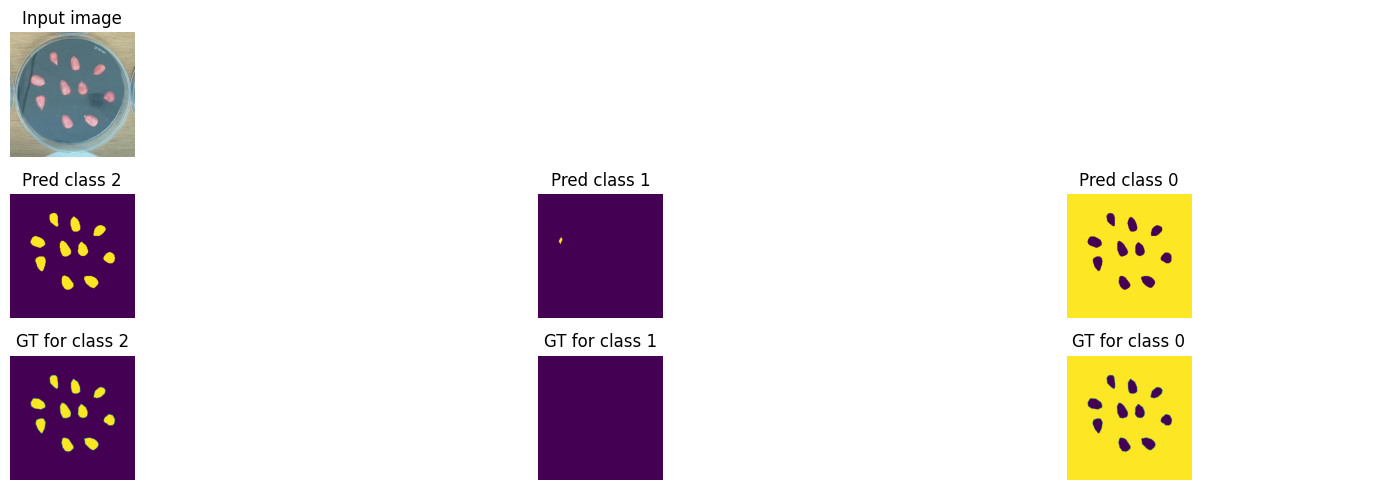

Train loss: 0.00323 | Time: 16m 54s | Val loss: 0.00255
Train_DICE_avg: 0.75156 | Train_Jaccard_avg: 0.68548 | Train_Sensitivity_avg: 0.92192 | Train_Specificity_avg: 0.91823 
Class 0 - Train_DICE: 0.99164 | Train_Jaccard: 0.98344 | Train_Sensitivity: 0.99538 | Train_Specificity: 0.77635 
Class 1 - Train_DICE: 0.48054 | Train_Jaccard: 0.41408 | Train_Sensitivity: 0.85401 | Train_Specificity: 0.98952 
Class 2 - Train_DICE: 0.78251 | Train_Jaccard: 0.65891 | Train_Sensitivity: 0.91636 | Train_Specificity: 0.98883 
Val_DICE_avg: 0.77617 | Val_Jaccard_avg: 0.70511 | Val_Sensitivity_avg: 0.92057 | Val_Specificity_avg: 0.85768 
Class 0 - Val_DICE: 0.99132 | Val_Jaccard: 0.98284 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.59399 
Class 1 - Val_DICE: 0.59849 | Val_Jaccard: 0.53193 | Val_Sensitivity: 0.79448 | Val_Specificity: 0.99421 
Class 2 - Val_DICE: 0.73869 | Val_Jaccard: 0.60055 | Val_Sensitivity: 0.96795 | Val_Specificity: 0.98486 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00300 | Time: 17m 43s | Val loss: 0.00231
Train_DICE_avg: 0.75705 | Train_Jaccard_avg: 0.69112 | Train_Sensitivity_avg: 0.91893 | Train_Specificity_avg: 0.92082 
Class 0 - Train_DICE: 0.99179 | Train_Jaccard: 0.98374 | Train_Sensitivity: 0.99554 | Train_Specificity: 0.78341 
Class 1 - Train_DICE: 0.48585 | Train_Jaccard: 0.41796 | Train_Sensitivity: 0.84560 | Train_Specificity: 0.98982 
Class 2 - Train_DICE: 0.79351 | Train_Jaccard: 0.67166 | Train_Sensitivity: 0.91564 | Train_Specificity: 0.98923 
Val_DICE_avg: 0.79959 | Val_Jaccard_avg: 0.72791 | Val_Sensitivity_avg: 0.95057 | Val_Specificity_avg: 0.86472 
Class 0 - Val_DICE: 0.99217 | Val_Jaccard: 0.98449 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.61579 
Class 1 - Val_DICE: 0.66992 | Val_Jaccard: 0.60333 | Val_Sensitivity: 0.88811 | Val_Specificity: 0.99388 
Class 2 - Val_DICE: 0.73668 | Val_Jaccard: 0.59592 | Val_Sensitivity: 0.96430 | Val_Specificity: 0.98451 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00285 | Time: 18m 33s | Val loss: 0.00232
Train_DICE_avg: 0.75977 | Train_Jaccard_avg: 0.69310 | Train_Sensitivity_avg: 0.92265 | Train_Specificity_avg: 0.91783 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98371 | Train_Sensitivity: 0.99555 | Train_Specificity: 0.77484 
Class 1 - Train_DICE: 0.49508 | Train_Jaccard: 0.42553 | Train_Sensitivity: 0.85284 | Train_Specificity: 0.98968 
Class 2 - Train_DICE: 0.79247 | Train_Jaccard: 0.67006 | Train_Sensitivity: 0.91957 | Train_Specificity: 0.98898 
Val_DICE_avg: 0.80081 | Val_Jaccard_avg: 0.73234 | Val_Sensitivity_avg: 0.95622 | Val_Specificity_avg: 0.86447 
Class 0 - Val_DICE: 0.99206 | Val_Jaccard: 0.98429 | Val_Sensitivity: 0.99908 | Val_Specificity: 0.61405 
Class 1 - Val_DICE: 0.66612 | Val_Jaccard: 0.60403 | Val_Sensitivity: 0.90971 | Val_Specificity: 0.99368 
Class 2 - Val_DICE: 0.74426 | Val_Jaccard: 0.60872 | Val_Sensitivity: 0.95988 | Val_Specificity: 0.98568 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.00275 | Time: 19m 22s | Val loss: 0.00210
Train_DICE_avg: 0.76082 | Train_Jaccard_avg: 0.69438 | Train_Sensitivity_avg: 0.92276 | Train_Specificity_avg: 0.91855 
Class 0 - Train_DICE: 0.99188 | Train_Jaccard: 0.98392 | Train_Sensitivity: 0.99563 | Train_Specificity: 0.77677 
Class 1 - Train_DICE: 0.49678 | Train_Jaccard: 0.42714 | Train_Sensitivity: 0.85308 | Train_Specificity: 0.98974 
Class 2 - Train_DICE: 0.79378 | Train_Jaccard: 0.67207 | Train_Sensitivity: 0.91957 | Train_Specificity: 0.98914 
Val_DICE_avg: 0.80409 | Val_Jaccard_avg: 0.73388 | Val_Sensitivity_avg: 0.95236 | Val_Specificity_avg: 0.86757 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98464 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.62351 
Class 1 - Val_DICE: 0.67726 | Val_Jaccard: 0.61155 | Val_Sensitivity: 0.89615 | Val_Specificity: 0.99381 
Class 2 - Val_DICE: 0.74278 | Val_Jaccard: 0.60547 | Val_Sensitivity: 0.96165 | Val_Specificity: 0.98540 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00264 | Time: 20m 11s | Val loss: 0.00208
Train_DICE_avg: 0.76220 | Train_Jaccard_avg: 0.69632 | Train_Sensitivity_avg: 0.92324 | Train_Specificity_avg: 0.91943 
Class 0 - Train_DICE: 0.99205 | Train_Jaccard: 0.98426 | Train_Sensitivity: 0.99574 | Train_Specificity: 0.77876 
Class 1 - Train_DICE: 0.49741 | Train_Jaccard: 0.42756 | Train_Sensitivity: 0.85410 | Train_Specificity: 0.98998 
Class 2 - Train_DICE: 0.79714 | Train_Jaccard: 0.67715 | Train_Sensitivity: 0.91989 | Train_Specificity: 0.98953 
Val_DICE_avg: 0.81639 | Val_Jaccard_avg: 0.74870 | Val_Sensitivity_avg: 0.95832 | Val_Specificity_avg: 0.86219 
Class 0 - Val_DICE: 0.99169 | Val_Jaccard: 0.98357 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60606 
Class 1 - Val_DICE: 0.68991 | Val_Jaccard: 0.62802 | Val_Sensitivity: 0.92187 | Val_Specificity: 0.99401 
Class 2 - Val_DICE: 0.76755 | Val_Jaccard: 0.63451 | Val_Sensitivity: 0.95373 | Val_Specificity: 0.98651 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00256 | Time: 21m 0s | Val loss: 0.00203
Train_DICE_avg: 0.76970 | Train_Jaccard_avg: 0.70347 | Train_Sensitivity_avg: 0.92560 | Train_Specificity_avg: 0.91993 
Class 0 - Train_DICE: 0.99209 | Train_Jaccard: 0.98433 | Train_Sensitivity: 0.99582 | Train_Specificity: 0.78018 
Class 1 - Train_DICE: 0.51719 | Train_Jaccard: 0.44592 | Train_Sensitivity: 0.85859 | Train_Specificity: 0.99018 
Class 2 - Train_DICE: 0.79983 | Train_Jaccard: 0.68018 | Train_Sensitivity: 0.92239 | Train_Specificity: 0.98943 
Val_DICE_avg: 0.81417 | Val_Jaccard_avg: 0.74605 | Val_Sensitivity_avg: 0.95530 | Val_Specificity_avg: 0.86306 
Class 0 - Val_DICE: 0.99157 | Val_Jaccard: 0.98332 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60841 
Class 1 - Val_DICE: 0.69189 | Val_Jaccard: 0.62755 | Val_Sensitivity: 0.91494 | Val_Specificity: 0.99393 
Class 2 - Val_DICE: 0.75906 | Val_Jaccard: 0.62728 | Val_Sensitivity: 0.95158 | Val_Specificity: 0.98684 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00249 | Time: 21m 49s | Val loss: 0.00199
Train_DICE_avg: 0.76755 | Train_Jaccard_avg: 0.70181 | Train_Sensitivity_avg: 0.92495 | Train_Specificity_avg: 0.92051 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98452 | Train_Sensitivity: 0.99589 | Train_Specificity: 0.78177 
Class 1 - Train_DICE: 0.50858 | Train_Jaccard: 0.43760 | Train_Sensitivity: 0.85577 | Train_Specificity: 0.99012 
Class 2 - Train_DICE: 0.80188 | Train_Jaccard: 0.68333 | Train_Sensitivity: 0.92318 | Train_Specificity: 0.98965 
Val_DICE_avg: 0.81054 | Val_Jaccard_avg: 0.74177 | Val_Sensitivity_avg: 0.95995 | Val_Specificity_avg: 0.86808 
Class 0 - Val_DICE: 0.99242 | Val_Jaccard: 0.98500 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.62467 
Class 1 - Val_DICE: 0.68550 | Val_Jaccard: 0.62241 | Val_Sensitivity: 0.92415 | Val_Specificity: 0.99369 
Class 2 - Val_DICE: 0.75370 | Val_Jaccard: 0.61790 | Val_Sensitivity: 0.95637 | Val_Specificity: 0.98588 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00246 | Time: 22m 37s | Val loss: 0.00192
Train_DICE_avg: 0.76972 | Train_Jaccard_avg: 0.70388 | Train_Sensitivity_avg: 0.92445 | Train_Specificity_avg: 0.92115 
Class 0 - Train_DICE: 0.99217 | Train_Jaccard: 0.98448 | Train_Sensitivity: 0.99589 | Train_Specificity: 0.78370 
Class 1 - Train_DICE: 0.51355 | Train_Jaccard: 0.44200 | Train_Sensitivity: 0.85479 | Train_Specificity: 0.99002 
Class 2 - Train_DICE: 0.80344 | Train_Jaccard: 0.68517 | Train_Sensitivity: 0.92268 | Train_Specificity: 0.98971 
Val_DICE_avg: 0.81437 | Val_Jaccard_avg: 0.74686 | Val_Sensitivity_avg: 0.95682 | Val_Specificity_avg: 0.86310 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98365 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.60857 
Class 1 - Val_DICE: 0.68714 | Val_Jaccard: 0.62417 | Val_Sensitivity: 0.91061 | Val_Specificity: 0.99403 
Class 2 - Val_DICE: 0.76424 | Val_Jaccard: 0.63276 | Val_Sensitivity: 0.96049 | Val_Specificity: 0.98669 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.00243 | Time: 23m 26s | Val loss: 0.00188
Train_DICE_avg: 0.76795 | Train_Jaccard_avg: 0.70216 | Train_Sensitivity_avg: 0.92527 | Train_Specificity_avg: 0.92164 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98464 | Train_Sensitivity: 0.99598 | Train_Specificity: 0.78522 
Class 1 - Train_DICE: 0.51043 | Train_Jaccard: 0.43913 | Train_Sensitivity: 0.85804 | Train_Specificity: 0.99012 
Class 2 - Train_DICE: 0.80117 | Train_Jaccard: 0.68271 | Train_Sensitivity: 0.92179 | Train_Specificity: 0.98957 
Val_DICE_avg: 0.82006 | Val_Jaccard_avg: 0.75303 | Val_Sensitivity_avg: 0.96151 | Val_Specificity_avg: 0.86216 
Class 0 - Val_DICE: 0.99161 | Val_Jaccard: 0.98339 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60532 
Class 1 - Val_DICE: 0.70017 | Val_Jaccard: 0.63734 | Val_Sensitivity: 0.92526 | Val_Specificity: 0.99421 
Class 2 - Val_DICE: 0.76841 | Val_Jaccard: 0.63836 | Val_Sensitivity: 0.95993 | Val_Specificity: 0.98693 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.00242 | Time: 24m 15s | Val loss: 0.00186
Train_DICE_avg: 0.77196 | Train_Jaccard_avg: 0.70584 | Train_Sensitivity_avg: 0.92268 | Train_Specificity_avg: 0.92015 
Class 0 - Train_DICE: 0.99209 | Train_Jaccard: 0.98433 | Train_Sensitivity: 0.99588 | Train_Specificity: 0.78035 
Class 1 - Train_DICE: 0.52124 | Train_Jaccard: 0.44845 | Train_Sensitivity: 0.84918 | Train_Specificity: 0.99038 
Class 2 - Train_DICE: 0.80255 | Train_Jaccard: 0.68473 | Train_Sensitivity: 0.92296 | Train_Specificity: 0.98972 
Val_DICE_avg: 0.81490 | Val_Jaccard_avg: 0.74614 | Val_Sensitivity_avg: 0.95382 | Val_Specificity_avg: 0.86300 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98352 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60837 
Class 1 - Val_DICE: 0.69645 | Val_Jaccard: 0.63218 | Val_Sensitivity: 0.89625 | Val_Specificity: 0.99463 
Class 2 - Val_DICE: 0.75657 | Val_Jaccard: 0.62273 | Val_Sensitivity: 0.96581 | Val_Specificity: 0.98601 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


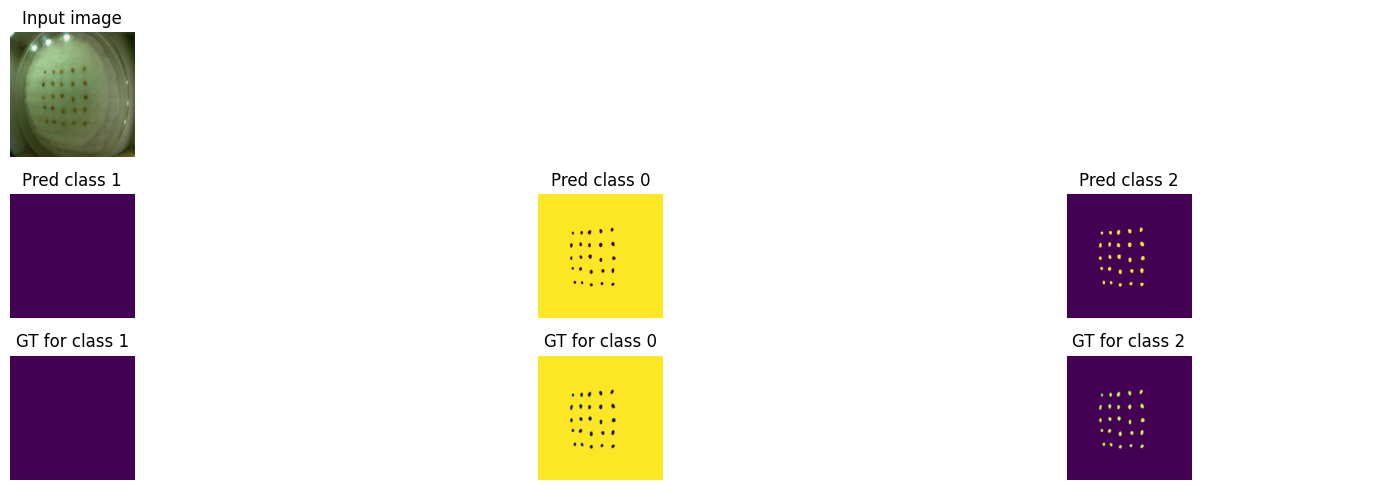

Train loss: 0.00237 | Time: 25m 5s | Val loss: 0.00180
Train_DICE_avg: 0.77210 | Train_Jaccard_avg: 0.70641 | Train_Sensitivity_avg: 0.92326 | Train_Specificity_avg: 0.92233 
Class 0 - Train_DICE: 0.99234 | Train_Jaccard: 0.98482 | Train_Sensitivity: 0.99602 | Train_Specificity: 0.78710 
Class 1 - Train_DICE: 0.52024 | Train_Jaccard: 0.44816 | Train_Sensitivity: 0.85103 | Train_Specificity: 0.99016 
Class 2 - Train_DICE: 0.80374 | Train_Jaccard: 0.68626 | Train_Sensitivity: 0.92274 | Train_Specificity: 0.98972 
Val_DICE_avg: 0.81873 | Val_Jaccard_avg: 0.74930 | Val_Sensitivity_avg: 0.95307 | Val_Specificity_avg: 0.86232 
Class 0 - Val_DICE: 0.99172 | Val_Jaccard: 0.98362 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.60628 
Class 1 - Val_DICE: 0.69584 | Val_Jaccard: 0.62773 | Val_Sensitivity: 0.89685 | Val_Specificity: 0.99428 
Class 2 - Val_DICE: 0.76863 | Val_Jaccard: 0.63656 | Val_Sensitivity: 0.96302 | Val_Specificity: 0.98641 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00230 | Time: 25m 54s | Val loss: 0.00177
Train_DICE_avg: 0.77949 | Train_Jaccard_avg: 0.71362 | Train_Sensitivity_avg: 0.92928 | Train_Specificity_avg: 0.92359 
Class 0 - Train_DICE: 0.99241 | Train_Jaccard: 0.98496 | Train_Sensitivity: 0.99606 | Train_Specificity: 0.79015 
Class 1 - Train_DICE: 0.53603 | Train_Jaccard: 0.46187 | Train_Sensitivity: 0.86770 | Train_Specificity: 0.99055 
Class 2 - Train_DICE: 0.81004 | Train_Jaccard: 0.69404 | Train_Sensitivity: 0.92408 | Train_Specificity: 0.99007 
Val_DICE_avg: 0.81740 | Val_Jaccard_avg: 0.74978 | Val_Sensitivity_avg: 0.95642 | Val_Specificity_avg: 0.86423 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98395 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61168 
Class 1 - Val_DICE: 0.69205 | Val_Jaccard: 0.62783 | Val_Sensitivity: 0.90983 | Val_Specificity: 0.99425 
Class 2 - Val_DICE: 0.76828 | Val_Jaccard: 0.63757 | Val_Sensitivity: 0.96003 | Val_Specificity: 0.98675 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00227 | Time: 26m 43s | Val loss: 0.00174
Train_DICE_avg: 0.77960 | Train_Jaccard_avg: 0.71389 | Train_Sensitivity_avg: 0.92987 | Train_Specificity_avg: 0.92189 
Class 0 - Train_DICE: 0.99247 | Train_Jaccard: 0.98508 | Train_Sensitivity: 0.99617 | Train_Specificity: 0.78512 
Class 1 - Train_DICE: 0.53840 | Train_Jaccard: 0.46515 | Train_Sensitivity: 0.86703 | Train_Specificity: 0.99058 
Class 2 - Train_DICE: 0.80794 | Train_Jaccard: 0.69143 | Train_Sensitivity: 0.92642 | Train_Specificity: 0.98997 
Val_DICE_avg: 0.81767 | Val_Jaccard_avg: 0.75019 | Val_Sensitivity_avg: 0.95513 | Val_Specificity_avg: 0.86368 
Class 0 - Val_DICE: 0.99164 | Val_Jaccard: 0.98347 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.60962 
Class 1 - Val_DICE: 0.69180 | Val_Jaccard: 0.62623 | Val_Sensitivity: 0.90318 | Val_Specificity: 0.99428 
Class 2 - Val_DICE: 0.76958 | Val_Jaccard: 0.64085 | Val_Sensitivity: 0.96282 | Val_Specificity: 0.98715 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00225 | Time: 27m 32s | Val loss: 0.00172
Train_DICE_avg: 0.78387 | Train_Jaccard_avg: 0.71892 | Train_Sensitivity_avg: 0.92895 | Train_Specificity_avg: 0.92470 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98502 | Train_Sensitivity: 0.99595 | Train_Specificity: 0.79296 
Class 1 - Train_DICE: 0.54624 | Train_Jaccard: 0.47344 | Train_Sensitivity: 0.86546 | Train_Specificity: 0.99088 
Class 2 - Train_DICE: 0.81293 | Train_Jaccard: 0.69830 | Train_Sensitivity: 0.92545 | Train_Specificity: 0.99027 
Val_DICE_avg: 0.82135 | Val_Jaccard_avg: 0.75312 | Val_Sensitivity_avg: 0.95368 | Val_Specificity_avg: 0.86397 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98378 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61044 
Class 1 - Val_DICE: 0.70641 | Val_Jaccard: 0.63868 | Val_Sensitivity: 0.89598 | Val_Specificity: 0.99457 
Class 2 - Val_DICE: 0.76584 | Val_Jaccard: 0.63689 | Val_Sensitivity: 0.96567 | Val_Specificity: 0.98691 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00223 | Time: 28m 21s | Val loss: 0.00217
Train_DICE_avg: 0.78131 | Train_Jaccard_avg: 0.71565 | Train_Sensitivity_avg: 0.92765 | Train_Specificity_avg: 0.92284 
Class 0 - Train_DICE: 0.99240 | Train_Jaccard: 0.98494 | Train_Sensitivity: 0.99620 | Train_Specificity: 0.78772 
Class 1 - Train_DICE: 0.54082 | Train_Jaccard: 0.46702 | Train_Sensitivity: 0.86048 | Train_Specificity: 0.99081 
Class 2 - Train_DICE: 0.81071 | Train_Jaccard: 0.69500 | Train_Sensitivity: 0.92627 | Train_Specificity: 0.98998 
Val_DICE_avg: 0.81730 | Val_Jaccard_avg: 0.75161 | Val_Sensitivity_avg: 0.95746 | Val_Specificity_avg: 0.86366 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98335 | Val_Sensitivity: 0.99916 | Val_Specificity: 0.60969 
Class 1 - Val_DICE: 0.69748 | Val_Jaccard: 0.63643 | Val_Sensitivity: 0.91218 | Val_Specificity: 0.99441 
Class 2 - Val_DICE: 0.76284 | Val_Jaccard: 0.63503 | Val_Sensitivity: 0.96104 | Val_Specificity: 0.98689 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


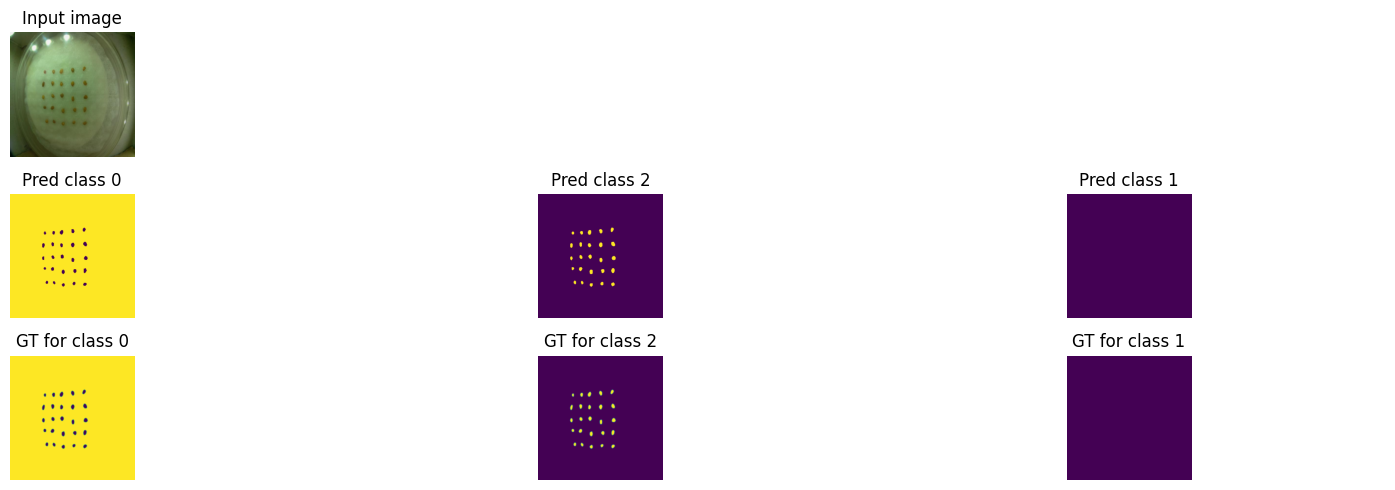

Train loss: 0.00218 | Time: 29m 11s | Val loss: 0.00169
Train_DICE_avg: 0.77946 | Train_Jaccard_avg: 0.71399 | Train_Sensitivity_avg: 0.93087 | Train_Specificity_avg: 0.92176 
Class 0 - Train_DICE: 0.99260 | Train_Jaccard: 0.98533 | Train_Sensitivity: 0.99627 | Train_Specificity: 0.78483 
Class 1 - Train_DICE: 0.53477 | Train_Jaccard: 0.46131 | Train_Sensitivity: 0.86805 | Train_Specificity: 0.99043 
Class 2 - Train_DICE: 0.81100 | Train_Jaccard: 0.69535 | Train_Sensitivity: 0.92829 | Train_Specificity: 0.99001 
Val_DICE_avg: 0.82626 | Val_Jaccard_avg: 0.75724 | Val_Sensitivity_avg: 0.95456 | Val_Specificity_avg: 0.86438 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98390 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61196 
Class 1 - Val_DICE: 0.71379 | Val_Jaccard: 0.64547 | Val_Sensitivity: 0.89801 | Val_Specificity: 0.99461 
Class 2 - Val_DICE: 0.77313 | Val_Jaccard: 0.64233 | Val_Sensitivity: 0.96631 | Val_Specificity: 0.98656 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00213 | Time: 30m 0s | Val loss: 0.00163
Train_DICE_avg: 0.78200 | Train_Jaccard_avg: 0.71682 | Train_Sensitivity_avg: 0.93368 | Train_Specificity_avg: 0.92249 
Class 0 - Train_DICE: 0.99270 | Train_Jaccard: 0.98553 | Train_Sensitivity: 0.99653 | Train_Specificity: 0.78702 
Class 1 - Train_DICE: 0.54016 | Train_Jaccard: 0.46669 | Train_Sensitivity: 0.87412 | Train_Specificity: 0.99048 
Class 2 - Train_DICE: 0.81313 | Train_Jaccard: 0.69825 | Train_Sensitivity: 0.93040 | Train_Specificity: 0.98998 
Val_DICE_avg: 0.82732 | Val_Jaccard_avg: 0.75838 | Val_Sensitivity_avg: 0.95899 | Val_Specificity_avg: 0.86546 
Class 0 - Val_DICE: 0.99194 | Val_Jaccard: 0.98405 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61522 
Class 1 - Val_DICE: 0.71960 | Val_Jaccard: 0.65148 | Val_Sensitivity: 0.90952 | Val_Specificity: 0.99459 
Class 2 - Val_DICE: 0.77043 | Val_Jaccard: 0.63961 | Val_Sensitivity: 0.96813 | Val_Specificity: 0.98657 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00214 | Time: 30m 49s | Val loss: 0.00168
Train_DICE_avg: 0.78272 | Train_Jaccard_avg: 0.71772 | Train_Sensitivity_avg: 0.93280 | Train_Specificity_avg: 0.92268 
Class 0 - Train_DICE: 0.99272 | Train_Jaccard: 0.98557 | Train_Sensitivity: 0.99642 | Train_Specificity: 0.78729 
Class 1 - Train_DICE: 0.54151 | Train_Jaccard: 0.46807 | Train_Sensitivity: 0.87186 | Train_Specificity: 0.99052 
Class 2 - Train_DICE: 0.81393 | Train_Jaccard: 0.69951 | Train_Sensitivity: 0.93012 | Train_Specificity: 0.99021 
Val_DICE_avg: 0.82376 | Val_Jaccard_avg: 0.75251 | Val_Sensitivity_avg: 0.95286 | Val_Specificity_avg: 0.86727 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98454 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62130 
Class 1 - Val_DICE: 0.72117 | Val_Jaccard: 0.64979 | Val_Sensitivity: 0.88609 | Val_Specificity: 0.99483 
Class 2 - Val_DICE: 0.75791 | Val_Jaccard: 0.62321 | Val_Sensitivity: 0.97314 | Val_Specificity: 0.98567 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.00210 | Time: 31m 38s | Val loss: 0.00167
Train_DICE_avg: 0.79061 | Train_Jaccard_avg: 0.72525 | Train_Sensitivity_avg: 0.93526 | Train_Specificity_avg: 0.92329 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98550 | Train_Sensitivity: 0.99644 | Train_Specificity: 0.78884 
Class 1 - Train_DICE: 0.56465 | Train_Jaccard: 0.49004 | Train_Sensitivity: 0.87897 | Train_Specificity: 0.99088 
Class 2 - Train_DICE: 0.81451 | Train_Jaccard: 0.70021 | Train_Sensitivity: 0.93038 | Train_Specificity: 0.99014 
Val_DICE_avg: 0.82613 | Val_Jaccard_avg: 0.75581 | Val_Sensitivity_avg: 0.95600 | Val_Specificity_avg: 0.86672 
Class 0 - Val_DICE: 0.99215 | Val_Jaccard: 0.98447 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61922 
Class 1 - Val_DICE: 0.71766 | Val_Jaccard: 0.64620 | Val_Sensitivity: 0.89590 | Val_Specificity: 0.99468 
Class 2 - Val_DICE: 0.76856 | Val_Jaccard: 0.63676 | Val_Sensitivity: 0.97274 | Val_Specificity: 0.98627 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.00206 | Time: 32m 29s | Val loss: 0.00173
Train_DICE_avg: 0.78906 | Train_Jaccard_avg: 0.72360 | Train_Sensitivity_avg: 0.93378 | Train_Specificity_avg: 0.92306 
Class 0 - Train_DICE: 0.99274 | Train_Jaccard: 0.98562 | Train_Sensitivity: 0.99649 | Train_Specificity: 0.78824 
Class 1 - Train_DICE: 0.55923 | Train_Jaccard: 0.48394 | Train_Sensitivity: 0.87461 | Train_Specificity: 0.99083 
Class 2 - Train_DICE: 0.81519 | Train_Jaccard: 0.70125 | Train_Sensitivity: 0.93024 | Train_Specificity: 0.99012 
Val_DICE_avg: 0.82861 | Val_Jaccard_avg: 0.75808 | Val_Sensitivity_avg: 0.95718 | Val_Specificity_avg: 0.86562 
Class 0 - Val_DICE: 0.99215 | Val_Jaccard: 0.98446 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61604 
Class 1 - Val_DICE: 0.72685 | Val_Jaccard: 0.65601 | Val_Sensitivity: 0.89860 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.76684 | Val_Jaccard: 0.63377 | Val_Sensitivity: 0.97358 | Val_Specificity: 0.98608 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


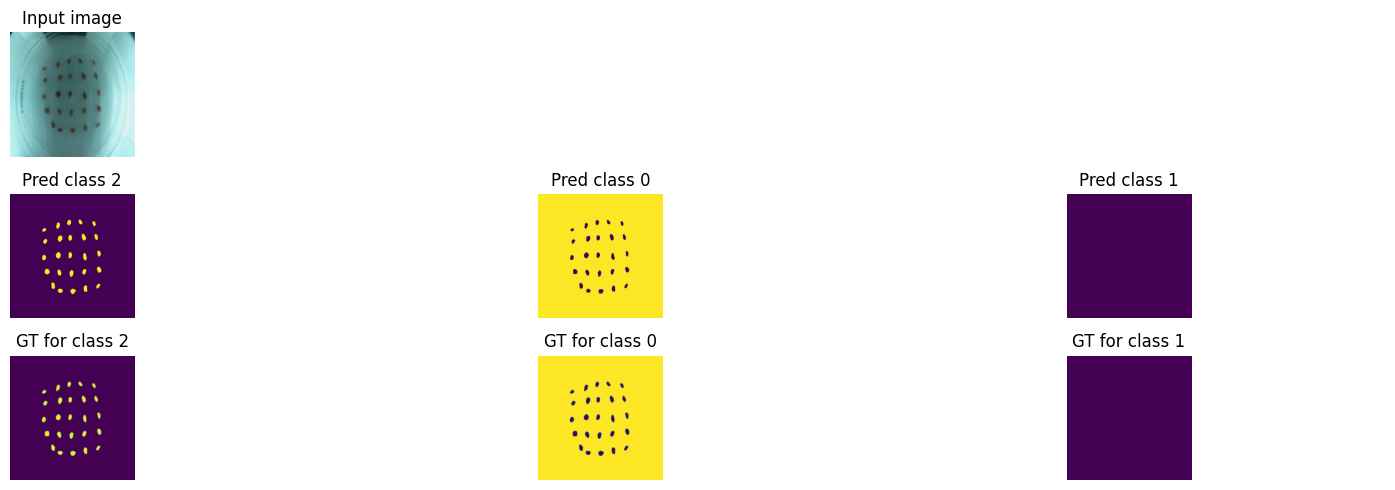

Train loss: 0.00205 | Time: 33m 20s | Val loss: 0.00165
Train_DICE_avg: 0.78990 | Train_Jaccard_avg: 0.72469 | Train_Sensitivity_avg: 0.93490 | Train_Specificity_avg: 0.92333 
Class 0 - Train_DICE: 0.99278 | Train_Jaccard: 0.98568 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.78890 
Class 1 - Train_DICE: 0.55947 | Train_Jaccard: 0.48412 | Train_Sensitivity: 0.87639 | Train_Specificity: 0.99085 
Class 2 - Train_DICE: 0.81746 | Train_Jaccard: 0.70428 | Train_Sensitivity: 0.93173 | Train_Specificity: 0.99024 
Val_DICE_avg: 0.82967 | Val_Jaccard_avg: 0.75946 | Val_Sensitivity_avg: 0.95287 | Val_Specificity_avg: 0.86423 
Class 0 - Val_DICE: 0.99198 | Val_Jaccard: 0.98412 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61163 
Class 1 - Val_DICE: 0.72832 | Val_Jaccard: 0.65719 | Val_Sensitivity: 0.88603 | Val_Specificity: 0.99495 
Class 2 - Val_DICE: 0.76871 | Val_Jaccard: 0.63708 | Val_Sensitivity: 0.97324 | Val_Specificity: 0.98610 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.00202 | Time: 34m 10s | Val loss: 0.00160
Train_DICE_avg: 0.79258 | Train_Jaccard_avg: 0.72708 | Train_Sensitivity_avg: 0.93596 | Train_Specificity_avg: 0.92381 
Class 0 - Train_DICE: 0.99281 | Train_Jaccard: 0.98574 | Train_Sensitivity: 0.99662 | Train_Specificity: 0.79047 
Class 1 - Train_DICE: 0.56720 | Train_Jaccard: 0.49110 | Train_Sensitivity: 0.87817 | Train_Specificity: 0.99087 
Class 2 - Train_DICE: 0.81774 | Train_Jaccard: 0.70438 | Train_Sensitivity: 0.93308 | Train_Specificity: 0.99010 
Val_DICE_avg: 0.82899 | Val_Jaccard_avg: 0.75846 | Val_Sensitivity_avg: 0.95579 | Val_Specificity_avg: 0.86822 
Class 0 - Val_DICE: 0.99230 | Val_Jaccard: 0.98477 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62385 
Class 1 - Val_DICE: 0.73166 | Val_Jaccard: 0.66128 | Val_Sensitivity: 0.89635 | Val_Specificity: 0.99495 
Class 2 - Val_DICE: 0.76302 | Val_Jaccard: 0.62935 | Val_Sensitivity: 0.97167 | Val_Specificity: 0.98585 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.00202 | Time: 34m 59s | Val loss: 0.00158
Train_DICE_avg: 0.79065 | Train_Jaccard_avg: 0.72509 | Train_Sensitivity_avg: 0.93571 | Train_Specificity_avg: 0.92219 
Class 0 - Train_DICE: 0.99272 | Train_Jaccard: 0.98557 | Train_Sensitivity: 0.99657 | Train_Specificity: 0.78555 
Class 1 - Train_DICE: 0.56246 | Train_Jaccard: 0.48689 | Train_Sensitivity: 0.87637 | Train_Specificity: 0.99095 
Class 2 - Train_DICE: 0.81676 | Train_Jaccard: 0.70280 | Train_Sensitivity: 0.93418 | Train_Specificity: 0.99007 
Val_DICE_avg: 0.82865 | Val_Jaccard_avg: 0.75794 | Val_Sensitivity_avg: 0.95680 | Val_Specificity_avg: 0.86832 
Class 0 - Val_DICE: 0.99234 | Val_Jaccard: 0.98484 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62422 
Class 1 - Val_DICE: 0.73164 | Val_Jaccard: 0.66046 | Val_Sensitivity: 0.89767 | Val_Specificity: 0.99480 
Class 2 - Val_DICE: 0.76198 | Val_Jaccard: 0.62853 | Val_Sensitivity: 0.97335 | Val_Specificity: 0.98594 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.00200 | Time: 35m 50s | Val loss: 0.00158
Train_DICE_avg: 0.79683 | Train_Jaccard_avg: 0.73192 | Train_Sensitivity_avg: 0.93815 | Train_Specificity_avg: 0.92525 
Class 0 - Train_DICE: 0.99283 | Train_Jaccard: 0.98579 | Train_Sensitivity: 0.99647 | Train_Specificity: 0.79439 
Class 1 - Train_DICE: 0.57780 | Train_Jaccard: 0.50259 | Train_Sensitivity: 0.88405 | Train_Specificity: 0.99097 
Class 2 - Train_DICE: 0.81987 | Train_Jaccard: 0.70738 | Train_Sensitivity: 0.93393 | Train_Specificity: 0.99038 
Val_DICE_avg: 0.82989 | Val_Jaccard_avg: 0.75984 | Val_Sensitivity_avg: 0.95468 | Val_Specificity_avg: 0.86787 
Class 0 - Val_DICE: 0.99231 | Val_Jaccard: 0.98477 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62255 
Class 1 - Val_DICE: 0.73019 | Val_Jaccard: 0.65966 | Val_Sensitivity: 0.89422 | Val_Specificity: 0.99491 
Class 2 - Val_DICE: 0.76718 | Val_Jaccard: 0.63510 | Val_Sensitivity: 0.97047 | Val_Specificity: 0.98615 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.00199 | Time: 36m 40s | Val loss: 0.00161
Train_DICE_avg: 0.79736 | Train_Jaccard_avg: 0.73221 | Train_Sensitivity_avg: 0.93659 | Train_Specificity_avg: 0.92528 
Class 0 - Train_DICE: 0.99284 | Train_Jaccard: 0.98580 | Train_Sensitivity: 0.99665 | Train_Specificity: 0.79443 
Class 1 - Train_DICE: 0.57812 | Train_Jaccard: 0.50186 | Train_Sensitivity: 0.87947 | Train_Specificity: 0.99108 
Class 2 - Train_DICE: 0.82113 | Train_Jaccard: 0.70899 | Train_Sensitivity: 0.93367 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.82790 | Val_Jaccard_avg: 0.75764 | Val_Sensitivity_avg: 0.95920 | Val_Specificity_avg: 0.86955 
Class 0 - Val_DICE: 0.99240 | Val_Jaccard: 0.98496 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62792 
Class 1 - Val_DICE: 0.73232 | Val_Jaccard: 0.66274 | Val_Sensitivity: 0.90563 | Val_Specificity: 0.99485 
Class 2 - Val_DICE: 0.75899 | Val_Jaccard: 0.62521 | Val_Sensitivity: 0.97259 | Val_Specificity: 0.98587 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


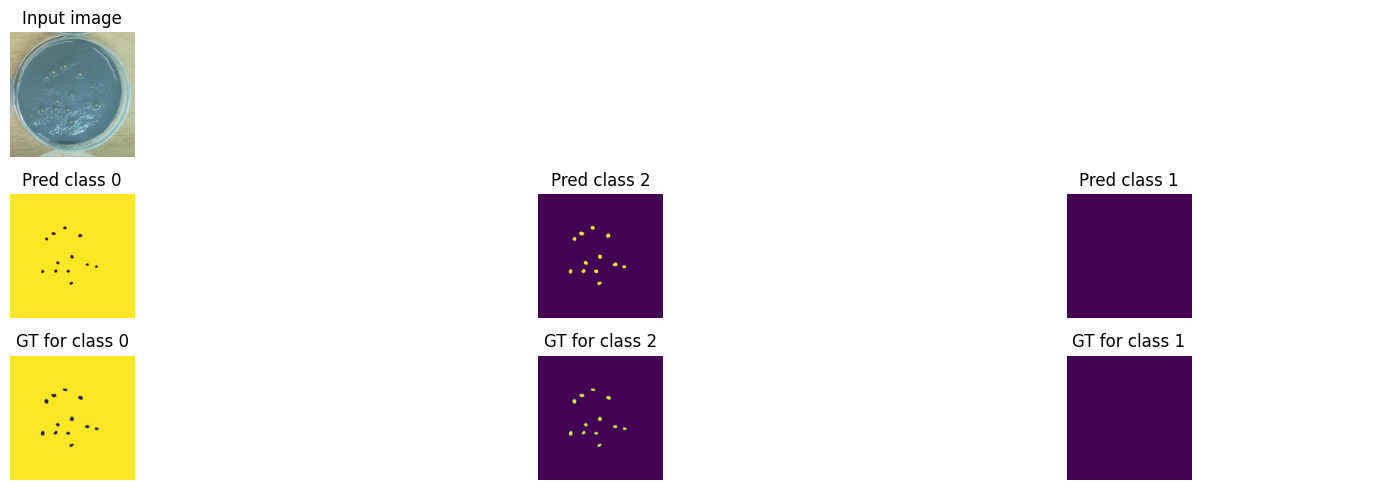

Train loss: 0.00198 | Time: 37m 31s | Val loss: 0.00158
Train_DICE_avg: 0.79460 | Train_Jaccard_avg: 0.72959 | Train_Sensitivity_avg: 0.93674 | Train_Specificity_avg: 0.92402 
Class 0 - Train_DICE: 0.99284 | Train_Jaccard: 0.98580 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.79064 
Class 1 - Train_DICE: 0.57026 | Train_Jaccard: 0.49449 | Train_Sensitivity: 0.87937 | Train_Specificity: 0.99104 
Class 2 - Train_DICE: 0.82071 | Train_Jaccard: 0.70848 | Train_Sensitivity: 0.93432 | Train_Specificity: 0.99038 
Val_DICE_avg: 0.82817 | Val_Jaccard_avg: 0.75783 | Val_Sensitivity_avg: 0.95580 | Val_Specificity_avg: 0.87026 
Class 0 - Val_DICE: 0.99264 | Val_Jaccard: 0.98542 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.63023 
Class 1 - Val_DICE: 0.72450 | Val_Jaccard: 0.65438 | Val_Sensitivity: 0.89729 | Val_Specificity: 0.99474 
Class 2 - Val_DICE: 0.76736 | Val_Jaccard: 0.63369 | Val_Sensitivity: 0.97074 | Val_Specificity: 0.98582 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00195 | Time: 38m 21s | Val loss: 0.00156
Train_DICE_avg: 0.80078 | Train_Jaccard_avg: 0.73576 | Train_Sensitivity_avg: 0.93920 | Train_Specificity_avg: 0.92510 
Class 0 - Train_DICE: 0.99293 | Train_Jaccard: 0.98599 | Train_Sensitivity: 0.99673 | Train_Specificity: 0.79364 
Class 1 - Train_DICE: 0.58650 | Train_Jaccard: 0.51004 | Train_Sensitivity: 0.88527 | Train_Specificity: 0.99125 
Class 2 - Train_DICE: 0.82291 | Train_Jaccard: 0.71126 | Train_Sensitivity: 0.93560 | Train_Specificity: 0.99042 
Val_DICE_avg: 0.82919 | Val_Jaccard_avg: 0.75872 | Val_Sensitivity_avg: 0.95937 | Val_Specificity_avg: 0.87014 
Class 0 - Val_DICE: 0.99256 | Val_Jaccard: 0.98526 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62984 
Class 1 - Val_DICE: 0.73233 | Val_Jaccard: 0.66220 | Val_Sensitivity: 0.90588 | Val_Specificity: 0.99476 
Class 2 - Val_DICE: 0.76268 | Val_Jaccard: 0.62869 | Val_Sensitivity: 0.97289 | Val_Specificity: 0.98582 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00194 | Time: 39m 11s | Val loss: 0.00156
Train_DICE_avg: 0.79642 | Train_Jaccard_avg: 0.73147 | Train_Sensitivity_avg: 0.93958 | Train_Specificity_avg: 0.92430 
Class 0 - Train_DICE: 0.99298 | Train_Jaccard: 0.98608 | Train_Sensitivity: 0.99671 | Train_Specificity: 0.79166 
Class 1 - Train_DICE: 0.57468 | Train_Jaccard: 0.49867 | Train_Sensitivity: 0.88521 | Train_Specificity: 0.99089 
Class 2 - Train_DICE: 0.82159 | Train_Jaccard: 0.70966 | Train_Sensitivity: 0.93681 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.83144 | Val_Jaccard_avg: 0.76036 | Val_Sensitivity_avg: 0.95416 | Val_Specificity_avg: 0.86917 
Class 0 - Val_DICE: 0.99245 | Val_Jaccard: 0.98505 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62696 
Class 1 - Val_DICE: 0.74312 | Val_Jaccard: 0.67179 | Val_Sensitivity: 0.88788 | Val_Specificity: 0.99493 
Class 2 - Val_DICE: 0.75875 | Val_Jaccard: 0.62423 | Val_Sensitivity: 0.97525 | Val_Specificity: 0.98562 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00191 | Time: 40m 0s | Val loss: 0.00155
Train_DICE_avg: 0.80069 | Train_Jaccard_avg: 0.73544 | Train_Sensitivity_avg: 0.94026 | Train_Specificity_avg: 0.92395 
Class 0 - Train_DICE: 0.99288 | Train_Jaccard: 0.98589 | Train_Sensitivity: 0.99680 | Train_Specificity: 0.79039 
Class 1 - Train_DICE: 0.58705 | Train_Jaccard: 0.51009 | Train_Sensitivity: 0.88778 | Train_Specificity: 0.99116 
Class 2 - Train_DICE: 0.82214 | Train_Jaccard: 0.71034 | Train_Sensitivity: 0.93620 | Train_Specificity: 0.99031 
Val_DICE_avg: 0.82599 | Val_Jaccard_avg: 0.75581 | Val_Sensitivity_avg: 0.95462 | Val_Specificity_avg: 0.86927 
Class 0 - Val_DICE: 0.99243 | Val_Jaccard: 0.98500 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62712 
Class 1 - Val_DICE: 0.72047 | Val_Jaccard: 0.65095 | Val_Sensitivity: 0.89361 | Val_Specificity: 0.99478 
Class 2 - Val_DICE: 0.76508 | Val_Jaccard: 0.63147 | Val_Sensitivity: 0.97091 | Val_Specificity: 0.98590 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.00189 | Time: 40m 49s | Val loss: 0.00154
Train_DICE_avg: 0.79909 | Train_Jaccard_avg: 0.73423 | Train_Sensitivity_avg: 0.93824 | Train_Specificity_avg: 0.92504 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98604 | Train_Sensitivity: 0.99678 | Train_Specificity: 0.79369 
Class 1 - Train_DICE: 0.58030 | Train_Jaccard: 0.50359 | Train_Sensitivity: 0.88089 | Train_Specificity: 0.99112 
Class 2 - Train_DICE: 0.82402 | Train_Jaccard: 0.71305 | Train_Sensitivity: 0.93704 | Train_Specificity: 0.99032 
Val_DICE_avg: 0.83324 | Val_Jaccard_avg: 0.76317 | Val_Sensitivity_avg: 0.95607 | Val_Specificity_avg: 0.86725 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98455 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62054 
Class 1 - Val_DICE: 0.74053 | Val_Jaccard: 0.67003 | Val_Sensitivity: 0.89618 | Val_Specificity: 0.99505 
Class 2 - Val_DICE: 0.76700 | Val_Jaccard: 0.63493 | Val_Sensitivity: 0.97263 | Val_Specificity: 0.98615 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


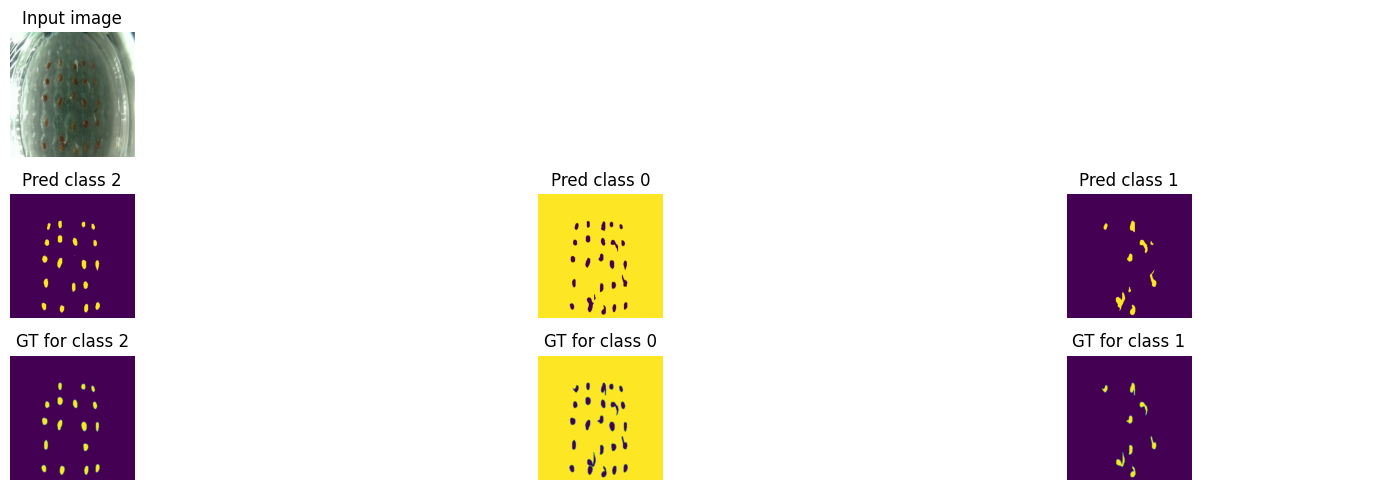

Train loss: 0.00191 | Time: 41m 39s | Val loss: 0.00154
Train_DICE_avg: 0.80246 | Train_Jaccard_avg: 0.73767 | Train_Sensitivity_avg: 0.94007 | Train_Specificity_avg: 0.92566 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98602 | Train_Sensitivity: 0.99670 | Train_Specificity: 0.79523 
Class 1 - Train_DICE: 0.59024 | Train_Jaccard: 0.51374 | Train_Sensitivity: 0.88721 | Train_Specificity: 0.99130 
Class 2 - Train_DICE: 0.82421 | Train_Jaccard: 0.71327 | Train_Sensitivity: 0.93629 | Train_Specificity: 0.99046 
Val_DICE_avg: 0.83320 | Val_Jaccard_avg: 0.76258 | Val_Sensitivity_avg: 0.95725 | Val_Specificity_avg: 0.86952 
Class 0 - Val_DICE: 0.99246 | Val_Jaccard: 0.98506 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62761 
Class 1 - Val_DICE: 0.74056 | Val_Jaccard: 0.66881 | Val_Sensitivity: 0.89906 | Val_Specificity: 0.99497 
Class 2 - Val_DICE: 0.76658 | Val_Jaccard: 0.63389 | Val_Sensitivity: 0.97335 | Val_Specificity: 0.98599 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00192 | Time: 42m 27s | Val loss: 0.00154
Train_DICE_avg: 0.80026 | Train_Jaccard_avg: 0.73556 | Train_Sensitivity_avg: 0.93796 | Train_Specificity_avg: 0.92470 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98610 | Train_Sensitivity: 0.99677 | Train_Specificity: 0.79230 
Class 1 - Train_DICE: 0.58412 | Train_Jaccard: 0.50793 | Train_Sensitivity: 0.87986 | Train_Specificity: 0.99130 
Class 2 - Train_DICE: 0.82367 | Train_Jaccard: 0.71266 | Train_Sensitivity: 0.93725 | Train_Specificity: 0.99051 
Val_DICE_avg: 0.83526 | Val_Jaccard_avg: 0.76512 | Val_Sensitivity_avg: 0.96012 | Val_Specificity_avg: 0.86773 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98464 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62206 
Class 1 - Val_DICE: 0.74328 | Val_Jaccard: 0.67181 | Val_Sensitivity: 0.90647 | Val_Specificity: 0.99484 
Class 2 - Val_DICE: 0.77024 | Val_Jaccard: 0.63892 | Val_Sensitivity: 0.97454 | Val_Specificity: 0.98628 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00187 | Time: 43m 16s | Val loss: 0.00152
Train_DICE_avg: 0.80239 | Train_Jaccard_avg: 0.73729 | Train_Sensitivity_avg: 0.94331 | Train_Specificity_avg: 0.92342 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98609 | Train_Sensitivity: 0.99691 | Train_Specificity: 0.78887 
Class 1 - Train_DICE: 0.59115 | Train_Jaccard: 0.51432 | Train_Sensitivity: 0.89530 | Train_Specificity: 0.99110 
Class 2 - Train_DICE: 0.82304 | Train_Jaccard: 0.71145 | Train_Sensitivity: 0.93771 | Train_Specificity: 0.99029 
Val_DICE_avg: 0.83092 | Val_Jaccard_avg: 0.76001 | Val_Sensitivity_avg: 0.95107 | Val_Specificity_avg: 0.86810 
Class 0 - Val_DICE: 0.99233 | Val_Jaccard: 0.98482 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62343 
Class 1 - Val_DICE: 0.73450 | Val_Jaccard: 0.66242 | Val_Sensitivity: 0.87749 | Val_Specificity: 0.99505 
Class 2 - Val_DICE: 0.76593 | Val_Jaccard: 0.63280 | Val_Sensitivity: 0.97636 | Val_Specificity: 0.98580 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.00188 | Time: 44m 4s | Val loss: 0.00153
Train_DICE_avg: 0.80560 | Train_Jaccard_avg: 0.74094 | Train_Sensitivity_avg: 0.93883 | Train_Specificity_avg: 0.92786 
Class 0 - Train_DICE: 0.99305 | Train_Jaccard: 0.98622 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.80124 
Class 1 - Train_DICE: 0.59694 | Train_Jaccard: 0.51949 | Train_Sensitivity: 0.88363 | Train_Specificity: 0.99164 
Class 2 - Train_DICE: 0.82682 | Train_Jaccard: 0.71711 | Train_Sensitivity: 0.93629 | Train_Specificity: 0.99071 
Val_DICE_avg: 0.83268 | Val_Jaccard_avg: 0.76282 | Val_Sensitivity_avg: 0.95373 | Val_Specificity_avg: 0.86875 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98472 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62503 
Class 1 - Val_DICE: 0.73579 | Val_Jaccard: 0.66544 | Val_Sensitivity: 0.89005 | Val_Specificity: 0.99502 
Class 2 - Val_DICE: 0.76996 | Val_Jaccard: 0.63831 | Val_Sensitivity: 0.97179 | Val_Specificity: 0.98621 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.00187 | Time: 44m 53s | Val loss: 0.00151
Train_DICE_avg: 0.80371 | Train_Jaccard_avg: 0.73894 | Train_Sensitivity_avg: 0.93911 | Train_Specificity_avg: 0.92532 
Class 0 - Train_DICE: 0.99298 | Train_Jaccard: 0.98608 | Train_Sensitivity: 0.99672 | Train_Specificity: 0.79399 
Class 1 - Train_DICE: 0.59424 | Train_Jaccard: 0.51758 | Train_Sensitivity: 0.88243 | Train_Specificity: 0.99147 
Class 2 - Train_DICE: 0.82392 | Train_Jaccard: 0.71316 | Train_Sensitivity: 0.93819 | Train_Specificity: 0.99050 
Val_DICE_avg: 0.83618 | Val_Jaccard_avg: 0.76537 | Val_Sensitivity_avg: 0.95245 | Val_Specificity_avg: 0.86853 
Class 0 - Val_DICE: 0.99231 | Val_Jaccard: 0.98479 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62435 
Class 1 - Val_DICE: 0.74737 | Val_Jaccard: 0.67441 | Val_Sensitivity: 0.88291 | Val_Specificity: 0.99508 
Class 2 - Val_DICE: 0.76887 | Val_Jaccard: 0.63690 | Val_Sensitivity: 0.97508 | Val_Specificity: 0.98616 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


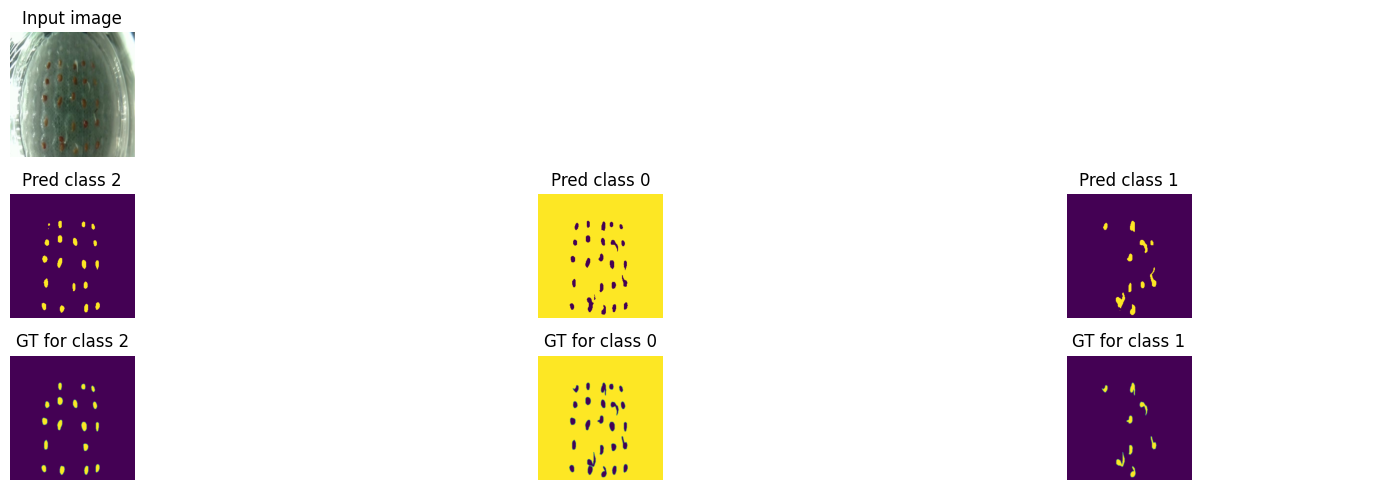

Train loss: 0.00187 | Time: 45m 43s | Val loss: 0.00154
Train_DICE_avg: 0.80137 | Train_Jaccard_avg: 0.73623 | Train_Sensitivity_avg: 0.94069 | Train_Specificity_avg: 0.92441 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98602 | Train_Sensitivity: 0.99677 | Train_Specificity: 0.79156 
Class 1 - Train_DICE: 0.58732 | Train_Jaccard: 0.50977 | Train_Sensitivity: 0.88705 | Train_Specificity: 0.99121 
Class 2 - Train_DICE: 0.82383 | Train_Jaccard: 0.71289 | Train_Sensitivity: 0.93825 | Train_Specificity: 0.99046 
Val_DICE_avg: 0.83374 | Val_Jaccard_avg: 0.76291 | Val_Sensitivity_avg: 0.95322 | Val_Specificity_avg: 0.86886 
Class 0 - Val_DICE: 0.99233 | Val_Jaccard: 0.98481 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62553 
Class 1 - Val_DICE: 0.74252 | Val_Jaccard: 0.67035 | Val_Sensitivity: 0.88373 | Val_Specificity: 0.99514 
Class 2 - Val_DICE: 0.76637 | Val_Jaccard: 0.63355 | Val_Sensitivity: 0.97659 | Val_Specificity: 0.98590 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00186 | Time: 46m 32s | Val loss: 0.00152
Train_DICE_avg: 0.79780 | Train_Jaccard_avg: 0.73248 | Train_Sensitivity_avg: 0.94096 | Train_Specificity_avg: 0.92170 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98603 | Train_Sensitivity: 0.99699 | Train_Specificity: 0.78394 
Class 1 - Train_DICE: 0.57874 | Train_Jaccard: 0.50145 | Train_Sensitivity: 0.88623 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.82170 | Train_Jaccard: 0.70998 | Train_Sensitivity: 0.93966 | Train_Specificity: 0.99022 
Val_DICE_avg: 0.83389 | Val_Jaccard_avg: 0.76310 | Val_Sensitivity_avg: 0.95764 | Val_Specificity_avg: 0.86924 
Class 0 - Val_DICE: 0.99236 | Val_Jaccard: 0.98488 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62672 
Class 1 - Val_DICE: 0.74470 | Val_Jaccard: 0.67201 | Val_Sensitivity: 0.89801 | Val_Specificity: 0.99496 
Class 2 - Val_DICE: 0.76461 | Val_Jaccard: 0.63241 | Val_Sensitivity: 0.97554 | Val_Specificity: 0.98606 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.00183 | Time: 47m 21s | Val loss: 0.00148
Train_DICE_avg: 0.80483 | Train_Jaccard_avg: 0.73977 | Train_Sensitivity_avg: 0.94381 | Train_Specificity_avg: 0.92340 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98603 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.78880 
Class 1 - Train_DICE: 0.59660 | Train_Jaccard: 0.51913 | Train_Sensitivity: 0.89399 | Train_Specificity: 0.99115 
Class 2 - Train_DICE: 0.82495 | Train_Jaccard: 0.71414 | Train_Sensitivity: 0.94052 | Train_Specificity: 0.99026 
Val_DICE_avg: 0.83422 | Val_Jaccard_avg: 0.76348 | Val_Sensitivity_avg: 0.95786 | Val_Specificity_avg: 0.87007 
Class 0 - Val_DICE: 0.99247 | Val_Jaccard: 0.98510 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62929 
Class 1 - Val_DICE: 0.74529 | Val_Jaccard: 0.67324 | Val_Sensitivity: 0.89827 | Val_Specificity: 0.99498 
Class 2 - Val_DICE: 0.76491 | Val_Jaccard: 0.63209 | Val_Sensitivity: 0.97595 | Val_Specificity: 0.98594 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00184 | Time: 48m 10s | Val loss: 0.00150
Train_DICE_avg: 0.80169 | Train_Jaccard_avg: 0.73694 | Train_Sensitivity_avg: 0.94099 | Train_Specificity_avg: 0.92426 
Class 0 - Train_DICE: 0.99302 | Train_Jaccard: 0.98617 | Train_Sensitivity: 0.99686 | Train_Specificity: 0.79129 
Class 1 - Train_DICE: 0.58707 | Train_Jaccard: 0.51045 | Train_Sensitivity: 0.88729 | Train_Specificity: 0.99113 
Class 2 - Train_DICE: 0.82498 | Train_Jaccard: 0.71419 | Train_Sensitivity: 0.93881 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.82772 | Val_Jaccard_avg: 0.75698 | Val_Sensitivity_avg: 0.94716 | Val_Specificity_avg: 0.86968 
Class 0 - Val_DICE: 0.99245 | Val_Jaccard: 0.98505 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62809 
Class 1 - Val_DICE: 0.72484 | Val_Jaccard: 0.65295 | Val_Sensitivity: 0.86748 | Val_Specificity: 0.99505 
Class 2 - Val_DICE: 0.76586 | Val_Jaccard: 0.63294 | Val_Sensitivity: 0.97467 | Val_Specificity: 0.98592 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00182 | Time: 48m 59s | Val loss: 0.00149
Train_DICE_avg: 0.80212 | Train_Jaccard_avg: 0.73682 | Train_Sensitivity_avg: 0.94325 | Train_Specificity_avg: 0.92416 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98627 | Train_Sensitivity: 0.99697 | Train_Specificity: 0.79111 
Class 1 - Train_DICE: 0.58934 | Train_Jaccard: 0.51138 | Train_Sensitivity: 0.89324 | Train_Specificity: 0.99098 
Class 2 - Train_DICE: 0.82394 | Train_Jaccard: 0.71280 | Train_Sensitivity: 0.93953 | Train_Specificity: 0.99040 
Val_DICE_avg: 0.83219 | Val_Jaccard_avg: 0.76137 | Val_Sensitivity_avg: 0.95408 | Val_Specificity_avg: 0.87022 
Class 0 - Val_DICE: 0.99245 | Val_Jaccard: 0.98505 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62967 
Class 1 - Val_DICE: 0.73939 | Val_Jaccard: 0.66695 | Val_Sensitivity: 0.89063 | Val_Specificity: 0.99499 
Class 2 - Val_DICE: 0.76474 | Val_Jaccard: 0.63210 | Val_Sensitivity: 0.97227 | Val_Specificity: 0.98602 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


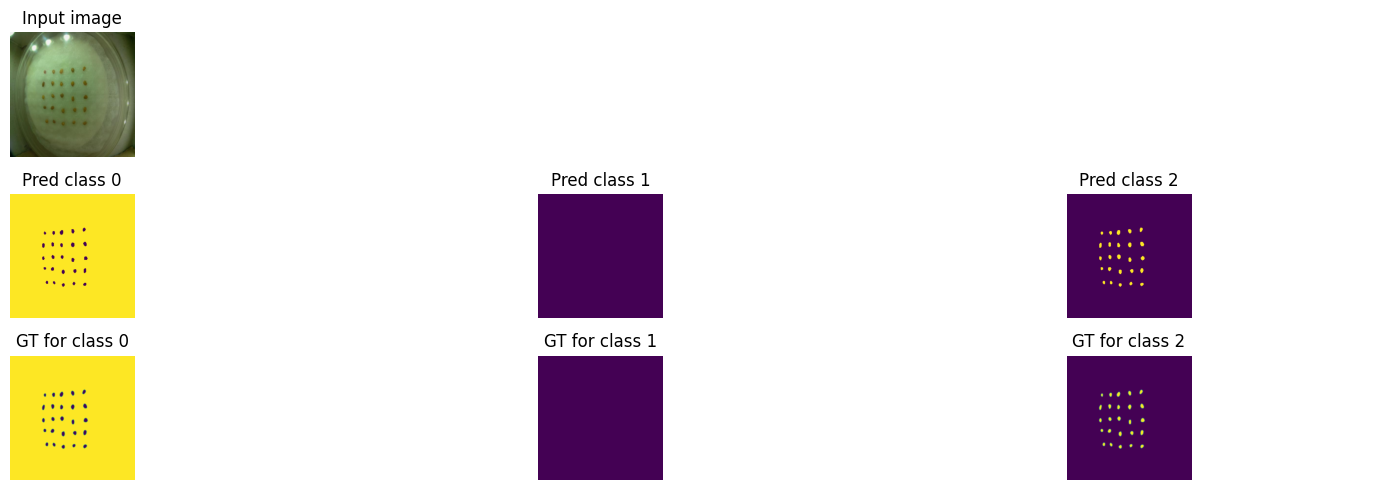

Train loss: 0.00182 | Time: 49m 48s | Val loss: 0.00150
Train_DICE_avg: 0.80745 | Train_Jaccard_avg: 0.74292 | Train_Sensitivity_avg: 0.94149 | Train_Specificity_avg: 0.92578 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98626 | Train_Sensitivity: 0.99689 | Train_Specificity: 0.79542 
Class 1 - Train_DICE: 0.60082 | Train_Jaccard: 0.52349 | Train_Sensitivity: 0.88720 | Train_Specificity: 0.99135 
Class 2 - Train_DICE: 0.82846 | Train_Jaccard: 0.71901 | Train_Sensitivity: 0.94037 | Train_Specificity: 0.99058 
Val_DICE_avg: 0.83126 | Val_Jaccard_avg: 0.76058 | Val_Sensitivity_avg: 0.95420 | Val_Specificity_avg: 0.86986 
Class 0 - Val_DICE: 0.99245 | Val_Jaccard: 0.98504 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62855 
Class 1 - Val_DICE: 0.73267 | Val_Jaccard: 0.66030 | Val_Sensitivity: 0.89052 | Val_Specificity: 0.99493 
Class 2 - Val_DICE: 0.76865 | Val_Jaccard: 0.63641 | Val_Sensitivity: 0.97274 | Val_Specificity: 0.98610 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]



Global Performance Metrics:
Loss mean: 0.00160, std: 0.00019
Dice Coefficient mean: 0.85268, std: 0.10829
Jaccard Index mean: 0.79141, std: 0.11878
Sensitivity mean: 0.92401, std: 0.07535
Specificity mean: 0.93438, std: 0.04424

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99568, std: 0.00220
Jaccard mean: 0.99140, std: 0.00434
Sensitivity mean: 0.99761, std: 0.00182
Specificity mean: 0.81243, std: 0.13265

Class 1:
Dice mean: 0.70149, std: 0.30956
Jaccard mean: 0.61774, std: 0.31912
Sensitivity mean: 0.86318, std: 0.20779
Specificity mean: 0.99593, std: 0.00627

Class 2:
Dice mean: 0.86087, std: 0.08779
Jaccard mean: 0.76508, std: 0.12037
Sensitivity mean: 0.91125, std: 0.08299
Specificity mean: 0.99479, std: 0.00351


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-ResUNet-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.74 GB
GPU Memory - Reserved: 1.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


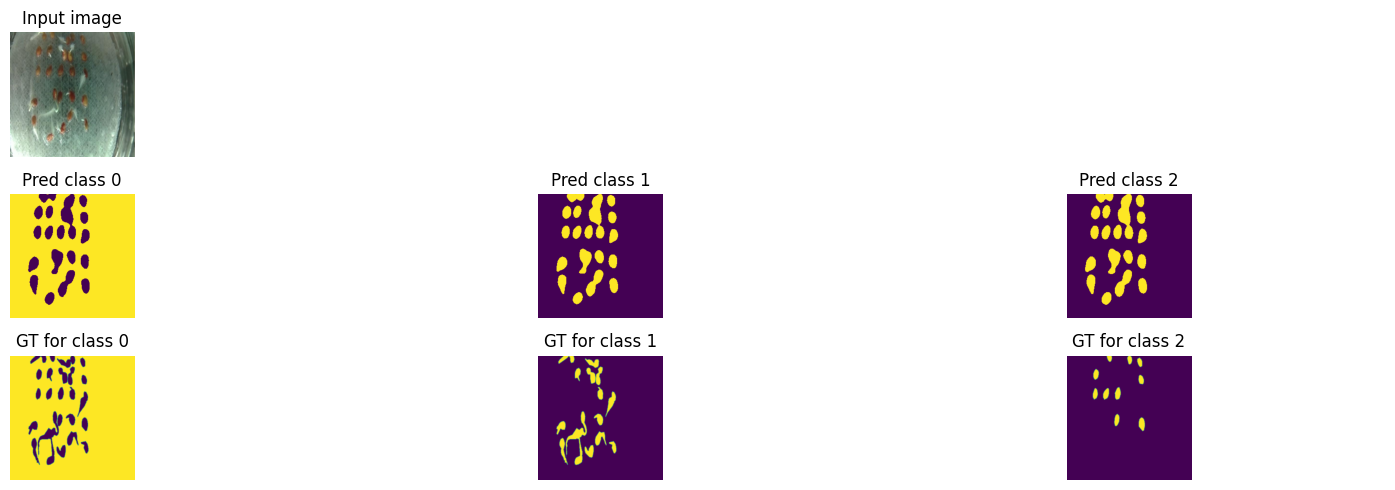

Train loss: 0.69798 | Time: 0m 48s | Val loss: 0.67351
Train_DICE_avg: 0.38126 | Train_Jaccard_avg: 0.32103 | Train_Sensitivity_avg: 0.38286 | Train_Specificity_avg: 0.77734 
Class 0 - Train_DICE: 0.88099 | Train_Jaccard: 0.80461 | Train_Sensitivity: 0.98947 | Train_Specificity: 0.33500 
Class 1 - Train_DICE: 0.04832 | Train_Jaccard: 0.02646 | Train_Sensitivity: 0.02693 | Train_Specificity: 0.99872 
Class 2 - Train_DICE: 0.21445 | Train_Jaccard: 0.13201 | Train_Sensitivity: 0.13218 | Train_Specificity: 0.99831 
Val_DICE_avg: 0.44597 | Val_Jaccard_avg: 0.40398 | Val_Sensitivity_avg: 0.41662 | Val_Specificity_avg: 0.83220 
Class 0 - Val_DICE: 0.98034 | Val_Jaccard: 0.96158 | Val_Sensitivity: 0.99780 | Val_Specificity: 0.49818 
Class 1 - Val_DICE: 0.07084 | Val_Jaccard: 0.04339 | Val_Sensitivity: 0.04501 | Val_Specificity: 0.99901 
Class 2 - Val_DICE: 0.28674 | Val_Jaccard: 0.20697 | Val_Sensitivity: 0.20706 | Val_Specificity: 0.99940 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.67260 | Time: 1m 36s | Val loss: 0.66494
Train_DICE_avg: 0.43996 | Train_Jaccard_avg: 0.39477 | Train_Sensitivity_avg: 0.41371 | Train_Specificity_avg: 0.84604 
Class 0 - Train_DICE: 0.96936 | Train_Jaccard: 0.94088 | Train_Sensitivity: 0.99649 | Train_Specificity: 0.53902 
Class 1 - Train_DICE: 0.06895 | Train_Jaccard: 0.04073 | Train_Sensitivity: 0.04150 | Train_Specificity: 0.99943 
Class 2 - Train_DICE: 0.28156 | Train_Jaccard: 0.20272 | Train_Sensitivity: 0.20315 | Train_Specificity: 0.99967 
Val_DICE_avg: 0.44895 | Val_Jaccard_avg: 0.41342 | Val_Sensitivity_avg: 0.42398 | Val_Specificity_avg: 0.84639 
Class 0 - Val_DICE: 0.98358 | Val_Jaccard: 0.96781 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.54083 
Class 1 - Val_DICE: 0.07237 | Val_Jaccard: 0.04642 | Val_Sensitivity: 0.04720 | Val_Specificity: 0.99952 
Class 2 - Val_DICE: 0.29090 | Val_Jaccard: 0.22604 | Val_Sensitivity: 0.22615 | Val_Specificity: 0.99882 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.66288 | Time: 2m 24s | Val loss: 0.65233
Train_DICE_avg: 0.45270 | Train_Jaccard_avg: 0.41005 | Train_Sensitivity_avg: 0.42537 | Train_Specificity_avg: 0.86438 
Class 0 - Train_DICE: 0.97552 | Train_Jaccard: 0.95242 | Train_Sensitivity: 0.99685 | Train_Specificity: 0.59410 
Class 1 - Train_DICE: 0.07284 | Train_Jaccard: 0.04381 | Train_Sensitivity: 0.04456 | Train_Specificity: 0.99954 
Class 2 - Train_DICE: 0.30975 | Train_Jaccard: 0.23391 | Train_Sensitivity: 0.23470 | Train_Specificity: 0.99951 
Val_DICE_avg: 0.45663 | Val_Jaccard_avg: 0.42132 | Val_Sensitivity_avg: 0.43155 | Val_Specificity_avg: 0.84534 
Class 0 - Val_DICE: 0.98428 | Val_Jaccard: 0.96913 | Val_Sensitivity: 0.99884 | Val_Specificity: 0.53771 
Class 1 - Val_DICE: 0.07619 | Val_Jaccard: 0.04939 | Val_Sensitivity: 0.05024 | Val_Specificity: 0.99959 
Class 2 - Val_DICE: 0.30944 | Val_Jaccard: 0.24543 | Val_Sensitivity: 0.24556 | Val_Specificity: 0.99871 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.65394 | Time: 3m 11s | Val loss: 0.64297
Train_DICE_avg: 0.47156 | Train_Jaccard_avg: 0.42668 | Train_Sensitivity_avg: 0.44057 | Train_Specificity_avg: 0.87171 
Class 0 - Train_DICE: 0.97830 | Train_Jaccard: 0.95770 | Train_Sensitivity: 0.99709 | Train_Specificity: 0.61614 
Class 1 - Train_DICE: 0.08443 | Train_Jaccard: 0.05100 | Train_Sensitivity: 0.05188 | Train_Specificity: 0.99953 
Class 2 - Train_DICE: 0.35194 | Train_Jaccard: 0.27135 | Train_Sensitivity: 0.27274 | Train_Specificity: 0.99946 
Val_DICE_avg: 0.48137 | Val_Jaccard_avg: 0.44267 | Val_Sensitivity_avg: 0.45221 | Val_Specificity_avg: 0.85330 
Class 0 - Val_DICE: 0.98581 | Val_Jaccard: 0.97210 | Val_Sensitivity: 0.99892 | Val_Specificity: 0.56187 
Class 1 - Val_DICE: 0.09292 | Val_Jaccard: 0.05999 | Val_Sensitivity: 0.06109 | Val_Specificity: 0.99953 
Class 2 - Val_DICE: 0.36538 | Val_Jaccard: 0.29591 | Val_Sensitivity: 0.29662 | Val_Specificity: 0.99850 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.64453 | Time: 3m 59s | Val loss: 0.63470
Train_DICE_avg: 0.48837 | Train_Jaccard_avg: 0.44081 | Train_Sensitivity_avg: 0.45393 | Train_Specificity_avg: 0.87878 
Class 0 - Train_DICE: 0.98031 | Train_Jaccard: 0.96153 | Train_Sensitivity: 0.99717 | Train_Specificity: 0.63721 
Class 1 - Train_DICE: 0.09762 | Train_Jaccard: 0.05915 | Train_Sensitivity: 0.06017 | Train_Specificity: 0.99953 
Class 2 - Train_DICE: 0.38719 | Train_Jaccard: 0.30174 | Train_Sensitivity: 0.30446 | Train_Specificity: 0.99958 
Val_DICE_avg: 0.49616 | Val_Jaccard_avg: 0.45698 | Val_Sensitivity_avg: 0.46619 | Val_Specificity_avg: 0.86548 
Class 0 - Val_DICE: 0.98770 | Val_Jaccard: 0.97577 | Val_Sensitivity: 0.99889 | Val_Specificity: 0.59807 
Class 1 - Val_DICE: 0.10465 | Val_Jaccard: 0.06839 | Val_Sensitivity: 0.06990 | Val_Specificity: 0.99949 
Class 2 - Val_DICE: 0.39612 | Val_Jaccard: 0.32678 | Val_Sensitivity: 0.32980 | Val_Specificity: 0.99887 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


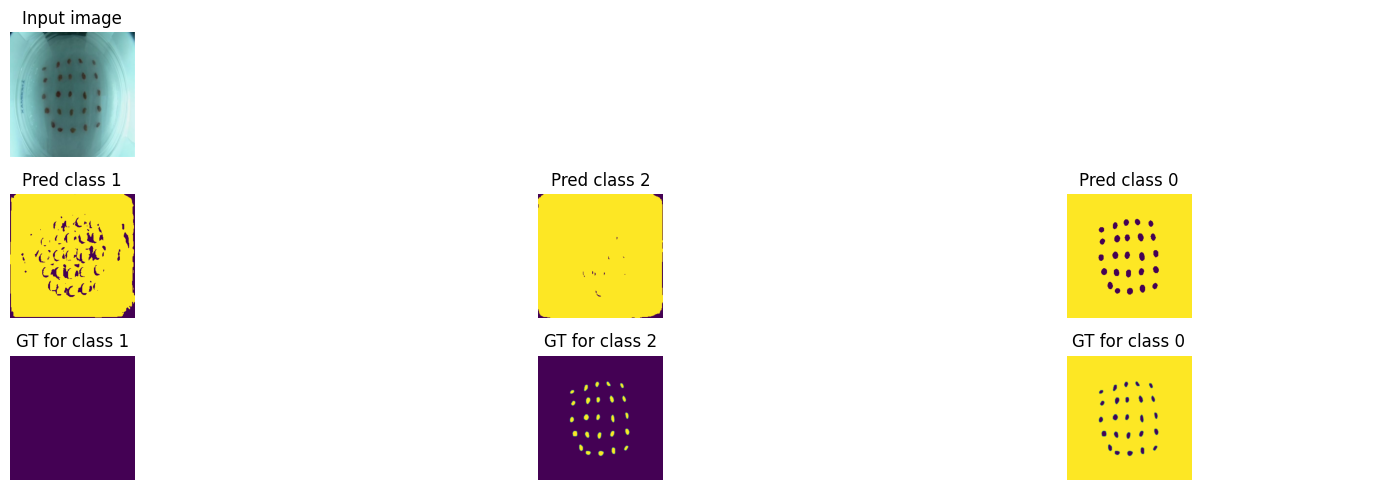

Train loss: 0.63438 | Time: 4m 48s | Val loss: 0.62696
Train_DICE_avg: 0.49905 | Train_Jaccard_avg: 0.45098 | Train_Sensitivity_avg: 0.46372 | Train_Specificity_avg: 0.88496 
Class 0 - Train_DICE: 0.98171 | Train_Jaccard: 0.96421 | Train_Sensitivity: 0.99695 | Train_Specificity: 0.65600 
Class 1 - Train_DICE: 0.10705 | Train_Jaccard: 0.06515 | Train_Sensitivity: 0.06639 | Train_Specificity: 0.99949 
Class 2 - Train_DICE: 0.40838 | Train_Jaccard: 0.32359 | Train_Sensitivity: 0.32783 | Train_Specificity: 0.99939 
Val_DICE_avg: 0.49584 | Val_Jaccard_avg: 0.45747 | Val_Sensitivity_avg: 0.46620 | Val_Specificity_avg: 0.87031 
Class 0 - Val_DICE: 0.98855 | Val_Jaccard: 0.97742 | Val_Sensitivity: 0.99886 | Val_Specificity: 0.61319 
Class 1 - Val_DICE: 0.10722 | Val_Jaccard: 0.07035 | Val_Sensitivity: 0.07229 | Val_Specificity: 0.99941 
Class 2 - Val_DICE: 0.39174 | Val_Jaccard: 0.32463 | Val_Sensitivity: 0.32745 | Val_Specificity: 0.99834 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.62437 | Time: 5m 36s | Val loss: 0.61366
Train_DICE_avg: 0.50903 | Train_Jaccard_avg: 0.45986 | Train_Sensitivity_avg: 0.47246 | Train_Specificity_avg: 0.88977 
Class 0 - Train_DICE: 0.98309 | Train_Jaccard: 0.96686 | Train_Sensitivity: 0.99686 | Train_Specificity: 0.67079 
Class 1 - Train_DICE: 0.11790 | Train_Jaccard: 0.07190 | Train_Sensitivity: 0.07347 | Train_Specificity: 0.99941 
Class 2 - Train_DICE: 0.42610 | Train_Jaccard: 0.34083 | Train_Sensitivity: 0.34703 | Train_Specificity: 0.99911 
Val_DICE_avg: 0.51180 | Val_Jaccard_avg: 0.47040 | Val_Sensitivity_avg: 0.47987 | Val_Specificity_avg: 0.87305 
Class 0 - Val_DICE: 0.98898 | Val_Jaccard: 0.97827 | Val_Sensitivity: 0.99867 | Val_Specificity: 0.62358 
Class 1 - Val_DICE: 0.12019 | Val_Jaccard: 0.07836 | Val_Sensitivity: 0.08124 | Val_Specificity: 0.99924 
Class 2 - Val_DICE: 0.42623 | Val_Jaccard: 0.35459 | Val_Sensitivity: 0.35969 | Val_Specificity: 0.99633 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.61416 | Time: 6m 23s | Val loss: 0.60433
Train_DICE_avg: 0.52475 | Train_Jaccard_avg: 0.47200 | Train_Sensitivity_avg: 0.48475 | Train_Specificity_avg: 0.89518 
Class 0 - Train_DICE: 0.98425 | Train_Jaccard: 0.96910 | Train_Sensitivity: 0.99659 | Train_Specificity: 0.68727 
Class 1 - Train_DICE: 0.13594 | Train_Jaccard: 0.08299 | Train_Sensitivity: 0.08495 | Train_Specificity: 0.99935 
Class 2 - Train_DICE: 0.45404 | Train_Jaccard: 0.36391 | Train_Sensitivity: 0.37273 | Train_Specificity: 0.99894 
Val_DICE_avg: 0.52824 | Val_Jaccard_avg: 0.48054 | Val_Sensitivity_avg: 0.48979 | Val_Specificity_avg: 0.87496 
Class 0 - Val_DICE: 0.98911 | Val_Jaccard: 0.97852 | Val_Sensitivity: 0.99890 | Val_Specificity: 0.62661 
Class 1 - Val_DICE: 0.14111 | Val_Jaccard: 0.09093 | Val_Sensitivity: 0.09408 | Val_Specificity: 0.99929 
Class 2 - Val_DICE: 0.45449 | Val_Jaccard: 0.37216 | Val_Sensitivity: 0.37639 | Val_Specificity: 0.99900 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.60402 | Time: 7m 11s | Val loss: 0.59534
Train_DICE_avg: 0.54299 | Train_Jaccard_avg: 0.48600 | Train_Sensitivity_avg: 0.49918 | Train_Specificity_avg: 0.90025 
Class 0 - Train_DICE: 0.98513 | Train_Jaccard: 0.97079 | Train_Sensitivity: 0.99631 | Train_Specificity: 0.70270 
Class 1 - Train_DICE: 0.14975 | Train_Jaccard: 0.09177 | Train_Sensitivity: 0.09424 | Train_Specificity: 0.99927 
Class 2 - Train_DICE: 0.49410 | Train_Jaccard: 0.39544 | Train_Sensitivity: 0.40700 | Train_Specificity: 0.99878 
Val_DICE_avg: 0.54921 | Val_Jaccard_avg: 0.49693 | Val_Sensitivity_avg: 0.50666 | Val_Specificity_avg: 0.87068 
Class 0 - Val_DICE: 0.98894 | Val_Jaccard: 0.97817 | Val_Sensitivity: 0.99899 | Val_Specificity: 0.61501 
Class 1 - Val_DICE: 0.14782 | Val_Jaccard: 0.09555 | Val_Sensitivity: 0.09852 | Val_Specificity: 0.99933 
Class 2 - Val_DICE: 0.51088 | Val_Jaccard: 0.41708 | Val_Sensitivity: 0.42248 | Val_Specificity: 0.99769 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.59475 | Time: 7m 59s | Val loss: 0.58731
Train_DICE_avg: 0.55500 | Train_Jaccard_avg: 0.49599 | Train_Sensitivity_avg: 0.50960 | Train_Specificity_avg: 0.90418 
Class 0 - Train_DICE: 0.98581 | Train_Jaccard: 0.97210 | Train_Sensitivity: 0.99592 | Train_Specificity: 0.71484 
Class 1 - Train_DICE: 0.15474 | Train_Jaccard: 0.09526 | Train_Sensitivity: 0.09810 | Train_Specificity: 0.99923 
Class 2 - Train_DICE: 0.52444 | Train_Jaccard: 0.42061 | Train_Sensitivity: 0.43477 | Train_Specificity: 0.99847 
Val_DICE_avg: 0.55618 | Val_Jaccard_avg: 0.50379 | Val_Sensitivity_avg: 0.51475 | Val_Specificity_avg: 0.87614 
Class 0 - Val_DICE: 0.98966 | Val_Jaccard: 0.97958 | Val_Sensitivity: 0.99869 | Val_Specificity: 0.63082 
Class 1 - Val_DICE: 0.15044 | Val_Jaccard: 0.09726 | Val_Sensitivity: 0.10156 | Val_Specificity: 0.99912 
Class 2 - Val_DICE: 0.52845 | Val_Jaccard: 0.43452 | Val_Sensitivity: 0.44401 | Val_Specificity: 0.99848 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


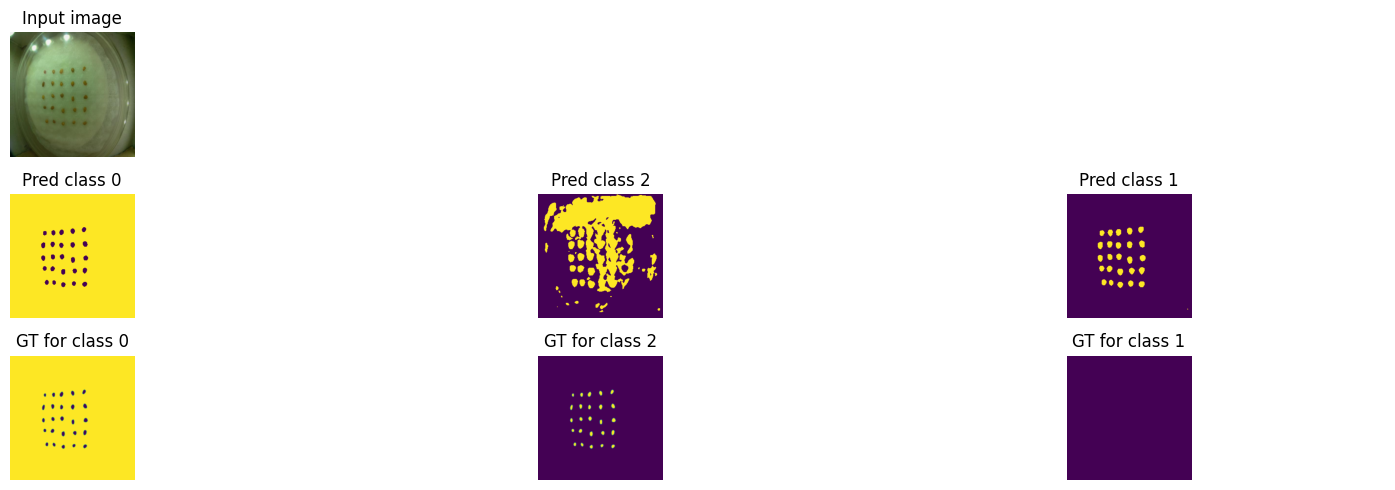

Train loss: 0.58538 | Time: 8m 48s | Val loss: 0.57498
Train_DICE_avg: 0.56637 | Train_Jaccard_avg: 0.50667 | Train_Sensitivity_avg: 0.52012 | Train_Specificity_avg: 0.90840 
Class 0 - Train_DICE: 0.98716 | Train_Jaccard: 0.97472 | Train_Sensitivity: 0.99580 | Train_Specificity: 0.72763 
Class 1 - Train_DICE: 0.15778 | Train_Jaccard: 0.09752 | Train_Sensitivity: 0.10065 | Train_Specificity: 0.99919 
Class 2 - Train_DICE: 0.55415 | Train_Jaccard: 0.44776 | Train_Sensitivity: 0.46392 | Train_Specificity: 0.99839 
Val_DICE_avg: 0.56805 | Val_Jaccard_avg: 0.51445 | Val_Sensitivity_avg: 0.52413 | Val_Specificity_avg: 0.88406 
Class 0 - Val_DICE: 0.99064 | Val_Jaccard: 0.98149 | Val_Sensitivity: 0.99875 | Val_Specificity: 0.65396 
Class 1 - Val_DICE: 0.15926 | Val_Jaccard: 0.10356 | Val_Sensitivity: 0.10744 | Val_Specificity: 0.99919 
Class 2 - Val_DICE: 0.55424 | Val_Jaccard: 0.45829 | Val_Sensitivity: 0.46620 | Val_Specificity: 0.99901 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.57637 | Time: 9m 36s | Val loss: 0.56637
Train_DICE_avg: 0.57385 | Train_Jaccard_avg: 0.51326 | Train_Sensitivity_avg: 0.52793 | Train_Specificity_avg: 0.91174 
Class 0 - Train_DICE: 0.98732 | Train_Jaccard: 0.97503 | Train_Sensitivity: 0.99510 | Train_Specificity: 0.73800 
Class 1 - Train_DICE: 0.16821 | Train_Jaccard: 0.10628 | Train_Sensitivity: 0.11123 | Train_Specificity: 0.99909 
Class 2 - Train_DICE: 0.56603 | Train_Jaccard: 0.45848 | Train_Sensitivity: 0.47747 | Train_Specificity: 0.99813 
Val_DICE_avg: 0.59920 | Val_Jaccard_avg: 0.54101 | Val_Sensitivity_avg: 0.55958 | Val_Specificity_avg: 0.88813 
Class 0 - Val_DICE: 0.99129 | Val_Jaccard: 0.98277 | Val_Sensitivity: 0.99847 | Val_Specificity: 0.66759 
Class 1 - Val_DICE: 0.19619 | Val_Jaccard: 0.13712 | Val_Sensitivity: 0.16287 | Val_Specificity: 0.99823 
Class 2 - Val_DICE: 0.61013 | Val_Jaccard: 0.50313 | Val_Sensitivity: 0.51740 | Val_Specificity: 0.99858 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.56658 | Time: 10m 25s | Val loss: 0.56186
Train_DICE_avg: 0.58724 | Train_Jaccard_avg: 0.52477 | Train_Sensitivity_avg: 0.54245 | Train_Specificity_avg: 0.91536 
Class 0 - Train_DICE: 0.98780 | Train_Jaccard: 0.97596 | Train_Sensitivity: 0.99456 | Train_Specificity: 0.74925 
Class 1 - Train_DICE: 0.19428 | Train_Jaccard: 0.12931 | Train_Sensitivity: 0.14224 | Train_Specificity: 0.99878 
Class 2 - Train_DICE: 0.57965 | Train_Jaccard: 0.46903 | Train_Sensitivity: 0.49054 | Train_Specificity: 0.99805 
Val_DICE_avg: 0.59928 | Val_Jaccard_avg: 0.54089 | Val_Sensitivity_avg: 0.55857 | Val_Specificity_avg: 0.89576 
Class 0 - Val_DICE: 0.99204 | Val_Jaccard: 0.98424 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.69066 
Class 1 - Val_DICE: 0.19813 | Val_Jaccard: 0.13906 | Val_Sensitivity: 0.16032 | Val_Specificity: 0.99842 
Class 2 - Val_DICE: 0.60766 | Val_Jaccard: 0.49937 | Val_Sensitivity: 0.51720 | Val_Specificity: 0.99819 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.55669 | Time: 11m 13s | Val loss: 0.55299
Train_DICE_avg: 0.59697 | Train_Jaccard_avg: 0.53390 | Train_Sensitivity_avg: 0.55335 | Train_Specificity_avg: 0.91910 
Class 0 - Train_DICE: 0.98818 | Train_Jaccard: 0.97671 | Train_Sensitivity: 0.99405 | Train_Specificity: 0.76075 
Class 1 - Train_DICE: 0.20699 | Train_Jaccard: 0.14190 | Train_Sensitivity: 0.15869 | Train_Specificity: 0.99867 
Class 2 - Train_DICE: 0.59575 | Train_Jaccard: 0.48308 | Train_Sensitivity: 0.50732 | Train_Specificity: 0.99787 
Val_DICE_avg: 0.61152 | Val_Jaccard_avg: 0.55320 | Val_Sensitivity_avg: 0.57222 | Val_Specificity_avg: 0.90143 
Class 0 - Val_DICE: 0.99260 | Val_Jaccard: 0.98535 | Val_Sensitivity: 0.99804 | Val_Specificity: 0.70785 
Class 1 - Val_DICE: 0.21257 | Val_Jaccard: 0.15254 | Val_Sensitivity: 0.17686 | Val_Specificity: 0.99828 
Class 2 - Val_DICE: 0.62940 | Val_Jaccard: 0.52172 | Val_Sensitivity: 0.54177 | Val_Specificity: 0.99818 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.54652 | Time: 12m 2s | Val loss: 0.54215
Train_DICE_avg: 0.60690 | Train_Jaccard_avg: 0.54377 | Train_Sensitivity_avg: 0.56444 | Train_Specificity_avg: 0.92117 
Class 0 - Train_DICE: 0.98844 | Train_Jaccard: 0.97722 | Train_Sensitivity: 0.99362 | Train_Specificity: 0.76717 
Class 1 - Train_DICE: 0.21818 | Train_Jaccard: 0.15350 | Train_Sensitivity: 0.17221 | Train_Specificity: 0.99862 
Class 2 - Train_DICE: 0.61408 | Train_Jaccard: 0.50058 | Train_Sensitivity: 0.52751 | Train_Specificity: 0.99771 
Val_DICE_avg: 0.62746 | Val_Jaccard_avg: 0.56672 | Val_Sensitivity_avg: 0.59000 | Val_Specificity_avg: 0.91006 
Class 0 - Val_DICE: 0.99345 | Val_Jaccard: 0.98702 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.73445 
Class 1 - Val_DICE: 0.21545 | Val_Jaccard: 0.15389 | Val_Sensitivity: 0.18798 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.67347 | Val_Jaccard: 0.55923 | Val_Sensitivity: 0.58448 | Val_Specificity: 0.99784 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.53674 | Time: 12m 51s | Val loss: 0.52844
Train_DICE_avg: 0.61383 | Train_Jaccard_avg: 0.55017 | Train_Sensitivity_avg: 0.57288 | Train_Specificity_avg: 0.92304 
Class 0 - Train_DICE: 0.98865 | Train_Jaccard: 0.97762 | Train_Sensitivity: 0.99322 | Train_Specificity: 0.77309 
Class 1 - Train_DICE: 0.22686 | Train_Jaccard: 0.16125 | Train_Sensitivity: 0.18280 | Train_Specificity: 0.99857 
Class 2 - Train_DICE: 0.62599 | Train_Jaccard: 0.51163 | Train_Sensitivity: 0.54260 | Train_Specificity: 0.99747 
Val_DICE_avg: 0.63518 | Val_Jaccard_avg: 0.57465 | Val_Sensitivity_avg: 0.59988 | Val_Specificity_avg: 0.90444 
Class 0 - Val_DICE: 0.99297 | Val_Jaccard: 0.98608 | Val_Sensitivity: 0.99742 | Val_Specificity: 0.71775 
Class 1 - Val_DICE: 0.22067 | Val_Jaccard: 0.15984 | Val_Sensitivity: 0.19138 | Val_Specificity: 0.99803 
Class 2 - Val_DICE: 0.69190 | Val_Jaccard: 0.57802 | Val_Sensitivity: 0.61084 | Val_Specificity: 0.99754 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.52767 | Time: 13m 40s | Val loss: 0.51045
Train_DICE_avg: 0.62136 | Train_Jaccard_avg: 0.55685 | Train_Sensitivity_avg: 0.58158 | Train_Specificity_avg: 0.92416 
Class 0 - Train_DICE: 0.98893 | Train_Jaccard: 0.97816 | Train_Sensitivity: 0.99298 | Train_Specificity: 0.77675 
Class 1 - Train_DICE: 0.23341 | Train_Jaccard: 0.16588 | Train_Sensitivity: 0.19160 | Train_Specificity: 0.99842 
Class 2 - Train_DICE: 0.64175 | Train_Jaccard: 0.52650 | Train_Sensitivity: 0.56015 | Train_Specificity: 0.99731 
Val_DICE_avg: 0.65897 | Val_Jaccard_avg: 0.59850 | Val_Sensitivity_avg: 0.62097 | Val_Specificity_avg: 0.91971 
Class 0 - Val_DICE: 0.99427 | Val_Jaccard: 0.98863 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.76324 
Class 1 - Val_DICE: 0.24567 | Val_Jaccard: 0.18122 | Val_Sensitivity: 0.20848 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.73697 | Val_Jaccard: 0.62564 | Val_Sensitivity: 0.65681 | Val_Specificity: 0.99774 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.51621 | Time: 14m 28s | Val loss: 0.50602
Train_DICE_avg: 0.63369 | Train_Jaccard_avg: 0.56979 | Train_Sensitivity_avg: 0.59611 | Train_Specificity_avg: 0.92820 
Class 0 - Train_DICE: 0.98931 | Train_Jaccard: 0.97891 | Train_Sensitivity: 0.99264 | Train_Specificity: 0.78907 
Class 1 - Train_DICE: 0.25149 | Train_Jaccard: 0.18279 | Train_Sensitivity: 0.21127 | Train_Specificity: 0.99834 
Class 2 - Train_DICE: 0.66027 | Train_Jaccard: 0.54767 | Train_Sensitivity: 0.58441 | Train_Specificity: 0.99719 
Val_DICE_avg: 0.65118 | Val_Jaccard_avg: 0.59198 | Val_Sensitivity_avg: 0.61628 | Val_Specificity_avg: 0.91366 
Class 0 - Val_DICE: 0.99398 | Val_Jaccard: 0.98806 | Val_Sensitivity: 0.99752 | Val_Specificity: 0.74535 
Class 1 - Val_DICE: 0.24569 | Val_Jaccard: 0.18292 | Val_Sensitivity: 0.20588 | Val_Specificity: 0.99831 
Class 2 - Val_DICE: 0.71388 | Val_Jaccard: 0.60495 | Val_Sensitivity: 0.64544 | Val_Specificity: 0.99731 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.50337 | Time: 15m 16s | Val loss: 0.48663
Train_DICE_avg: 0.63895 | Train_Jaccard_avg: 0.57502 | Train_Sensitivity_avg: 0.60538 | Train_Specificity_avg: 0.92842 
Class 0 - Train_DICE: 0.98902 | Train_Jaccard: 0.97834 | Train_Sensitivity: 0.99215 | Train_Specificity: 0.79009 
Class 1 - Train_DICE: 0.26342 | Train_Jaccard: 0.19327 | Train_Sensitivity: 0.22825 | Train_Specificity: 0.99821 
Class 2 - Train_DICE: 0.66441 | Train_Jaccard: 0.55345 | Train_Sensitivity: 0.59574 | Train_Specificity: 0.99697 
Val_DICE_avg: 0.65762 | Val_Jaccard_avg: 0.59823 | Val_Sensitivity_avg: 0.63439 | Val_Specificity_avg: 0.91749 
Class 0 - Val_DICE: 0.99411 | Val_Jaccard: 0.98832 | Val_Sensitivity: 0.99715 | Val_Specificity: 0.75777 
Class 1 - Val_DICE: 0.26769 | Val_Jaccard: 0.20346 | Val_Sensitivity: 0.26237 | Val_Specificity: 0.99745 
Class 2 - Val_DICE: 0.71107 | Val_Jaccard: 0.60291 | Val_Sensitivity: 0.64367 | Val_Specificity: 0.99727 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.48844 | Time: 16m 4s | Val loss: 0.48396
Train_DICE_avg: 0.64497 | Train_Jaccard_avg: 0.58132 | Train_Sensitivity_avg: 0.61566 | Train_Specificity_avg: 0.93033 
Class 0 - Train_DICE: 0.98923 | Train_Jaccard: 0.97875 | Train_Sensitivity: 0.99229 | Train_Specificity: 0.79616 
Class 1 - Train_DICE: 0.27688 | Train_Jaccard: 0.20637 | Train_Sensitivity: 0.24658 | Train_Specificity: 0.99816 
Class 2 - Train_DICE: 0.66882 | Train_Jaccard: 0.55884 | Train_Sensitivity: 0.60812 | Train_Specificity: 0.99668 
Val_DICE_avg: 0.64773 | Val_Jaccard_avg: 0.58935 | Val_Sensitivity_avg: 0.62540 | Val_Specificity_avg: 0.89095 
Class 0 - Val_DICE: 0.99134 | Val_Jaccard: 0.98290 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.67774 
Class 1 - Val_DICE: 0.26070 | Val_Jaccard: 0.19817 | Val_Sensitivity: 0.26023 | Val_Specificity: 0.99731 
Class 2 - Val_DICE: 0.69116 | Val_Jaccard: 0.58697 | Val_Sensitivity: 0.61835 | Val_Specificity: 0.99779 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


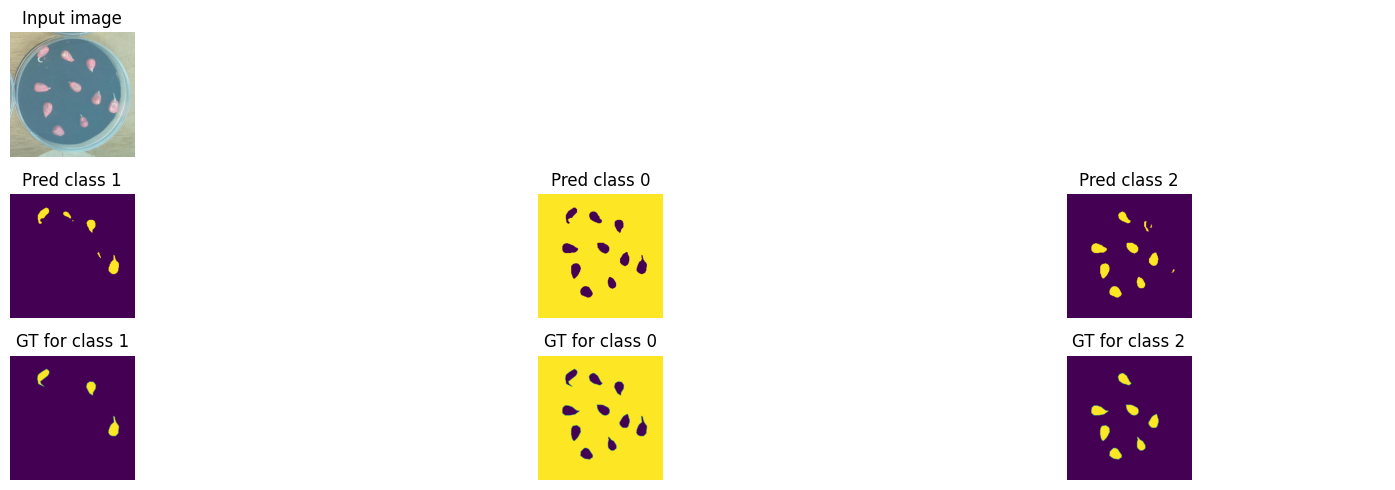

Train loss: 0.47734 | Time: 16m 54s | Val loss: 0.47326
Train_DICE_avg: 0.65044 | Train_Jaccard_avg: 0.58682 | Train_Sensitivity_avg: 0.62512 | Train_Specificity_avg: 0.93115 
Class 0 - Train_DICE: 0.98919 | Train_Jaccard: 0.97868 | Train_Sensitivity: 0.99188 | Train_Specificity: 0.79899 
Class 1 - Train_DICE: 0.28607 | Train_Jaccard: 0.21481 | Train_Sensitivity: 0.26197 | Train_Specificity: 0.99803 
Class 2 - Train_DICE: 0.67604 | Train_Jaccard: 0.56695 | Train_Sensitivity: 0.62151 | Train_Specificity: 0.99642 
Val_DICE_avg: 0.66552 | Val_Jaccard_avg: 0.60710 | Val_Sensitivity_avg: 0.63587 | Val_Specificity_avg: 0.90601 
Class 0 - Val_DICE: 0.99332 | Val_Jaccard: 0.98676 | Val_Sensitivity: 0.99770 | Val_Specificity: 0.72240 
Class 1 - Val_DICE: 0.27545 | Val_Jaccard: 0.21249 | Val_Sensitivity: 0.25145 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.72779 | Val_Jaccard: 0.62204 | Val_Sensitivity: 0.65846 | Val_Specificity: 0.99758 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.46600 | Time: 17m 43s | Val loss: 0.46162
Train_DICE_avg: 0.65738 | Train_Jaccard_avg: 0.59446 | Train_Sensitivity_avg: 0.63408 | Train_Specificity_avg: 0.93355 
Class 0 - Train_DICE: 0.98987 | Train_Jaccard: 0.97999 | Train_Sensitivity: 0.99232 | Train_Specificity: 0.80631 
Class 1 - Train_DICE: 0.29136 | Train_Jaccard: 0.21932 | Train_Sensitivity: 0.26847 | Train_Specificity: 0.99798 
Class 2 - Train_DICE: 0.69093 | Train_Jaccard: 0.58406 | Train_Sensitivity: 0.64145 | Train_Specificity: 0.99636 
Val_DICE_avg: 0.67796 | Val_Jaccard_avg: 0.61920 | Val_Sensitivity_avg: 0.65553 | Val_Specificity_avg: 0.91639 
Class 0 - Val_DICE: 0.99418 | Val_Jaccard: 0.98845 | Val_Sensitivity: 0.99744 | Val_Specificity: 0.75428 
Class 1 - Val_DICE: 0.28584 | Val_Jaccard: 0.22085 | Val_Sensitivity: 0.27816 | Val_Specificity: 0.99760 
Class 2 - Val_DICE: 0.75385 | Val_Jaccard: 0.64830 | Val_Sensitivity: 0.69098 | Val_Specificity: 0.99727 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.45467 | Time: 18m 32s | Val loss: 0.45111
Train_DICE_avg: 0.66296 | Train_Jaccard_avg: 0.60008 | Train_Sensitivity_avg: 0.64220 | Train_Specificity_avg: 0.93482 
Class 0 - Train_DICE: 0.98972 | Train_Jaccard: 0.97971 | Train_Sensitivity: 0.99175 | Train_Specificity: 0.81028 
Class 1 - Train_DICE: 0.30394 | Train_Jaccard: 0.23137 | Train_Sensitivity: 0.28419 | Train_Specificity: 0.99796 
Class 2 - Train_DICE: 0.69522 | Train_Jaccard: 0.58917 | Train_Sensitivity: 0.65067 | Train_Specificity: 0.99621 
Val_DICE_avg: 0.68214 | Val_Jaccard_avg: 0.62343 | Val_Sensitivity_avg: 0.66153 | Val_Specificity_avg: 0.91688 
Class 0 - Val_DICE: 0.99416 | Val_Jaccard: 0.98842 | Val_Sensitivity: 0.99726 | Val_Specificity: 0.75581 
Class 1 - Val_DICE: 0.29385 | Val_Jaccard: 0.22815 | Val_Sensitivity: 0.28492 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.75840 | Val_Jaccard: 0.65373 | Val_Sensitivity: 0.70242 | Val_Specificity: 0.99717 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.44744 | Time: 19m 21s | Val loss: 0.44684
Train_DICE_avg: 0.66564 | Train_Jaccard_avg: 0.60219 | Train_Sensitivity_avg: 0.64721 | Train_Specificity_avg: 0.93463 
Class 0 - Train_DICE: 0.98977 | Train_Jaccard: 0.97982 | Train_Sensitivity: 0.99179 | Train_Specificity: 0.81000 
Class 1 - Train_DICE: 0.30658 | Train_Jaccard: 0.23236 | Train_Sensitivity: 0.29004 | Train_Specificity: 0.99786 
Class 2 - Train_DICE: 0.70056 | Train_Jaccard: 0.59439 | Train_Sensitivity: 0.65980 | Train_Specificity: 0.99603 
Val_DICE_avg: 0.68242 | Val_Jaccard_avg: 0.62391 | Val_Sensitivity_avg: 0.66398 | Val_Specificity_avg: 0.91025 
Class 0 - Val_DICE: 0.99359 | Val_Jaccard: 0.98731 | Val_Sensitivity: 0.99748 | Val_Specificity: 0.73602 
Class 1 - Val_DICE: 0.29979 | Val_Jaccard: 0.23327 | Val_Sensitivity: 0.29201 | Val_Specificity: 0.99769 
Class 2 - Val_DICE: 0.75389 | Val_Jaccard: 0.65115 | Val_Sensitivity: 0.70246 | Val_Specificity: 0.99703 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.43649 | Time: 20m 9s | Val loss: 0.44045
Train_DICE_avg: 0.67345 | Train_Jaccard_avg: 0.61065 | Train_Sensitivity_avg: 0.65702 | Train_Specificity_avg: 0.93745 
Class 0 - Train_DICE: 0.99011 | Train_Jaccard: 0.98048 | Train_Sensitivity: 0.99185 | Train_Specificity: 0.81848 
Class 1 - Train_DICE: 0.31804 | Train_Jaccard: 0.24381 | Train_Sensitivity: 0.30358 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.71219 | Train_Jaccard: 0.60766 | Train_Sensitivity: 0.67564 | Train_Specificity: 0.99598 
Val_DICE_avg: 0.68656 | Val_Jaccard_avg: 0.62800 | Val_Sensitivity_avg: 0.67420 | Val_Specificity_avg: 0.91484 
Class 0 - Val_DICE: 0.99400 | Val_Jaccard: 0.98810 | Val_Sensitivity: 0.99715 | Val_Specificity: 0.75007 
Class 1 - Val_DICE: 0.30110 | Val_Jaccard: 0.23345 | Val_Sensitivity: 0.31828 | Val_Specificity: 0.99715 
Class 2 - Val_DICE: 0.76457 | Val_Jaccard: 0.66245 | Val_Sensitivity: 0.70718 | Val_Specificity: 0.99730 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.42754 | Time: 20m 59s | Val loss: 0.44551
Train_DICE_avg: 0.67868 | Train_Jaccard_avg: 0.61560 | Train_Sensitivity_avg: 0.66566 | Train_Specificity_avg: 0.93819 
Class 0 - Train_DICE: 0.99011 | Train_Jaccard: 0.98048 | Train_Sensitivity: 0.99167 | Train_Specificity: 0.82092 
Class 1 - Train_DICE: 0.32512 | Train_Jaccard: 0.24982 | Train_Sensitivity: 0.31720 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.72081 | Train_Jaccard: 0.61649 | Train_Sensitivity: 0.68811 | Train_Specificity: 0.99584 
Val_DICE_avg: 0.68877 | Val_Jaccard_avg: 0.62919 | Val_Sensitivity_avg: 0.66986 | Val_Specificity_avg: 0.91679 
Class 0 - Val_DICE: 0.99425 | Val_Jaccard: 0.98860 | Val_Sensitivity: 0.99743 | Val_Specificity: 0.75577 
Class 1 - Val_DICE: 0.30071 | Val_Jaccard: 0.23147 | Val_Sensitivity: 0.30702 | Val_Specificity: 0.99701 
Class 2 - Val_DICE: 0.77137 | Val_Jaccard: 0.66749 | Val_Sensitivity: 0.70513 | Val_Specificity: 0.99758 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.41622 | Time: 21m 47s | Val loss: 0.43414
Train_DICE_avg: 0.68620 | Train_Jaccard_avg: 0.62320 | Train_Sensitivity_avg: 0.67535 | Train_Specificity_avg: 0.93931 
Class 0 - Train_DICE: 0.99049 | Train_Jaccard: 0.98121 | Train_Sensitivity: 0.99188 | Train_Specificity: 0.82445 
Class 1 - Train_DICE: 0.33709 | Train_Jaccard: 0.26073 | Train_Sensitivity: 0.33209 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.73103 | Train_Jaccard: 0.62765 | Train_Sensitivity: 0.70208 | Train_Specificity: 0.99578 
Val_DICE_avg: 0.68677 | Val_Jaccard_avg: 0.62996 | Val_Sensitivity_avg: 0.66408 | Val_Specificity_avg: 0.90751 
Class 0 - Val_DICE: 0.99351 | Val_Jaccard: 0.98714 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.72735 
Class 1 - Val_DICE: 0.30303 | Val_Jaccard: 0.24040 | Val_Sensitivity: 0.28198 | Val_Specificity: 0.99812 
Class 2 - Val_DICE: 0.76377 | Val_Jaccard: 0.66235 | Val_Sensitivity: 0.71245 | Val_Specificity: 0.99706 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.40755 | Time: 22m 36s | Val loss: 0.41278
Train_DICE_avg: 0.69096 | Train_Jaccard_avg: 0.62854 | Train_Sensitivity_avg: 0.68207 | Train_Specificity_avg: 0.94235 
Class 0 - Train_DICE: 0.99043 | Train_Jaccard: 0.98110 | Train_Sensitivity: 0.99110 | Train_Specificity: 0.83373 
Class 1 - Train_DICE: 0.34032 | Train_Jaccard: 0.26439 | Train_Sensitivity: 0.33730 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.74213 | Train_Jaccard: 0.64014 | Train_Sensitivity: 0.71780 | Train_Specificity: 0.99562 
Val_DICE_avg: 0.69921 | Val_Jaccard_avg: 0.64361 | Val_Sensitivity_avg: 0.68165 | Val_Specificity_avg: 0.92231 
Class 0 - Val_DICE: 0.99472 | Val_Jaccard: 0.98953 | Val_Sensitivity: 0.99737 | Val_Specificity: 0.77236 
Class 1 - Val_DICE: 0.31367 | Val_Jaccard: 0.24672 | Val_Sensitivity: 0.30033 | Val_Specificity: 0.99775 
Class 2 - Val_DICE: 0.78924 | Val_Jaccard: 0.69457 | Val_Sensitivity: 0.74726 | Val_Specificity: 0.99682 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.39773 | Time: 23m 25s | Val loss: 0.40594
Train_DICE_avg: 0.69935 | Train_Jaccard_avg: 0.63783 | Train_Sensitivity_avg: 0.69226 | Train_Specificity_avg: 0.94567 
Class 0 - Train_DICE: 0.99060 | Train_Jaccard: 0.98143 | Train_Sensitivity: 0.99099 | Train_Specificity: 0.84367 
Class 1 - Train_DICE: 0.35116 | Train_Jaccard: 0.27489 | Train_Sensitivity: 0.34876 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.75631 | Train_Jaccard: 0.65717 | Train_Sensitivity: 0.73703 | Train_Specificity: 0.99563 
Val_DICE_avg: 0.70198 | Val_Jaccard_avg: 0.64788 | Val_Sensitivity_avg: 0.69101 | Val_Specificity_avg: 0.92113 
Class 0 - Val_DICE: 0.99447 | Val_Jaccard: 0.98904 | Val_Sensitivity: 0.99741 | Val_Specificity: 0.76867 
Class 1 - Val_DICE: 0.31856 | Val_Jaccard: 0.25295 | Val_Sensitivity: 0.32471 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.79292 | Val_Jaccard: 0.70164 | Val_Sensitivity: 0.75090 | Val_Specificity: 0.99720 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.38852 | Time: 24m 14s | Val loss: 0.40664
Train_DICE_avg: 0.70477 | Train_Jaccard_avg: 0.64408 | Train_Sensitivity_avg: 0.69954 | Train_Specificity_avg: 0.94675 
Class 0 - Train_DICE: 0.99067 | Train_Jaccard: 0.98158 | Train_Sensitivity: 0.99043 | Train_Specificity: 0.84694 
Class 1 - Train_DICE: 0.35363 | Train_Jaccard: 0.27734 | Train_Sensitivity: 0.35236 | Train_Specificity: 0.99776 
Class 2 - Train_DICE: 0.77002 | Train_Jaccard: 0.67331 | Train_Sensitivity: 0.75584 | Train_Specificity: 0.99555 
Val_DICE_avg: 0.69891 | Val_Jaccard_avg: 0.64371 | Val_Sensitivity_avg: 0.69269 | Val_Specificity_avg: 0.91909 
Class 0 - Val_DICE: 0.99425 | Val_Jaccard: 0.98860 | Val_Sensitivity: 0.99726 | Val_Specificity: 0.76313 
Class 1 - Val_DICE: 0.30893 | Val_Jaccard: 0.24184 | Val_Sensitivity: 0.32862 | Val_Specificity: 0.99712 
Class 2 - Val_DICE: 0.79355 | Val_Jaccard: 0.70069 | Val_Sensitivity: 0.75220 | Val_Specificity: 0.99702 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


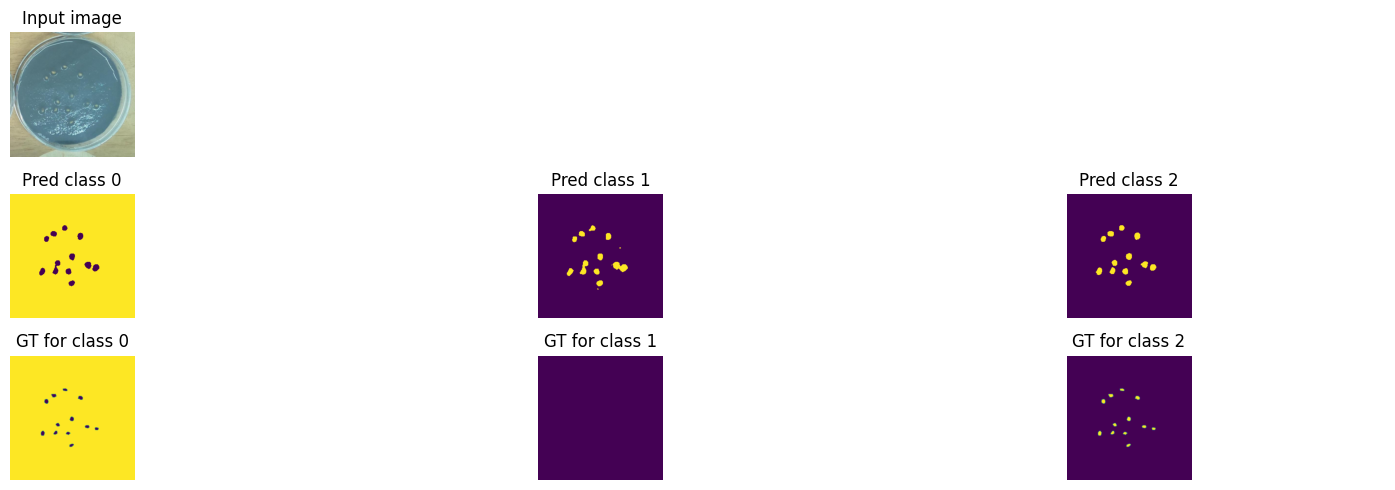

Train loss: 0.38044 | Time: 25m 3s | Val loss: 0.39683
Train_DICE_avg: 0.70749 | Train_Jaccard_avg: 0.64662 | Train_Sensitivity_avg: 0.70474 | Train_Specificity_avg: 0.94713 
Class 0 - Train_DICE: 0.99113 | Train_Jaccard: 0.98248 | Train_Sensitivity: 0.99115 | Train_Specificity: 0.84835 
Class 1 - Train_DICE: 0.35681 | Train_Jaccard: 0.27982 | Train_Sensitivity: 0.35879 | Train_Specificity: 0.99769 
Class 2 - Train_DICE: 0.77451 | Train_Jaccard: 0.67756 | Train_Sensitivity: 0.76427 | Train_Specificity: 0.99536 
Val_DICE_avg: 0.70336 | Val_Jaccard_avg: 0.64950 | Val_Sensitivity_avg: 0.69346 | Val_Specificity_avg: 0.91623 
Class 0 - Val_DICE: 0.99397 | Val_Jaccard: 0.98806 | Val_Sensitivity: 0.99756 | Val_Specificity: 0.75394 
Class 1 - Val_DICE: 0.32262 | Val_Jaccard: 0.25723 | Val_Sensitivity: 0.32709 | Val_Specificity: 0.99764 
Class 2 - Val_DICE: 0.79350 | Val_Jaccard: 0.70322 | Val_Sensitivity: 0.75572 | Val_Specificity: 0.99710 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.37207 | Time: 25m 51s | Val loss: 0.38250
Train_DICE_avg: 0.71128 | Train_Jaccard_avg: 0.65041 | Train_Sensitivity_avg: 0.71061 | Train_Specificity_avg: 0.94787 
Class 0 - Train_DICE: 0.99105 | Train_Jaccard: 0.98231 | Train_Sensitivity: 0.99093 | Train_Specificity: 0.85062 
Class 1 - Train_DICE: 0.36299 | Train_Jaccard: 0.28547 | Train_Sensitivity: 0.36871 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.77981 | Train_Jaccard: 0.68344 | Train_Sensitivity: 0.77219 | Train_Specificity: 0.99531 
Val_DICE_avg: 0.70298 | Val_Jaccard_avg: 0.64789 | Val_Sensitivity_avg: 0.69660 | Val_Specificity_avg: 0.92031 
Class 0 - Val_DICE: 0.99406 | Val_Jaccard: 0.98826 | Val_Sensitivity: 0.99719 | Val_Specificity: 0.76717 
Class 1 - Val_DICE: 0.32136 | Val_Jaccard: 0.25413 | Val_Sensitivity: 0.30899 | Val_Specificity: 0.99781 
Class 2 - Val_DICE: 0.79351 | Val_Jaccard: 0.70128 | Val_Sensitivity: 0.78363 | Val_Specificity: 0.99596 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.36462 | Time: 26m 41s | Val loss: 0.37852
Train_DICE_avg: 0.71534 | Train_Jaccard_avg: 0.65454 | Train_Sensitivity_avg: 0.71765 | Train_Specificity_avg: 0.94951 
Class 0 - Train_DICE: 0.99096 | Train_Jaccard: 0.98214 | Train_Sensitivity: 0.99080 | Train_Specificity: 0.85565 
Class 1 - Train_DICE: 0.37411 | Train_Jaccard: 0.29620 | Train_Sensitivity: 0.38501 | Train_Specificity: 0.99767 
Class 2 - Train_DICE: 0.78095 | Train_Jaccard: 0.68529 | Train_Sensitivity: 0.77714 | Train_Specificity: 0.99521 
Val_DICE_avg: 0.71127 | Val_Jaccard_avg: 0.65532 | Val_Sensitivity_avg: 0.70479 | Val_Specificity_avg: 0.92619 
Class 0 - Val_DICE: 0.99491 | Val_Jaccard: 0.98991 | Val_Sensitivity: 0.99735 | Val_Specificity: 0.78484 
Class 1 - Val_DICE: 0.33299 | Val_Jaccard: 0.26440 | Val_Sensitivity: 0.32375 | Val_Specificity: 0.99772 
Class 2 - Val_DICE: 0.80590 | Val_Jaccard: 0.71164 | Val_Sensitivity: 0.79327 | Val_Specificity: 0.99600 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.35691 | Time: 27m 29s | Val loss: 0.37766
Train_DICE_avg: 0.71930 | Train_Jaccard_avg: 0.65838 | Train_Sensitivity_avg: 0.72148 | Train_Specificity_avg: 0.94964 
Class 0 - Train_DICE: 0.99124 | Train_Jaccard: 0.98269 | Train_Sensitivity: 0.99123 | Train_Specificity: 0.85614 
Class 1 - Train_DICE: 0.38152 | Train_Jaccard: 0.30328 | Train_Sensitivity: 0.39009 | Train_Specificity: 0.99762 
Class 2 - Train_DICE: 0.78515 | Train_Jaccard: 0.68916 | Train_Sensitivity: 0.78313 | Train_Specificity: 0.99515 
Val_DICE_avg: 0.71350 | Val_Jaccard_avg: 0.65671 | Val_Sensitivity_avg: 0.70711 | Val_Specificity_avg: 0.92238 
Class 0 - Val_DICE: 0.99461 | Val_Jaccard: 0.98931 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.77348 
Class 1 - Val_DICE: 0.34365 | Val_Jaccard: 0.27245 | Val_Sensitivity: 0.33825 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.80225 | Val_Jaccard: 0.70836 | Val_Sensitivity: 0.78554 | Val_Specificity: 0.99598 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.34892 | Time: 28m 18s | Val loss: 0.36384
Train_DICE_avg: 0.72649 | Train_Jaccard_avg: 0.66616 | Train_Sensitivity_avg: 0.73012 | Train_Specificity_avg: 0.95000 
Class 0 - Train_DICE: 0.99126 | Train_Jaccard: 0.98273 | Train_Sensitivity: 0.99127 | Train_Specificity: 0.85715 
Class 1 - Train_DICE: 0.38871 | Train_Jaccard: 0.30999 | Train_Sensitivity: 0.39911 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.79951 | Train_Jaccard: 0.70575 | Train_Sensitivity: 0.79997 | Train_Specificity: 0.99517 
Val_DICE_avg: 0.72806 | Val_Jaccard_avg: 0.67462 | Val_Sensitivity_avg: 0.72602 | Val_Specificity_avg: 0.93536 
Class 0 - Val_DICE: 0.99548 | Val_Jaccard: 0.99104 | Val_Sensitivity: 0.99729 | Val_Specificity: 0.81214 
Class 1 - Val_DICE: 0.35426 | Val_Jaccard: 0.28524 | Val_Sensitivity: 0.35973 | Val_Specificity: 0.99762 
Class 2 - Val_DICE: 0.83443 | Val_Jaccard: 0.74757 | Val_Sensitivity: 0.82103 | Val_Specificity: 0.99632 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


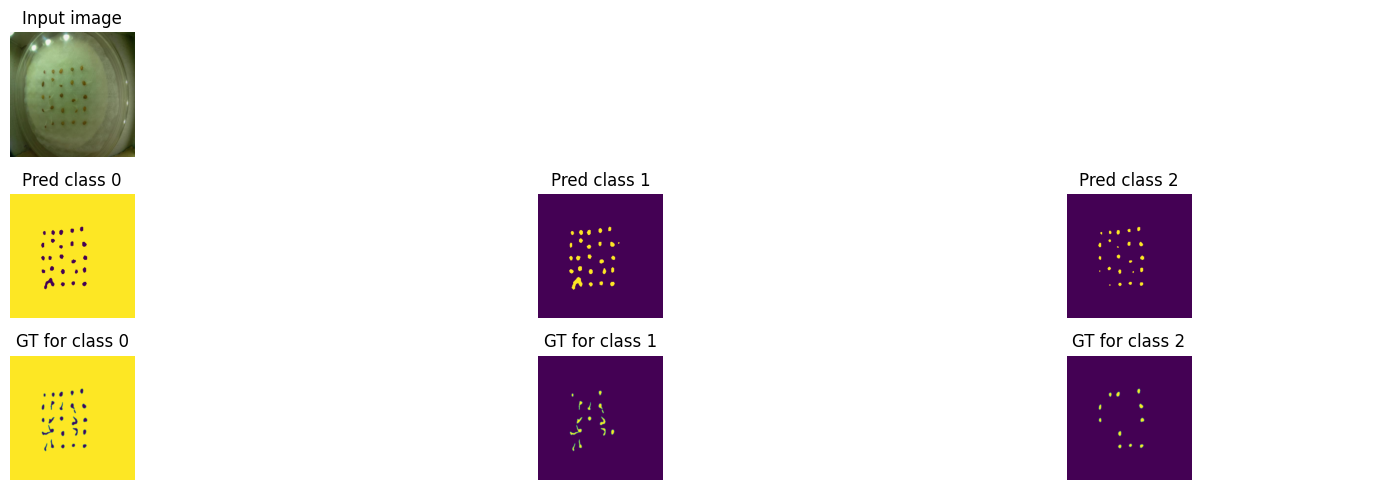

Train loss: 0.34235 | Time: 29m 8s | Val loss: 0.35543
Train_DICE_avg: 0.72767 | Train_Jaccard_avg: 0.66778 | Train_Sensitivity_avg: 0.73324 | Train_Specificity_avg: 0.95085 
Class 0 - Train_DICE: 0.99145 | Train_Jaccard: 0.98310 | Train_Sensitivity: 0.99151 | Train_Specificity: 0.85972 
Class 1 - Train_DICE: 0.38803 | Train_Jaccard: 0.30898 | Train_Sensitivity: 0.40113 | Train_Specificity: 0.99766 
Class 2 - Train_DICE: 0.80353 | Train_Jaccard: 0.71126 | Train_Sensitivity: 0.80707 | Train_Specificity: 0.99518 
Val_DICE_avg: 0.72421 | Val_Jaccard_avg: 0.67188 | Val_Sensitivity_avg: 0.71835 | Val_Specificity_avg: 0.92160 
Class 0 - Val_DICE: 0.99451 | Val_Jaccard: 0.98914 | Val_Sensitivity: 0.99792 | Val_Specificity: 0.77059 
Class 1 - Val_DICE: 0.34879 | Val_Jaccard: 0.28305 | Val_Sensitivity: 0.33005 | Val_Specificity: 0.99820 
Class 2 - Val_DICE: 0.82933 | Val_Jaccard: 0.74345 | Val_Sensitivity: 0.82708 | Val_Specificity: 0.99601 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.33575 | Time: 29m 56s | Val loss: 0.35010
Train_DICE_avg: 0.73099 | Train_Jaccard_avg: 0.67047 | Train_Sensitivity_avg: 0.73861 | Train_Specificity_avg: 0.94880 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98337 | Train_Sensitivity: 0.99186 | Train_Specificity: 0.85382 
Class 1 - Train_DICE: 0.39314 | Train_Jaccard: 0.31376 | Train_Sensitivity: 0.40850 | Train_Specificity: 0.99762 
Class 2 - Train_DICE: 0.80826 | Train_Jaccard: 0.71428 | Train_Sensitivity: 0.81547 | Train_Specificity: 0.99497 
Val_DICE_avg: 0.72751 | Val_Jaccard_avg: 0.67509 | Val_Sensitivity_avg: 0.72754 | Val_Specificity_avg: 0.92696 
Class 0 - Val_DICE: 0.99489 | Val_Jaccard: 0.98987 | Val_Sensitivity: 0.99787 | Val_Specificity: 0.78654 
Class 1 - Val_DICE: 0.35229 | Val_Jaccard: 0.28527 | Val_Sensitivity: 0.36258 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.83536 | Val_Jaccard: 0.75012 | Val_Sensitivity: 0.82216 | Val_Specificity: 0.99655 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.33064 | Time: 30m 45s | Val loss: 0.34248
Train_DICE_avg: 0.73203 | Train_Jaccard_avg: 0.67213 | Train_Sensitivity_avg: 0.74173 | Train_Specificity_avg: 0.94919 
Class 0 - Train_DICE: 0.99163 | Train_Jaccard: 0.98345 | Train_Sensitivity: 0.99222 | Train_Specificity: 0.85494 
Class 1 - Train_DICE: 0.39852 | Train_Jaccard: 0.31938 | Train_Sensitivity: 0.41776 | Train_Specificity: 0.99762 
Class 2 - Train_DICE: 0.80595 | Train_Jaccard: 0.71355 | Train_Sensitivity: 0.81521 | Train_Specificity: 0.99502 
Val_DICE_avg: 0.72921 | Val_Jaccard_avg: 0.67697 | Val_Sensitivity_avg: 0.72729 | Val_Specificity_avg: 0.92769 
Class 0 - Val_DICE: 0.99497 | Val_Jaccard: 0.99003 | Val_Sensitivity: 0.99787 | Val_Specificity: 0.78871 
Class 1 - Val_DICE: 0.35706 | Val_Jaccard: 0.29035 | Val_Sensitivity: 0.35710 | Val_Specificity: 0.99787 
Class 2 - Val_DICE: 0.83561 | Val_Jaccard: 0.75053 | Val_Sensitivity: 0.82692 | Val_Specificity: 0.99651 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.32669 | Time: 31m 34s | Val loss: 0.33872
Train_DICE_avg: 0.73318 | Train_Jaccard_avg: 0.67270 | Train_Sensitivity_avg: 0.74366 | Train_Specificity_avg: 0.94959 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98338 | Train_Sensitivity: 0.99192 | Train_Specificity: 0.85622 
Class 1 - Train_DICE: 0.39922 | Train_Jaccard: 0.31999 | Train_Sensitivity: 0.42003 | Train_Specificity: 0.99763 
Class 2 - Train_DICE: 0.80873 | Train_Jaccard: 0.71475 | Train_Sensitivity: 0.81903 | Train_Specificity: 0.99492 
Val_DICE_avg: 0.72917 | Val_Jaccard_avg: 0.67693 | Val_Sensitivity_avg: 0.73127 | Val_Specificity_avg: 0.92683 
Class 0 - Val_DICE: 0.99479 | Val_Jaccard: 0.98967 | Val_Sensitivity: 0.99776 | Val_Specificity: 0.78648 
Class 1 - Val_DICE: 0.35961 | Val_Jaccard: 0.29444 | Val_Sensitivity: 0.36610 | Val_Specificity: 0.99789 
Class 2 - Val_DICE: 0.83312 | Val_Jaccard: 0.74669 | Val_Sensitivity: 0.82995 | Val_Specificity: 0.99611 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.32151 | Time: 32m 23s | Val loss: 0.33515
Train_DICE_avg: 0.73775 | Train_Jaccard_avg: 0.67761 | Train_Sensitivity_avg: 0.74946 | Train_Specificity_avg: 0.95050 
Class 0 - Train_DICE: 0.99170 | Train_Jaccard: 0.98360 | Train_Sensitivity: 0.99216 | Train_Specificity: 0.85893 
Class 1 - Train_DICE: 0.40914 | Train_Jaccard: 0.33042 | Train_Sensitivity: 0.43222 | Train_Specificity: 0.99763 
Class 2 - Train_DICE: 0.81241 | Train_Jaccard: 0.71880 | Train_Sensitivity: 0.82399 | Train_Specificity: 0.99493 
Val_DICE_avg: 0.72989 | Val_Jaccard_avg: 0.67729 | Val_Sensitivity_avg: 0.73316 | Val_Specificity_avg: 0.92840 
Class 0 - Val_DICE: 0.99481 | Val_Jaccard: 0.98971 | Val_Sensitivity: 0.99771 | Val_Specificity: 0.79132 
Class 1 - Val_DICE: 0.35693 | Val_Jaccard: 0.29101 | Val_Sensitivity: 0.36395 | Val_Specificity: 0.99786 
Class 2 - Val_DICE: 0.83794 | Val_Jaccard: 0.75114 | Val_Sensitivity: 0.83782 | Val_Specificity: 0.99602 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


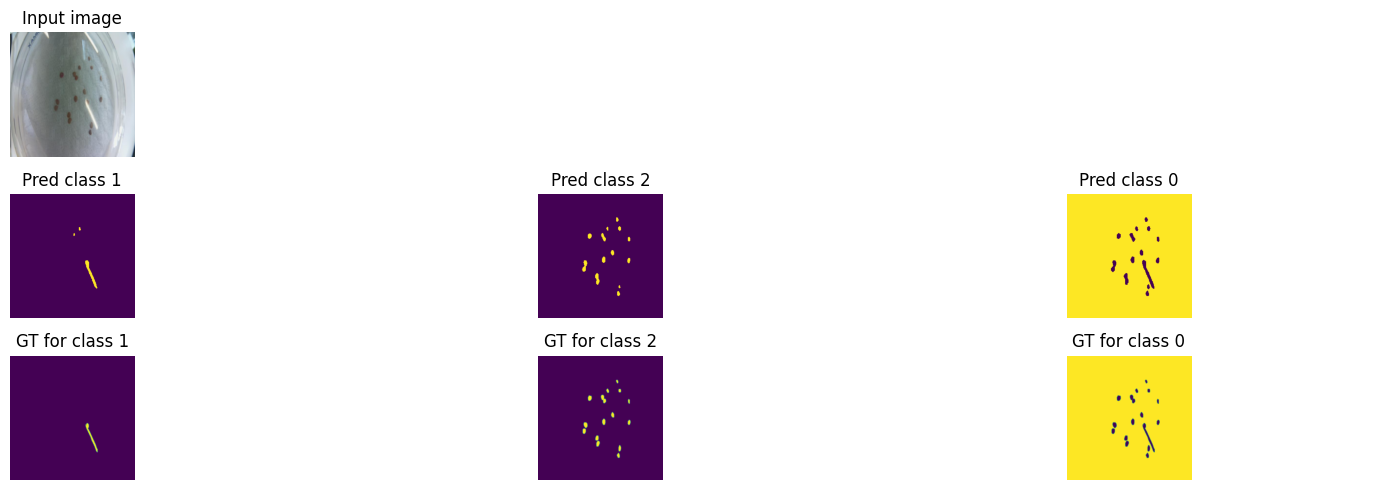

Train loss: 0.31801 | Time: 33m 12s | Val loss: 0.33431
Train_DICE_avg: 0.73686 | Train_Jaccard_avg: 0.67639 | Train_Sensitivity_avg: 0.74874 | Train_Specificity_avg: 0.95028 
Class 0 - Train_DICE: 0.99165 | Train_Jaccard: 0.98349 | Train_Sensitivity: 0.99218 | Train_Specificity: 0.85831 
Class 1 - Train_DICE: 0.40369 | Train_Jaccard: 0.32493 | Train_Sensitivity: 0.42725 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.81525 | Train_Jaccard: 0.72073 | Train_Sensitivity: 0.82680 | Train_Specificity: 0.99490 
Val_DICE_avg: 0.72959 | Val_Jaccard_avg: 0.67579 | Val_Sensitivity_avg: 0.73369 | Val_Specificity_avg: 0.92897 
Class 0 - Val_DICE: 0.99486 | Val_Jaccard: 0.98981 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.79350 
Class 1 - Val_DICE: 0.36302 | Val_Jaccard: 0.29518 | Val_Sensitivity: 0.36213 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.83090 | Val_Jaccard: 0.74238 | Val_Sensitivity: 0.84133 | Val_Specificity: 0.99549 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.31356 | Time: 34m 1s | Val loss: 0.33286
Train_DICE_avg: 0.74148 | Train_Jaccard_avg: 0.68077 | Train_Sensitivity_avg: 0.75260 | Train_Specificity_avg: 0.94981 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98420 | Train_Sensitivity: 0.99259 | Train_Specificity: 0.85691 
Class 1 - Train_DICE: 0.40869 | Train_Jaccard: 0.32962 | Train_Sensitivity: 0.42921 | Train_Specificity: 0.99762 
Class 2 - Train_DICE: 0.82376 | Train_Jaccard: 0.72847 | Train_Sensitivity: 0.83600 | Train_Specificity: 0.99491 
Val_DICE_avg: 0.73444 | Val_Jaccard_avg: 0.67998 | Val_Sensitivity_avg: 0.73893 | Val_Specificity_avg: 0.93109 
Class 0 - Val_DICE: 0.99527 | Val_Jaccard: 0.99062 | Val_Sensitivity: 0.99752 | Val_Specificity: 0.80016 
Class 1 - Val_DICE: 0.36668 | Val_Jaccard: 0.29951 | Val_Sensitivity: 0.36610 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.84137 | Val_Jaccard: 0.74980 | Val_Sensitivity: 0.85316 | Val_Specificity: 0.99534 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.30741 | Time: 34m 50s | Val loss: 0.32570
Train_DICE_avg: 0.75037 | Train_Jaccard_avg: 0.68834 | Train_Sensitivity_avg: 0.76326 | Train_Specificity_avg: 0.95620 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98417 | Train_Sensitivity: 0.99164 | Train_Specificity: 0.87619 
Class 1 - Train_DICE: 0.41189 | Train_Jaccard: 0.33061 | Train_Sensitivity: 0.43604 | Train_Specificity: 0.99746 
Class 2 - Train_DICE: 0.84722 | Train_Jaccard: 0.75023 | Train_Sensitivity: 0.86212 | Train_Specificity: 0.99495 
Val_DICE_avg: 0.75033 | Val_Jaccard_avg: 0.69688 | Val_Sensitivity_avg: 0.75356 | Val_Specificity_avg: 0.93269 
Class 0 - Val_DICE: 0.99548 | Val_Jaccard: 0.99102 | Val_Sensitivity: 0.99749 | Val_Specificity: 0.80436 
Class 1 - Val_DICE: 0.38898 | Val_Jaccard: 0.31986 | Val_Sensitivity: 0.39608 | Val_Specificity: 0.99759 
Class 2 - Val_DICE: 0.86655 | Val_Jaccard: 0.77976 | Val_Sensitivity: 0.86711 | Val_Specificity: 0.99611 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.29762 | Time: 35m 39s | Val loss: 0.31400
Train_DICE_avg: 0.75678 | Train_Jaccard_avg: 0.69489 | Train_Sensitivity_avg: 0.77462 | Train_Specificity_avg: 0.95713 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98418 | Train_Sensitivity: 0.99152 | Train_Specificity: 0.87914 
Class 1 - Train_DICE: 0.41987 | Train_Jaccard: 0.33821 | Train_Sensitivity: 0.45313 | Train_Specificity: 0.99736 
Class 2 - Train_DICE: 0.85847 | Train_Jaccard: 0.76229 | Train_Sensitivity: 0.87922 | Train_Specificity: 0.99489 
Val_DICE_avg: 0.75346 | Val_Jaccard_avg: 0.70153 | Val_Sensitivity_avg: 0.76120 | Val_Specificity_avg: 0.94407 
Class 0 - Val_DICE: 0.99590 | Val_Jaccard: 0.99184 | Val_Sensitivity: 0.99748 | Val_Specificity: 0.83849 
Class 1 - Val_DICE: 0.38438 | Val_Jaccard: 0.31629 | Val_Sensitivity: 0.38668 | Val_Specificity: 0.99782 
Class 2 - Val_DICE: 0.88009 | Val_Jaccard: 0.79646 | Val_Sensitivity: 0.89945 | Val_Specificity: 0.99591 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.29082 | Time: 36m 28s | Val loss: 0.30841
Train_DICE_avg: 0.75891 | Train_Jaccard_avg: 0.69754 | Train_Sensitivity_avg: 0.77935 | Train_Specificity_avg: 0.95778 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98449 | Train_Sensitivity: 0.99170 | Train_Specificity: 0.88108 
Class 1 - Train_DICE: 0.42211 | Train_Jaccard: 0.34064 | Train_Sensitivity: 0.45934 | Train_Specificity: 0.99733 
Class 2 - Train_DICE: 0.86245 | Train_Jaccard: 0.76748 | Train_Sensitivity: 0.88701 | Train_Specificity: 0.99493 
Val_DICE_avg: 0.75052 | Val_Jaccard_avg: 0.69779 | Val_Sensitivity_avg: 0.76364 | Val_Specificity_avg: 0.94097 
Class 0 - Val_DICE: 0.99586 | Val_Jaccard: 0.99177 | Val_Sensitivity: 0.99744 | Val_Specificity: 0.82974 
Class 1 - Val_DICE: 0.37640 | Val_Jaccard: 0.30734 | Val_Sensitivity: 0.38825 | Val_Specificity: 0.99760 
Class 2 - Val_DICE: 0.87929 | Val_Jaccard: 0.79426 | Val_Sensitivity: 0.90524 | Val_Specificity: 0.99557 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


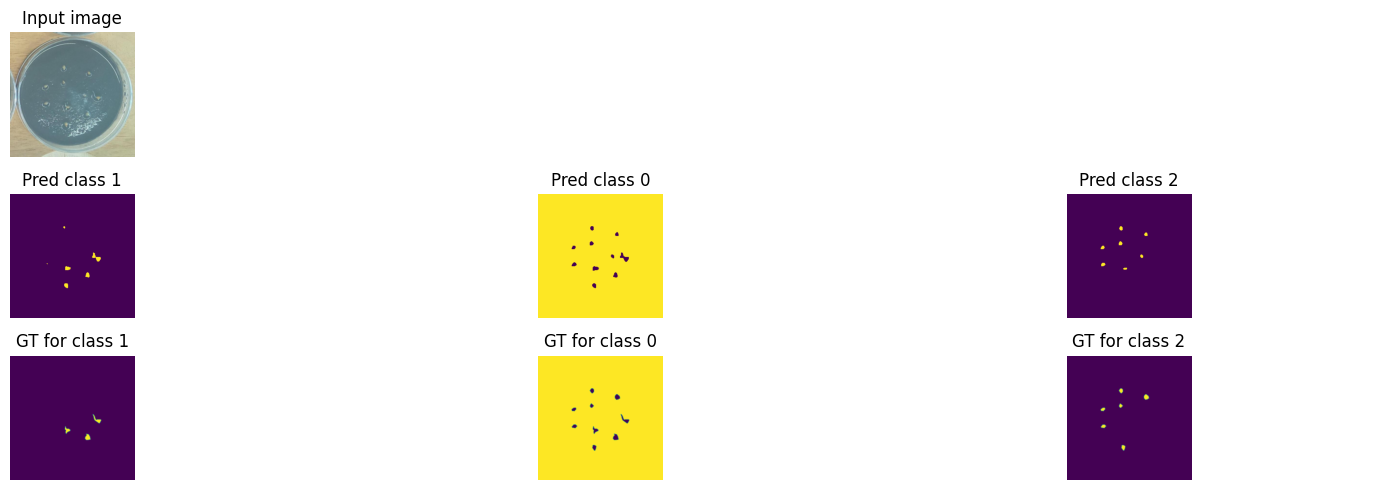

Train loss: 0.28512 | Time: 37m 17s | Val loss: 0.30307
Train_DICE_avg: 0.76164 | Train_Jaccard_avg: 0.70040 | Train_Sensitivity_avg: 0.78268 | Train_Specificity_avg: 0.95742 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98469 | Train_Sensitivity: 0.99197 | Train_Specificity: 0.88003 
Class 1 - Train_DICE: 0.42910 | Train_Jaccard: 0.34765 | Train_Sensitivity: 0.46395 | Train_Specificity: 0.99738 
Class 2 - Train_DICE: 0.86356 | Train_Jaccard: 0.76887 | Train_Sensitivity: 0.89212 | Train_Specificity: 0.99486 
Val_DICE_avg: 0.75355 | Val_Jaccard_avg: 0.70182 | Val_Sensitivity_avg: 0.77095 | Val_Specificity_avg: 0.94548 
Class 0 - Val_DICE: 0.99601 | Val_Jaccard: 0.99207 | Val_Sensitivity: 0.99736 | Val_Specificity: 0.84312 
Class 1 - Val_DICE: 0.38128 | Val_Jaccard: 0.31242 | Val_Sensitivity: 0.39698 | Val_Specificity: 0.99751 
Class 2 - Val_DICE: 0.88335 | Val_Jaccard: 0.80098 | Val_Sensitivity: 0.91852 | Val_Specificity: 0.99582 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.28251 | Time: 38m 6s | Val loss: 0.30169
Train_DICE_avg: 0.76191 | Train_Jaccard_avg: 0.70081 | Train_Sensitivity_avg: 0.78495 | Train_Specificity_avg: 0.95750 
Class 0 - Train_DICE: 0.99218 | Train_Jaccard: 0.98453 | Train_Sensitivity: 0.99188 | Train_Specificity: 0.88031 
Class 1 - Train_DICE: 0.42957 | Train_Jaccard: 0.34832 | Train_Sensitivity: 0.46760 | Train_Specificity: 0.99736 
Class 2 - Train_DICE: 0.86399 | Train_Jaccard: 0.76958 | Train_Sensitivity: 0.89538 | Train_Specificity: 0.99484 
Val_DICE_avg: 0.75629 | Val_Jaccard_avg: 0.70506 | Val_Sensitivity_avg: 0.77367 | Val_Specificity_avg: 0.94640 
Class 0 - Val_DICE: 0.99606 | Val_Jaccard: 0.99216 | Val_Sensitivity: 0.99738 | Val_Specificity: 0.84582 
Class 1 - Val_DICE: 0.38772 | Val_Jaccard: 0.31988 | Val_Sensitivity: 0.40826 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.88509 | Val_Jaccard: 0.80313 | Val_Sensitivity: 0.91536 | Val_Specificity: 0.99582 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.27856 | Time: 38m 55s | Val loss: 0.29665
Train_DICE_avg: 0.76329 | Train_Jaccard_avg: 0.70211 | Train_Sensitivity_avg: 0.78717 | Train_Specificity_avg: 0.95891 
Class 0 - Train_DICE: 0.99230 | Train_Jaccard: 0.98477 | Train_Sensitivity: 0.99188 | Train_Specificity: 0.88462 
Class 1 - Train_DICE: 0.43378 | Train_Jaccard: 0.35234 | Train_Sensitivity: 0.47132 | Train_Specificity: 0.99739 
Class 2 - Train_DICE: 0.86379 | Train_Jaccard: 0.76922 | Train_Sensitivity: 0.89833 | Train_Specificity: 0.99473 
Val_DICE_avg: 0.75698 | Val_Jaccard_avg: 0.70572 | Val_Sensitivity_avg: 0.77610 | Val_Specificity_avg: 0.94597 
Class 0 - Val_DICE: 0.99600 | Val_Jaccard: 0.99204 | Val_Sensitivity: 0.99747 | Val_Specificity: 0.84450 
Class 1 - Val_DICE: 0.39189 | Val_Jaccard: 0.32438 | Val_Sensitivity: 0.40585 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.88306 | Val_Jaccard: 0.80074 | Val_Sensitivity: 0.92499 | Val_Specificity: 0.99567 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.27529 | Time: 39m 44s | Val loss: 0.29120
Train_DICE_avg: 0.76381 | Train_Jaccard_avg: 0.70278 | Train_Sensitivity_avg: 0.78798 | Train_Specificity_avg: 0.95873 
Class 0 - Train_DICE: 0.99221 | Train_Jaccard: 0.98458 | Train_Sensitivity: 0.99180 | Train_Specificity: 0.88404 
Class 1 - Train_DICE: 0.43360 | Train_Jaccard: 0.35225 | Train_Sensitivity: 0.47224 | Train_Specificity: 0.99736 
Class 2 - Train_DICE: 0.86561 | Train_Jaccard: 0.77152 | Train_Sensitivity: 0.89988 | Train_Specificity: 0.99478 
Val_DICE_avg: 0.75642 | Val_Jaccard_avg: 0.70526 | Val_Sensitivity_avg: 0.77654 | Val_Specificity_avg: 0.94538 
Class 0 - Val_DICE: 0.99600 | Val_Jaccard: 0.99206 | Val_Sensitivity: 0.99748 | Val_Specificity: 0.84281 
Class 1 - Val_DICE: 0.38962 | Val_Jaccard: 0.32229 | Val_Sensitivity: 0.40619 | Val_Specificity: 0.99765 
Class 2 - Val_DICE: 0.88365 | Val_Jaccard: 0.80144 | Val_Sensitivity: 0.92595 | Val_Specificity: 0.99568 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.27259 | Time: 40m 33s | Val loss: 0.29307
Train_DICE_avg: 0.76537 | Train_Jaccard_avg: 0.70462 | Train_Sensitivity_avg: 0.79084 | Train_Specificity_avg: 0.95847 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98449 | Train_Sensitivity: 0.99193 | Train_Specificity: 0.88327 
Class 1 - Train_DICE: 0.43780 | Train_Jaccard: 0.35709 | Train_Sensitivity: 0.47843 | Train_Specificity: 0.99737 
Class 2 - Train_DICE: 0.86613 | Train_Jaccard: 0.77229 | Train_Sensitivity: 0.90216 | Train_Specificity: 0.99477 
Val_DICE_avg: 0.75662 | Val_Jaccard_avg: 0.70559 | Val_Sensitivity_avg: 0.77562 | Val_Specificity_avg: 0.94242 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99175 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.83373 
Class 1 - Val_DICE: 0.38976 | Val_Jaccard: 0.32259 | Val_Sensitivity: 0.40876 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.88424 | Val_Jaccard: 0.80242 | Val_Sensitivity: 0.92047 | Val_Specificity: 0.99576 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


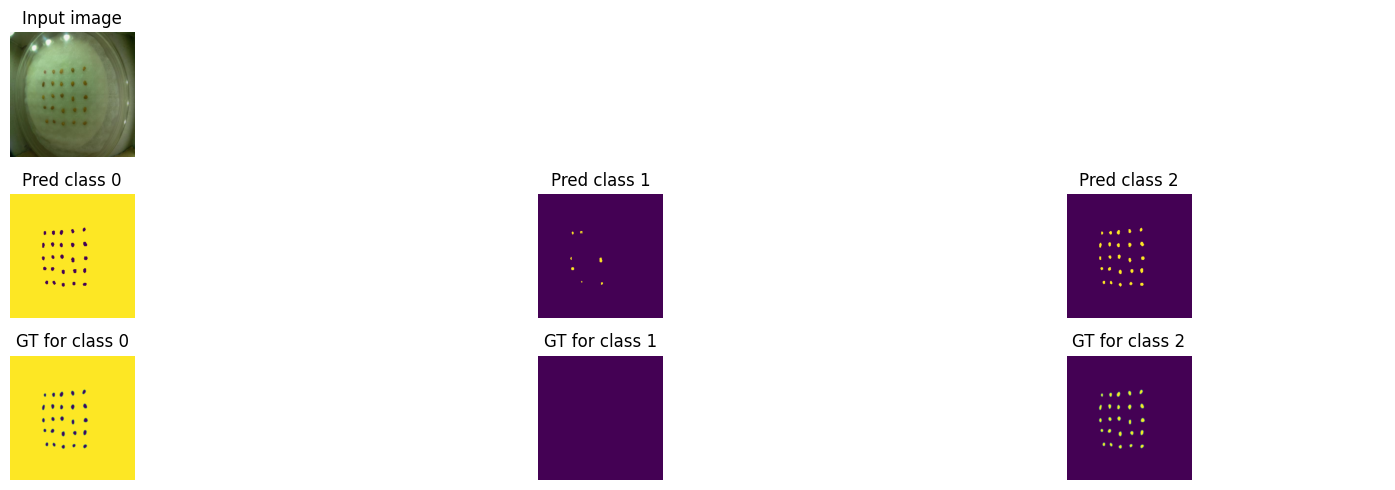

Train loss: 0.27108 | Time: 41m 22s | Val loss: 0.29081
Train_DICE_avg: 0.76524 | Train_Jaccard_avg: 0.70445 | Train_Sensitivity_avg: 0.79133 | Train_Specificity_avg: 0.95717 
Class 0 - Train_DICE: 0.99222 | Train_Jaccard: 0.98461 | Train_Sensitivity: 0.99217 | Train_Specificity: 0.87941 
Class 1 - Train_DICE: 0.43746 | Train_Jaccard: 0.35663 | Train_Sensitivity: 0.47905 | Train_Specificity: 0.99739 
Class 2 - Train_DICE: 0.86605 | Train_Jaccard: 0.77211 | Train_Sensitivity: 0.90276 | Train_Specificity: 0.99472 
Val_DICE_avg: 0.75604 | Val_Jaccard_avg: 0.70456 | Val_Sensitivity_avg: 0.77755 | Val_Specificity_avg: 0.94347 
Class 0 - Val_DICE: 0.99588 | Val_Jaccard: 0.99181 | Val_Sensitivity: 0.99767 | Val_Specificity: 0.83711 
Class 1 - Val_DICE: 0.39028 | Val_Jaccard: 0.32356 | Val_Sensitivity: 0.40696 | Val_Specificity: 0.99784 
Class 2 - Val_DICE: 0.88197 | Val_Jaccard: 0.79830 | Val_Sensitivity: 0.92803 | Val_Specificity: 0.99545 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.26946 | Time: 42m 11s | Val loss: 0.28670
Train_DICE_avg: 0.76475 | Train_Jaccard_avg: 0.70399 | Train_Sensitivity_avg: 0.79131 | Train_Specificity_avg: 0.95796 
Class 0 - Train_DICE: 0.99238 | Train_Jaccard: 0.98492 | Train_Sensitivity: 0.99229 | Train_Specificity: 0.88181 
Class 1 - Train_DICE: 0.43490 | Train_Jaccard: 0.35370 | Train_Sensitivity: 0.47680 | Train_Specificity: 0.99736 
Class 2 - Train_DICE: 0.86698 | Train_Jaccard: 0.77334 | Train_Sensitivity: 0.90485 | Train_Specificity: 0.99470 
Val_DICE_avg: 0.76164 | Val_Jaccard_avg: 0.71077 | Val_Sensitivity_avg: 0.78195 | Val_Specificity_avg: 0.94298 
Class 0 - Val_DICE: 0.99580 | Val_Jaccard: 0.99165 | Val_Sensitivity: 0.99769 | Val_Specificity: 0.83544 
Class 1 - Val_DICE: 0.40393 | Val_Jaccard: 0.33703 | Val_Sensitivity: 0.42284 | Val_Specificity: 0.99778 
Class 2 - Val_DICE: 0.88520 | Val_Jaccard: 0.80364 | Val_Sensitivity: 0.92531 | Val_Specificity: 0.99572 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.26676 | Time: 42m 59s | Val loss: 0.28179
Train_DICE_avg: 0.76934 | Train_Jaccard_avg: 0.70901 | Train_Sensitivity_avg: 0.79628 | Train_Specificity_avg: 0.95637 
Class 0 - Train_DICE: 0.99235 | Train_Jaccard: 0.98487 | Train_Sensitivity: 0.99249 | Train_Specificity: 0.87693 
Class 1 - Train_DICE: 0.44760 | Train_Jaccard: 0.36703 | Train_Sensitivity: 0.49015 | Train_Specificity: 0.99741 
Class 2 - Train_DICE: 0.86808 | Train_Jaccard: 0.77513 | Train_Sensitivity: 0.90620 | Train_Specificity: 0.99478 
Val_DICE_avg: 0.76045 | Val_Jaccard_avg: 0.70849 | Val_Sensitivity_avg: 0.78483 | Val_Specificity_avg: 0.94432 
Class 0 - Val_DICE: 0.99582 | Val_Jaccard: 0.99169 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.83991 
Class 1 - Val_DICE: 0.40301 | Val_Jaccard: 0.33439 | Val_Sensitivity: 0.42213 | Val_Specificity: 0.99770 
Class 2 - Val_DICE: 0.88253 | Val_Jaccard: 0.79938 | Val_Sensitivity: 0.93477 | Val_Specificity: 0.99534 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.26463 | Time: 43m 48s | Val loss: 0.28192
Train_DICE_avg: 0.76708 | Train_Jaccard_avg: 0.70682 | Train_Sensitivity_avg: 0.79542 | Train_Specificity_avg: 0.95821 
Class 0 - Train_DICE: 0.99237 | Train_Jaccard: 0.98491 | Train_Sensitivity: 0.99233 | Train_Specificity: 0.88253 
Class 1 - Train_DICE: 0.44160 | Train_Jaccard: 0.36149 | Train_Sensitivity: 0.48759 | Train_Specificity: 0.99738 
Class 2 - Train_DICE: 0.86728 | Train_Jaccard: 0.77407 | Train_Sensitivity: 0.90634 | Train_Specificity: 0.99473 
Val_DICE_avg: 0.75854 | Val_Jaccard_avg: 0.70711 | Val_Sensitivity_avg: 0.78250 | Val_Specificity_avg: 0.94733 
Class 0 - Val_DICE: 0.99599 | Val_Jaccard: 0.99203 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.84872 
Class 1 - Val_DICE: 0.39653 | Val_Jaccard: 0.32870 | Val_Sensitivity: 0.41728 | Val_Specificity: 0.99782 
Class 2 - Val_DICE: 0.88309 | Val_Jaccard: 0.80058 | Val_Sensitivity: 0.93262 | Val_Specificity: 0.99546 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.26309 | Time: 44m 36s | Val loss: 0.28031
Train_DICE_avg: 0.76915 | Train_Jaccard_avg: 0.70879 | Train_Sensitivity_avg: 0.79678 | Train_Specificity_avg: 0.95828 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98470 | Train_Sensitivity: 0.99221 | Train_Specificity: 0.88277 
Class 1 - Train_DICE: 0.44677 | Train_Jaccard: 0.36636 | Train_Sensitivity: 0.48913 | Train_Specificity: 0.99740 
Class 2 - Train_DICE: 0.86842 | Train_Jaccard: 0.77530 | Train_Sensitivity: 0.90900 | Train_Specificity: 0.99467 
Val_DICE_avg: 0.76066 | Val_Jaccard_avg: 0.70927 | Val_Sensitivity_avg: 0.78529 | Val_Specificity_avg: 0.94192 
Class 0 - Val_DICE: 0.99579 | Val_Jaccard: 0.99164 | Val_Sensitivity: 0.99774 | Val_Specificity: 0.83248 
Class 1 - Val_DICE: 0.40229 | Val_Jaccard: 0.33419 | Val_Sensitivity: 0.42191 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.88389 | Val_Jaccard: 0.80198 | Val_Sensitivity: 0.93623 | Val_Specificity: 0.99551 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


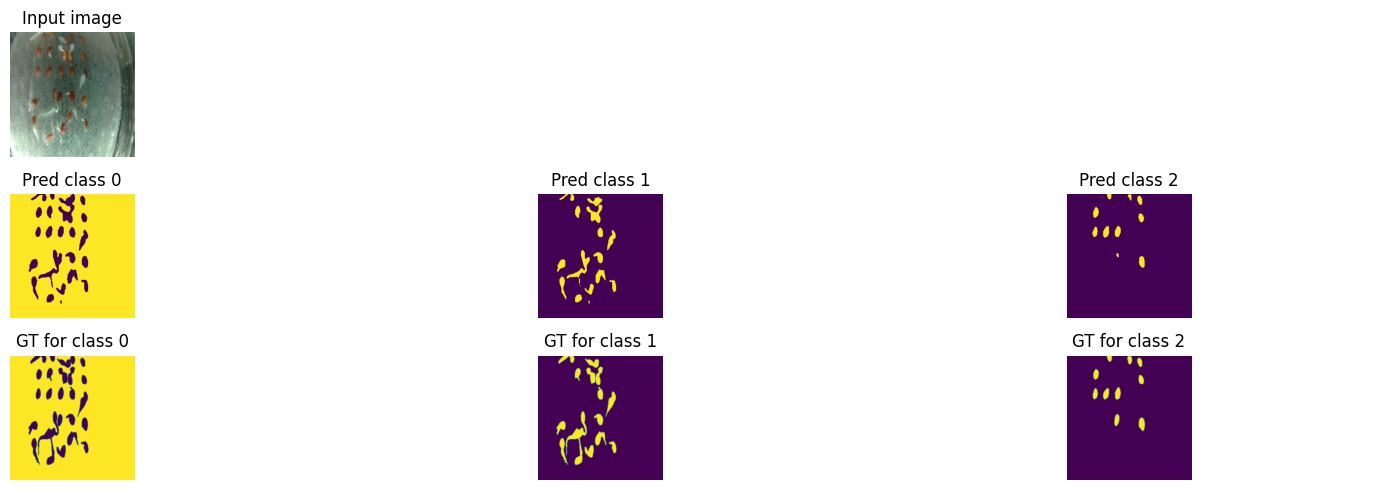

Train loss: 0.26115 | Time: 45m 26s | Val loss: 0.27819
Train_DICE_avg: 0.77051 | Train_Jaccard_avg: 0.71029 | Train_Sensitivity_avg: 0.79899 | Train_Specificity_avg: 0.95832 
Class 0 - Train_DICE: 0.99243 | Train_Jaccard: 0.98501 | Train_Sensitivity: 0.99243 | Train_Specificity: 0.88285 
Class 1 - Train_DICE: 0.45034 | Train_Jaccard: 0.37003 | Train_Sensitivity: 0.49472 | Train_Specificity: 0.99742 
Class 2 - Train_DICE: 0.86878 | Train_Jaccard: 0.77584 | Train_Sensitivity: 0.90984 | Train_Specificity: 0.99471 
Val_DICE_avg: 0.76104 | Val_Jaccard_avg: 0.71025 | Val_Sensitivity_avg: 0.78583 | Val_Specificity_avg: 0.94359 
Class 0 - Val_DICE: 0.99590 | Val_Jaccard: 0.99186 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.83745 
Class 1 - Val_DICE: 0.40089 | Val_Jaccard: 0.33342 | Val_Sensitivity: 0.42709 | Val_Specificity: 0.99765 
Class 2 - Val_DICE: 0.88632 | Val_Jaccard: 0.80548 | Val_Sensitivity: 0.93276 | Val_Specificity: 0.99566 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.26057 | Time: 46m 15s | Val loss: 0.27750
Train_DICE_avg: 0.77039 | Train_Jaccard_avg: 0.71013 | Train_Sensitivity_avg: 0.79961 | Train_Specificity_avg: 0.95696 
Class 0 - Train_DICE: 0.99246 | Train_Jaccard: 0.98508 | Train_Sensitivity: 0.99277 | Train_Specificity: 0.87877 
Class 1 - Train_DICE: 0.44969 | Train_Jaccard: 0.36906 | Train_Sensitivity: 0.49572 | Train_Specificity: 0.99741 
Class 2 - Train_DICE: 0.86901 | Train_Jaccard: 0.77625 | Train_Sensitivity: 0.91032 | Train_Specificity: 0.99470 
Val_DICE_avg: 0.76179 | Val_Jaccard_avg: 0.71085 | Val_Sensitivity_avg: 0.78756 | Val_Specificity_avg: 0.94371 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99175 | Val_Sensitivity: 0.99765 | Val_Specificity: 0.83787 
Class 1 - Val_DICE: 0.40377 | Val_Jaccard: 0.33602 | Val_Sensitivity: 0.42998 | Val_Specificity: 0.99764 
Class 2 - Val_DICE: 0.88575 | Val_Jaccard: 0.80478 | Val_Sensitivity: 0.93505 | Val_Specificity: 0.99561 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.25867 | Time: 47m 3s | Val loss: 0.27517
Train_DICE_avg: 0.77113 | Train_Jaccard_avg: 0.71097 | Train_Sensitivity_avg: 0.79970 | Train_Specificity_avg: 0.95850 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98503 | Train_Sensitivity: 0.99251 | Train_Specificity: 0.88334 
Class 1 - Train_DICE: 0.45100 | Train_Jaccard: 0.37035 | Train_Sensitivity: 0.49535 | Train_Specificity: 0.99745 
Class 2 - Train_DICE: 0.86996 | Train_Jaccard: 0.77752 | Train_Sensitivity: 0.91123 | Train_Specificity: 0.99470 
Val_DICE_avg: 0.76270 | Val_Jaccard_avg: 0.71183 | Val_Sensitivity_avg: 0.78927 | Val_Specificity_avg: 0.94518 
Class 0 - Val_DICE: 0.99594 | Val_Jaccard: 0.99192 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.84245 
Class 1 - Val_DICE: 0.40587 | Val_Jaccard: 0.33885 | Val_Sensitivity: 0.43556 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.88629 | Val_Jaccard: 0.80471 | Val_Sensitivity: 0.93466 | Val_Specificity: 0.99545 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.25798 | Time: 47m 52s | Val loss: 0.27460
Train_DICE_avg: 0.77189 | Train_Jaccard_avg: 0.71183 | Train_Sensitivity_avg: 0.80081 | Train_Specificity_avg: 0.95843 
Class 0 - Train_DICE: 0.99238 | Train_Jaccard: 0.98493 | Train_Sensitivity: 0.99246 | Train_Specificity: 0.88315 
Class 1 - Train_DICE: 0.45363 | Train_Jaccard: 0.37321 | Train_Sensitivity: 0.49897 | Train_Specificity: 0.99742 
Class 2 - Train_DICE: 0.86965 | Train_Jaccard: 0.77735 | Train_Sensitivity: 0.91100 | Train_Specificity: 0.99472 
Val_DICE_avg: 0.76006 | Val_Jaccard_avg: 0.70893 | Val_Sensitivity_avg: 0.79042 | Val_Specificity_avg: 0.94671 
Class 0 - Val_DICE: 0.99604 | Val_Jaccard: 0.99214 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.84723 
Class 1 - Val_DICE: 0.40301 | Val_Jaccard: 0.33714 | Val_Sensitivity: 0.43470 | Val_Specificity: 0.99772 
Class 2 - Val_DICE: 0.88114 | Val_Jaccard: 0.79752 | Val_Sensitivity: 0.93905 | Val_Specificity: 0.99518 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.25707 | Time: 48m 41s | Val loss: 0.27254
Train_DICE_avg: 0.77130 | Train_Jaccard_avg: 0.71146 | Train_Sensitivity_avg: 0.80064 | Train_Specificity_avg: 0.95868 
Class 0 - Train_DICE: 0.99231 | Train_Jaccard: 0.98478 | Train_Sensitivity: 0.99238 | Train_Specificity: 0.88387 
Class 1 - Train_DICE: 0.45224 | Train_Jaccard: 0.37270 | Train_Sensitivity: 0.49862 | Train_Specificity: 0.99743 
Class 2 - Train_DICE: 0.86936 | Train_Jaccard: 0.77690 | Train_Sensitivity: 0.91090 | Train_Specificity: 0.99472 
Val_DICE_avg: 0.76560 | Val_Jaccard_avg: 0.71544 | Val_Sensitivity_avg: 0.79305 | Val_Specificity_avg: 0.94374 
Class 0 - Val_DICE: 0.99587 | Val_Jaccard: 0.99179 | Val_Sensitivity: 0.99766 | Val_Specificity: 0.83788 
Class 1 - Val_DICE: 0.41369 | Val_Jaccard: 0.34792 | Val_Sensitivity: 0.44669 | Val_Specificity: 0.99770 
Class 2 - Val_DICE: 0.88723 | Val_Jaccard: 0.80661 | Val_Sensitivity: 0.93479 | Val_Specificity: 0.99564 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


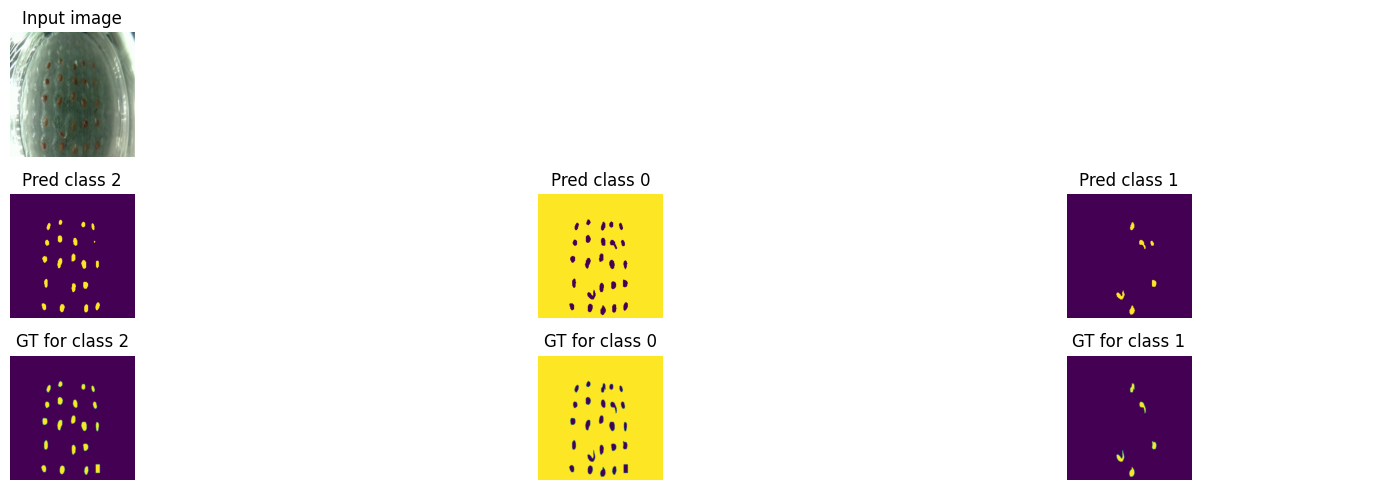

Train loss: 0.25548 | Time: 49m 31s | Val loss: 0.27294
Train_DICE_avg: 0.77352 | Train_Jaccard_avg: 0.71388 | Train_Sensitivity_avg: 0.80315 | Train_Specificity_avg: 0.95680 
Class 0 - Train_DICE: 0.99243 | Train_Jaccard: 0.98502 | Train_Sensitivity: 0.99286 | Train_Specificity: 0.87826 
Class 1 - Train_DICE: 0.45721 | Train_Jaccard: 0.37757 | Train_Sensitivity: 0.50298 | Train_Specificity: 0.99743 
Class 2 - Train_DICE: 0.87092 | Train_Jaccard: 0.77904 | Train_Sensitivity: 0.91361 | Train_Specificity: 0.99471 
Val_DICE_avg: 0.76514 | Val_Jaccard_avg: 0.71397 | Val_Sensitivity_avg: 0.79264 | Val_Specificity_avg: 0.94514 
Class 0 - Val_DICE: 0.99591 | Val_Jaccard: 0.99187 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.84228 
Class 1 - Val_DICE: 0.41475 | Val_Jaccard: 0.34732 | Val_Sensitivity: 0.44404 | Val_Specificity: 0.99769 
Class 2 - Val_DICE: 0.88477 | Val_Jaccard: 0.80272 | Val_Sensitivity: 0.93627 | Val_Specificity: 0.99544 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]



Global Performance Metrics:
Loss mean: 0.25882, std: 0.02418
Dice Coefficient mean: 0.77761, std: 0.12304
Jaccard Index mean: 0.71603, std: 0.11475
Sensitivity mean: 0.88528, std: 0.07993
Specificity mean: 0.96477, std: 0.02649

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99536, std: 0.00218
Jaccard mean: 0.99078, std: 0.00430
Sensitivity mean: 0.99418, std: 0.00272
Specificity mean: 0.90237, std: 0.08206

Class 1:
Dice mean: 0.47980, std: 0.37125
Jaccard mean: 0.39846, std: 0.32829
Sensitivity mean: 0.82696, std: 0.19521
Specificity mean: 0.99449, std: 0.00971

Class 2:
Dice mean: 0.85768, std: 0.08077
Jaccard mean: 0.75887, std: 0.11229
Sensitivity mean: 0.83469, std: 0.10216
Specificity mean: 0.99744, std: 0.00211
